# ***Credit EDA Assignment***

## Importing the Libraries required for EDA

In [2]:
#Import the required Libraries.
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt,seaborn as sns


## 1. Importing Data from application_data.csv

In [3]:
#Reading the application_data in pandas

dx= pd.read_csv(r"D:\CreditEDA_Assignment\previous_application.csv")
dx.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

## 2. Understanding the Data structure

In [4]:
# Getting the Dataframe dimensions
dx.shape

(1670214, 37)

In [5]:
# Getting the columns information
dx.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [6]:
# Basic Info of the Data Frame
dx.info("all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [7]:
# Getting basic statistical details of the data frame
dx.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       ...  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA  \
count  ...               5951.000000   1.670214e+06      1.670214e+06   
mean   ...                  0.773503  -8.806797e+02      3.139511e+02   
std    ...                  0.100879   7.790997e+02      7.127443e+03   
min    ...                  0.373150  -2.922000e+03     -1.000000e+00   
25%    ...                  0.715645  -1.300000e+03     -1.000000e+00   
50%    ...                  0.835095  -5.810000e+02      3.000000e+00   
75%    ...                  0.852537  -2.800000e+02      8.200000e+01   
max    ...                  1.000000  -1.000000e+00      4.000000e+06   

        CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count  1.297984e+06       997149.000000   997149.000000   
mean   1.605408e+01       342209.855039    13826.269337   
std    1.456729e+01        88916.115834    72444.869708   
min    0.000000e+00        -2922.000000    -2892.000000   
25%    6.000000e+00       365243.000000    -1628.000000   
50%    1.200000e+01       365243.000000     -831.000000   
75%    2.400000e+01       365243.000000     -411.000000   
max    8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                     1.000000  
max                     1.000000  

[8 rows x 21 columns]

## 3.  Checking Data Quality And Missing Values

### 3.1 Missing values Percentage for columns and rows

In [8]:
# checking column-wise null percentages
cols = pd.DataFrame(dx.isnull().mean().round(4) * 100, columns =['missing_value_precentage']).sort_values(by=['missing_value_precentage'], ascending=False)
print(cols)

                             missing_value_precentage
RATE_INTEREST_PRIVILEGED                        99.64
RATE_INTEREST_PRIMARY                           99.64
RATE_DOWN_PAYMENT                               53.64
AMT_DOWN_PAYMENT                                53.64
NAME_TYPE_SUITE                                 49.12
NFLAG_INSURED_ON_APPROVAL                       40.30
DAYS_FIRST_DRAWING                              40.30
DAYS_FIRST_DUE                                  40.30
DAYS_LAST_DUE_1ST_VERSION                       40.30
DAYS_LAST_DUE                                   40.30
DAYS_TERMINATION                                40.30
AMT_GOODS_PRICE                                 23.08
AMT_ANNUITY                                     22.29
CNT_PAYMENT                                     22.29
PRODUCT_COMBINATION                              0.02
CHANNEL_TYPE                                     0.00
NAME_PRODUCT_TYPE                                0.00
NAME_YIELD_GROUP            

In [9]:
# Summary of missing values associated with columns
print(str(round(100.0 * cols[cols['missing_value_precentage']==0].count()/len(cols),2))+"% " +"columns have no missing value")
print(str(round(100.0 * cols[(cols['missing_value_precentage']>0)&(cols['missing_value_precentage']<=10)].count()/len(cols),2))+"% " +"columns have missing value between 0-10 %")
print(str(round(100.0 * cols[(cols['missing_value_precentage']>10)&(cols['missing_value_precentage']<=50)].count()/len(cols),2))+"% " +"columns have missing value between 10-50 %")
print(str(round(100.0 * cols[cols['missing_value_precentage']>50].count()/len(cols),2))+"% " +"columns have more than 50% missing value")


missing_value_precentage    59.46
dtype: float64% columns have no missing value
missing_value_precentage    2.7
dtype: float64% columns have missing value between 0-10 %
missing_value_precentage    27.03
dtype: float64% columns have missing value between 10-50 %
missing_value_precentage    10.81
dtype: float64% columns have more than 50% missing value


In [10]:
# checking row-wise null percentages
null_row= pd.DataFrame(dx.isnull().sum(axis=1), columns=['num_missing_value'])
null_row

num_missing_value
0                        1
1                        4
2                        4
3                        5
4                       11
...                    ...
1670209                  3
1670210                  2
1670211                  2
1670212                  4
1670213                  4

[1670214 rows x 1 columns]

### 3.2 Removing the columns with high percentage of missing values(>50%)

In [11]:
#Droping column having more than 50 % null values
dx_1 = dx.drop(dx.columns[ dx.apply(lambda col: (col.isnull().sum()/len(dx)*100) > 50)], axis=1)
print (dx_1.columns)

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')


In [12]:
# Checking dimensions of dataframe after dropping columns
dx_1.shape

(1670214, 33)

In [13]:
#re-checking columns with missing values
round(100.0* dx_1.isnull().sum()/len(dx_1), 2).sort_values()

SK_ID_PREV                      0.00
NAME_YIELD_GROUP                0.00
NAME_SELLER_INDUSTRY            0.00
SELLERPLACE_AREA                0.00
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
NAME_PORTFOLIO                  0.00
NAME_GOODS_CATEGORY             0.00
NAME_CLIENT_TYPE                0.00
CODE_REJECT_REASON              0.00
NAME_PAYMENT_TYPE               0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NFLAG_LAST_APPL_IN_DAY          0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
HOUR_APPR_PROCESS_START         0.00
WEEKDAY_APPR_PROCESS_START      0.00
AMT_CREDIT                      0.00
AMT_APPLICATION                 0.00
NAME_CONTRACT_TYPE              0.00
SK_ID_CURR                      0.00
NAME_CASH_LOAN_PURPOSE          0.00
PRODUCT_COMBINATION             0.02
AMT_ANNUITY                    22.29
CNT_PAYMENT                    22.29
AMT_GOODS_PRICE                23.08
DAYS_LAST_DUE                  40.30
D

###  3.3 Finding best imputation technique for ~ 13% of missing values

#### The target columns for this analysis will be
- AMT_REQ_CREDIT_BUREAU_MON
- AMT_REQ_CREDIT_BUREAU_WEEK
- AMT_REQ_CREDIT_BUREAU_DAY
- AMT_REQ_CREDIT_BUREAU_HOUR
- AMT_REQ_CREDIT_BUREAU_QRT
- AMT_REQ_CREDIT_BUREAU_YEAR


In [15]:
target_col = ['AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']
dx_1[target_col].dtypes

KeyError: "None of [Index(['AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_WEEK',\n       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR',\n       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],\n      dtype='object')] are in the [columns]"

#### All the focus columns seem to be of "float" type. However, we will look at each column individually during the analysis to check the data type

#### 3.3.1 Identifying imputation technique for AMT_REQ_CREDIT_BUREAU_MON

<Axes: ylabel='AMT_REQ_CREDIT_BUREAU_MON'>

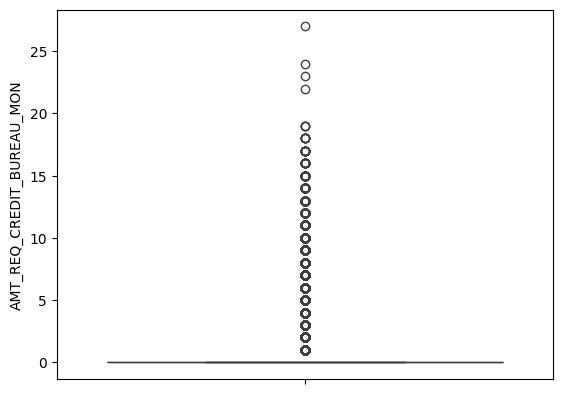

In [308]:
sns.boxplot(dx_1['AMT_REQ_CREDIT_BUREAU_MON'])

##### The boxplot is not very clear and is severly impacted by outliers. We need to perform further analysis to understand the best imputation method

In [309]:
# Checking different records in the columns AMT_REQ_CREDIT_BUREAU_MON
dx_1['AMT_REQ_CREDIT_BUREAU_MON'].value_counts()

AMT_REQ_CREDIT_BUREAU_MON
0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
23.0         1
27.0         1
22.0         1
Name: count, dtype: int64

##### Majority of the columns has 0 as value

In [310]:
#Number of missing values in AMT_REQ_CREDIT_BUREAU_MON
dx_1['AMT_REQ_CREDIT_BUREAU_MON'].isnull().sum()

41519

In [311]:
# Calculating percentage of each record in the dataframe
dx_1['AMT_REQ_CREDIT_BUREAU_MON'].value_counts(normalize=True)*100

AMT_REQ_CREDIT_BUREAU_MON
0.0     83.548753
1.0     12.461653
2.0      2.024873
3.0      0.748519
4.0      0.404523
5.0      0.226323
6.0      0.128951
7.0      0.112033
9.0      0.077446
8.0      0.069551
10.0     0.049626
11.0     0.044738
12.0     0.028948
13.0     0.027068
14.0     0.015038
15.0     0.013158
16.0     0.008647
17.0     0.005263
18.0     0.002256
19.0     0.001128
24.0     0.000376
23.0     0.000376
27.0     0.000376
22.0     0.000376
Name: proportion, dtype: float64

In [312]:
# Checking statistics of the column
dx_1['AMT_REQ_CREDIT_BUREAU_MON'].describe()

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

##### The statistical summary of the column shows there are only few records with value greater than 0. It explains the reason behind distorted boxplot

#### For column AMT_REQ_CREDIT_BUREAU_MON, we have two approaches either exclude missing values or impute the column with value 0 which is present in more than 83% of the rows. Hence, the recommended imputation technique is replacing null by the mode which is 0

#### 3.3.2 Identifying imputation technique for AMT_REQ_CREDIT_BUREAU_WEEK

<Axes: ylabel='AMT_REQ_CREDIT_BUREAU_WEEK'>

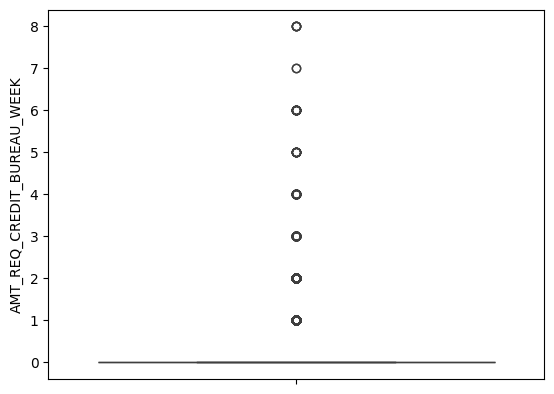

In [313]:
sns.boxplot(dx_1['AMT_REQ_CREDIT_BUREAU_WEEK'])

#### The boxplot is not very clear and is severly impacted by outliers. We need to perform further analysis to understand the best imputation method

In [314]:
#Understanding various records in the columns AMT_REQ_CREDIT_BUREAU_WEEK
dx_1['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts()

AMT_REQ_CREDIT_BUREAU_WEEK
0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: count, dtype: int64

#### Majority of the columns has 0 as value

In [315]:
#Number of missing values in AMT_REQ_CREDIT_BUREAU_WEEK
dx_1['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull().sum()

41519

In [316]:
# Calculating percentage of each record in the dataframe
dx_1['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts(normalize=True)*100

AMT_REQ_CREDIT_BUREAU_WEEK
0.0    96.790881
1.0     3.085807
2.0     0.074814
3.0     0.021805
4.0     0.012782
6.0     0.007519
5.0     0.003760
8.0     0.001880
7.0     0.000752
Name: proportion, dtype: float64

In [317]:
# Checking statistics of the column
dx_1['AMT_REQ_CREDIT_BUREAU_WEEK'].describe()

count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

##### The statistical summary of the column shows there are only few records with value greater than 0. It explains the reason behind distorted boxplot

#### For column AMT_REQ_CREDIT_BUREAU_WEEK, we have two approaches either exclude missing values or impute the column with value 0 which is present in more than 96% of the rows. Hence, the recommended imputation technique is replacing null by the mode which is 0

#### 3.3.3 Identifying imputation technique for AMT_REQ_CREDIT_BUREAU_DAY

<Axes: ylabel='AMT_REQ_CREDIT_BUREAU_DAY'>

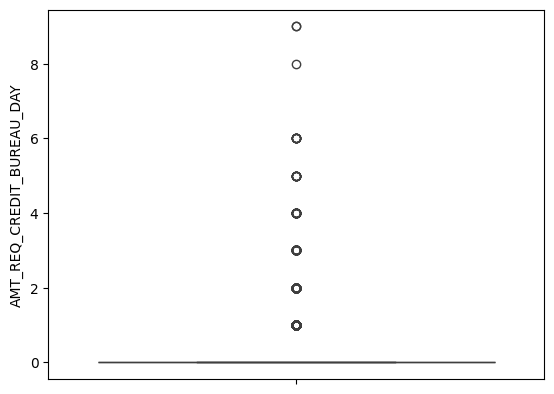

In [318]:
sns.boxplot(dx_1['AMT_REQ_CREDIT_BUREAU_DAY'])

##### The boxplot is not very clear and is severly impacted by outliers. We need to perform further analysis to understand the best imputation method

In [319]:
#Understanding various records in the columns AMT_REQ_CREDIT_BUREAU_DAY
dx_1['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts()

AMT_REQ_CREDIT_BUREAU_DAY
0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: count, dtype: int64

##### Majority of the columns has 0 as value

In [320]:
#Number of missing values in AMT_REQ_CREDIT_BUREAU_DAY
dx_1['AMT_REQ_CREDIT_BUREAU_DAY'].isnull().sum()

41519

In [321]:
# Calculating percentage of each record in the dataframe
dx_1['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts(normalize=True)*100

AMT_REQ_CREDIT_BUREAU_DAY
0.0    99.440209
1.0     0.485729
2.0     0.039851
3.0     0.016918
4.0     0.009775
5.0     0.003384
6.0     0.003008
9.0     0.000752
8.0     0.000376
Name: proportion, dtype: float64

In [322]:
# Checking statistics of the column
dx_1['AMT_REQ_CREDIT_BUREAU_DAY'].describe()

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

##### The statistical summary of the column shows there are only few records with value greater than 0. It explains the reason behind distorted boxplot

#### For column AMT_REQ_CREDIT_BUREAU_DAY, we have two approaches either exclude missing values or impute the column with value 0 which is present in more than 99% of the rows. Hence, the recommended imputation technique is replacing null by the mode which is 0

### 3.3.4 Identifying imputation technique for AMT_REQ_CREDIT_BUREAU_HOUR

<Axes: ylabel='AMT_REQ_CREDIT_BUREAU_HOUR'>

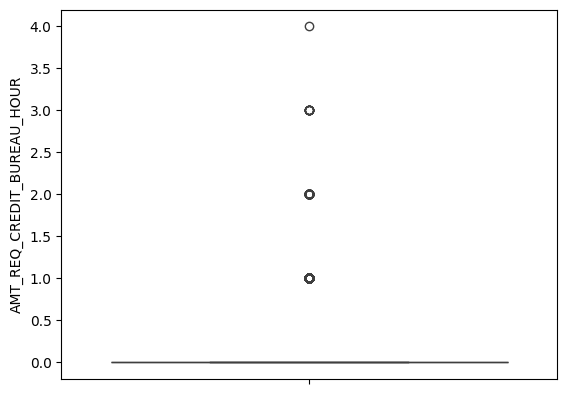

In [323]:
#1. Finding if the column has Outliers or not
sns.boxplot(dx_1['AMT_REQ_CREDIT_BUREAU_HOUR'])

#### The boxplot is not very clear and is severly impacted by outliers. We need to perform further analysis to understand the best imputation method

In [324]:
#Understanding various records in the columns AMT_REQ_CREDIT_BUREAU_HOUR
dx_1['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts()

AMT_REQ_CREDIT_BUREAU_HOUR
0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: count, dtype: int64

#### Majority of the columns has 0 as value

In [325]:
#Number of missing values in AMT_REQ_CREDIT_BUREAU_HOUR
dx_1['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull().sum()

41519

In [326]:
# Calculating percentage of each record in the dataframe
dx_1['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts(normalize=True)*100

AMT_REQ_CREDIT_BUREAU_HOUR
0.0    99.388703
1.0     0.586484
2.0     0.021053
3.0     0.003384
4.0     0.000376
Name: proportion, dtype: float64

In [327]:
# Checking statistics of the column
dx_1['AMT_REQ_CREDIT_BUREAU_HOUR'].describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

##### The statistical summary of the column shows there are only few records with value greater than 0. It explains the reason behind distorted boxplot

#### For column AMT_REQ_CREDIT_BUREAU_HOUR, we have two approaches either exclude missing values or impute the column with value 0 which is present in more than 99% of the rows. Hence, the recommended imputation technique is replacing null by the mode which is 0

#### 3.3.5 Identifying imputation technique for AMT_REQ_CREDIT_BUREAU_QRT

<Axes: ylabel='AMT_REQ_CREDIT_BUREAU_QRT'>

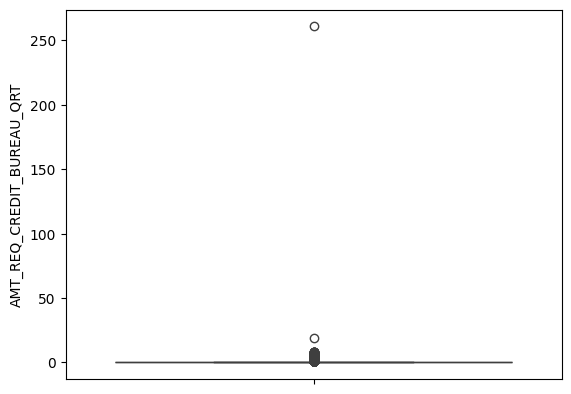

In [328]:
sns.boxplot(dx_1['AMT_REQ_CREDIT_BUREAU_QRT'])

#### The boxplot is not very clear and is severly impacted by outliers. We need to perform further analysis to understand the best imputation method

In [329]:
#Understanding various records in the columns AMT_REQ_CREDIT_BUREAU_QRT
dx_1['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts()

AMT_REQ_CREDIT_BUREAU_QRT
0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
8.0           7
7.0           7
261.0         1
19.0          1
Name: count, dtype: int64

#### Majority of the columns has 0 as value

In [330]:
#Number of missing values in AMT_REQ_CREDIT_BUREAU_QRT
dx_1['AMT_REQ_CREDIT_BUREAU_QRT'].isnull().sum()

41519

In [331]:
# Calculating percentage of each record in the dataframe
dx_1['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts(normalize=True)*100

AMT_REQ_CREDIT_BUREAU_QRT
0.0      80.986270
1.0      12.730458
2.0       5.418208
3.0       0.645508
4.0       0.178953
5.0       0.024061
6.0       0.010527
8.0       0.002632
7.0       0.002632
261.0     0.000376
19.0      0.000376
Name: proportion, dtype: float64

In [332]:
# Checking statistics of the column
dx_1['AMT_REQ_CREDIT_BUREAU_QRT'].describe()

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

##### The statistical summary of the column shows there are only few records with value greater than 0. It explains the reason behind distorted boxplot

#### For column AMT_REQ_CREDIT_BUREAU_QRT, we have two approaches either exclude missing values or impute the column with value 0 which is present in more than 80% of the rows. Hence, the recommended imputation technique is replacing null by the mode which is 0

#### 3.3.6 Identifying imputation technique for AMT_REQ_CREDIT_BUREAU_YEAR

<Axes: ylabel='AMT_REQ_CREDIT_BUREAU_YEAR'>

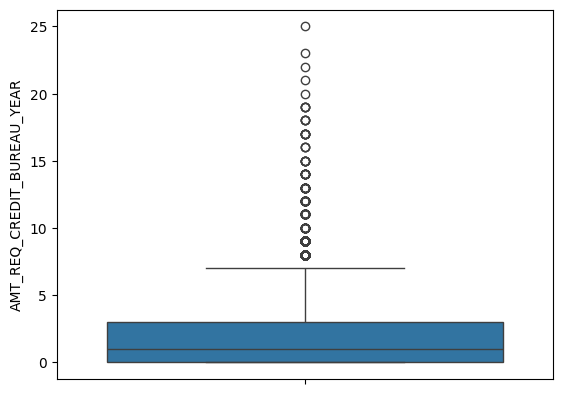

In [333]:
sns.boxplot(dx_1['AMT_REQ_CREDIT_BUREAU_YEAR'])

#### There are outliers in the data. We need to perform further analysis to understand the best imputation method

In [334]:
#Understanding various records in the columns AMT_REQ_CREDIT_BUREAU_YEAR
dx_1['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts()

AMT_REQ_CREDIT_BUREAU_YEAR
0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
25.0        1
23.0        1
22.0        1
21.0        1
20.0        1
Name: count, dtype: int64

In [335]:
#Number of missing values in AMT_REQ_CREDIT_BUREAU_YEAR
dx_1['AMT_REQ_CREDIT_BUREAU_YEAR'].isnull().sum()

41519

In [336]:
# Calculating percentage of each record in the dataframe
dx_1['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts(normalize=True)*100

AMT_REQ_CREDIT_BUREAU_YEAR
0.0     26.993669
1.0     23.837183
2.0     18.869740
3.0     12.642485
4.0      7.787452
5.0      4.530963
6.0      2.619252
7.0      1.454555
8.0      0.799648
9.0      0.412042
11.0     0.011654
12.0     0.011279
10.0     0.008271
13.0     0.007143
14.0     0.003760
17.0     0.002632
15.0     0.002256
19.0     0.001504
18.0     0.001504
16.0     0.001128
25.0     0.000376
23.0     0.000376
22.0     0.000376
21.0     0.000376
20.0     0.000376
Name: proportion, dtype: float64

In [337]:
# Checking statistics of the column
dx_1['AMT_REQ_CREDIT_BUREAU_YEAR'].describe()

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

### Values - 0,1,2,3 are present in a significant number. Hence, imputing null values(which is 13% of the total data set) can significantly change column statistics and hence, the best approach would be to remove these rows

### 3.4 Checking the data type of columns and fixing the incorrect data types

In [338]:
#checking the data types to identify the incorrect data type
dx_1.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64
FLAG_CONT_MOBILE                  int64


#### We did not find any column with incorrect data types. Each categorical column is of type object and each numerical column is either of float or int type

In [339]:
# Fixing the column with negative data and deriving the number of years for DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE, & DAYS_ID_PUBLISH
dx_1[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']] = dx[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE' ]].div(365).round(2).abs()
dx_1

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           24700.5         351000.0   Unaccompanied               Working   
1           35698.5        1129500.0          Family         State servant   
2            6750.0         135000.0   Unaccompanied               Working   
3           29686.5         297000.0   Unaccompanied               Working   
4           21865.5         513000.0   Unaccompanied               Working   
...             ...              ...             ...                   ...   
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       House / apartment                    0.018801       25.92   
1       House / apartment                    0.003541       45.93   
2       House / apartment                    0.010032       52.18   
3       House / apartment                    0.008019       52.07   
4       House / apartment                    0.028663       54.61   
...                   ...                         ...         ...   
307506       With parents                    0.032561       25.55   
307507  House / apartment       

### 3.5 Identifying Outliers for Numerical columns

In [340]:
# verifying the clean data
dx_1.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                      float64
DAYS_EMPLOYED                   float64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                 float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64
FLAG_CONT_MOBILE                  int64


#### For the outlier analysis of numerical columns, we will focus on
- AMT_GOODS_PRICE
- AMT_INCOME_TOTAL
- AMT_CREDIT
- AMT_ANNUITY
- FLOORSMAX_AVG

#### 3.5.1 Outlier analysis for AMT_GOODS_PRICE

<Axes: ylabel='AMT_GOODS_PRICE'>

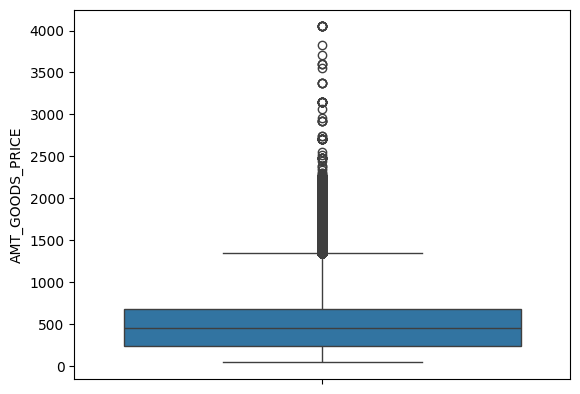

In [341]:
# dividing by 1000 for the ease of read and converting value in ('000s')
sns.boxplot(dx_1['AMT_GOODS_PRICE']/1000.0)

In [342]:
# checking column statistics
(dx_1['AMT_GOODS_PRICE']/1000).describe()

count    307233.000000
mean        538.396207
std         369.446461
min          40.500000
25%         238.500000
50%         450.000000
75%         679.500000
max        4050.000000
Name: AMT_GOODS_PRICE, dtype: float64

In [343]:
# Maximum value for boxplot
IQR_AMT_GOODS_PRICE = (dx_1['AMT_GOODS_PRICE']/1000).quantile(0.75) - (dx_1['AMT_GOODS_PRICE']/1000).quantile(0.25)
Upper_limit_IQR_AMT_GOODS_PRICE = (dx_1['AMT_GOODS_PRICE']/1000).quantile(0.75) + IQR_AMT_GOODS_PRICE*1.5
Upper_limit_IQR_AMT_GOODS_PRICE

1341.0

In [344]:
# percentage of outliers in AMT_GOODS_PRICE
round(100.0 * len(dx_1[(dx_1['AMT_GOODS_PRICE']/1000)>Upper_limit_IQR_AMT_GOODS_PRICE])/len(dx_1), 2)

4.79

#### From the boxplot, we can see there are outliers in AMT_GOODS_PRICE. The percentage of outliers stands at 4.79%

#### 3.5.2 Outlier analysis for AMT_INCOME_TOTAL

<Axes: ylabel='AMT_INCOME_TOTAL'>

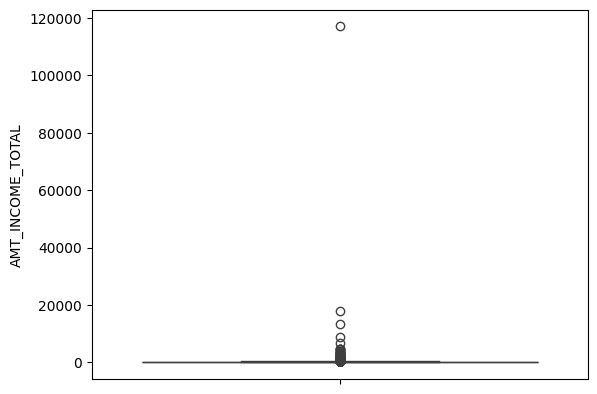

In [345]:
# dividing by 1000 for the ease of read and converting value in ('000s')
sns.boxplot(dx_1['AMT_INCOME_TOTAL']/1000)

In [346]:
# checking column statistics
(dx_1['AMT_INCOME_TOTAL']/1000).describe()

count    307511.000000
mean        168.797919
std         237.123146
min          25.650000
25%         112.500000
50%         147.150000
75%         202.500000
max      117000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [347]:
# Maximum value for boxplot
IQR_AMT_INCOME_TOTAL = (dx_1['AMT_INCOME_TOTAL']/1000).quantile(0.75) - (dx_1['AMT_INCOME_TOTAL']/1000).quantile(0.25)
Upper_limit_AMT_INCOME_TOTAL = (dx_1['AMT_INCOME_TOTAL']/1000).quantile(0.75) + IQR_AMT_INCOME_TOTAL*1.5
Upper_limit_AMT_INCOME_TOTAL

337.5

In [348]:
# percentage of outliers in AMT_INCOME_TOTAL
round(100.0 * len(dx_1[(dx_1['AMT_INCOME_TOTAL']/1000)>Upper_limit_AMT_INCOME_TOTAL])/len(dx_1), 2)

4.56

#### From the boxplot, we can see there are outliers in AMT_INCOME_TOTAL. The percentage of outliers stands at 4.56%


#### 3.5.3 Outlier analysis for AMT_CREDIT

<Axes: ylabel='AMT_CREDIT'>

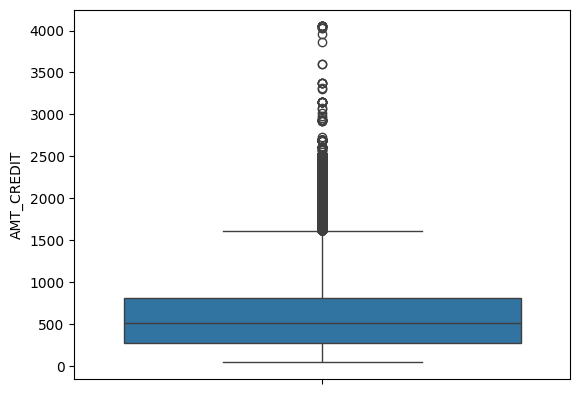

In [349]:
# dividing by 1000 for the ease of read and converting value in ('000s')
sns.boxplot(dx_1['AMT_CREDIT']/1000.0)

In [350]:
# checking column statistics
(dx_1['AMT_CREDIT']/1000).describe()

count    307511.000000
mean        599.026000
std         402.490777
min          45.000000
25%         270.000000
50%         513.531000
75%         808.650000
max        4050.000000
Name: AMT_CREDIT, dtype: float64

In [351]:
# Maximum value for boxplot
IQR_AMT_CREDIT = (dx_1['AMT_CREDIT']/1000).quantile(0.75) - (dx_1['AMT_CREDIT']/1000).quantile(0.25)
Upper_limit_AMT_CREDIT = (dx_1['AMT_CREDIT']/1000).quantile(0.75) + IQR_AMT_CREDIT*1.5
Upper_limit_AMT_CREDIT

1616.625

In [352]:
# percentage of outliers in AMT_CREDIT
round(100.0 * len(dx_1[(dx_1['AMT_CREDIT']/1000)>Upper_limit_AMT_CREDIT])/len(dx_1), 2)

2.13

#### From the boxplot, we can see there are outliers in AMT_CREDIT. The percentage of outliers stands at 2.13%


#### 3.5.4 Outlier analysis for AMT_ANNUITY

<Axes: ylabel='AMT_ANNUITY'>

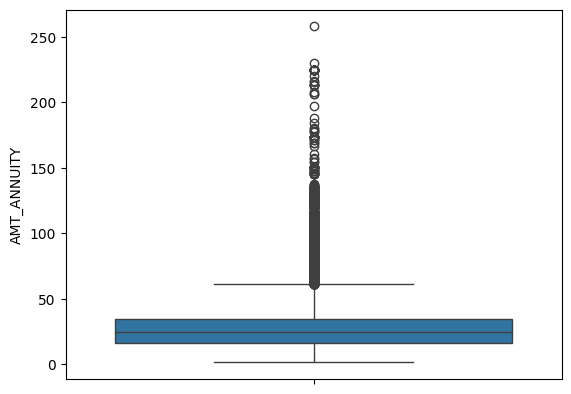

In [353]:
# dividing by 1000 for the ease of read and converting value in ('000s')
sns.boxplot(dx_1['AMT_ANNUITY']/1000.0)

In [354]:
# checking column statistics
(dx_1['AMT_ANNUITY']/1000).describe()

count    307499.000000
mean         27.108574
std          14.493737
min           1.615500
25%          16.524000
50%          24.903000
75%          34.596000
max         258.025500
Name: AMT_ANNUITY, dtype: float64

In [355]:
# Maximum value for boxplot
IQR_AMT_ANNUITY = (dx_1['AMT_ANNUITY']/1000).quantile(0.75) - (dx_1['AMT_ANNUITY']/1000).quantile(0.25)
Upper_limit_AMT_ANNUITY = (dx_1['AMT_ANNUITY']/1000).quantile(0.75) + IQR_AMT_ANNUITY*1.5
Upper_limit_AMT_ANNUITY

61.70399999999999

In [356]:
# percentage of outliers in AMT_ANNUITY
round(100.0 * len(dx_1[(dx_1['AMT_ANNUITY']/1000)>Upper_limit_AMT_ANNUITY])/len(dx_1), 2)

2.44

#### From the boxplot, we can see there are outliers in AMT_ANNUITY. The percentage of outliers stands at 2.44%


#### 3.5.5 Outlier analysis for FLOORSMAX_AVG

<Axes: ylabel='FLOORSMAX_AVG'>

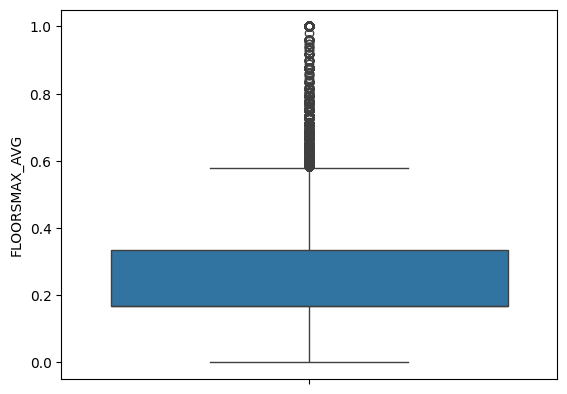

In [357]:
sns.boxplot(dx_1['FLOORSMAX_AVG'])

In [358]:
(dx_1['FLOORSMAX_AVG']).describe()

count    154491.000000
mean          0.226282
std           0.144641
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_AVG, dtype: float64

In [359]:
# Maximum value for boxplot
IQR_FLOORSMAX_AVG = (dx_1['FLOORSMAX_AVG']).quantile(0.75) - (dx_1['FLOORSMAX_AVG']).quantile(0.25)
Upper_limit_FLOORSMAX_AVG = (dx_1['FLOORSMAX_AVG']).quantile(0.75) + IQR_FLOORSMAX_AVG*1.5
Upper_limit_FLOORSMAX_AVG

0.5831999999999999

In [360]:
# percentage of outliers in FLOORSMAX_AVG
round(100.0 * len(dx_1[(dx_1['FLOORSMAX_AVG'])>Upper_limit_FLOORSMAX_AVG])/len(dx_1), 2)

1.7

#### From the boxplot, we can see there are outliers in FLOORSMAX_AVG. The percentage of outliers stands at 1.7%


### 3.6 Binning of continuous Variable

#### For the binning, we will use following columns
- AGE_GROUP
- AMT_CATEGORY

In [361]:
# 1. DAYS_BIRTH column can be binned 0-10,10-20,20-30,30-40, 40-50 and so on
dx_1['AGE_GROUP'] = pd.cut(x=dx_1.DAYS_BIRTH, bins=[0,19,29, 39, 49, 59,69,79,89], labels=['10s','20s', '30s', '40s' ,'50s', '60s','70s', '80s'])
dx_1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       25.92           1.75               9.99   
1                    0.003541       45.93           3.25               3.25   
2                    0.010032       52.18           0.62              11.67   
3                    0.008019       52.07           8.33              26.94   
4                    0.028663       54.61           8.32              11.81   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             5.81           1               1                0   
1             0.80           1               1                0   
2             6.93           1               1                1   
3             6.68           1               1                0   
4             9.47           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [362]:
# 2. AMT_INCOME_TOTAL column can be binned 'Low','Average', 'Good', 'Best' ,'High', 'Very High'
dx_1['AMT_CATEGORY'] = pd.cut(x=dx_1.AMT_INCOME_TOTAL, bins=[0,100000, 200000, 300000, 400000, 500000, 600000], labels=['Low','Average', 'Good', 'Best' ,'High', 'Very High'])
dx_1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       25.92           1.75               9.99   
1                    0.003541       45.93           3.25               3.25   
2                    0.010032       52.18           0.62              11.67   
3                    0.008019       52.07           8.33              26.94   
4                    0.028663       54.61           8.32              11.81   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             5.81           1               1                0   
1             0.80           1               1                0   
2             6.93           1               1                1   
3             6.68           1               1                0   
4             9.47           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

## 4. Analysis

In [363]:
dx_1.shape

(307511, 83)

### For further analysis, we will remove irrelevant columns and continue analysis with a few selected columns

In [364]:
# list of columns to be dropped
drop_columns = ['FLAG_CONT_MOBILE',
                'FLAG_MOBIL',
                'FLAG_EMP_PHONE',
                'FLAG_WORK_PHONE',
                'FLAG_PHONE',
                'FLAG_EMAIL',
                'HOUR_APPR_PROCESS_START',
                'WEEKDAY_APPR_PROCESS_START',
                'FLOORSMAX_AVG',
                'EXT_SOURCE_2',
                'EXT_SOURCE_3',
                'FLOORSMAX_AVG',
                'FLOORSMAX_MODE',
                'FLOORSMAX_MEDI',
                'TOTALAREA_MODE',
                'EMERGENCYSTATE_MODE',
                'REGION_POPULATION_RELATIVE',
                'YEARS_BEGINEXPLUATATION_AVG',
                'YEARS_BEGINEXPLUATATION_MEDI',
                'YEARS_BEGINEXPLUATATION_MODE',
                'REG_REGION_NOT_LIVE_REGION',
                'REG_REGION_NOT_WORK_REGION',
                'LIVE_REGION_NOT_WORK_REGION',
                'REG_CITY_NOT_LIVE_CITY',
                'REG_CITY_NOT_WORK_CITY',
                'LIVE_CITY_NOT_WORK_CITY',
                'FLAG_DOCUMENT_2',
                'FLAG_DOCUMENT_3',
                'FLAG_DOCUMENT_4',
                'FLAG_DOCUMENT_5',
                'FLAG_DOCUMENT_6',
                'FLAG_DOCUMENT_7',
                'FLAG_DOCUMENT_8',
                'FLAG_DOCUMENT_9',
                'FLAG_DOCUMENT_10',
                'FLAG_DOCUMENT_11',
                'FLAG_DOCUMENT_12',
                'FLAG_DOCUMENT_13',
                'FLAG_DOCUMENT_14',
                'FLAG_DOCUMENT_15',
                'FLAG_DOCUMENT_16',
                'FLAG_DOCUMENT_17',
                'FLAG_DOCUMENT_18',
                'FLAG_DOCUMENT_19',
                'FLAG_DOCUMENT_20',
                'FLAG_DOCUMENT_21'
               ]

In [365]:
dx_2 = dx_1.drop(columns=drop_columns, axis=1)
dx_2

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           24700.5         351000.0   Unaccompanied               Working   
1           35698.5        1129500.0          Family         State servant   
2            6750.0         135000.0   Unaccompanied               Working   
3           29686.5         297000.0   Unaccompanied               Working   
4           21865.5         513000.0   Unaccompanied               Working   
...             ...              ...             ...                   ...   
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0       House / apartment       25.92           1.75               9.99   
1       House / apartment       45.93           3.25               3.25   
2       House / apartment       52.18           0.62              11.67   
3       House / apartment       52.07           8.33              26.94   
4       House / apartment       54.61           8.32              11.81   
...                   ...         ...            ...                ...   
307506       With parents       25.55           0.65       

In [366]:
dx_2.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0       25.92           1.75               9.99             5.81   
1       45.93           3.25               3.25             0.80   
2       52.18           0.62              11.67             6.93   
3       52.07           8.33              26.94             6.68   
4       54.61           8.32              11.81             9.47   

  OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0        Laborers              1.0                     2   
1      Core staff              2.0                     1   
2        Laborers              1.0                     2   
3        Laborers              2.0                     2   
4      Core staff              1.0                     2   

   REGION_RATING_CLIENT_W_CITY       ORGANIZATION_TYPE  \
0                            2  Business Entity Type 3   
1                            1                  School   
2                            2              Government   
3                            2  Business Entity Type 3   
4                            2                Religion   

   OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       1.0                       0.0   
2                       0.0                       0.0   
3                       2.0                       0.0   
4                       0.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                       2.0                       2.0                    3.11   
1                       1.0                       0.0                    2.27   
2                       0.0                       0.0                    2.23   
3                       2.0                       0.0                    1.69   
4                       0.0                       0.0                    3.03   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CRED

In [367]:
# looking at the columns with missing value in remaining dataframe
round(100.0 * dx_2.isnull().sum()/len(dx_2), 2).sort_values(ascending=False)

OCCUPATION_TYPE                31.35
AMT_REQ_CREDIT_BUREAU_YEAR     13.50
AMT_REQ_CREDIT_BUREAU_QRT      13.50
AMT_REQ_CREDIT_BUREAU_MON      13.50
AMT_REQ_CREDIT_BUREAU_WEEK     13.50
AMT_REQ_CREDIT_BUREAU_DAY      13.50
AMT_REQ_CREDIT_BUREAU_HOUR     13.50
AMT_CATEGORY                    0.52
NAME_TYPE_SUITE                 0.42
OBS_60_CNT_SOCIAL_CIRCLE        0.33
OBS_30_CNT_SOCIAL_CIRCLE        0.33
DEF_30_CNT_SOCIAL_CIRCLE        0.33
DEF_60_CNT_SOCIAL_CIRCLE        0.33
AMT_GOODS_PRICE                 0.09
DAYS_LAST_PHONE_CHANGE          0.00
AGE_GROUP                       0.00
ORGANIZATION_TYPE               0.00
REGION_RATING_CLIENT_W_CITY     0.00
REGION_RATING_CLIENT            0.00
CNT_FAM_MEMBERS                 0.00
SK_ID_CURR                      0.00
TARGET                          0.00
AMT_CREDIT                      0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
C

In [368]:
dx_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 38 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

### 4.1 Checking imbalance in data

In [369]:
# Finding % of people with outstanding dues and no outstanding dues.

target_0_percentage = (round (len(dx_2.query('TARGET==0'))/len(dx_2),4)) * 100
print ("Target_0_percentage:", target_0_percentage,"%")

target_1_percentage = (round (len(dx_2.query('TARGET==1'))/len(dx_2),4)) * 100
print ("Target_1_percentage:", target_1_percentage,"%")

Target_0_percentage: 91.93 %
Target_1_percentage: 8.07 %


#### As the percentage of Target =0 and Target =1 are different, there is an imbalance

### 4.2 Creation of two data sets - one for each Target = 1 and Target = 0

#### 4.2.1 Creating Target_0_df, people having no outstanding dues

In [370]:
# Creating Dataframe of the non-defaulters
target_0_df = dx_2.query('TARGET==0')
target_0_df

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
5           100008       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307505      456249       0         Cash loans           F            N   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
5                    Y             0           99000.0    490495.5   
...                ...           ...               ...         ...   
307505               Y             0          112500.0    225000.0   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
1           35698.5        1129500.0           Family         State servant   
2            6750.0         135000.0    Unaccompanied               Working   
3           29686.5         297000.0    Unaccompanied               Working   
4           21865.5         513000.0    Unaccompanied               Working   
5           27517.5         454500.0  Spouse, partner         State servant   
...             ...              ...              ...                   ...   
307505      22050.0         225000.0    Unaccompanied             Pensioner   
307506      27558.0         225000.0    Unaccompanied               Working   
307507      12001.5         225000.0    Unaccompanied             Pensioner   
307508      29979.0         585000.0    Unaccompanied               Working   
307510      49117.5         675000.0    Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
5       Secondary / secondary special               Married   
...                               ...                   ...   
307505  Secondary / secondary special  Single / not married   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
1       House / apartment       45.93           3.25               3.25   
2       House / apartment       52.18           0.62              11.67   
3       House / apartment       52.07           8.33              26.94   
4       House / apartment       54.61           8.32              11.81   
5       House / apartment       46.41           4.35              13.62   
...                   ...         ...            ...                ...   
307505  House / apartment       66.81        10

In [371]:
target_0_df.shape

(282686, 38)

#### 4.2.2 Creating Target_1_df, people having outstanding dues

In [372]:
# Creating Dataframe of the defaulters
target_1_df = dx_2.query('TARGET==1')
target_1_df

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
26          100031       1         Cash loans           F            N   
40          100047       1         Cash loans           M            N   
42          100049       1         Cash loans           F            N   
81          100096       1         Cash loans           F            N   
...            ...     ...                ...         ...          ...   
307448      456186       1         Cash loans           M            N   
307475      456215       1         Cash loans           F            N   
307481      456225       1         Cash loans           M            N   
307489      456233       1         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
26                   Y             0          112500.0    979992.0   
40                   Y             0          202500.0   1193580.0   
42                   N             0          135000.0    288873.0   
81                   Y             0           81000.0    252000.0   
...                ...           ...               ...         ...   
307448               N             1          207000.0    450000.0   
307475               N             1          144000.0   1303200.0   
307481               Y             0          225000.0    297000.0   
307489               Y             0          225000.0    521280.0   
307509               Y             0          171000.0    370107.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           24700.5         351000.0   Unaccompanied               Working   
26          27076.5         702000.0   Unaccompanied               Working   
40          35028.0         855000.0   Unaccompanied  Commercial associate   
42          16258.5         238500.0   Unaccompanied               Working   
81          14593.5         252000.0   Unaccompanied             Pensioner   
...             ...              ...             ...                   ...   
307448      32746.5         450000.0   Unaccompanied               Working   
307475      46809.0        1125000.0   Unaccompanied               Working   
307481      19975.5         297000.0          Family               Working   
307489      23089.5         450000.0   Unaccompanied  Commercial associate   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
26      Secondary / secondary special                 Widow   
40      Secondary / secondary special               Married   
42      Secondary / secondary special        Civil marriage   
81      Secondary / secondary special               Married   
...                               ...                   ...   
307448  Secondary / secondary special               Married   
307475               Higher education        Civil marriage   
307481  Secondary / secondary special               Married   
307489  Secondary / secondary special        Civil marriage   
307509  Secondary / secondary special               Married   

        NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0       House / apartment       25.92           1.75               9.99   
26      House / apartment       51.30           7.20              18.01   
40      House / apartment       47.90           3.46               3.24   
42      House / apartment       36.67           9.85               0.12   
81      House / apartment       67.93        1000.67              14.77   
...                   ...         ...            ...                ...   
307448  House / apartment       27.17           8.35       

In [373]:
target_1_df.shape

(24825, 38)

In [374]:
# Checking unique values in each columns
dx_2.nunique().sort_values()

TARGET                              2
NAME_CONTRACT_TYPE                  2
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
CODE_GENDER                         3
REGION_RATING_CLIENT_W_CITY         3
REGION_RATING_CLIENT                3
AMT_REQ_CREDIT_BUREAU_HOUR          5
NAME_EDUCATION_TYPE                 5
AMT_CATEGORY                        6
AGE_GROUP                           6
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
DEF_60_CNT_SOCIAL_CIRCLE            9
AMT_REQ_CREDIT_BUREAU_WEEK          9
AMT_REQ_CREDIT_BUREAU_DAY           9
DEF_30_CNT_SOCIAL_CIRCLE           10
AMT_REQ_CREDIT_BUREAU_QRT          11
CNT_CHILDREN                       15
CNT_FAM_MEMBERS                    17
OCCUPATION_TYPE                    18
AMT_REQ_CREDIT_BUREAU_MON          24
AMT_REQ_CREDIT_BUREAU_YEAR         25
OBS_30_CNT_SOCIAL_CIRCLE           33
OBS_60_CNT_S

In [375]:
# Cheking column types
dx_2.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
DAYS_BIRTH                      float64
DAYS_EMPLOYED                   float64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                 float64
OCCUPATION_TYPE                  object
CNT_FAM_MEMBERS                 float64
REGION_RATING_CLIENT              int64
REGION_RATING_CLIENT_W_CITY       int64
ORGANIZATION_TYPE                object


#### Any column which is either of object type or have less than 40 values is considered categorical. Remaining columns of type float or int will be considered numerical

In [376]:
#list of all categorical columns
categorical_columns = ['NAME_CONTRACT_TYPE',
                       'FLAG_OWN_CAR',
                       'FLAG_OWN_REALTY',
                       'CODE_GENDER',
                       'NAME_EDUCATION_TYPE',
                       'AMT_CATEGORY',
                       'AGE_GROUP',
                       'NAME_FAMILY_STATUS',
                       'NAME_HOUSING_TYPE',
                       'NAME_TYPE_SUITE',
                       'NAME_INCOME_TYPE',
                       'OCCUPATION_TYPE',
                       'ORGANIZATION_TYPE',
                       'REGION_RATING_CLIENT_W_CITY',
                       'REGION_RATING_CLIENT',
                       'AMT_REQ_CREDIT_BUREAU_HOUR',
                       'DEF_60_CNT_SOCIAL_CIRCLE',
                       'AMT_REQ_CREDIT_BUREAU_WEEK',
                       'AMT_REQ_CREDIT_BUREAU_DAY',
                       'DEF_30_CNT_SOCIAL_CIRCLE',
                       'AMT_REQ_CREDIT_BUREAU_QRT',
                       'CNT_CHILDREN',
                       'CNT_FAM_MEMBERS',
                       'AMT_REQ_CREDIT_BUREAU_MON',
                       'AMT_REQ_CREDIT_BUREAU_YEAR',
                       'OBS_30_CNT_SOCIAL_CIRCLE',
                       'OBS_60_CNT_SOCIAL_CIRCLE',
                      ]

In [377]:
# list of all continuous numerical column
numerical_columns= ['AMT_GOODS_PRICE',
                    'DAYS_LAST_PHONE_CHANGE',
                    'DAYS_ID_PUBLISH',
                    'AMT_INCOME_TOTAL',
                    'DAYS_EMPLOYED',
                    'DAYS_REGISTRATION',
                    'DAYS_BIRTH',
                    'AMT_CREDIT',
                    'AMT_ANNUITY'
                   ]

### 4.3 Univariate Analysis for categorical variable

##### Under univariate analysis, we will look at percentage distribution of values of categorial variable

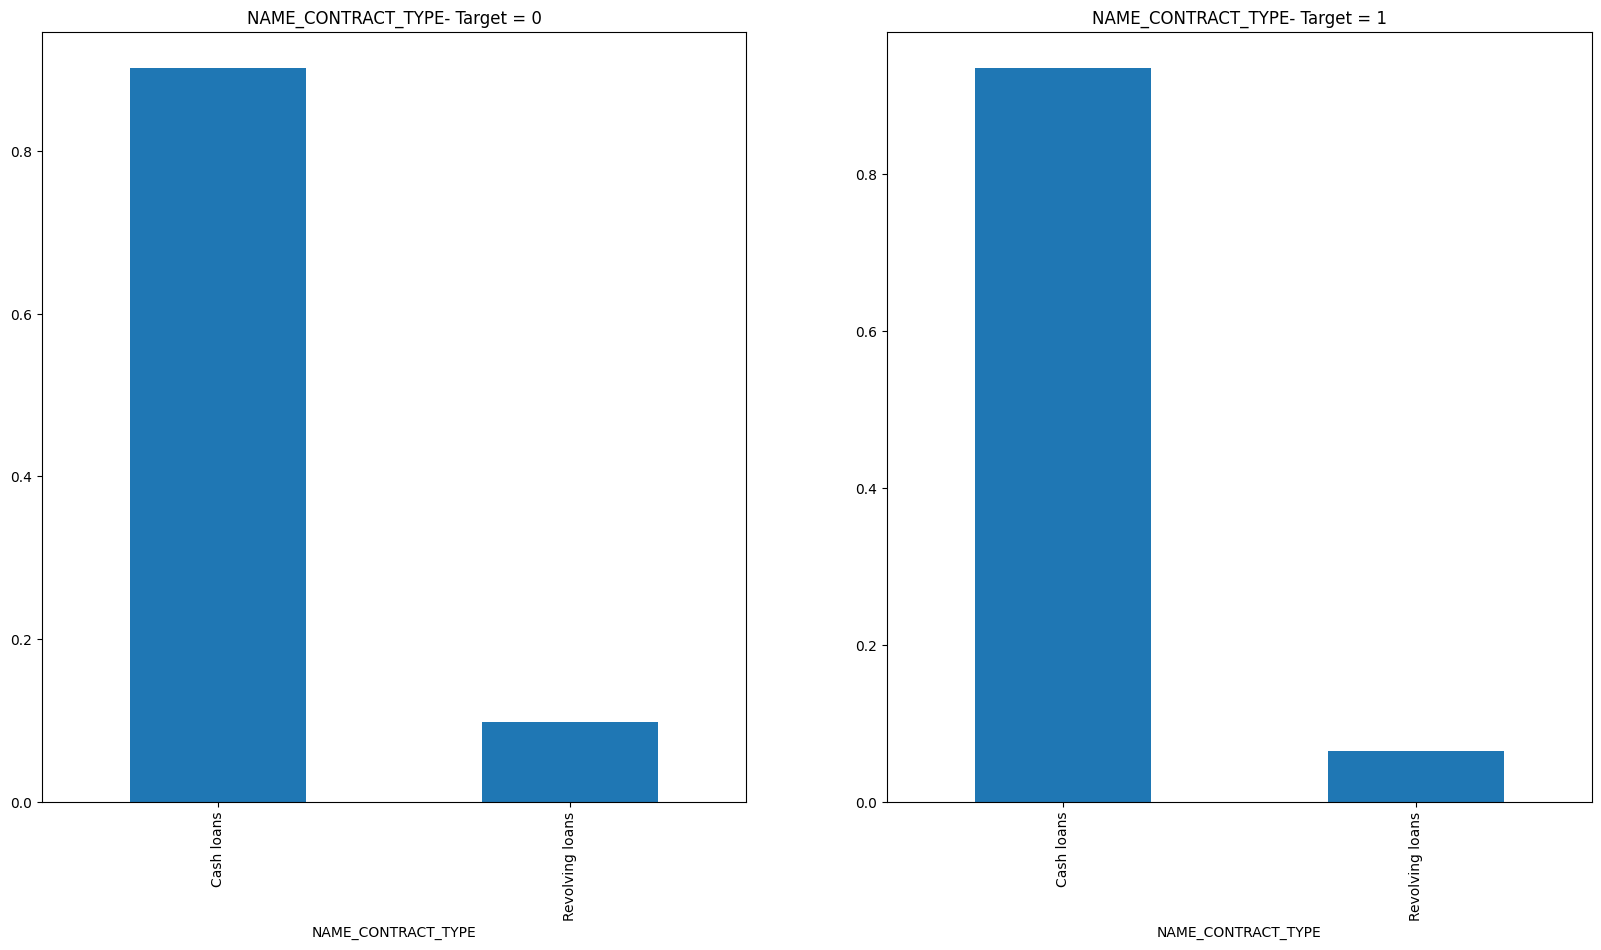

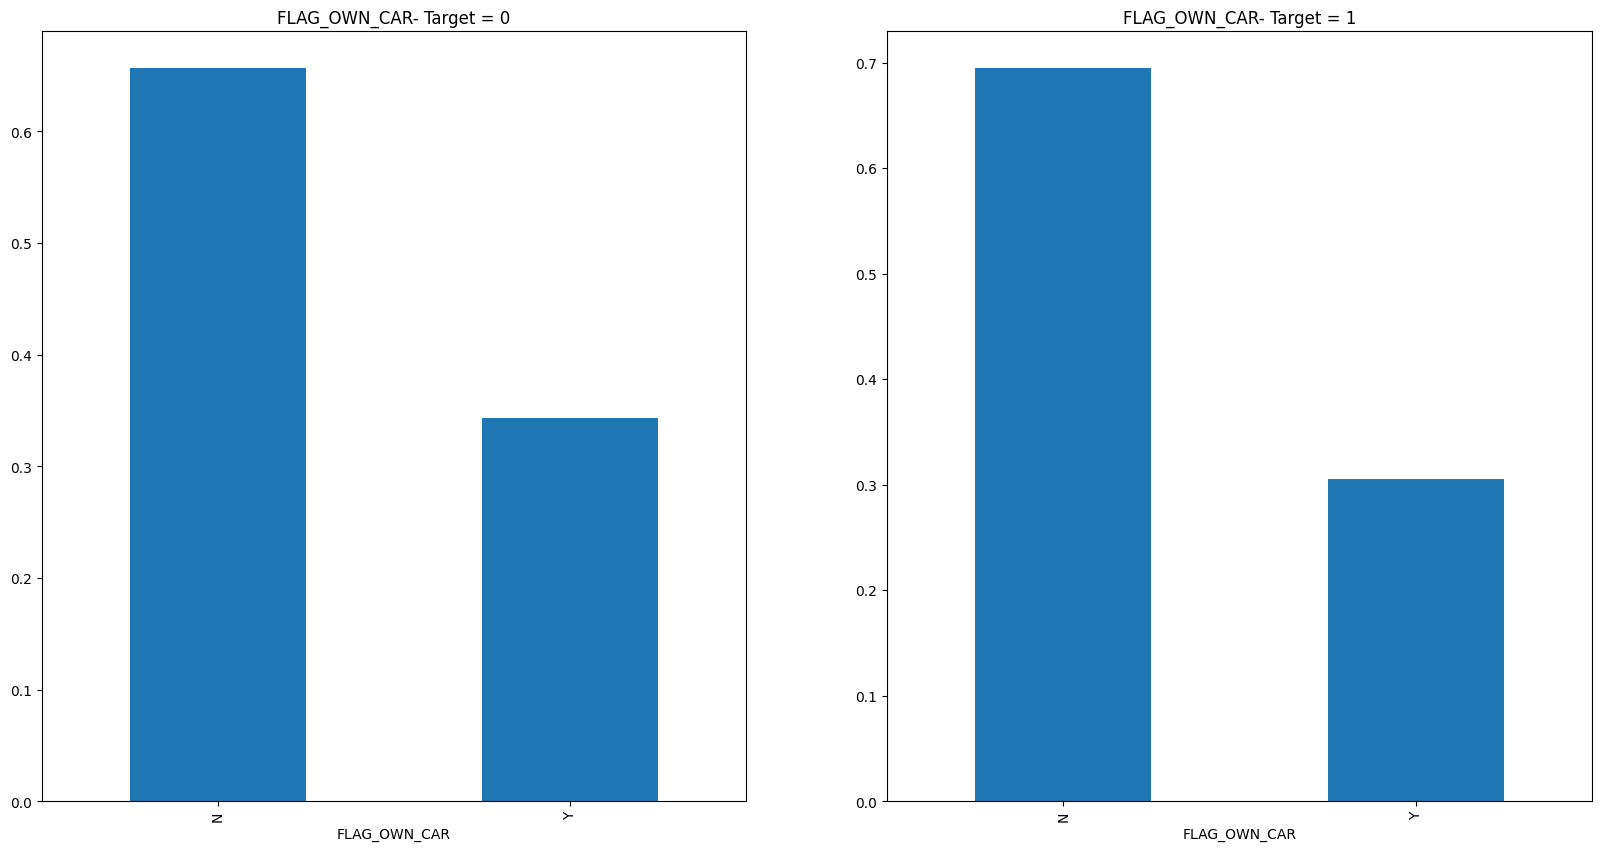

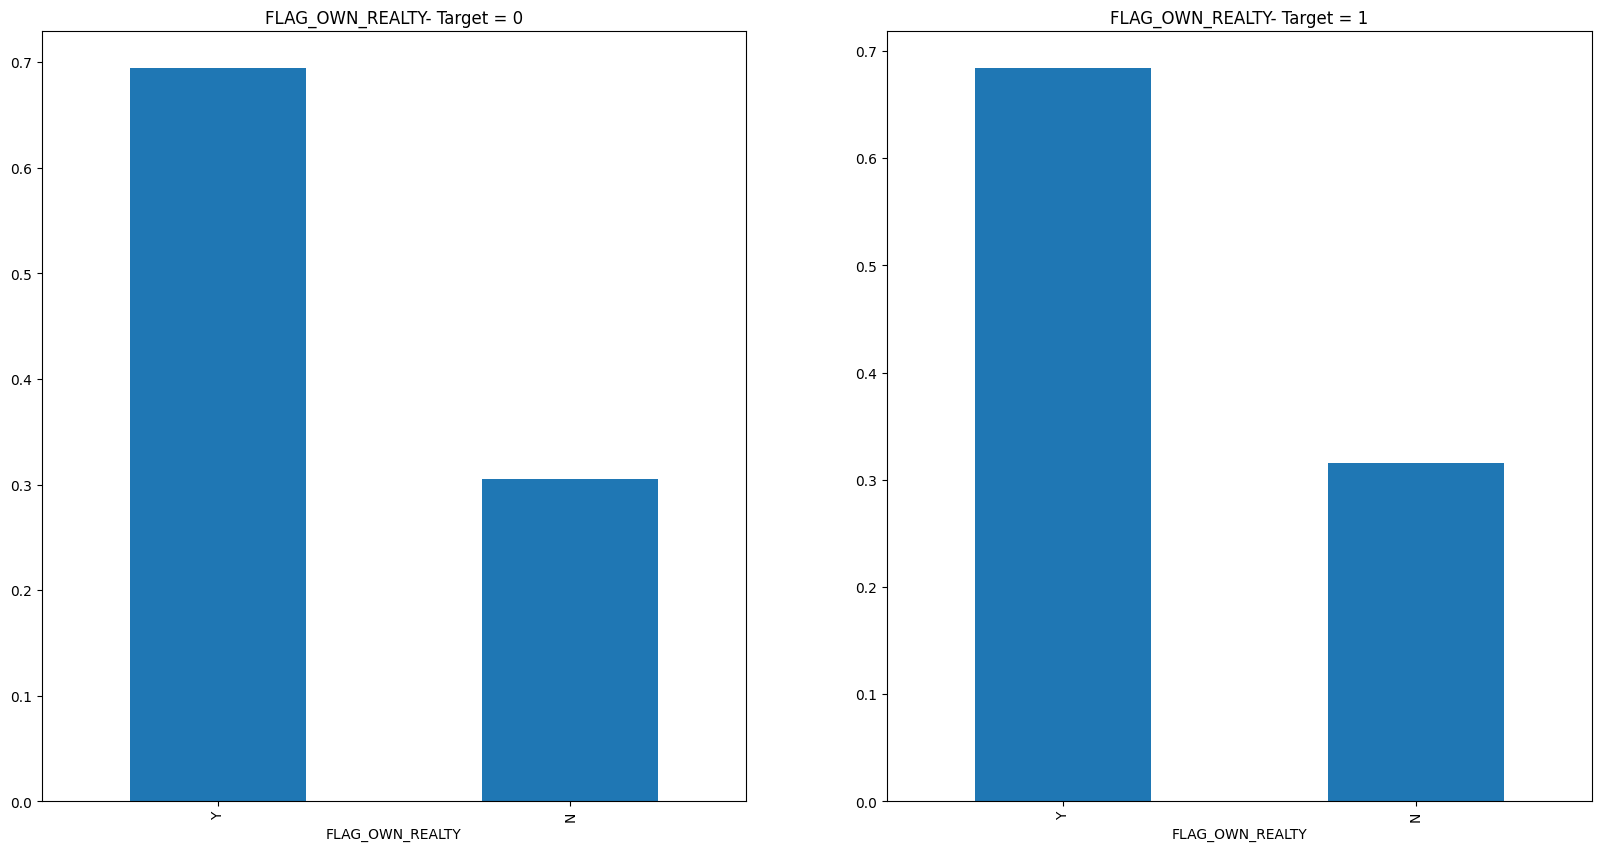

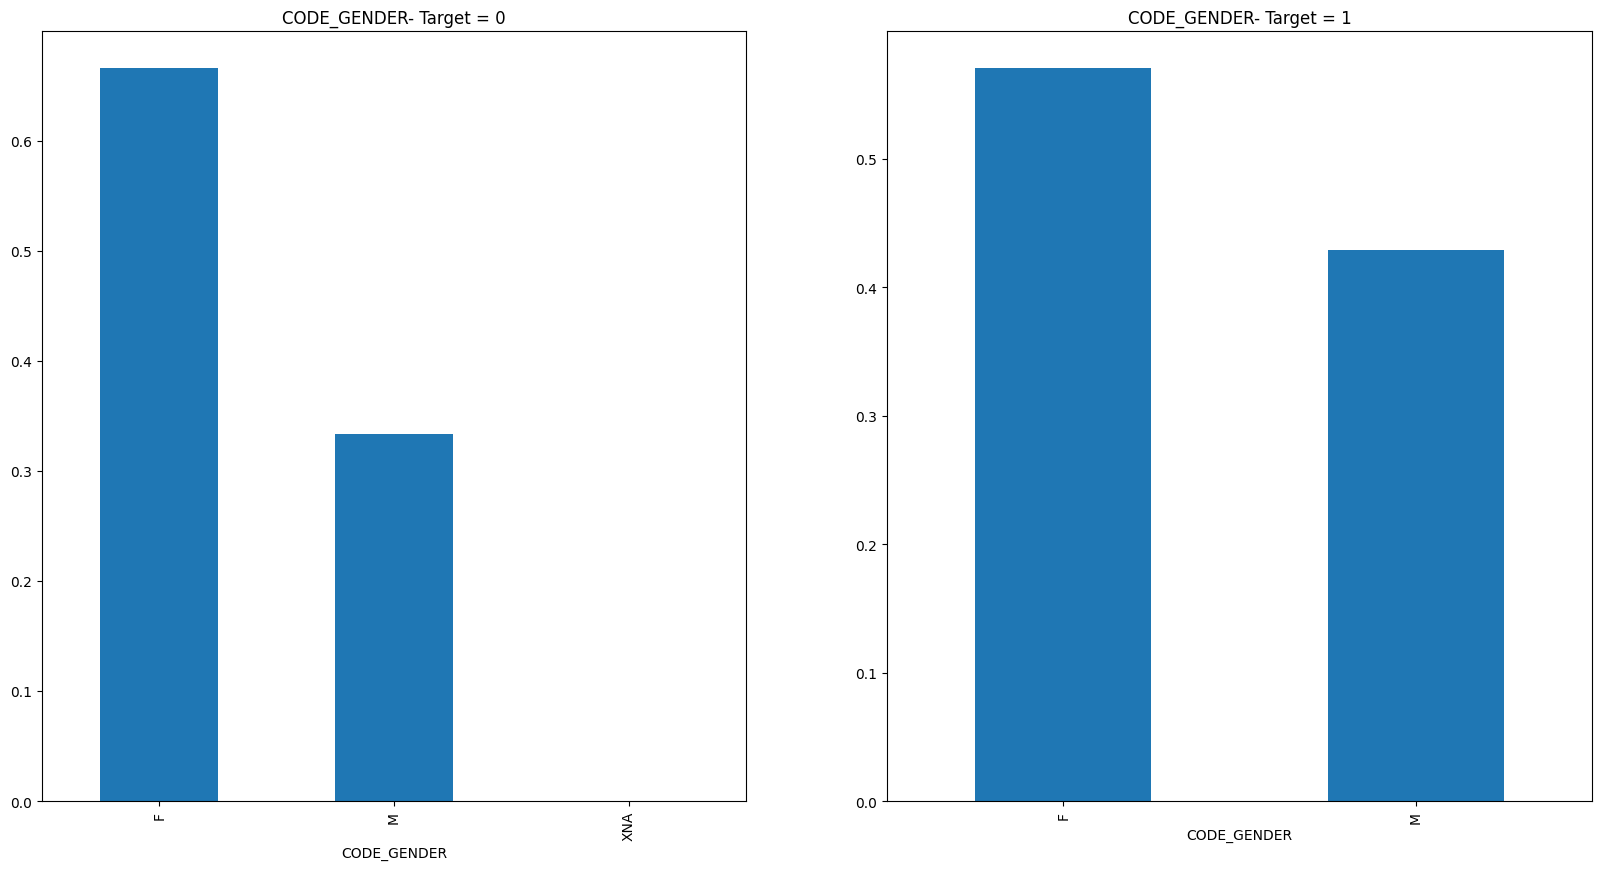

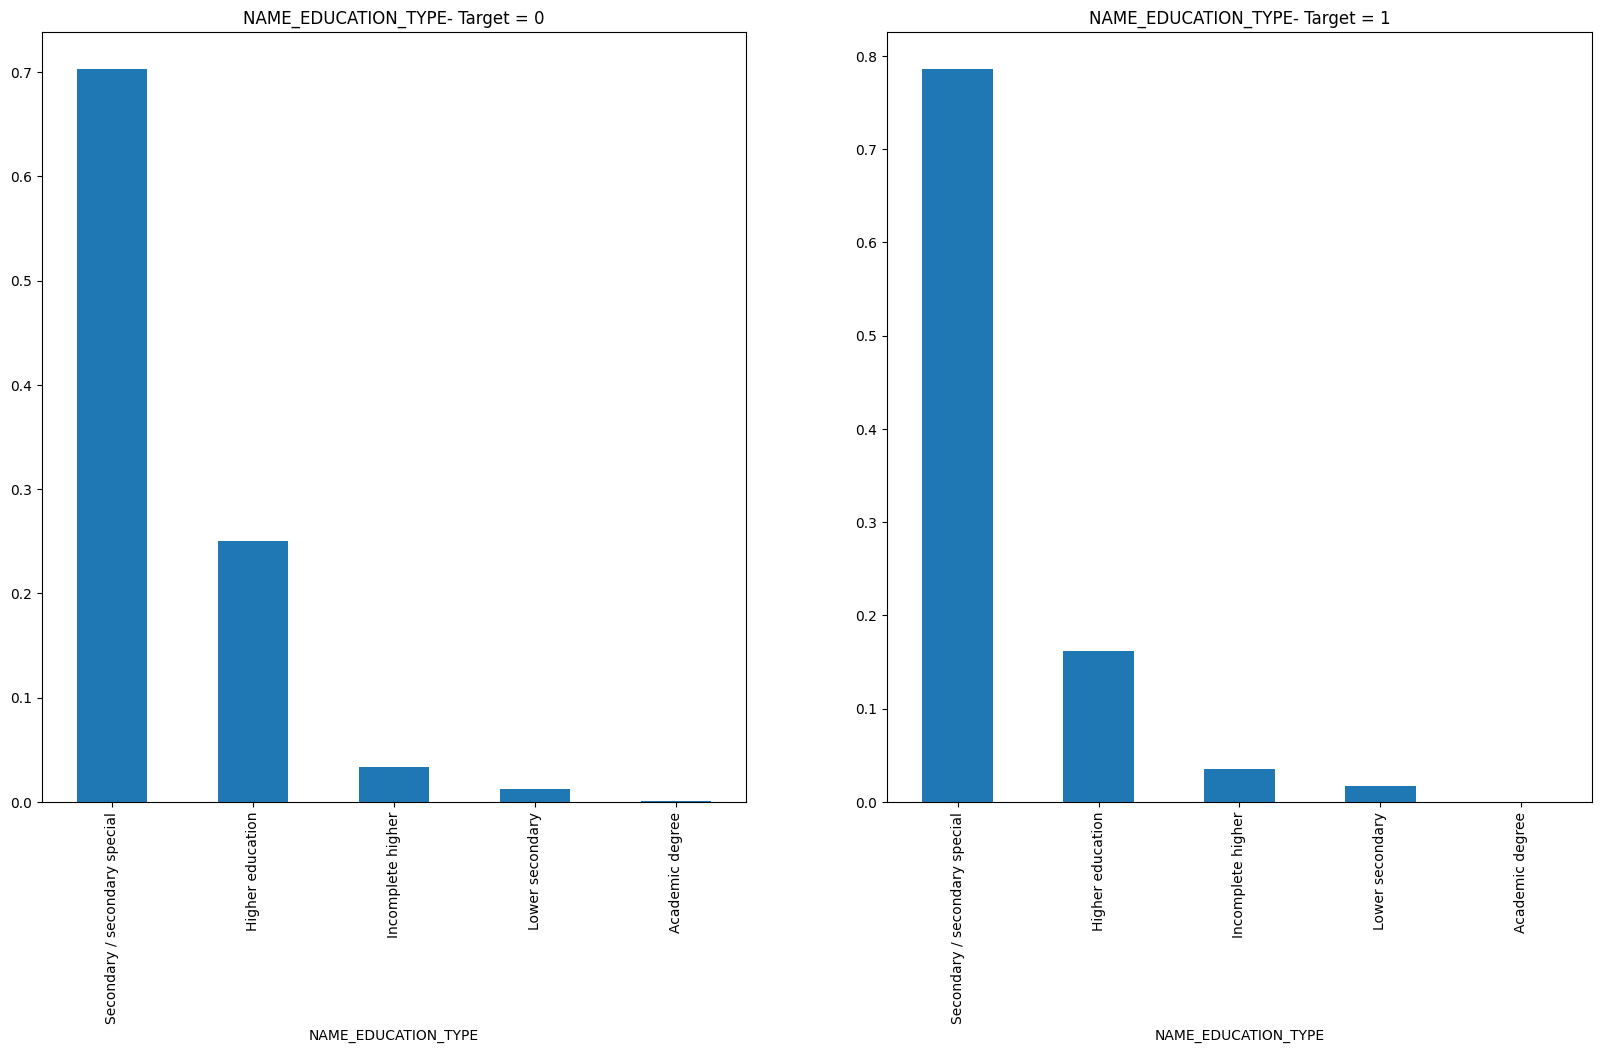

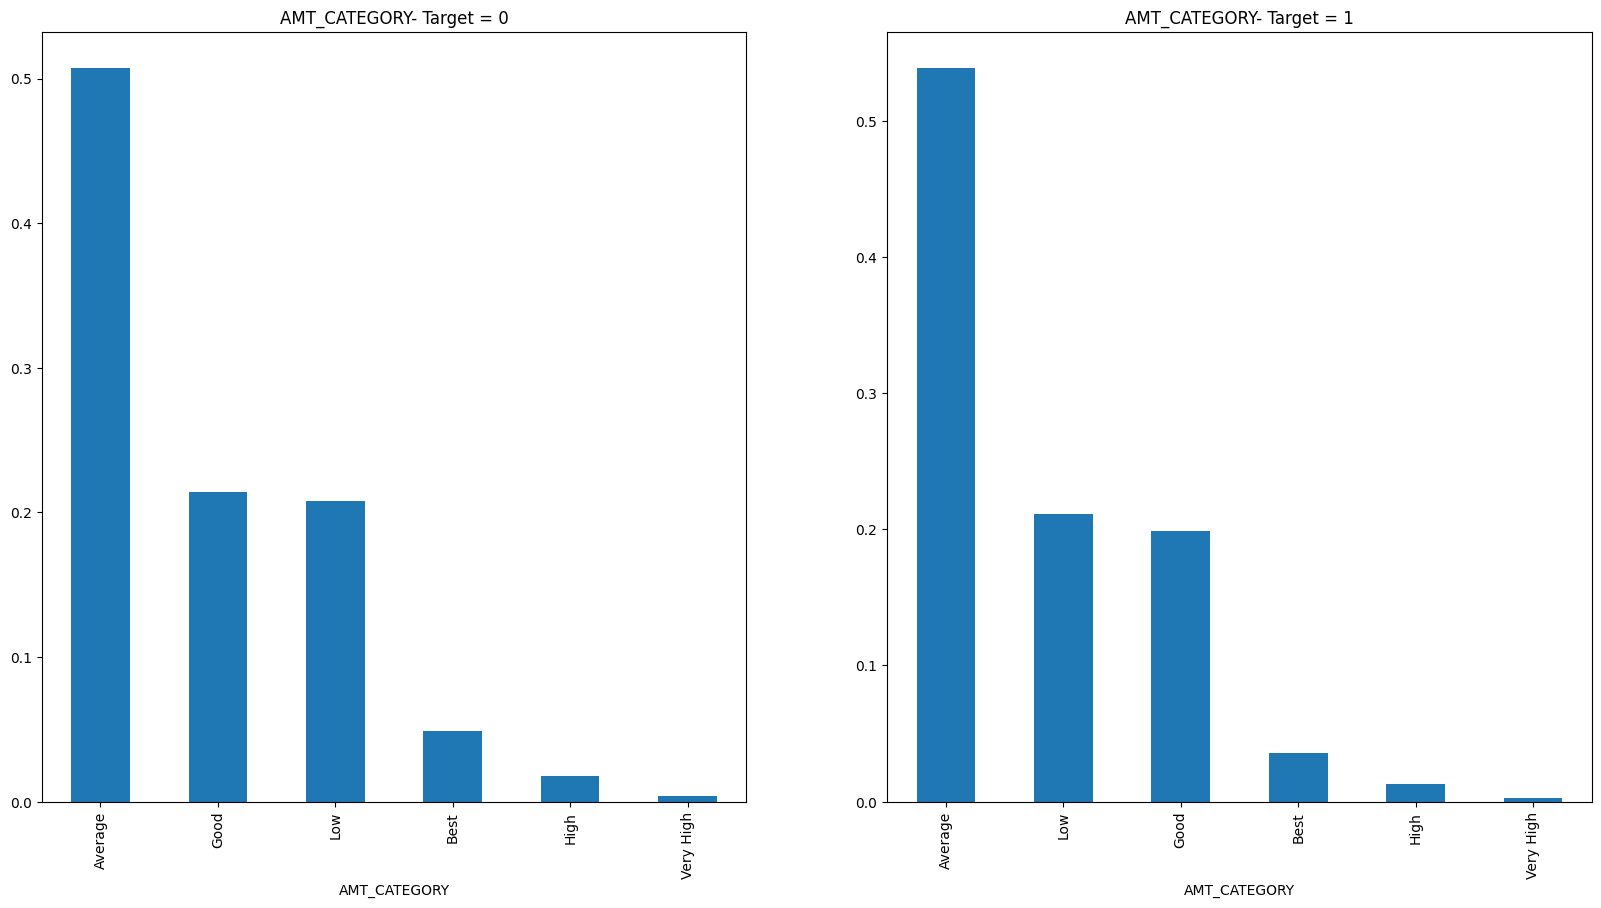

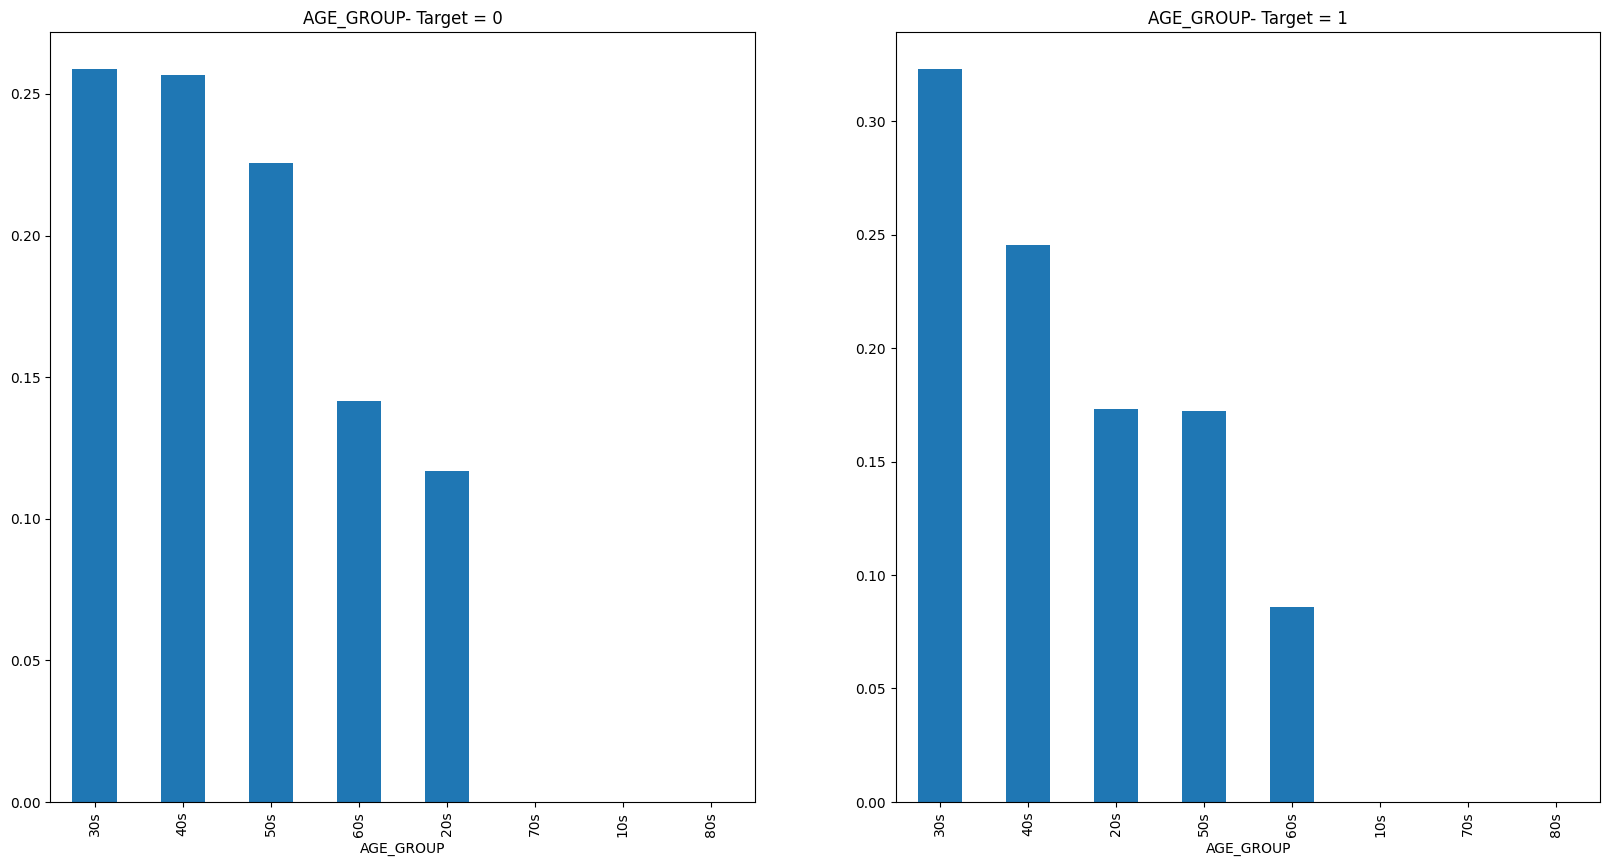

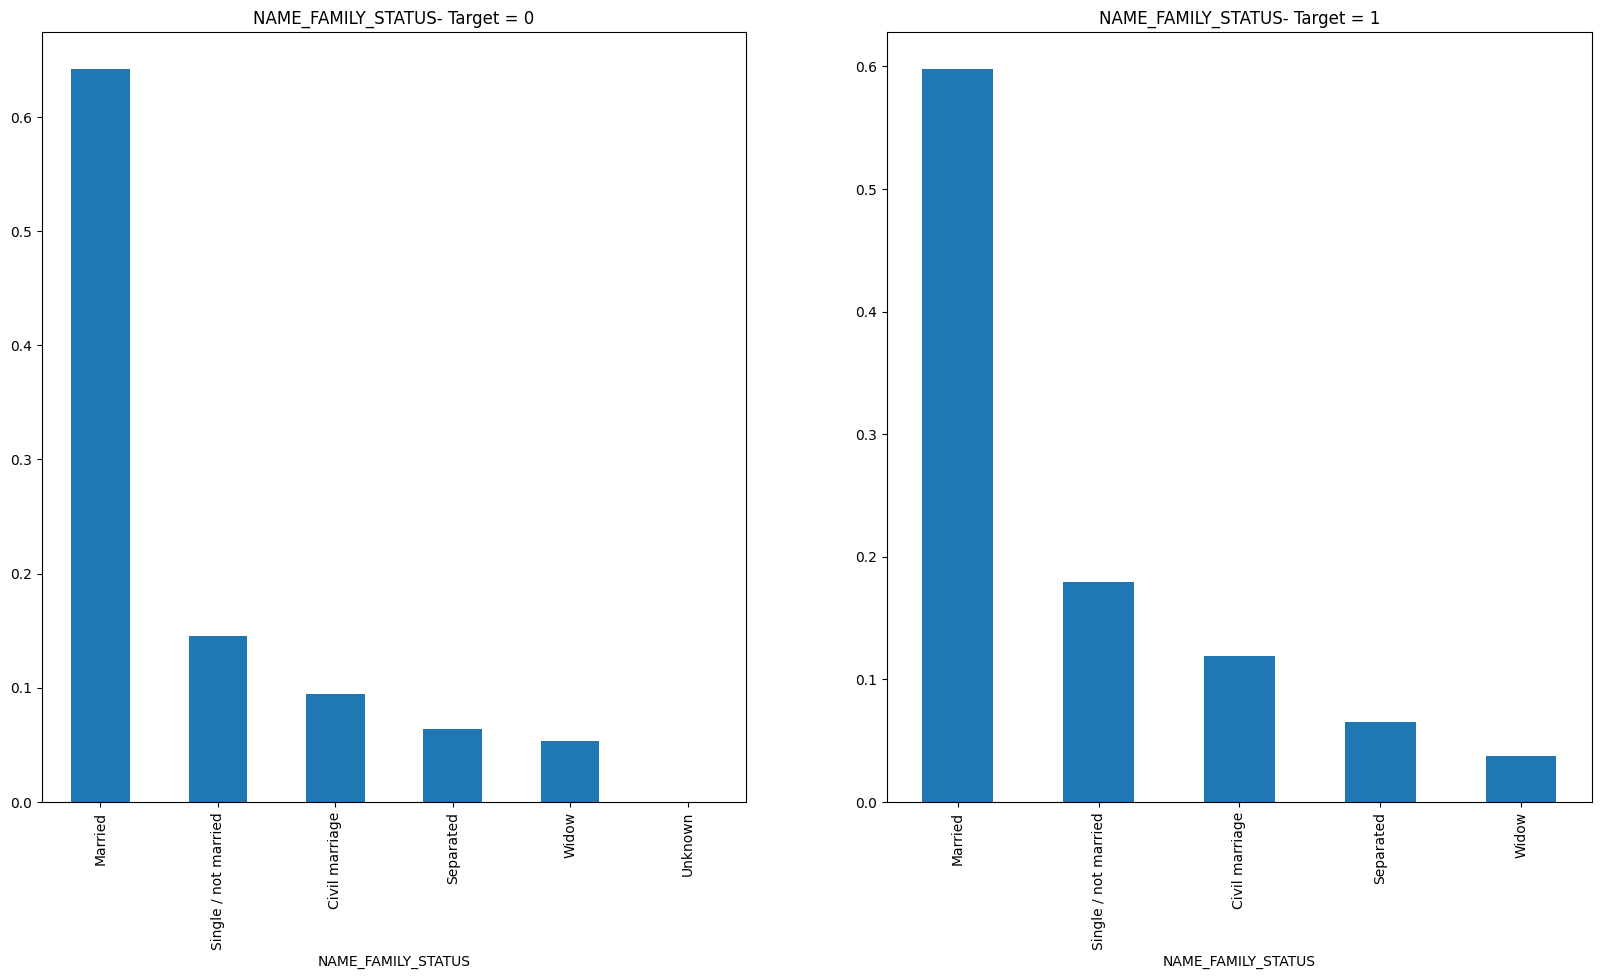

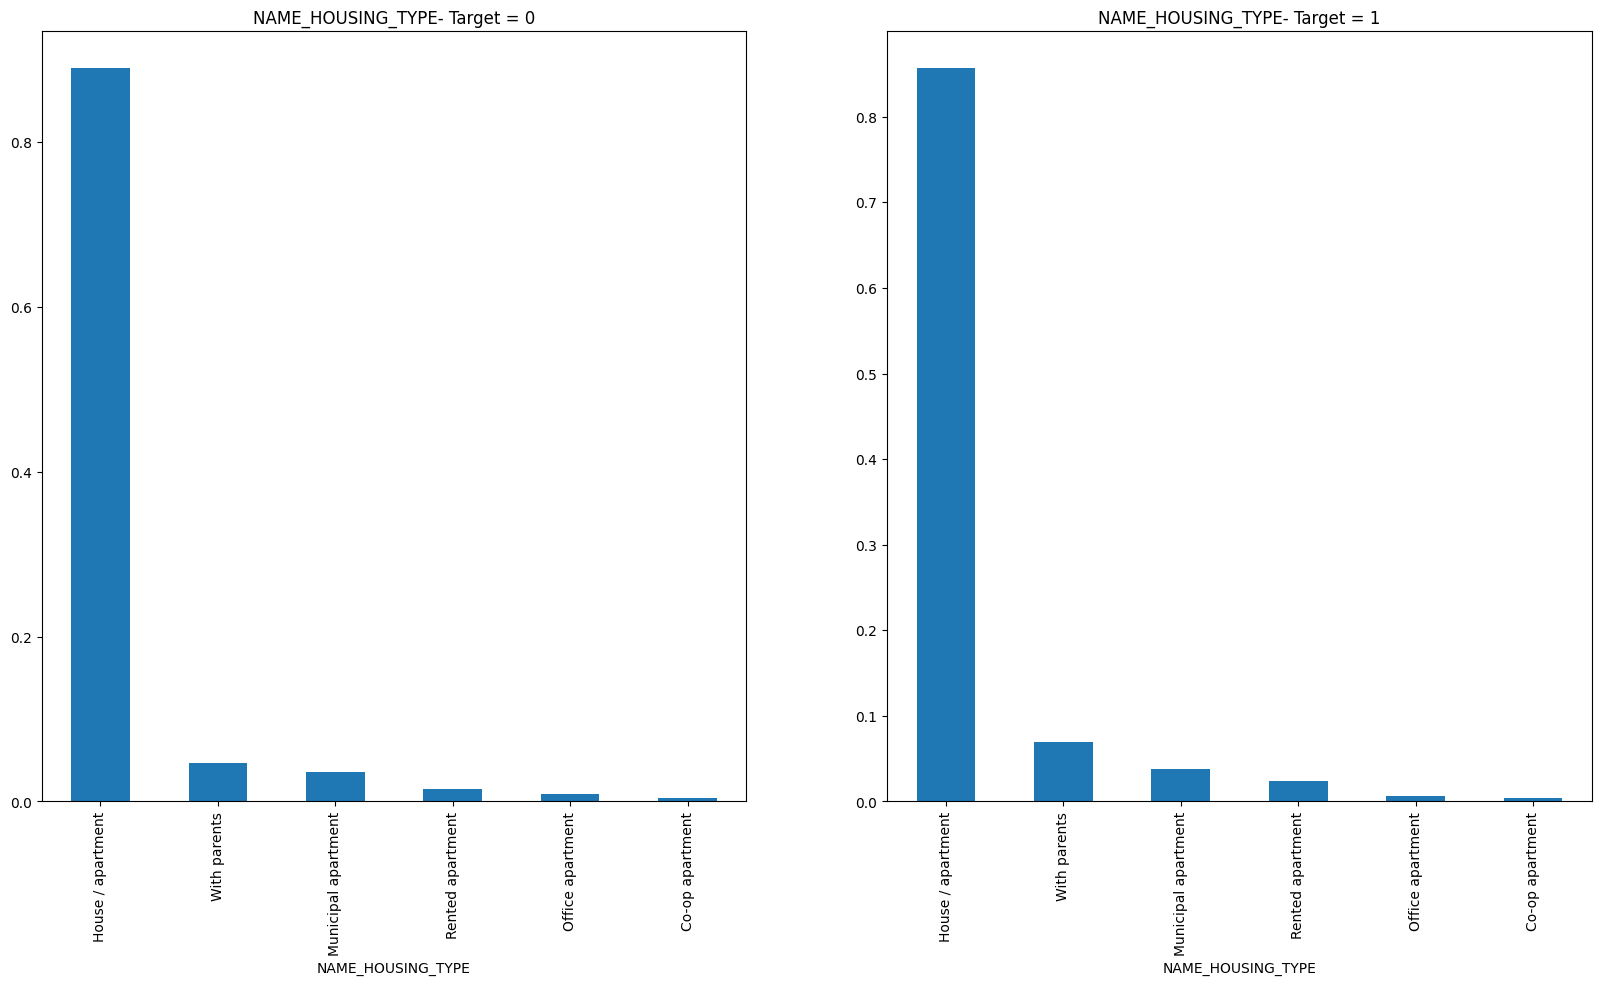

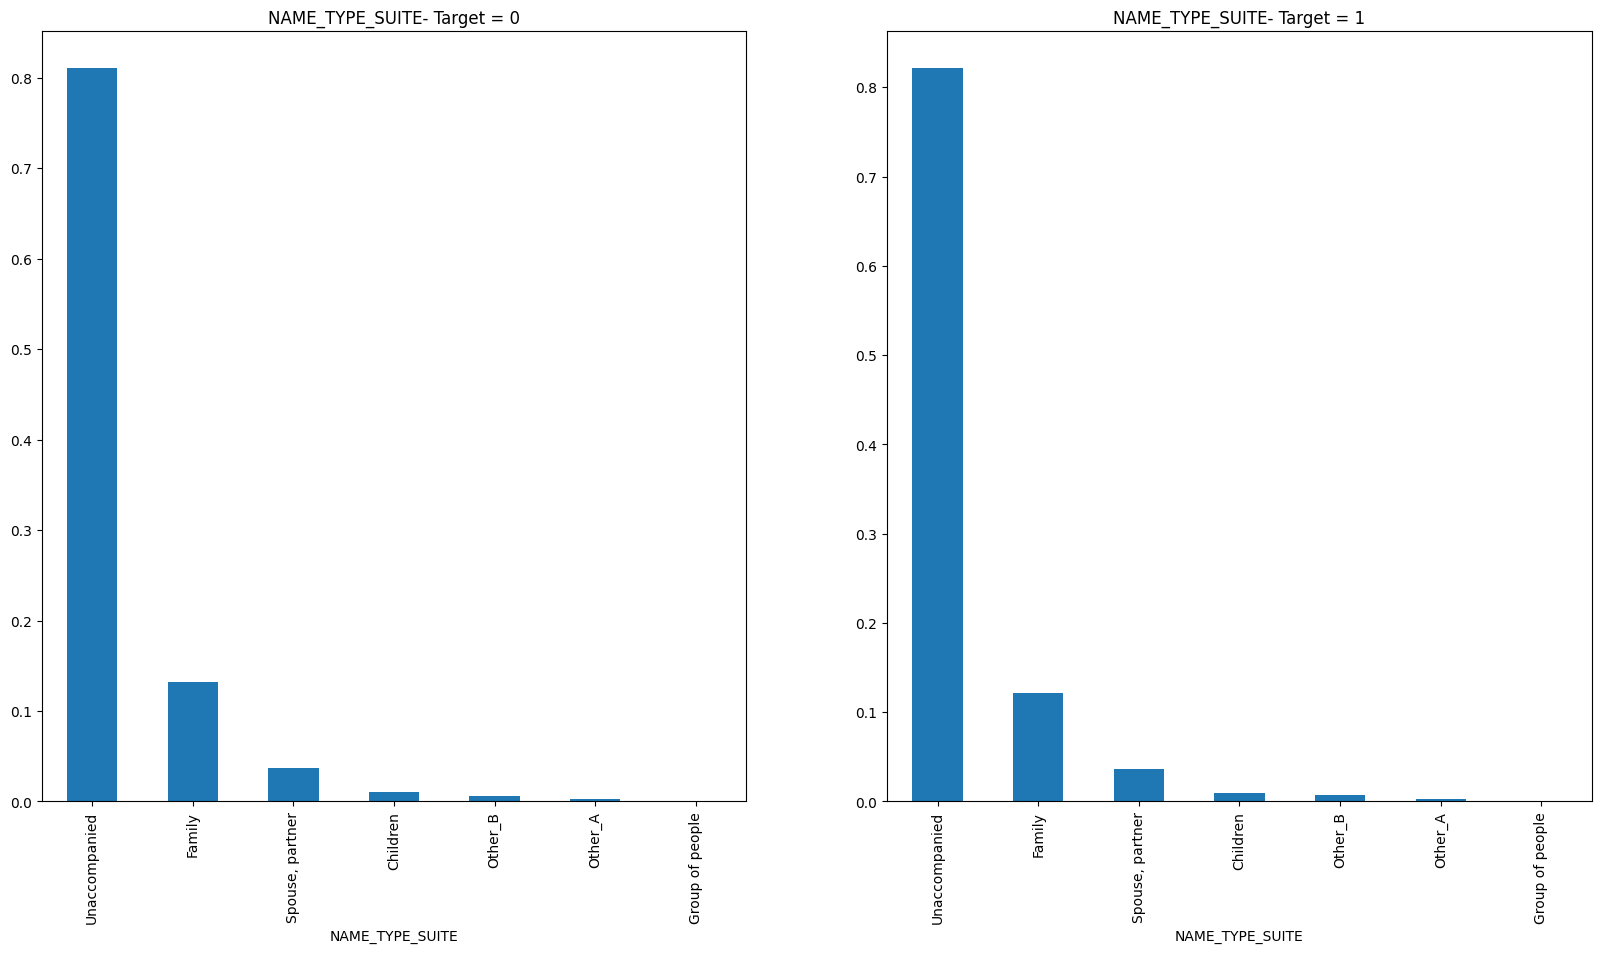

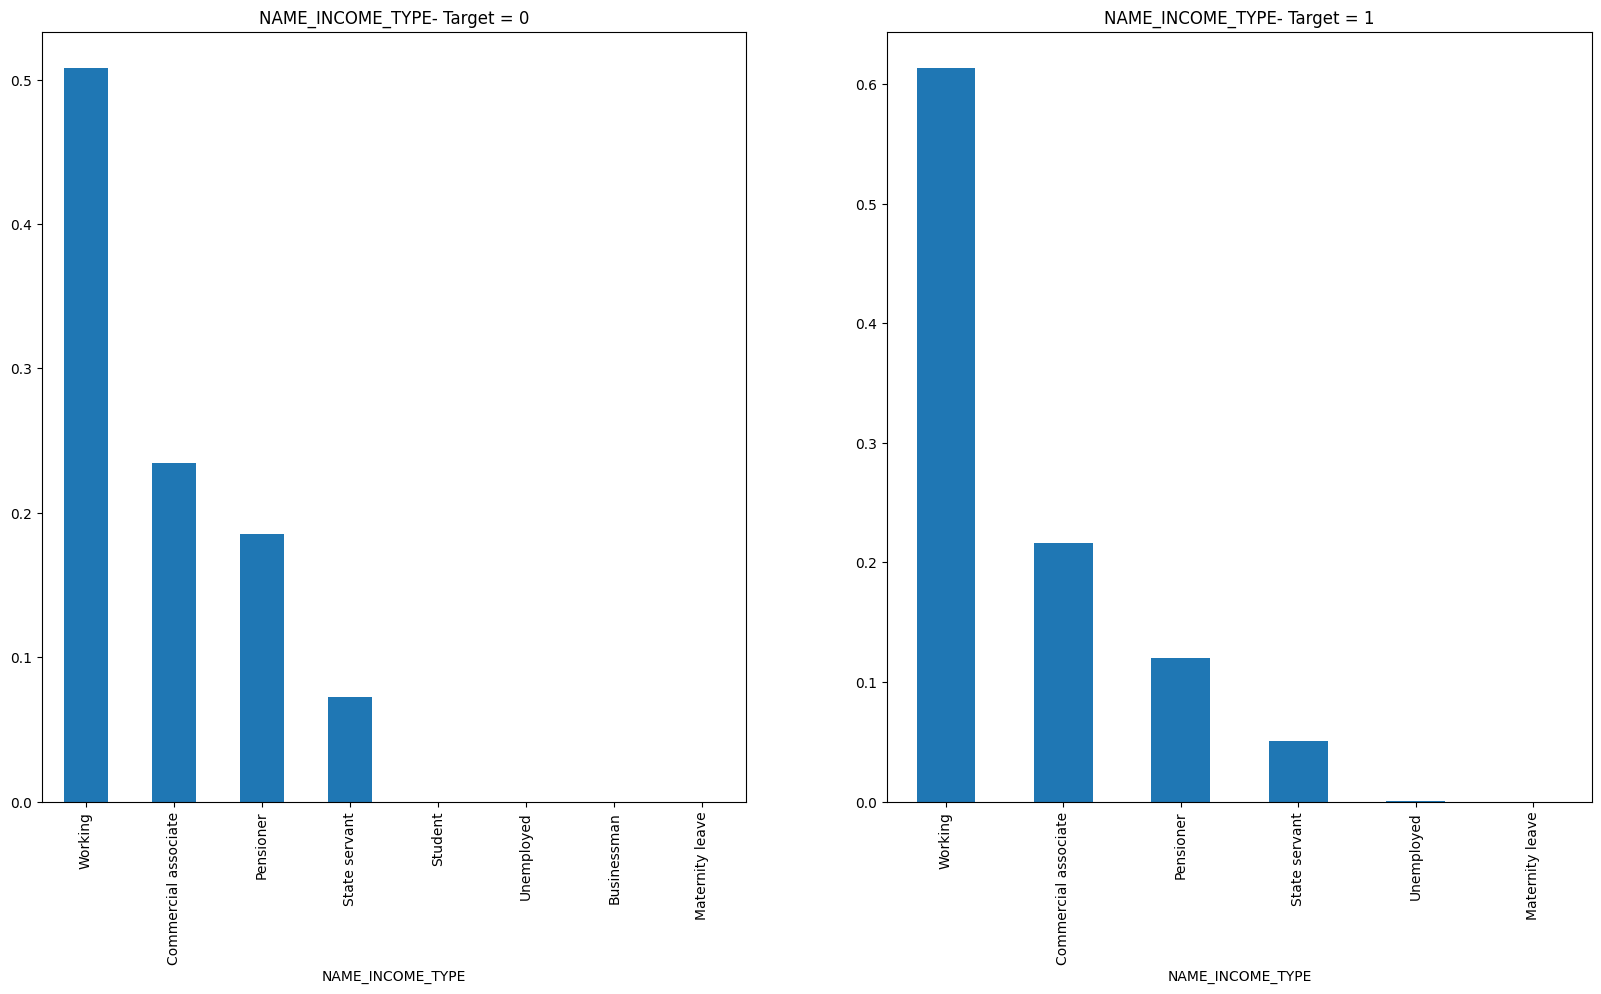

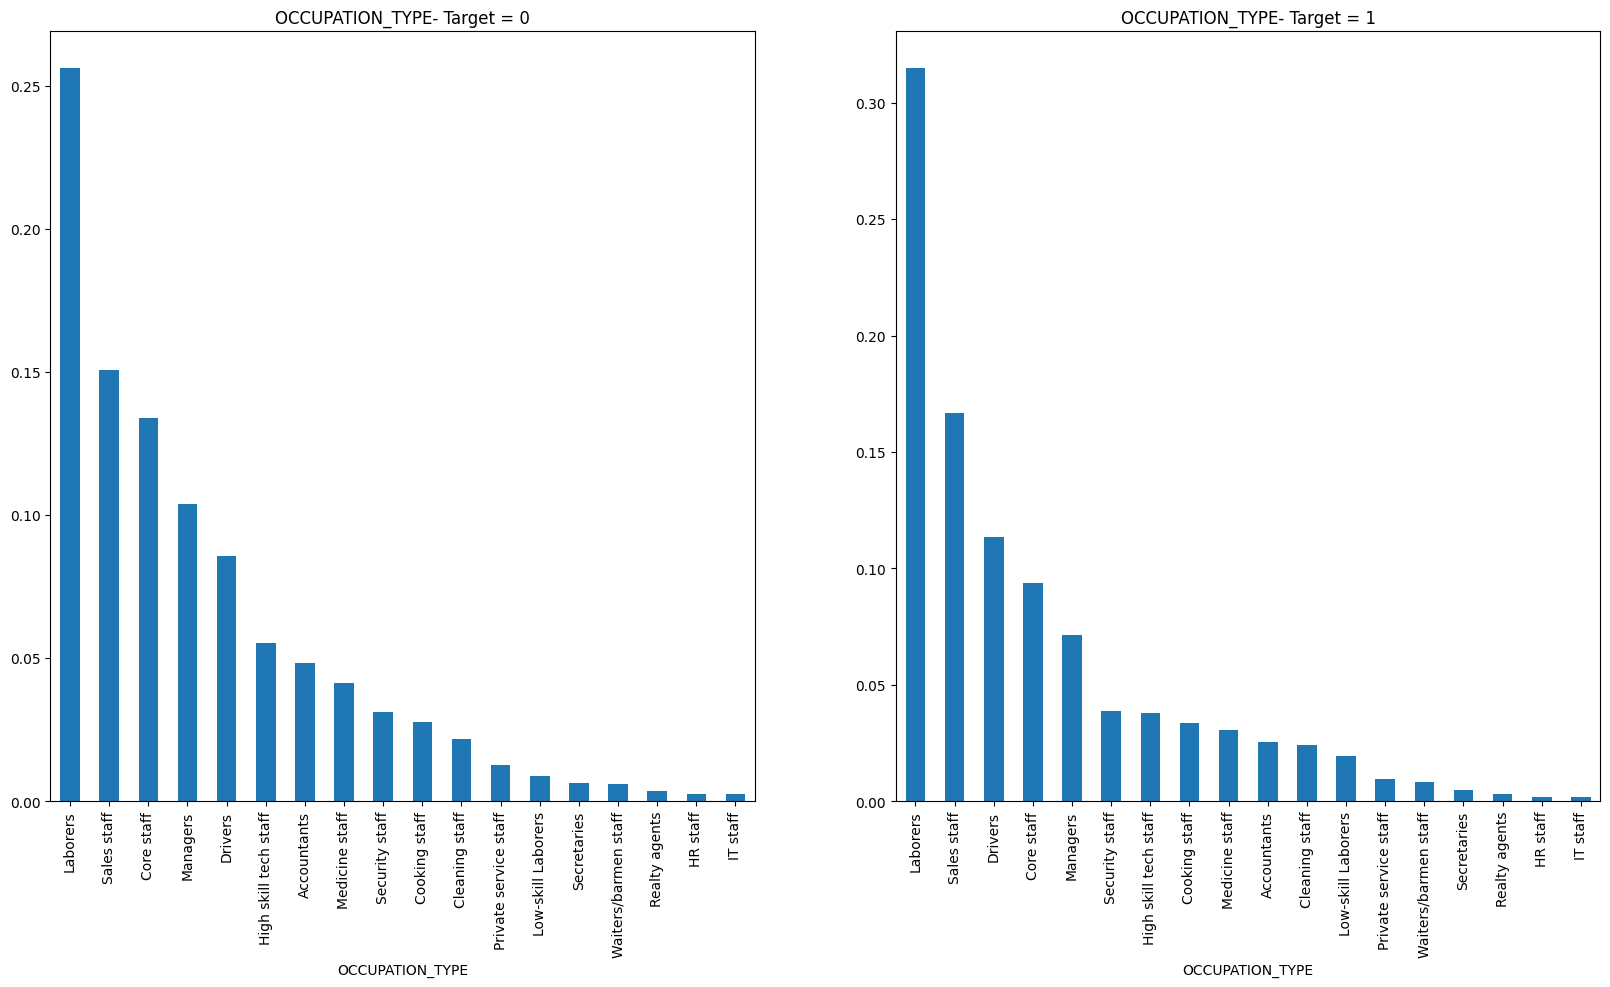

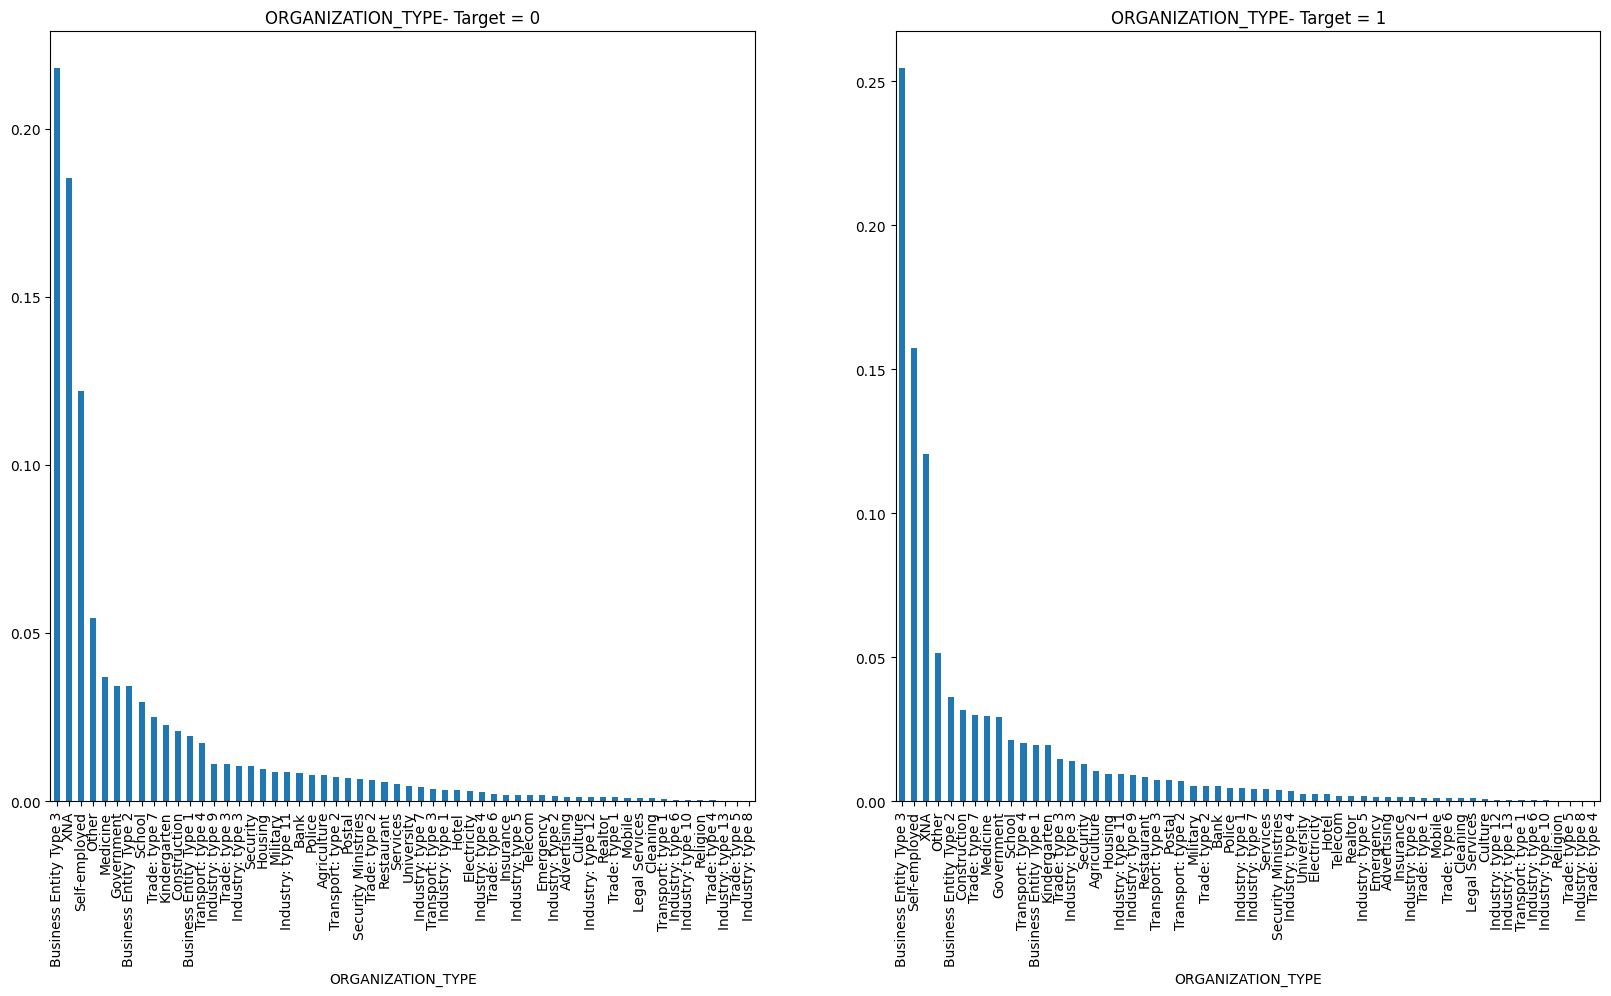

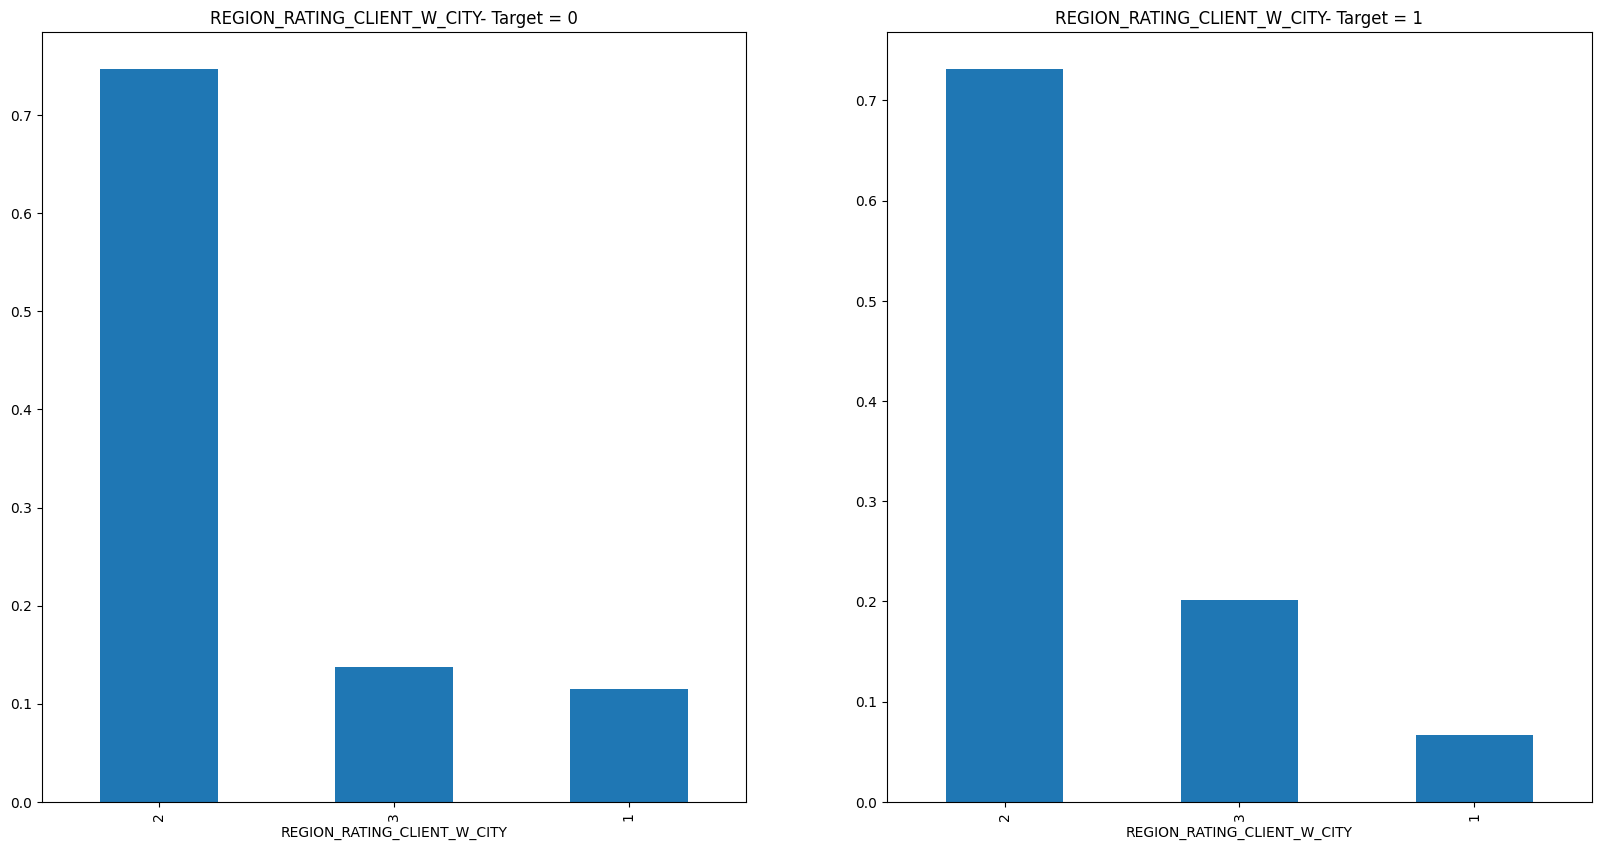

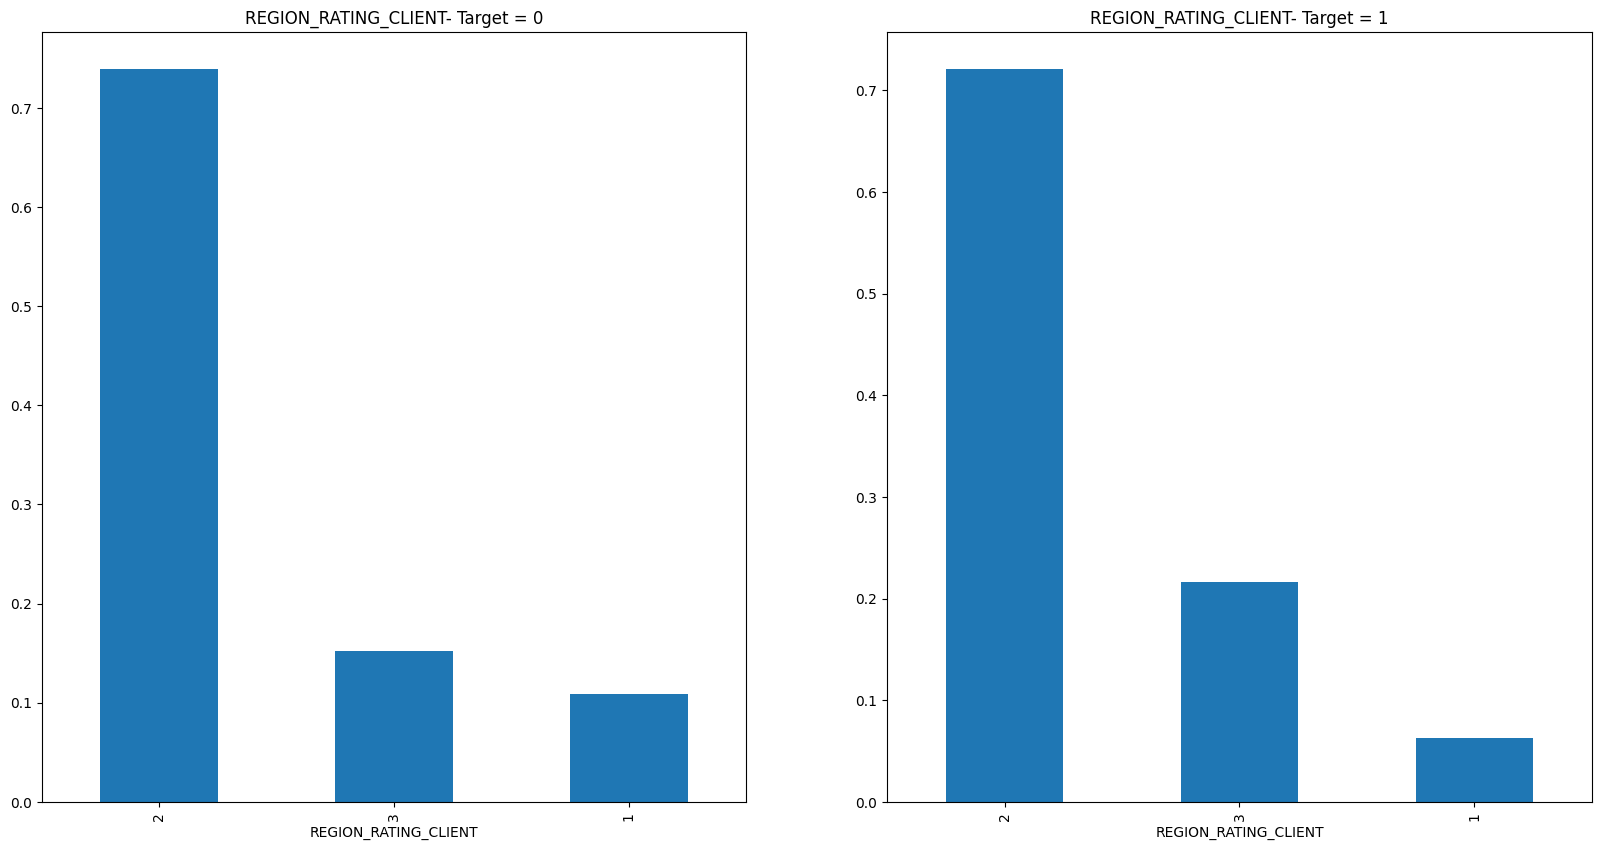

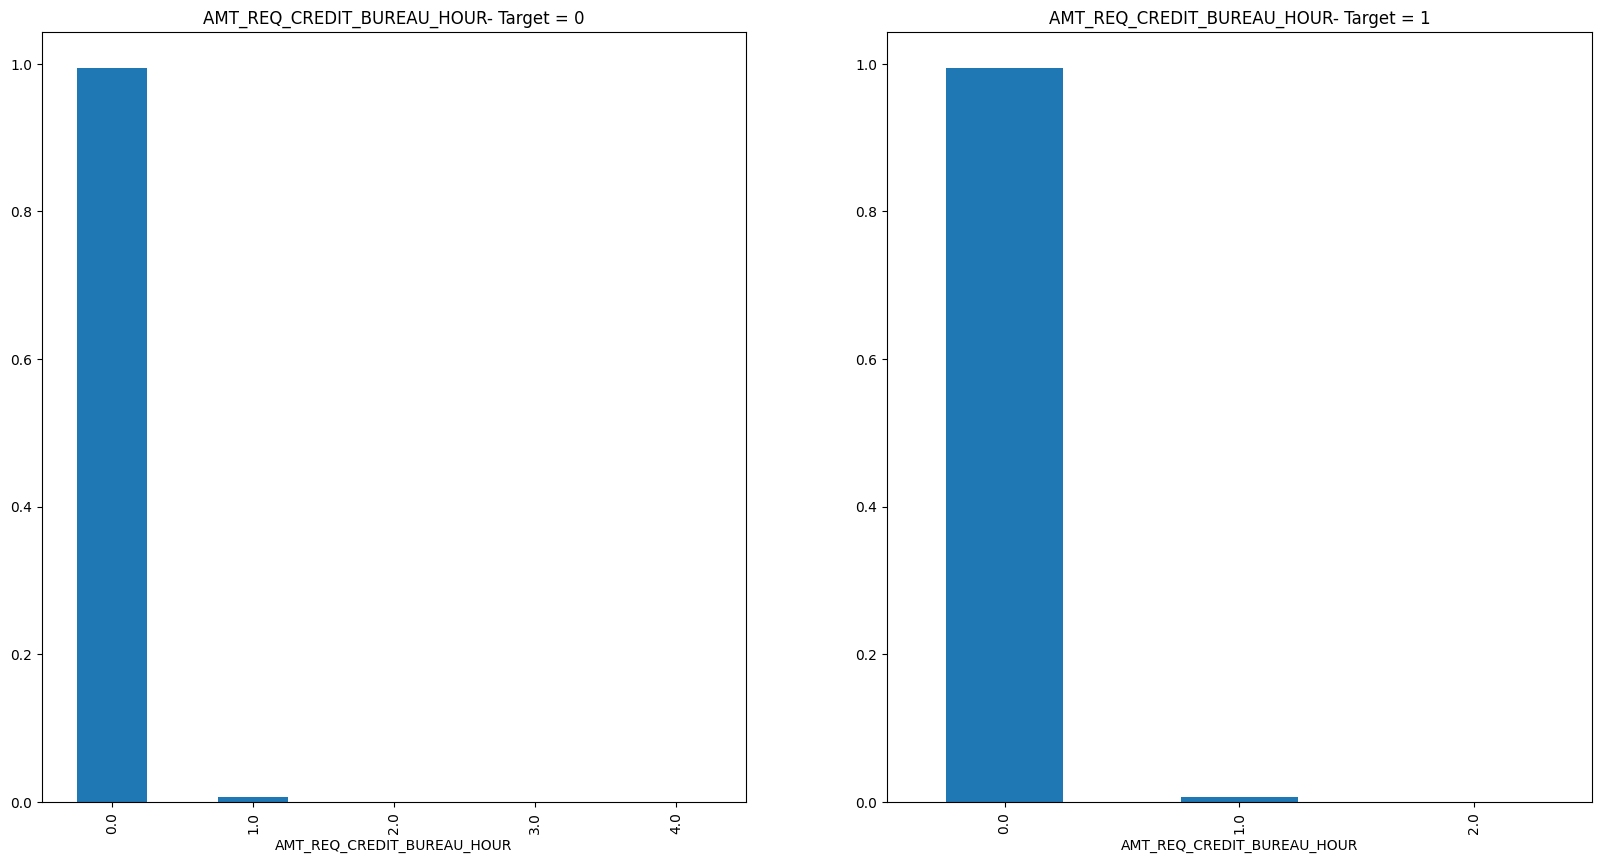

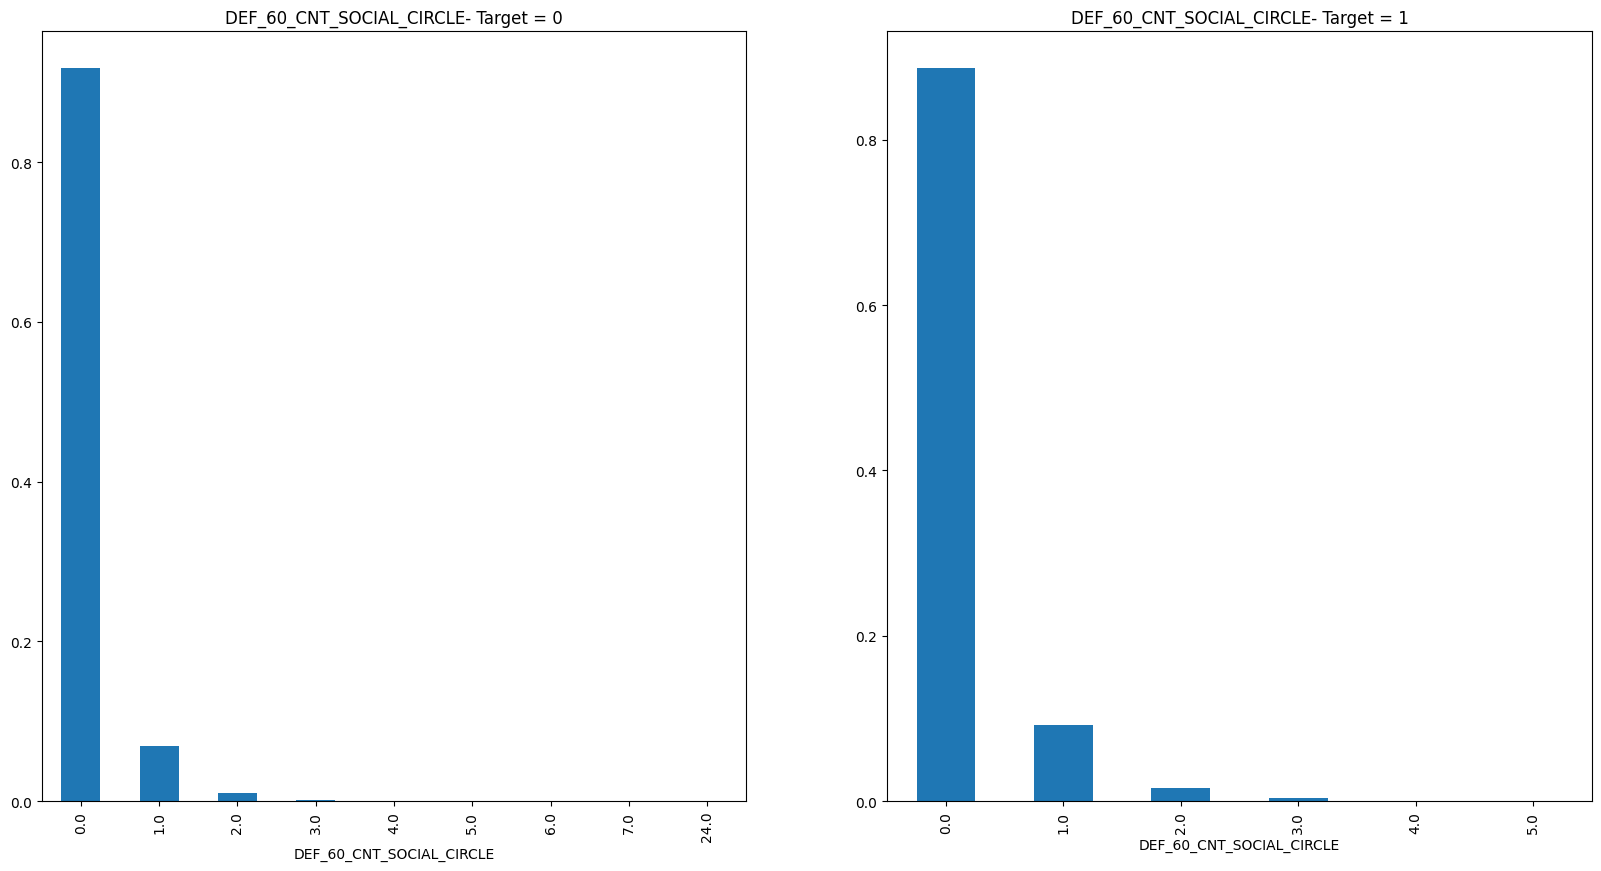

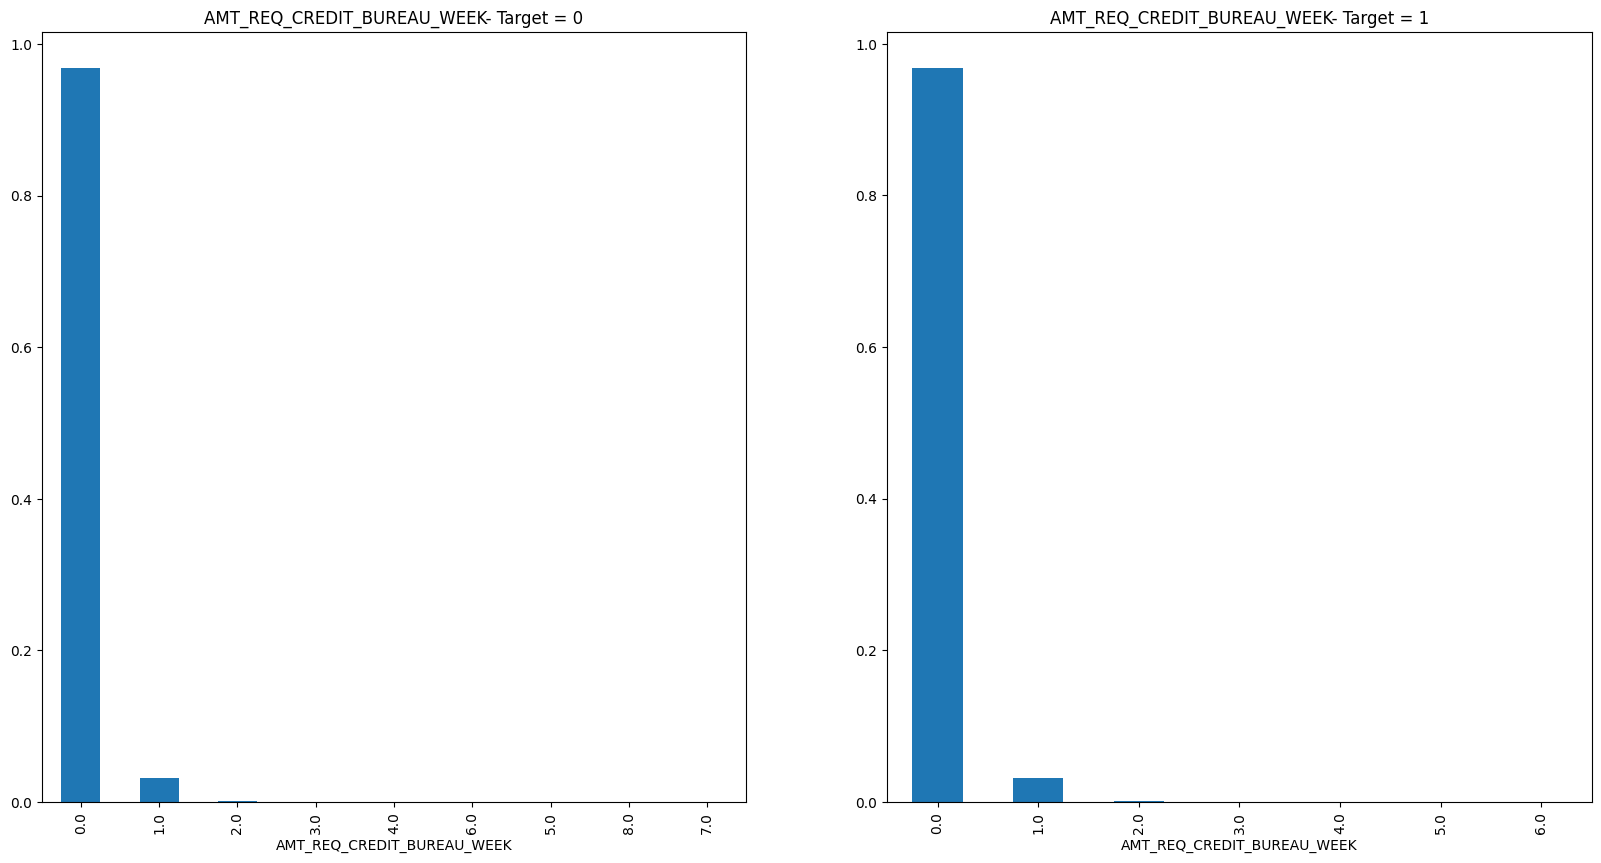

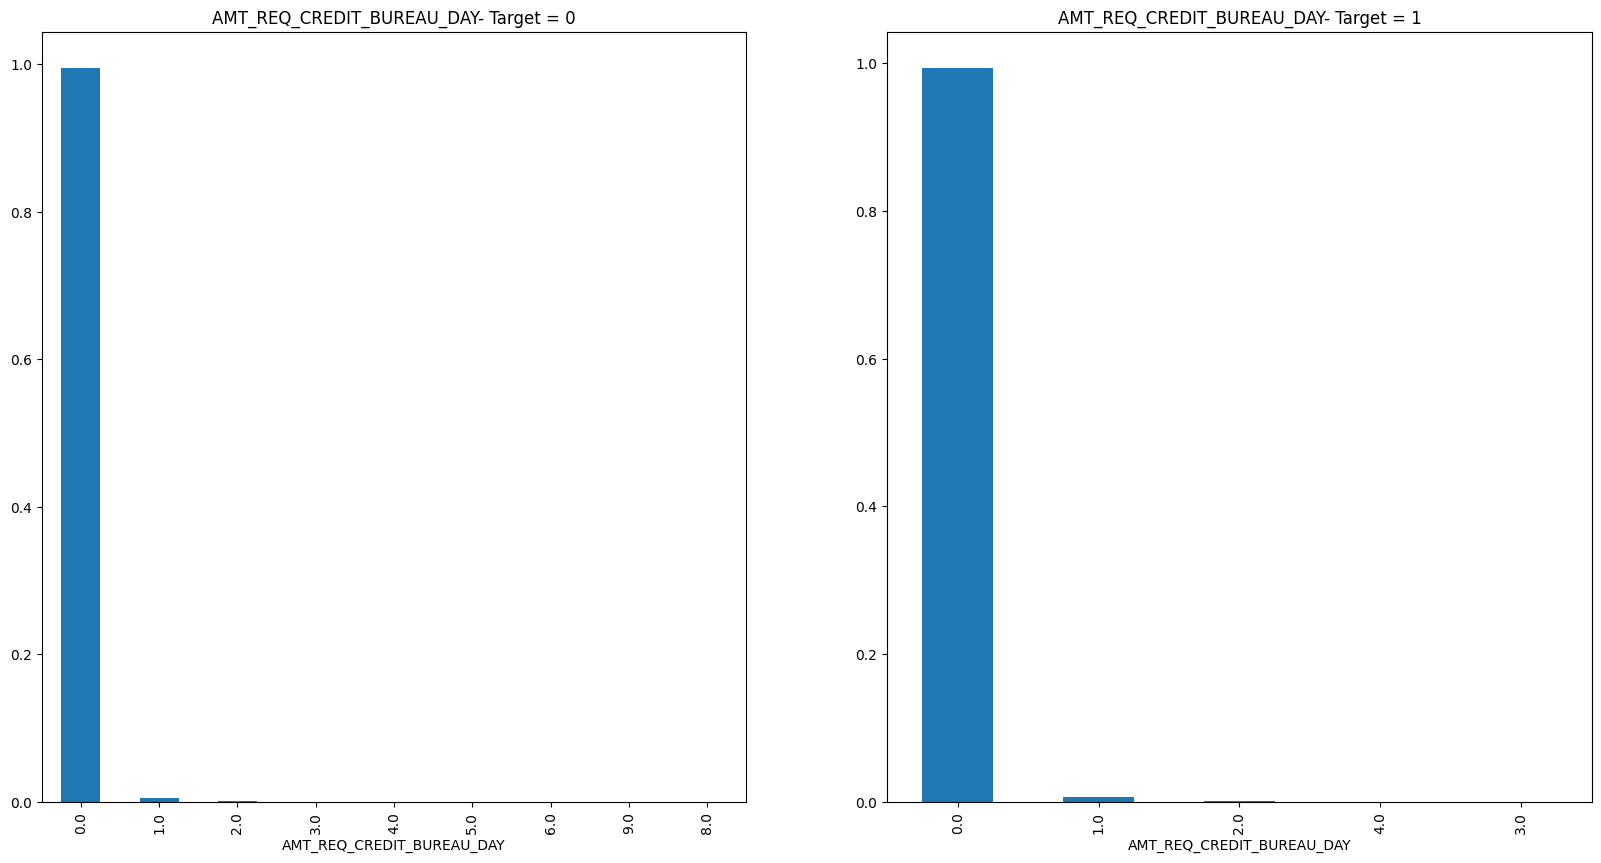

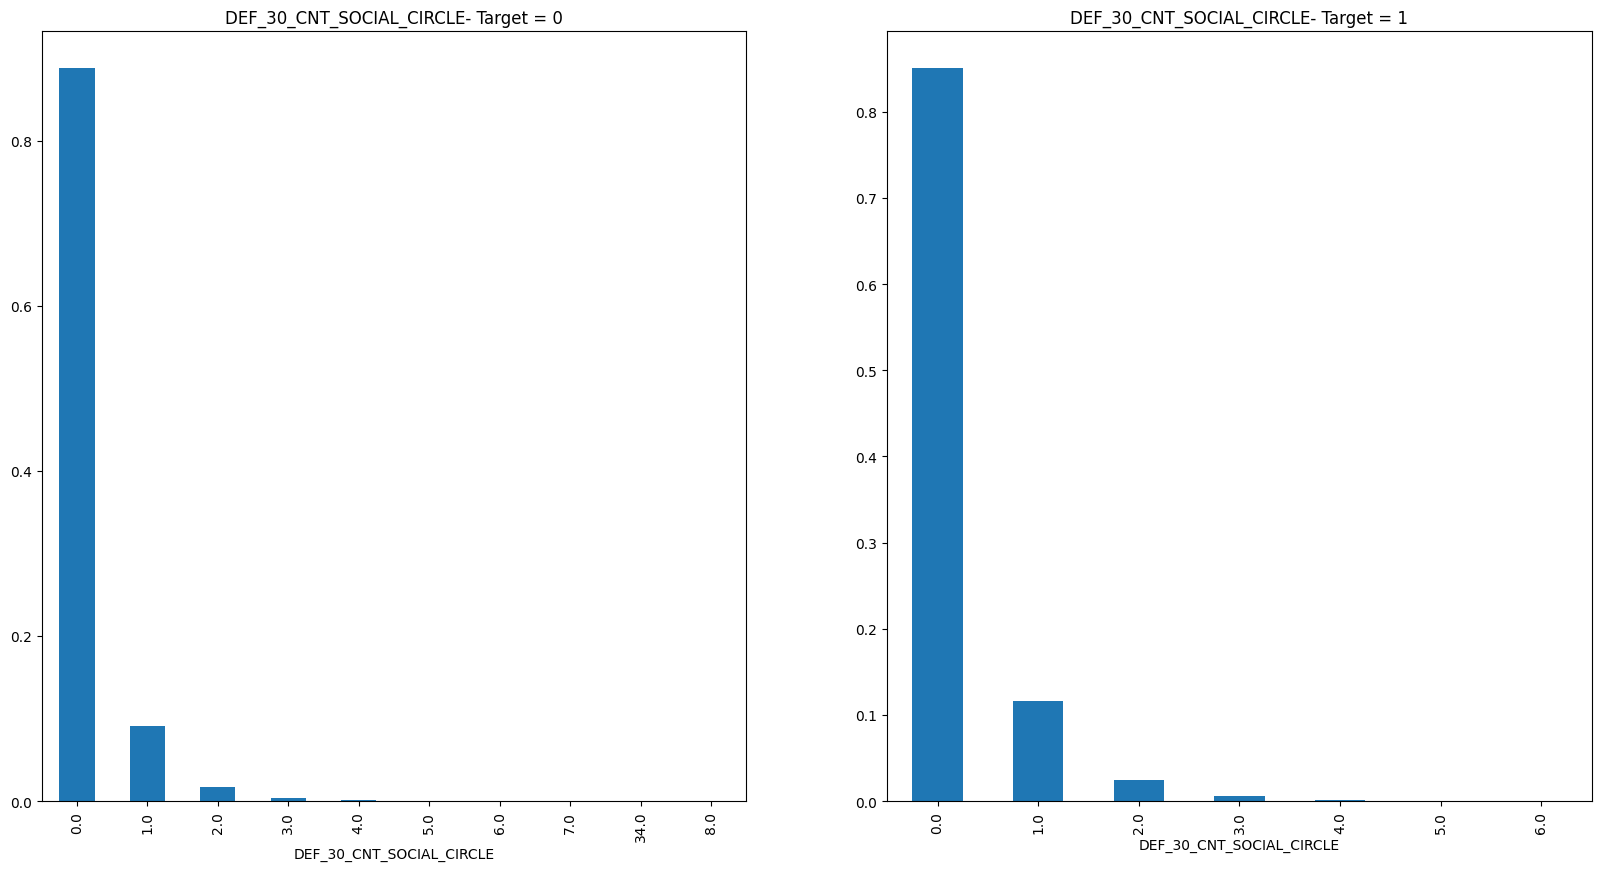

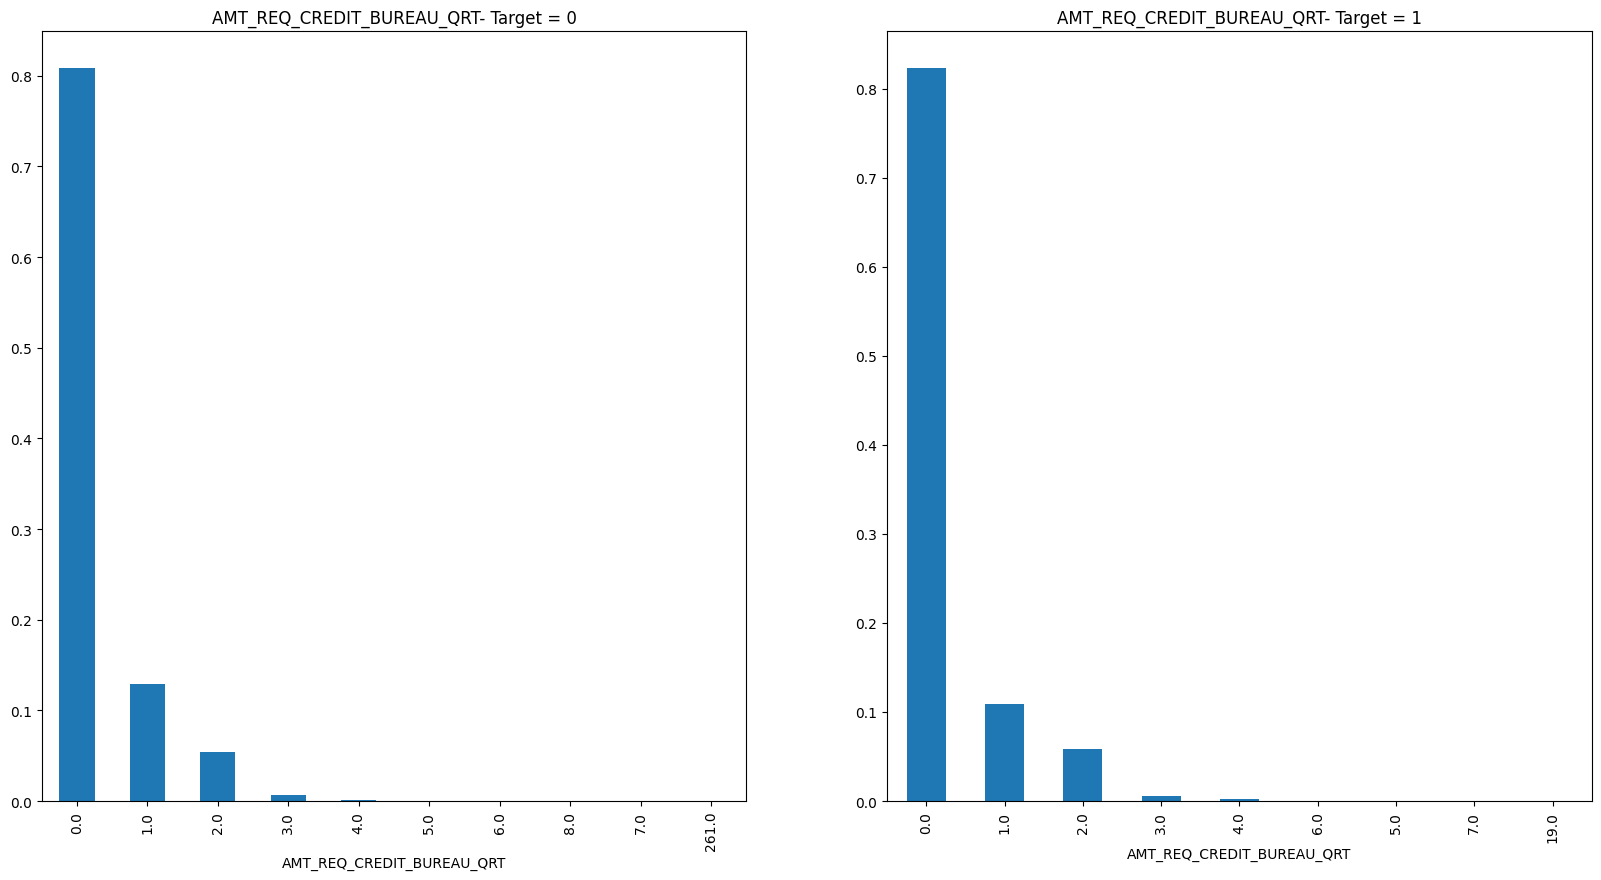

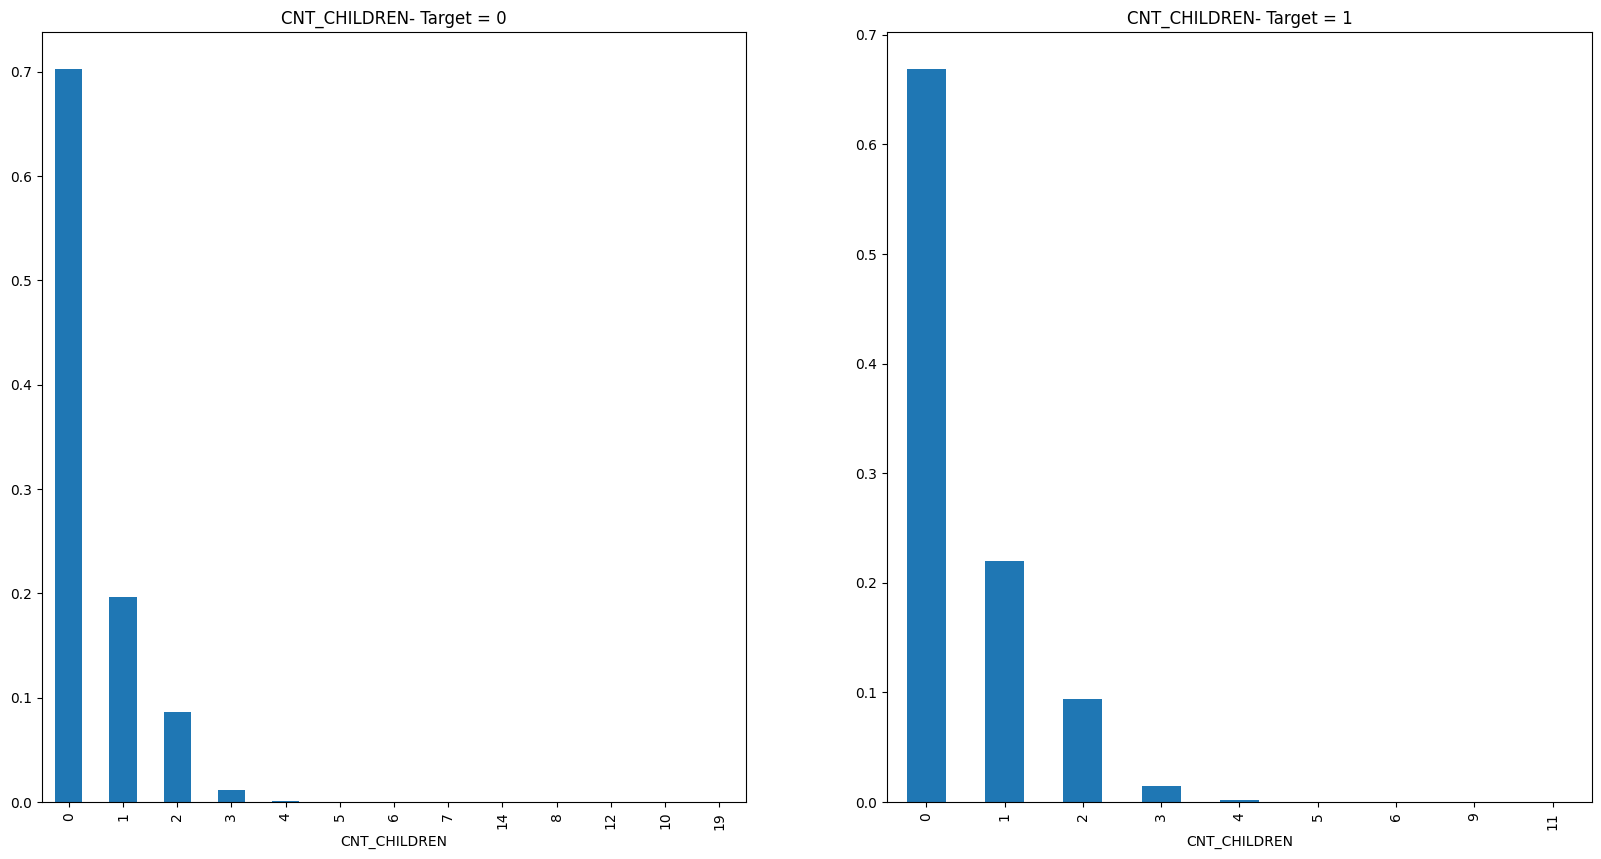

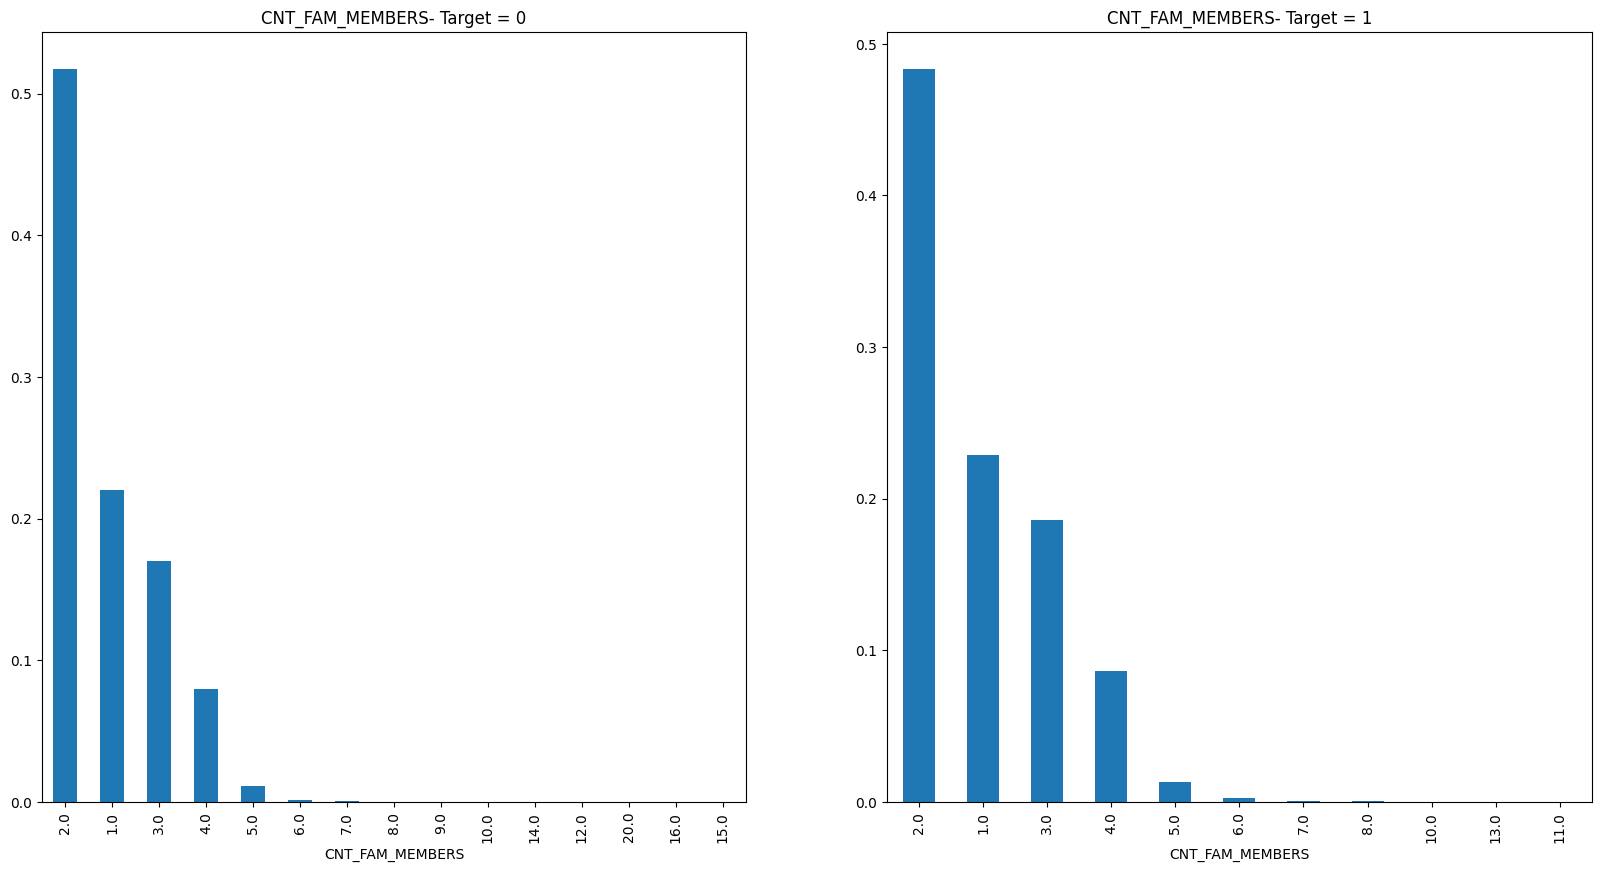

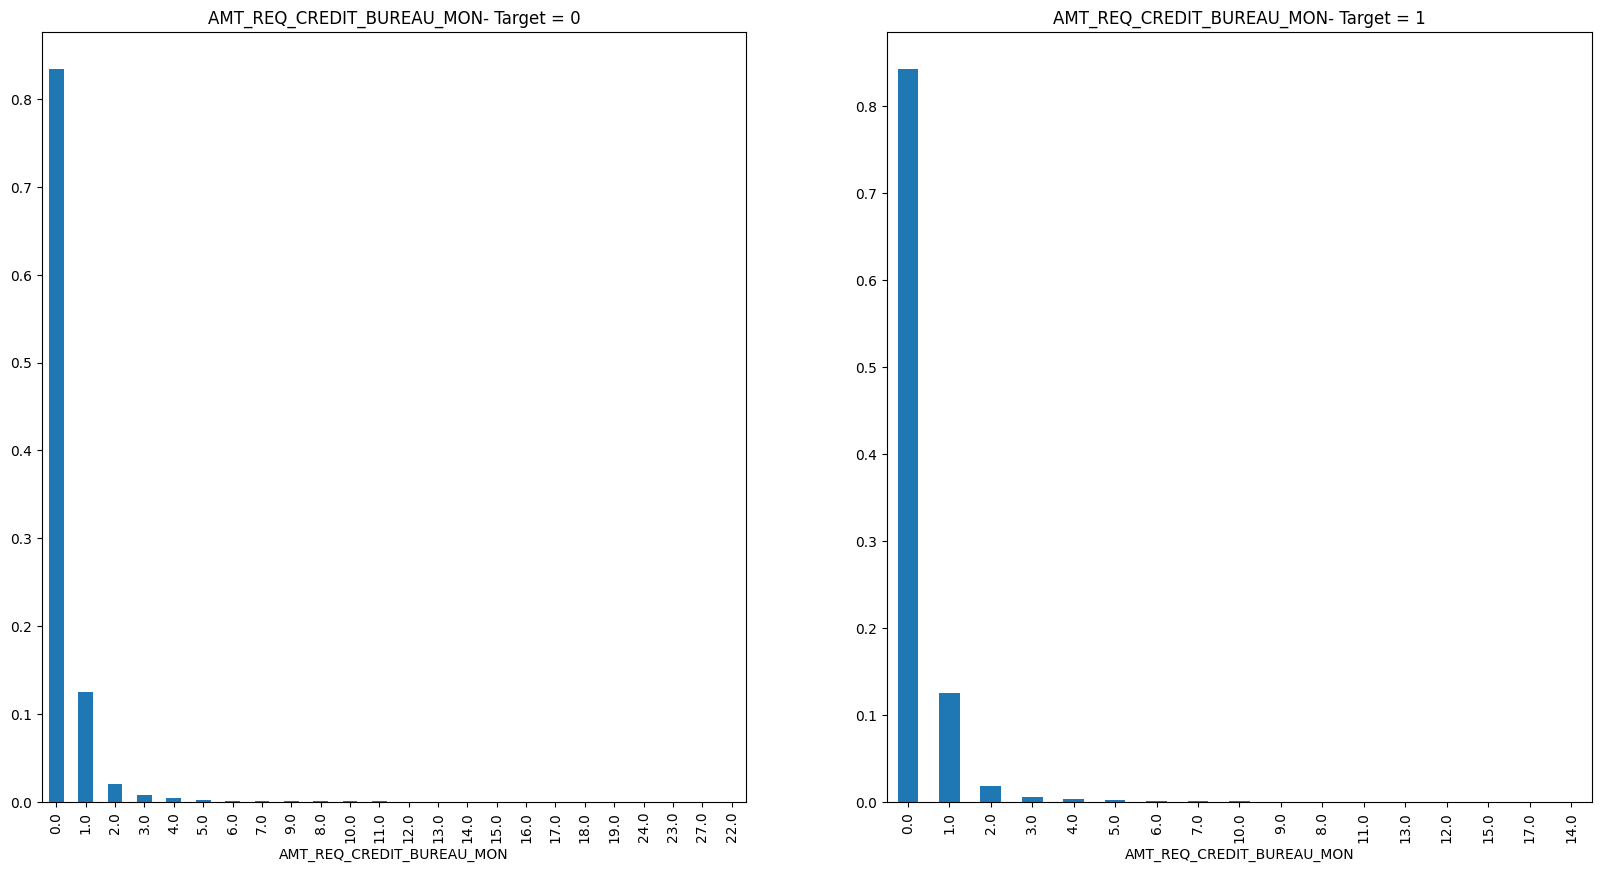

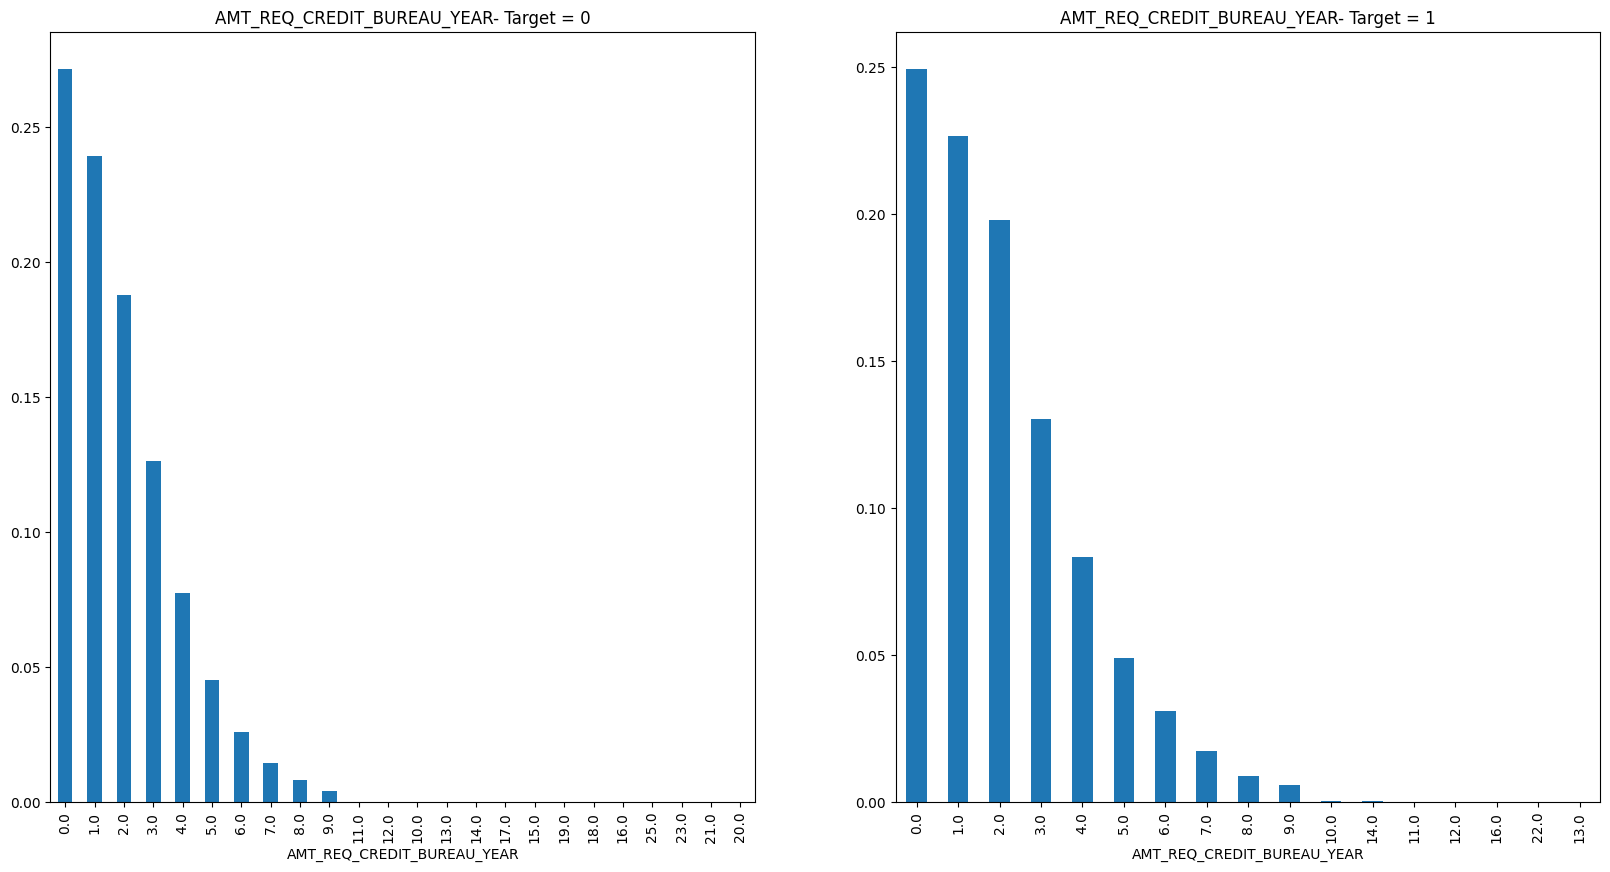

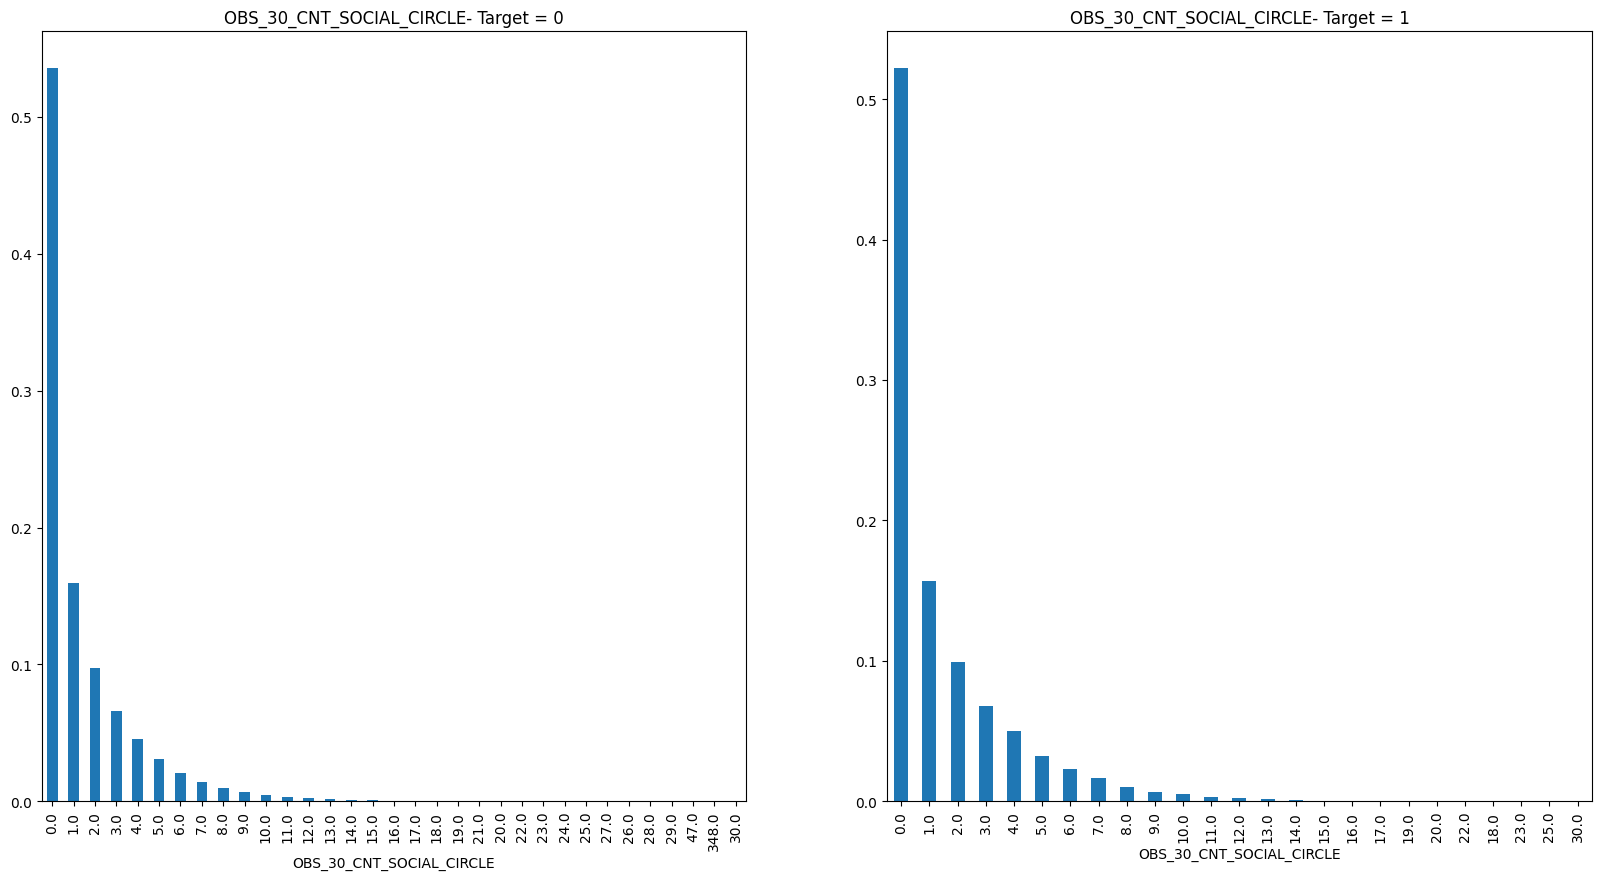

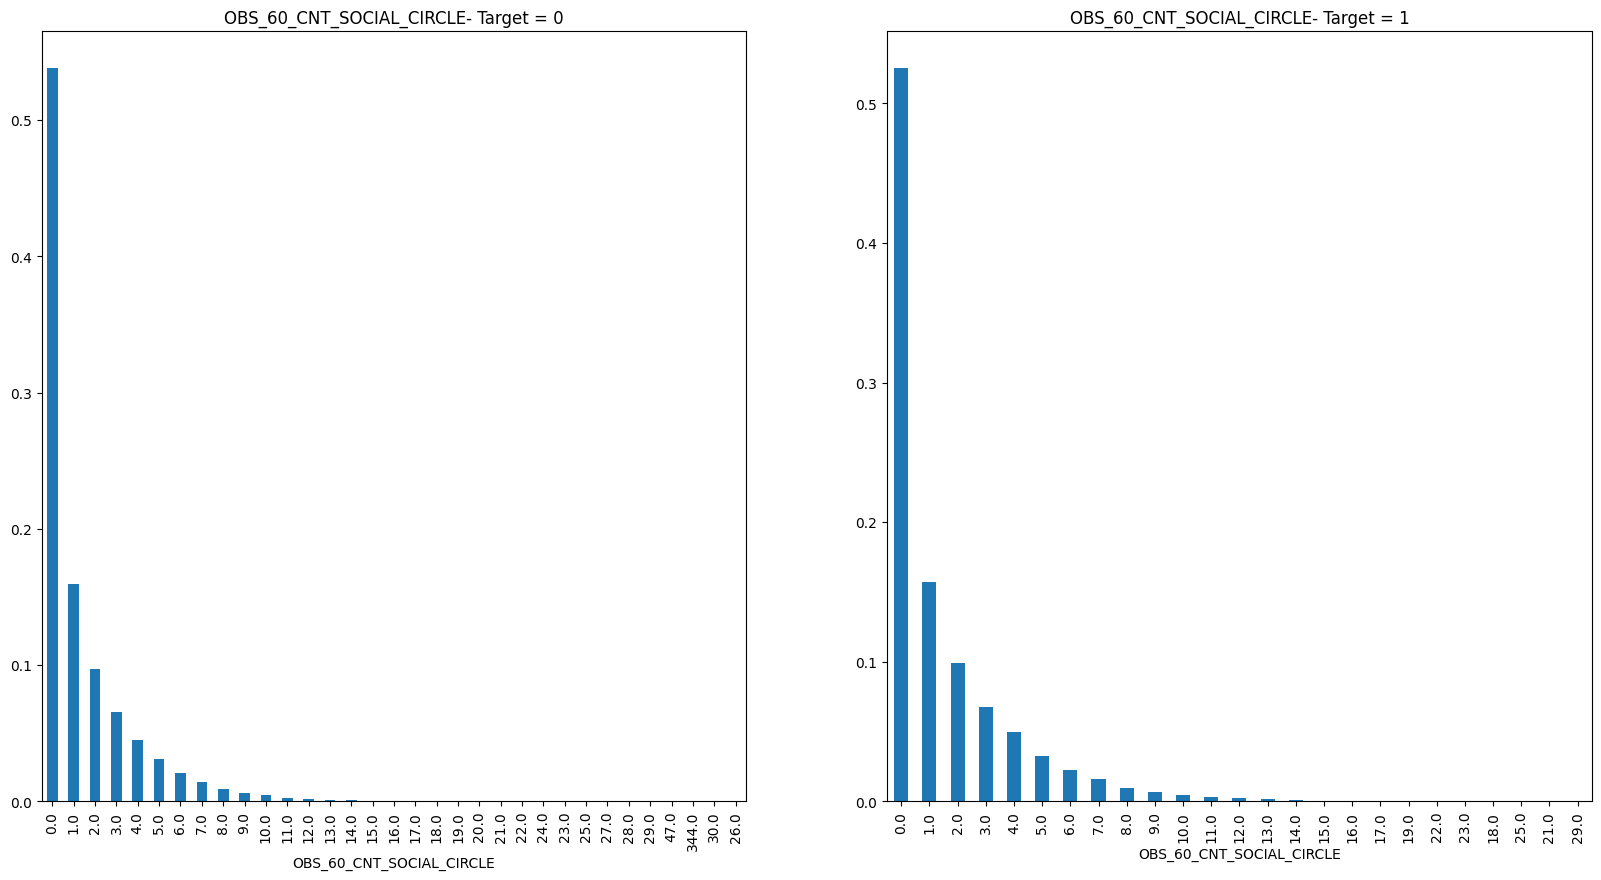

In [378]:
# #loop for performing univariate analysis
for i in categorical_columns:
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)
    target_0_df[i].value_counts(normalize=True).plot.bar()
    plt.title(i+ '- Target = 0')
    plt.subplot(1,2,2)
    target_1_df[i].value_counts(normalize=True).plot.bar()
    plt.title(i+ '- Target = 1')


#### The above chart shows the distribution of customers across categorical variable for both Target = 0 and Target = 1

#### Key interpretation from univariate analysis of Categorical variables
##### In this section, we will only highlight variables having significant difference for target = 0 and target = 1  

- **Code_Gender**: Defaulters (Target = 1) has a higher percentage of male customers in comparison to non-defaulters (Target = 0)
- **NAME_EDUCATION_TYPE**: Defaulters (Target = 1) has a higher percentage of customers with Secondary/Secondat Special education
- **Age_Group** : Defaulters (Target = 1) has a higher percentage of customers in the age group of 30s
- **NAME_INCOME_TYPE**: Defaulters (Target = 1) has a higher percentage of working customers whereas percentage of defaulting pensioners is lesser in comaprison to non-defaulters(Target = 0)
- **OCCUPATION_TYPE**: Laborers contritbute a higher percentage in defaulters(Target = 1) in comparison to non-defaulters(Target = 0)
- **REGION_RATING_CLIENT_W_CITY**: Customers with rating 3 constitutes a higher percentage of defaulters in comparison to non-defaulters
- **REGION_RATING_CLIENT**: Customers with rating 3 constitutes a higher percentage of defaulters in comparison to non-defaulters


## 4.4 Correlation for numerical columns

#### In this analysis, we are trying to understand how numerical columns are correlated for entrie data set, data for target =0, and data for target =1

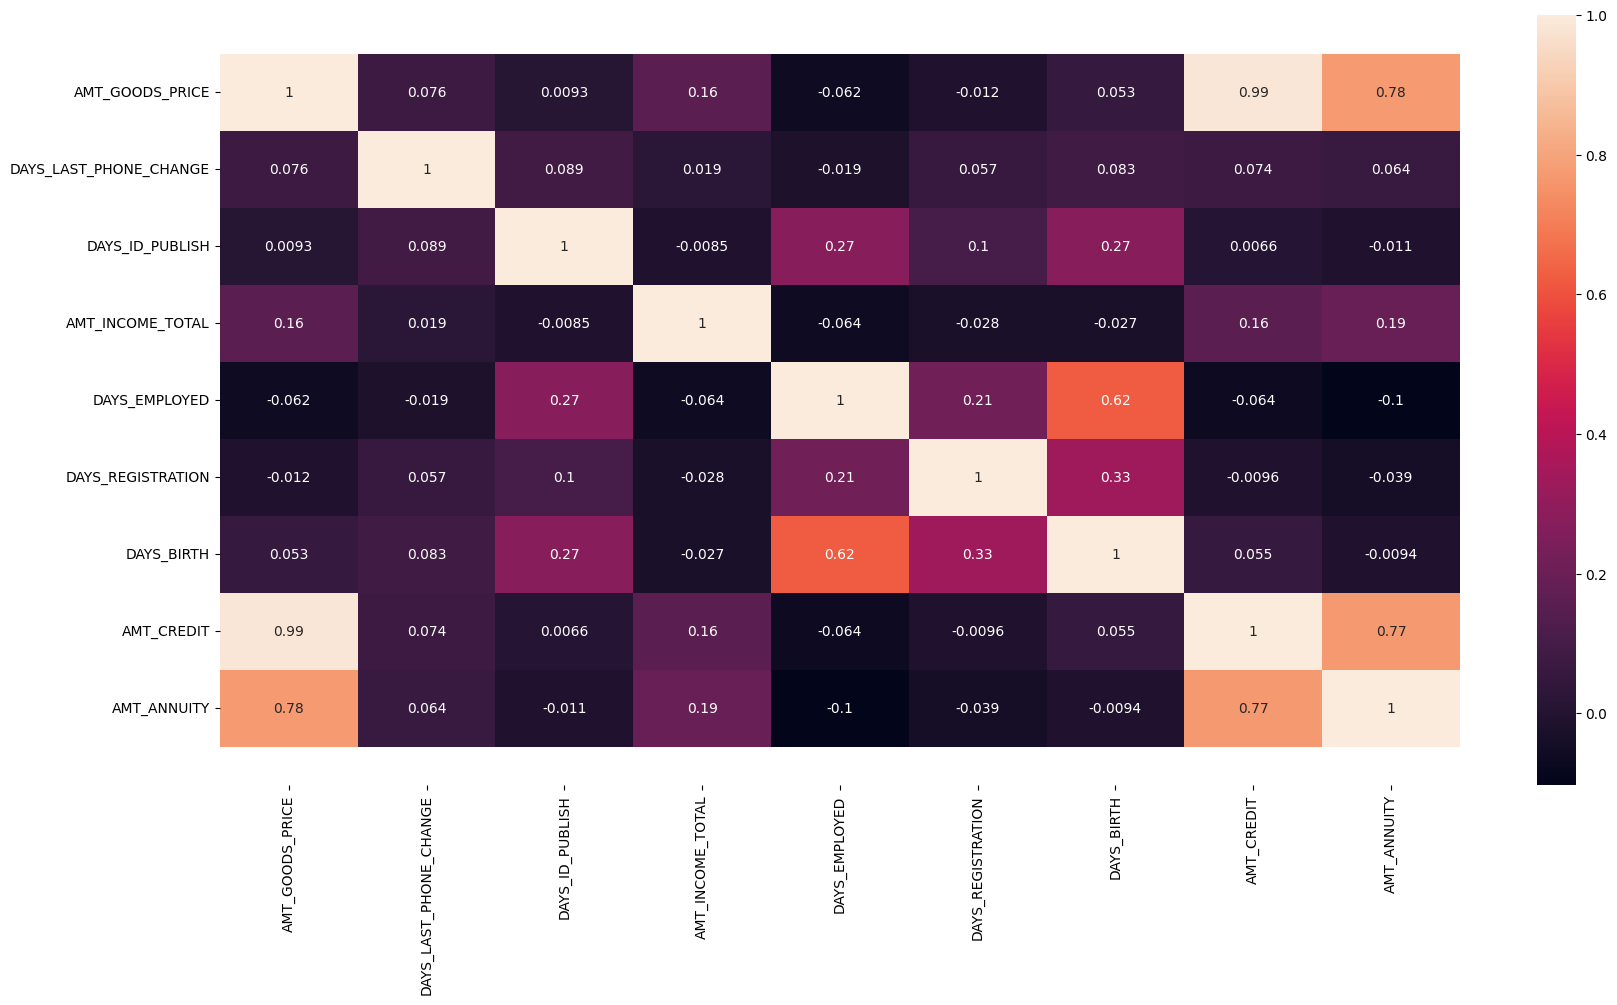

In [379]:
# correlation analysis for the entire Target data
plt.figure(figsize=(20,10))
sns.heatmap(dx_2[numerical_columns].corr(),annot=True)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.yticks(rotation = 0)
plt.show()

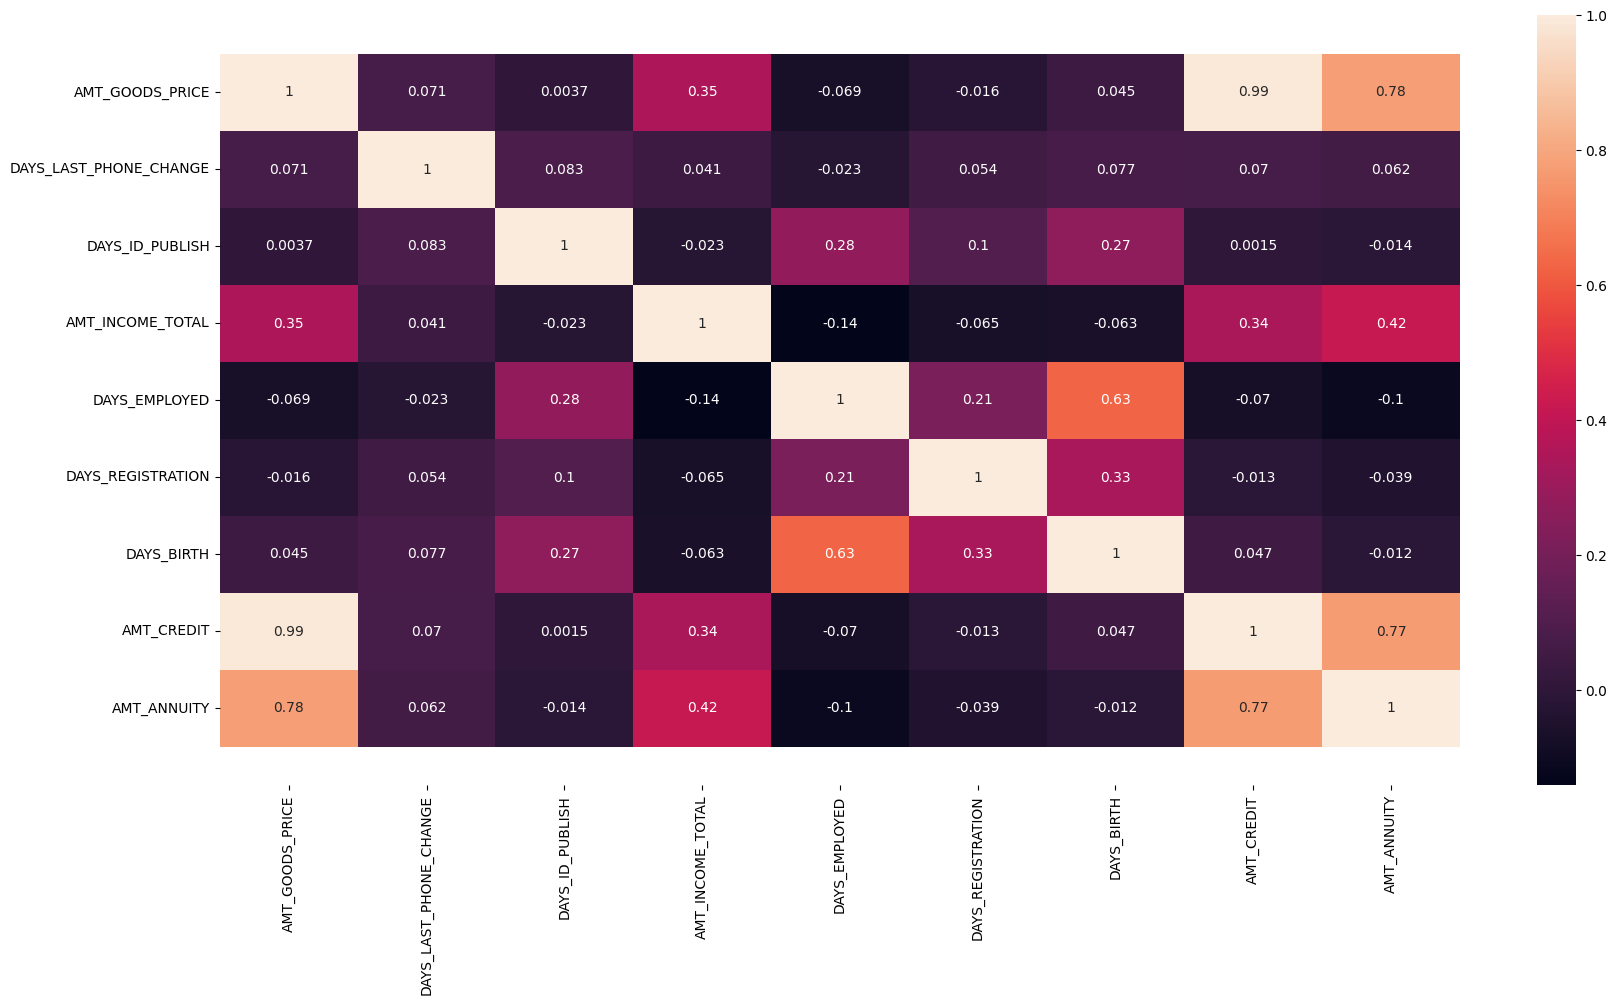

In [380]:
# correlation analysis for Target = 0
plt.figure(figsize=(20,10))
sns.heatmap(target_0_df[numerical_columns].corr(),annot=True)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.yticks(rotation = 0)
plt.show()

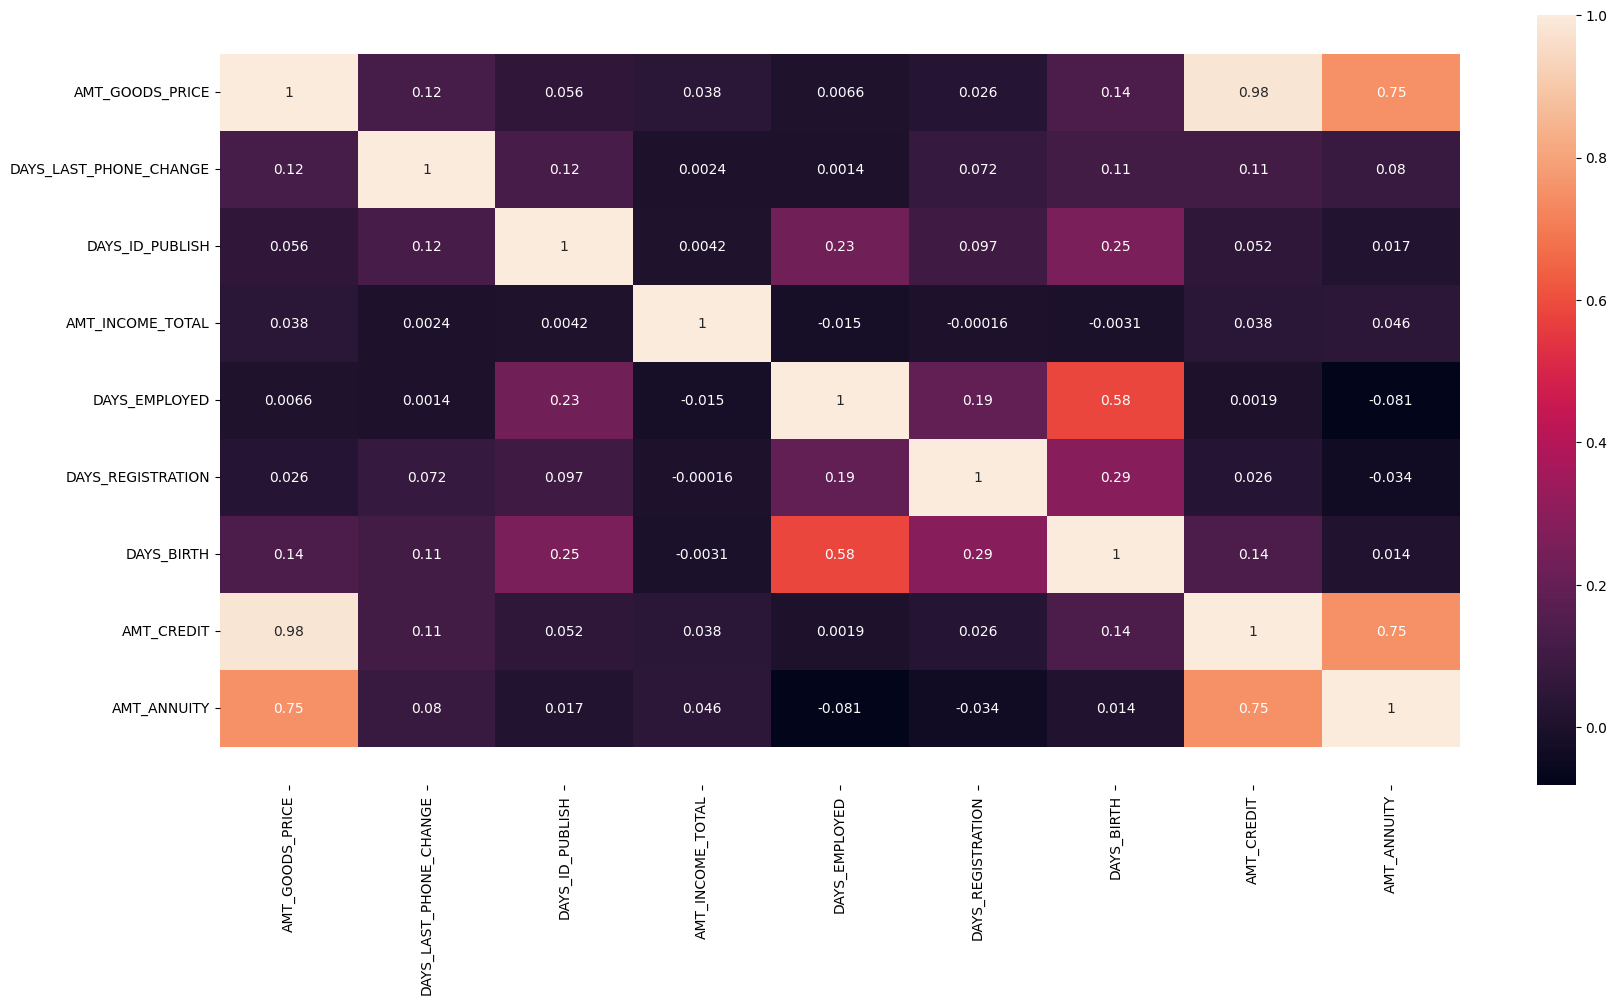

In [381]:
#correlation analysis for target =1
plt.figure(figsize=(20,10))
sns.heatmap(target_1_df[numerical_columns].corr(),annot=True)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.yticks(rotation = 0)
plt.show()

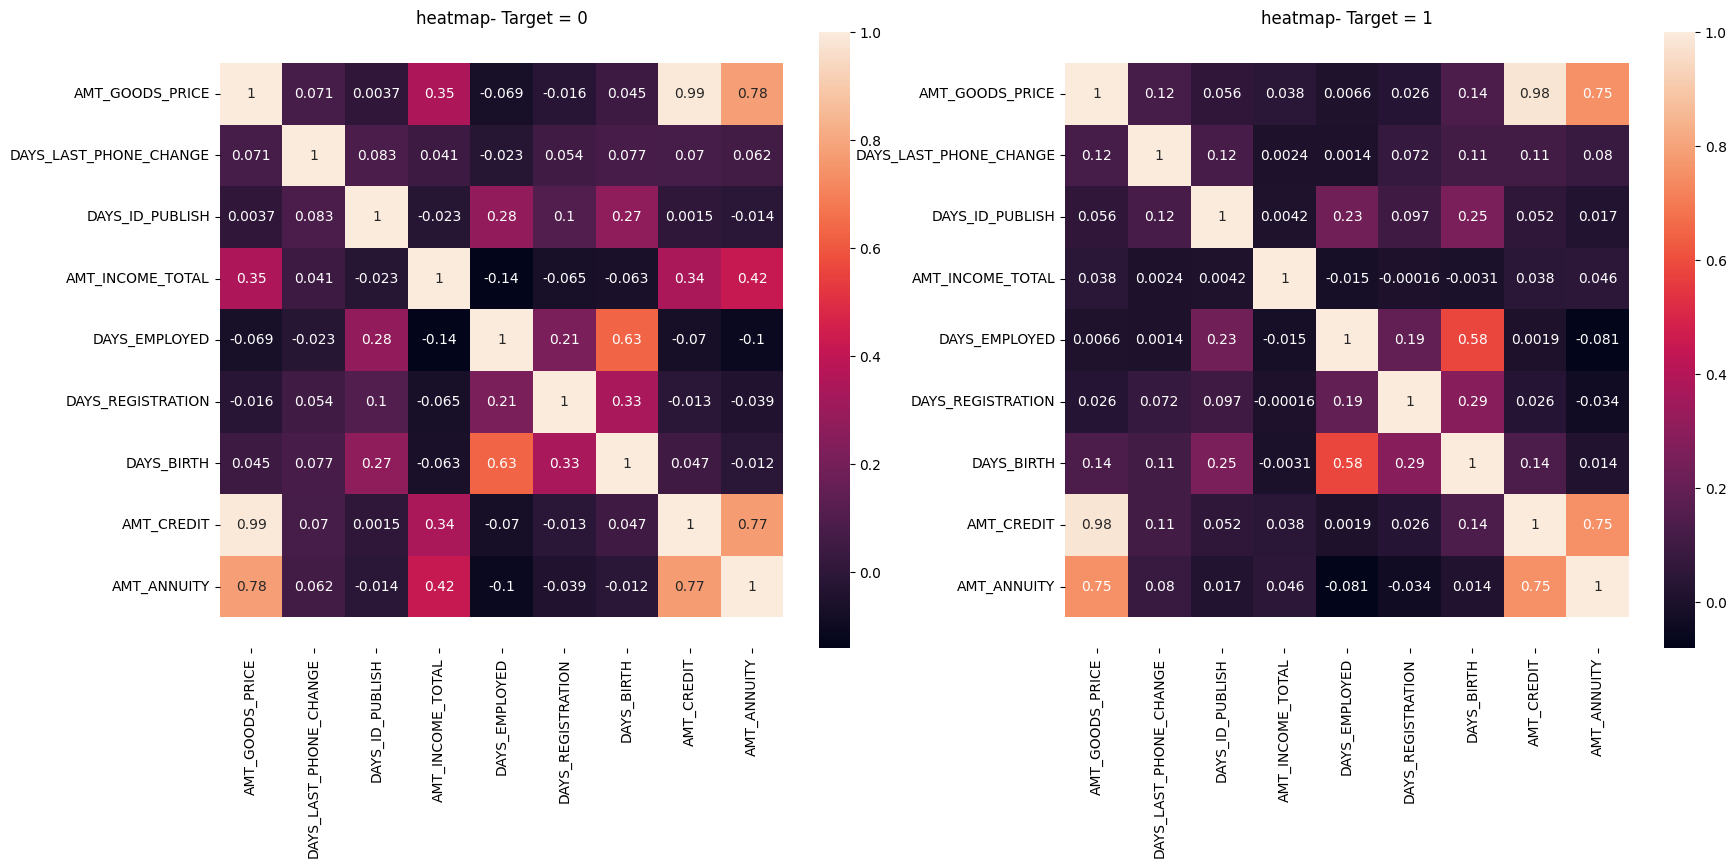

In [382]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.heatmap(target_0_df[numerical_columns].corr(),annot=True)
plt.title('heatmap- Target = 0')
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.yticks(rotation = 0)
plt.subplot(1,2,2)
sns.heatmap(target_1_df[numerical_columns].corr(),annot=True,)
plt.title('heatmap- Target = 1')
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.yticks(rotation = 0)
plt.show()

#### Through the heatmap we can see same set of columns seem to have a high correlation across all three data sets. Top correlate colums are:
- AMT_GOOD_PRICE vs AMT_CREDIT
- AMT_GOOD_PRICE vs AMT_ANNUITY
- AMT_CREDIT_AMT_ANNUITY

### 4.5 Checking if Variables with highest coeffecient are same in both file

#### This analysis is conducted to understand if top 10 high correlation variables are common across for both data - target =0 and target =1

In [383]:
# Correlation for numberical columns for Target = 0
# corre = target_0_df.corr()
# corre = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
# corrdf0 = corre.unstack().reset_index()
# corrdf0.columns = ['VAR1', 'VAR2', 'Correlation']
# corrdf0.dropna(subset = ['Correlation'], inplace = True)
# corrdf0['Correlation'] = round(corrdf0['Correlation'], 2)
# # Since we see correlation as an absolute value, we are converting it into absolute value
# corrdf0['Correlation_abs'] = corrdf0['Correlation'].abs()
# corrdf0.sort_values(by = 'Correlation_abs', ascending = False).head(10)



# Filter numeric columns
numeric_cols = target_0_df.select_dtypes(include=[np.number]).columns
corre = target_0_df[numeric_cols].corr()

# Remove self-correlations and get the upper triangle of the correlation matrix
corre = corre.where(np.triu(np.ones(corre.shape), k=1).astype(bool))

# Unstack the correlation matrix and reset the index
corrdf0 = corre.unstack().reset_index()
corrdf0.columns = ['VAR1', 'VAR2', 'Correlation']

# Drop rows with NaN correlation values
corrdf0.dropna(subset=['Correlation'], inplace=True)

# Round correlation values
corrdf0['Correlation'] = round(corrdf0['Correlation'], 2)

# Get the absolute value of the correlations
corrdf0['Correlation_abs'] = corrdf0['Correlation'].abs()

# Sort by the absolute value of the correlations and display the top 10
top_corr = corrdf0.sort_values(by='Correlation_abs', ascending=False).head(10)
top_corr


VAR1                      VAR2  Correlation  \
414     OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE         1.00   
154              AMT_GOODS_PRICE                AMT_CREDIT         0.99   
337  REGION_RATING_CLIENT_W_CITY      REGION_RATING_CLIENT         0.95   
277              CNT_FAM_MEMBERS              CNT_CHILDREN         0.88   
440     DEF_60_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE         0.86   
155              AMT_GOODS_PRICE               AMT_ANNUITY         0.78   
129                  AMT_ANNUITY                AMT_CREDIT         0.77   
207                DAYS_EMPLOYED                DAYS_BIRTH         0.63   
128                  AMT_ANNUITY          AMT_INCOME_TOTAL         0.42   
153              AMT_GOODS_PRICE          AMT_INCOME_TOTAL         0.35   

     Correlation_abs  
414             1.00  
154             0.99  
337             0.95  
277             0.88  
440             0.86  
155             0.78  
129             0.77  
207             0.63  
128             0.42  
153             0.35

In [384]:
# Correlation for numberical columns for Target = 1
# corr = target_1_df.corr()
# corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
# corrdf0 = corre.unstack().reset_index()
# corrdf0.columns = ['VAR1', 'VAR2', 'Correlation']
# corrdf0.dropna(subset = ['Correlation'], inplace = True)
# corrdf0['Correlation'] = round(corrdf0['Correlation'], 2)
# # Since we see correlation as an absolute value, we are converting it into absolute value
# corrdf0['Correlation_abs'] = corrdf0['Correlation'].abs()
# corrdf0.sort_values(by = 'Correlation_abs', ascending = False).head(10)


numeric_cols = target_1_df.select_dtypes(include=[np.number]).columns
corre = target_1_df[numeric_cols].corr()

corre = corre.where(np.triu(np.ones(corre.shape), k=1).astype(bool))

corrdf1 = corre.unstack().reset_index()
corrdf1.columns = ['VAR1', 'VAR2', 'Correlation']

corrdf1.dropna(subset=['Correlation'], inplace=True)

corrdf1['Correlation'] = round(corrdf1['Correlation'], 2)

corrdf1['Correlation_abs'] = corrdf1['Correlation'].abs()

top_corr = corrdf1.sort_values(by='Correlation_abs', ascending=False).head(10)
top_corr


VAR1                      VAR2  Correlation  \
414     OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE         1.00   
154              AMT_GOODS_PRICE                AMT_CREDIT         0.98   
337  REGION_RATING_CLIENT_W_CITY      REGION_RATING_CLIENT         0.96   
277              CNT_FAM_MEMBERS              CNT_CHILDREN         0.89   
440     DEF_60_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE         0.87   
129                  AMT_ANNUITY                AMT_CREDIT         0.75   
155              AMT_GOODS_PRICE               AMT_ANNUITY         0.75   
207                DAYS_EMPLOYED                DAYS_BIRTH         0.58   
415     OBS_60_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE         0.34   
389     DEF_30_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE         0.33   

     Correlation_abs  
414             1.00  
154             0.98  
337             0.96  
277             0.89  
440             0.87  
129             0.75  
155             0.75  
207             0.58  
415             0.34  
389             0.33

#### 8 out of top 10 pair of high correlated variables are same for both 0 and 1

### 4.6 Univariate Analysis for Numerical Values

#### The objective of this analysis is to understand how numerical variables vary between target 0 and 1

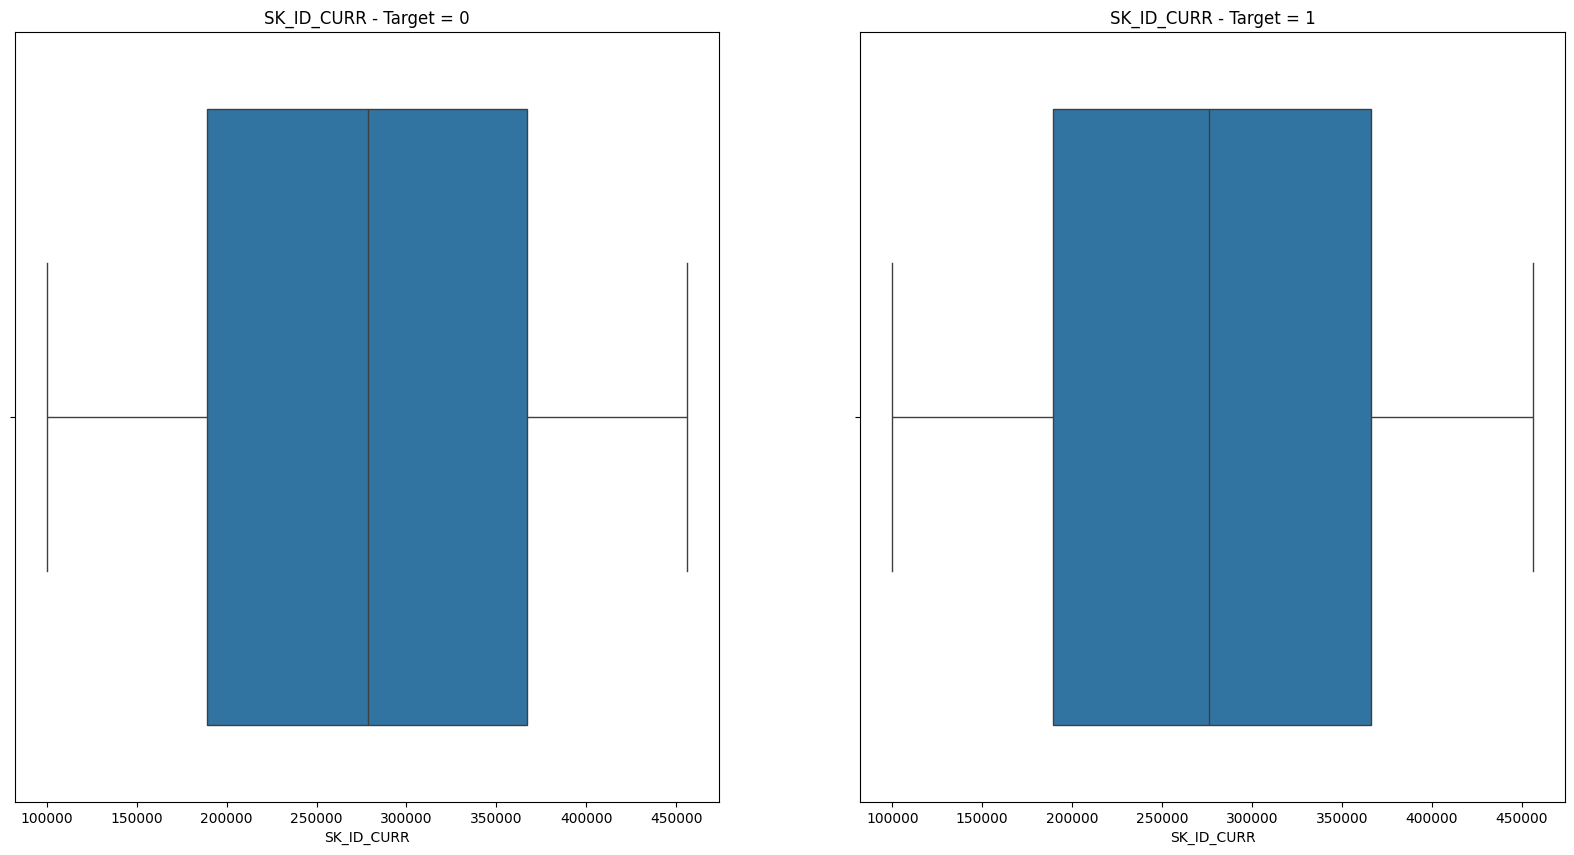

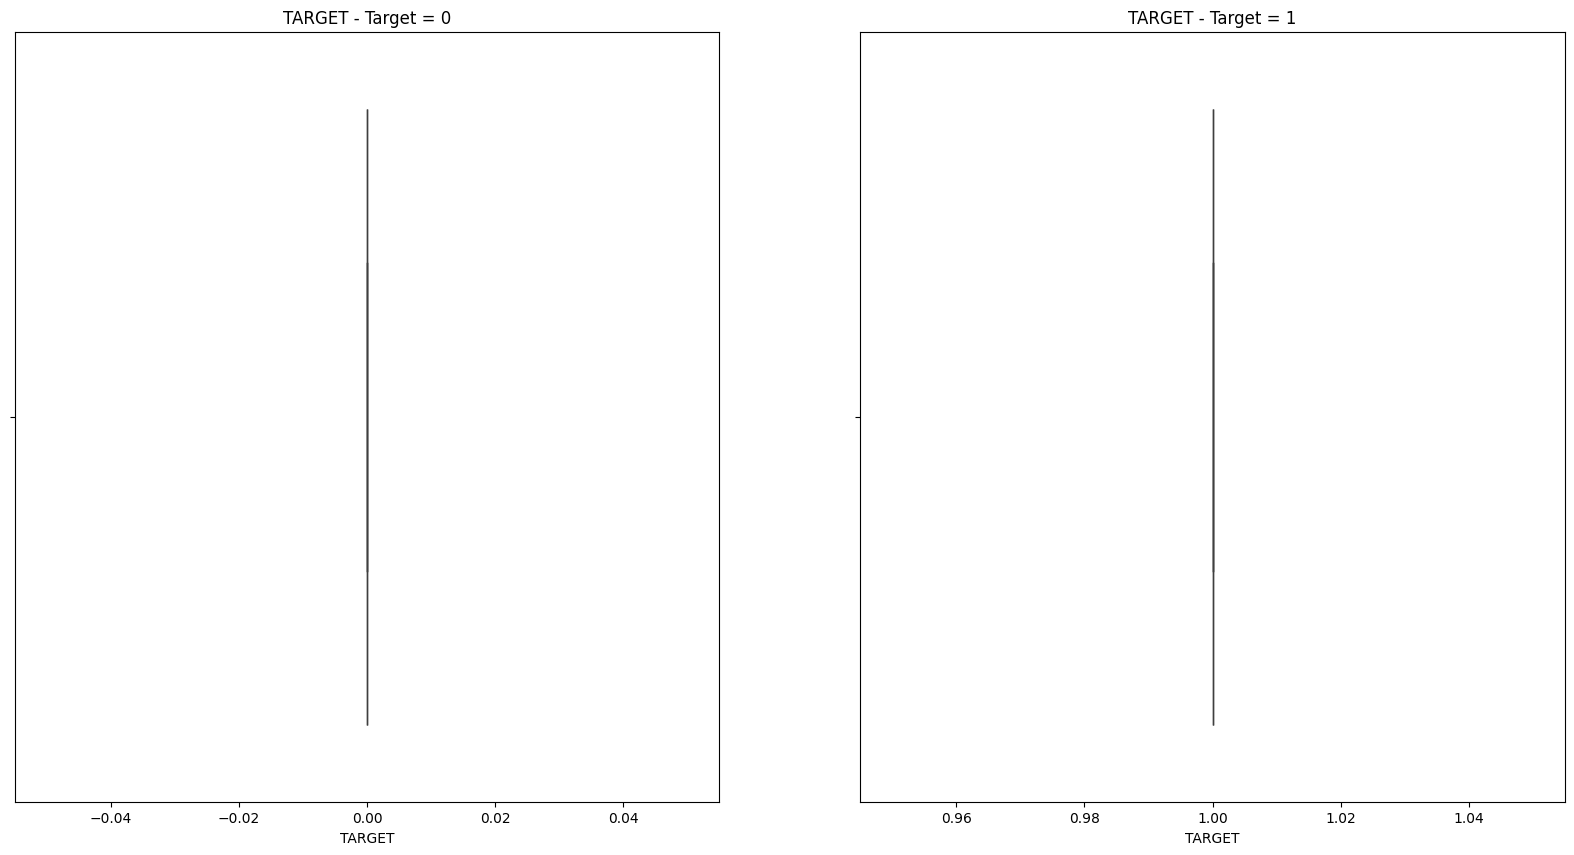

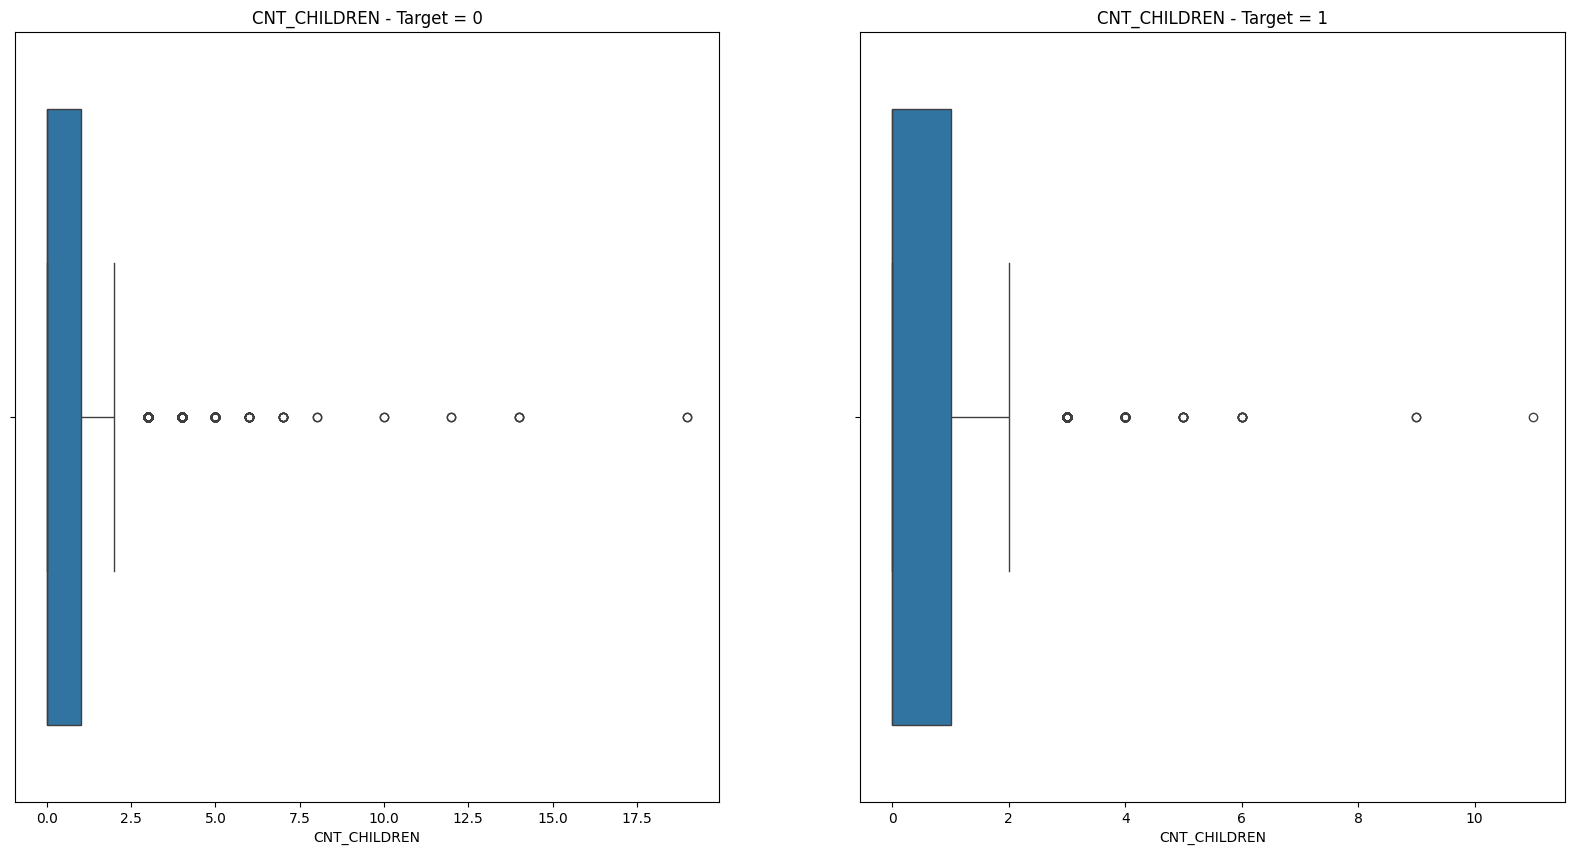

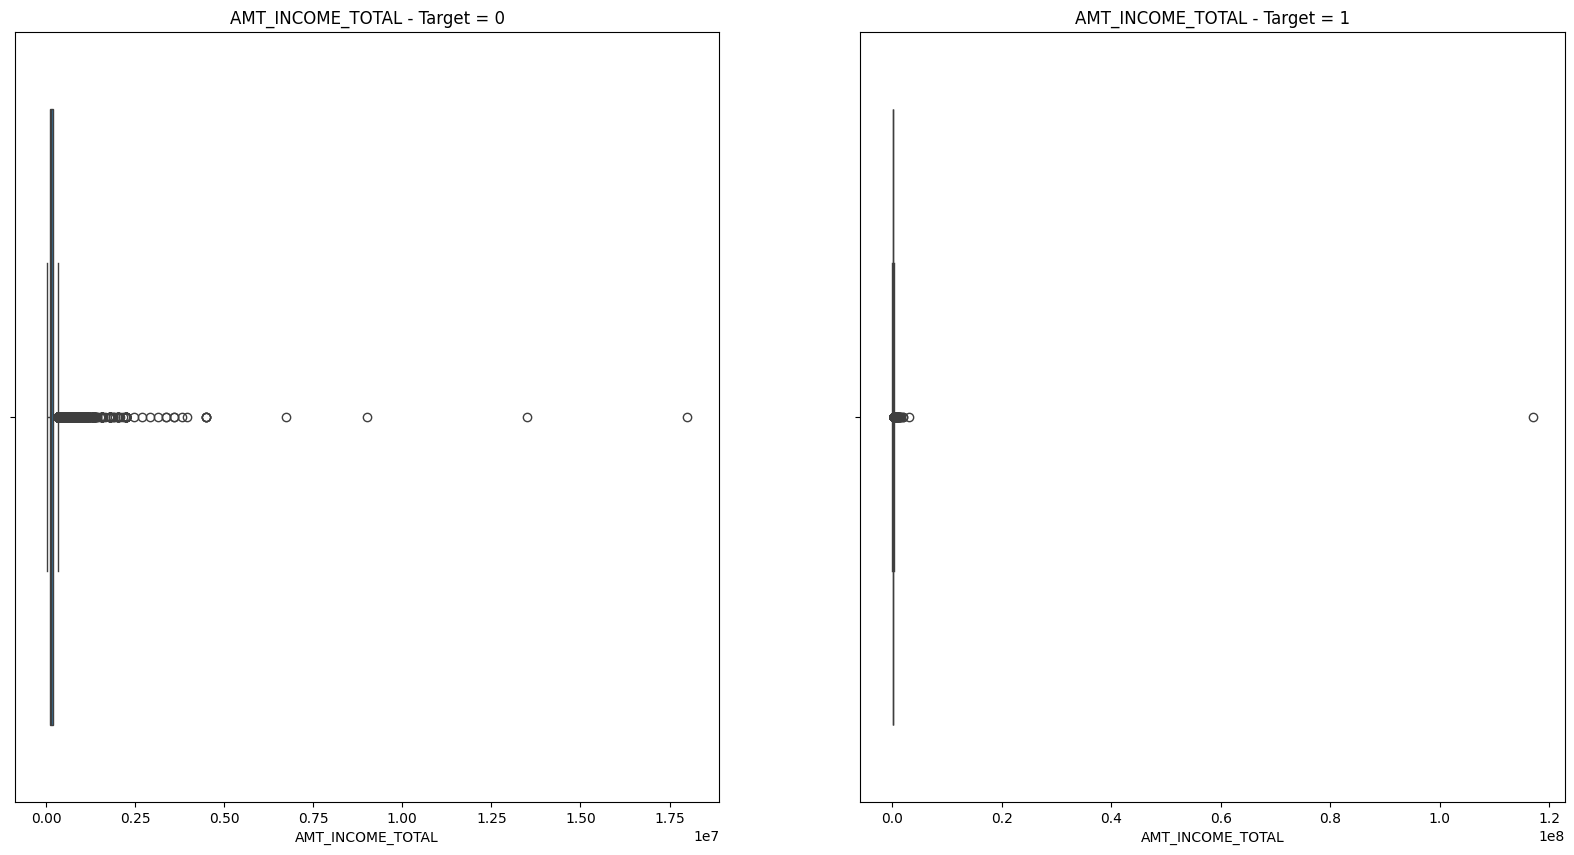

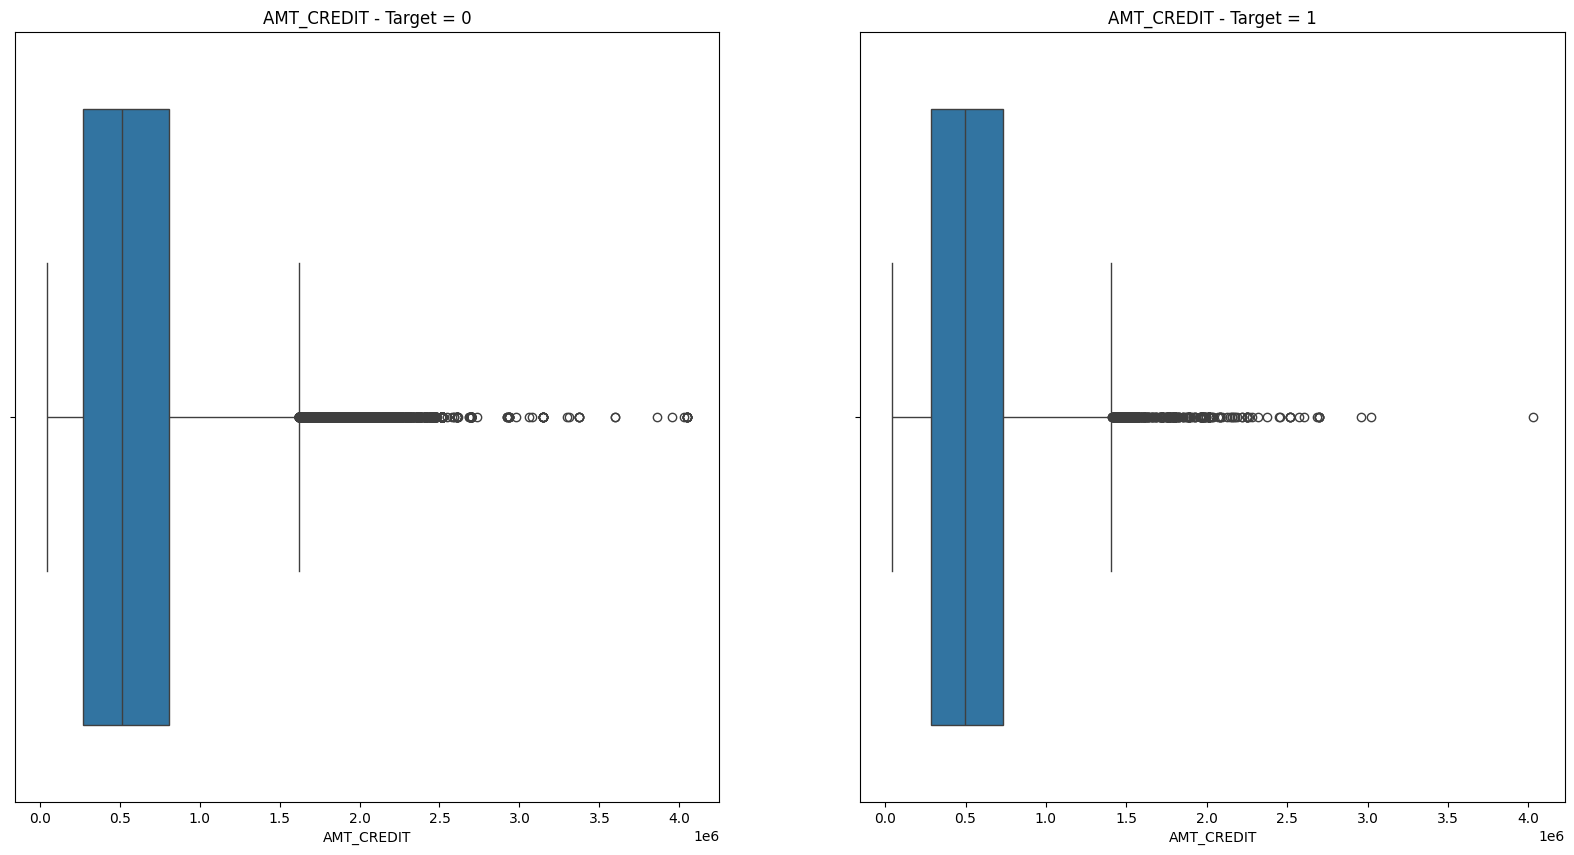

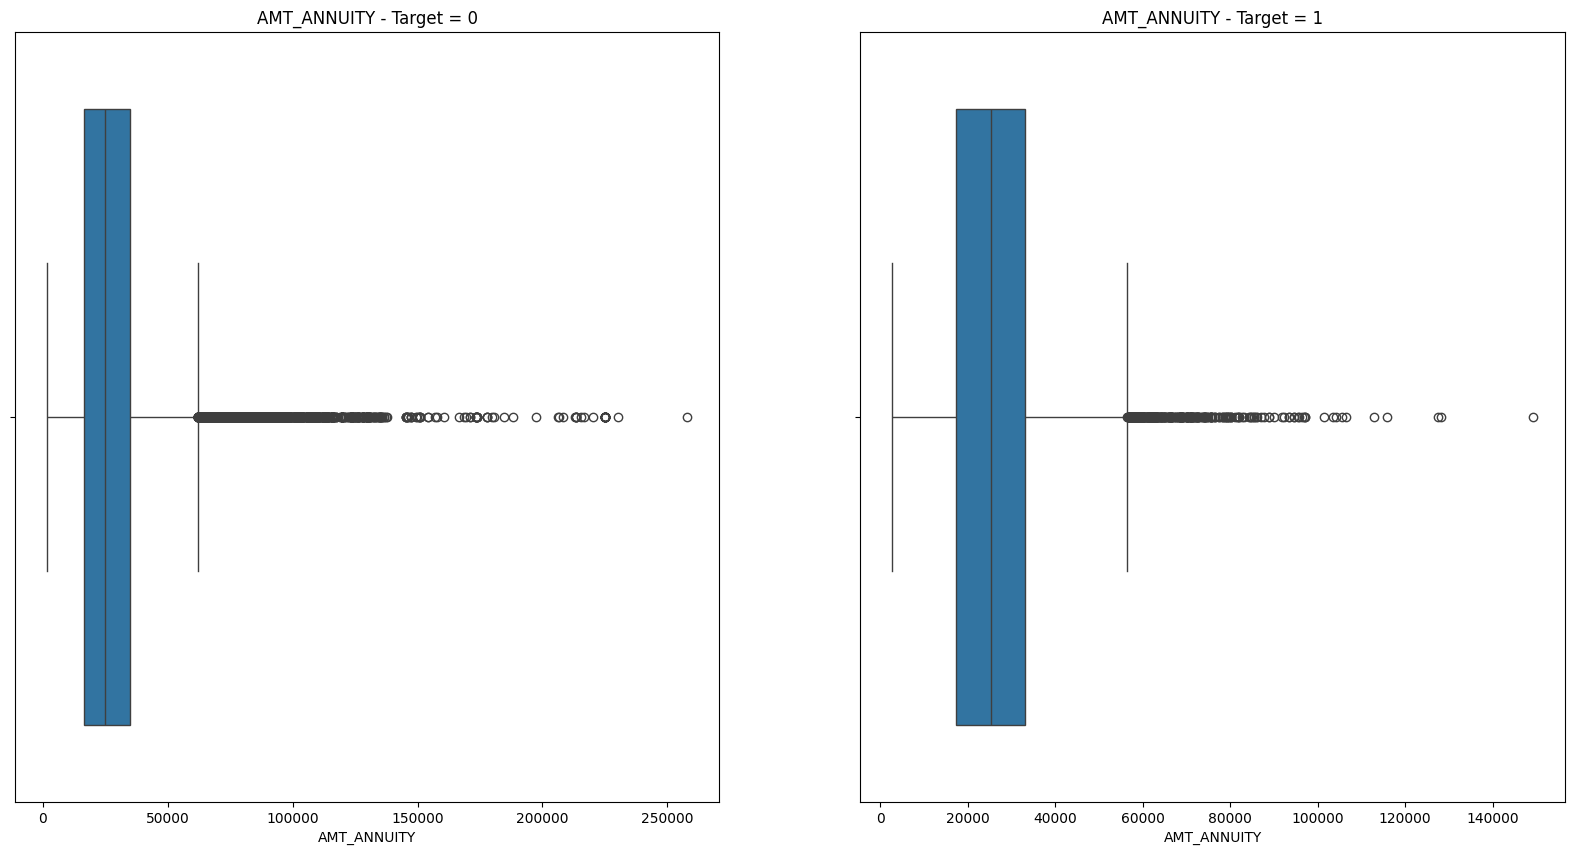

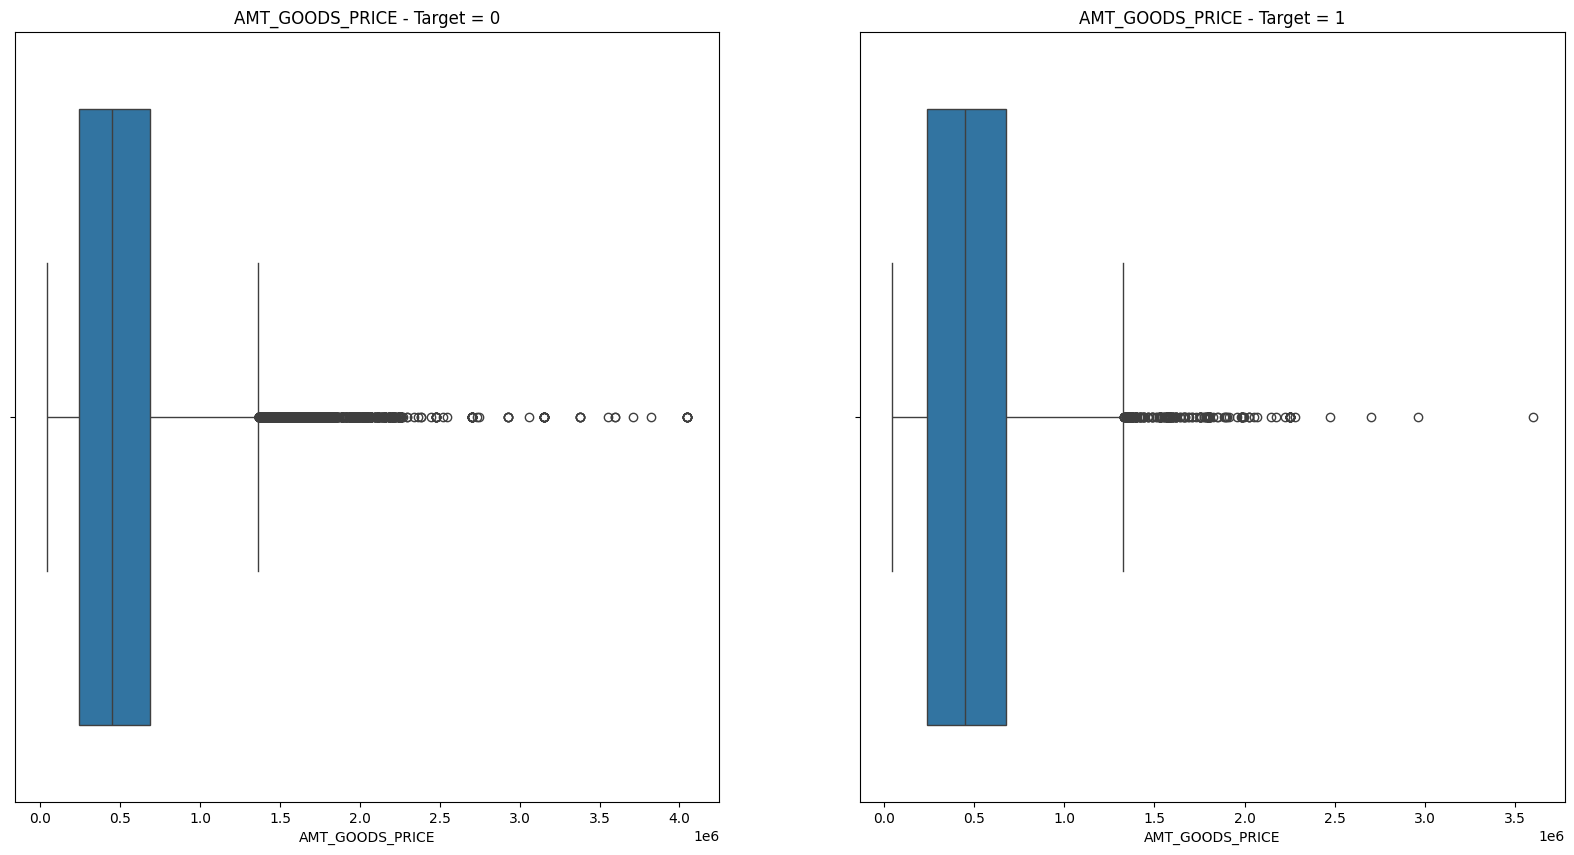

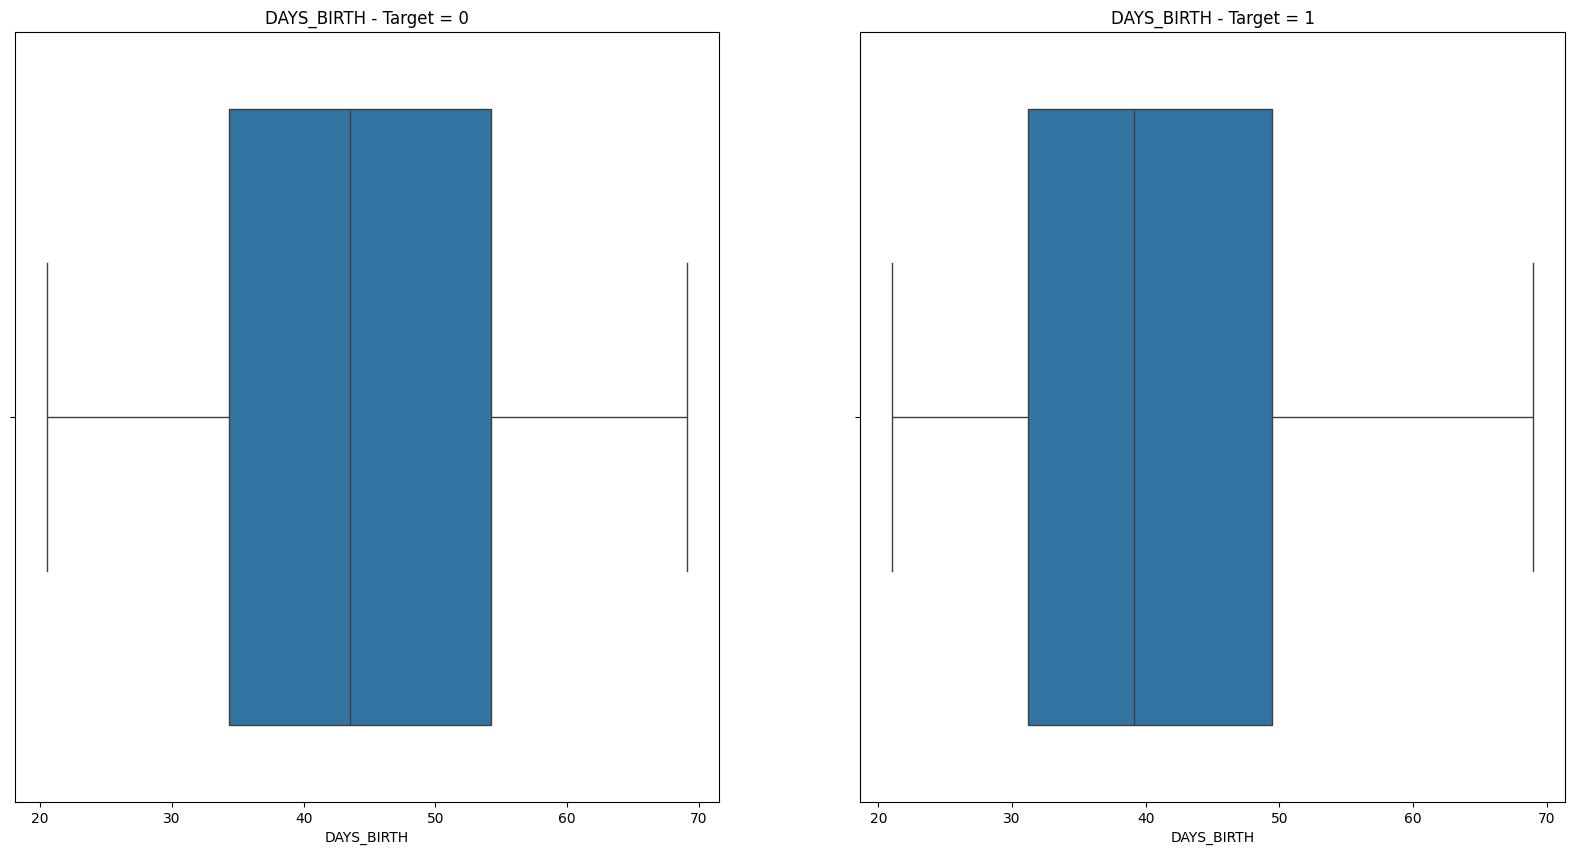

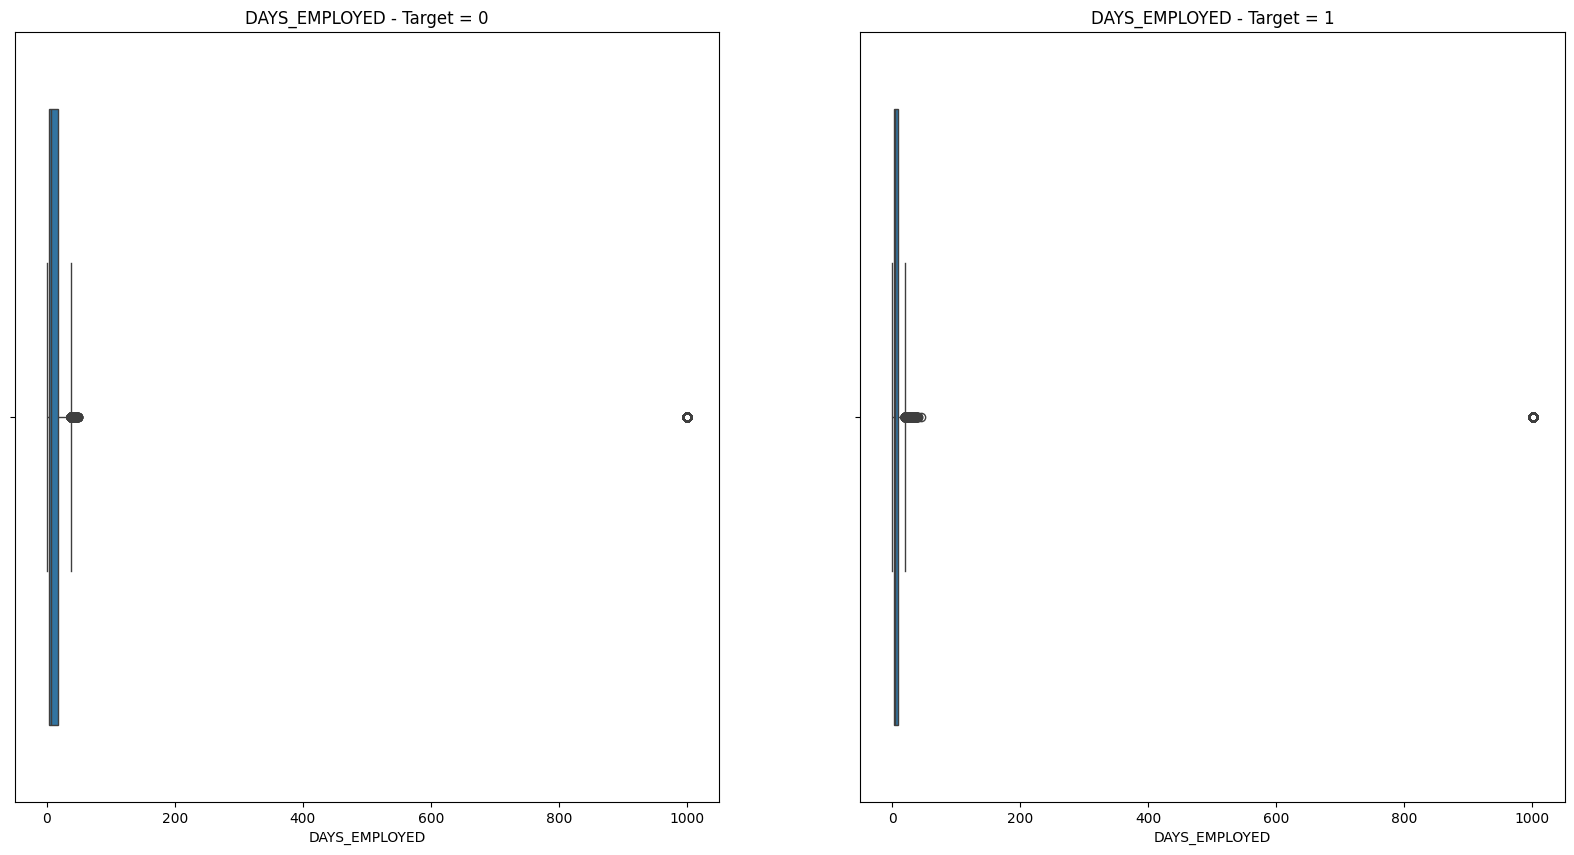

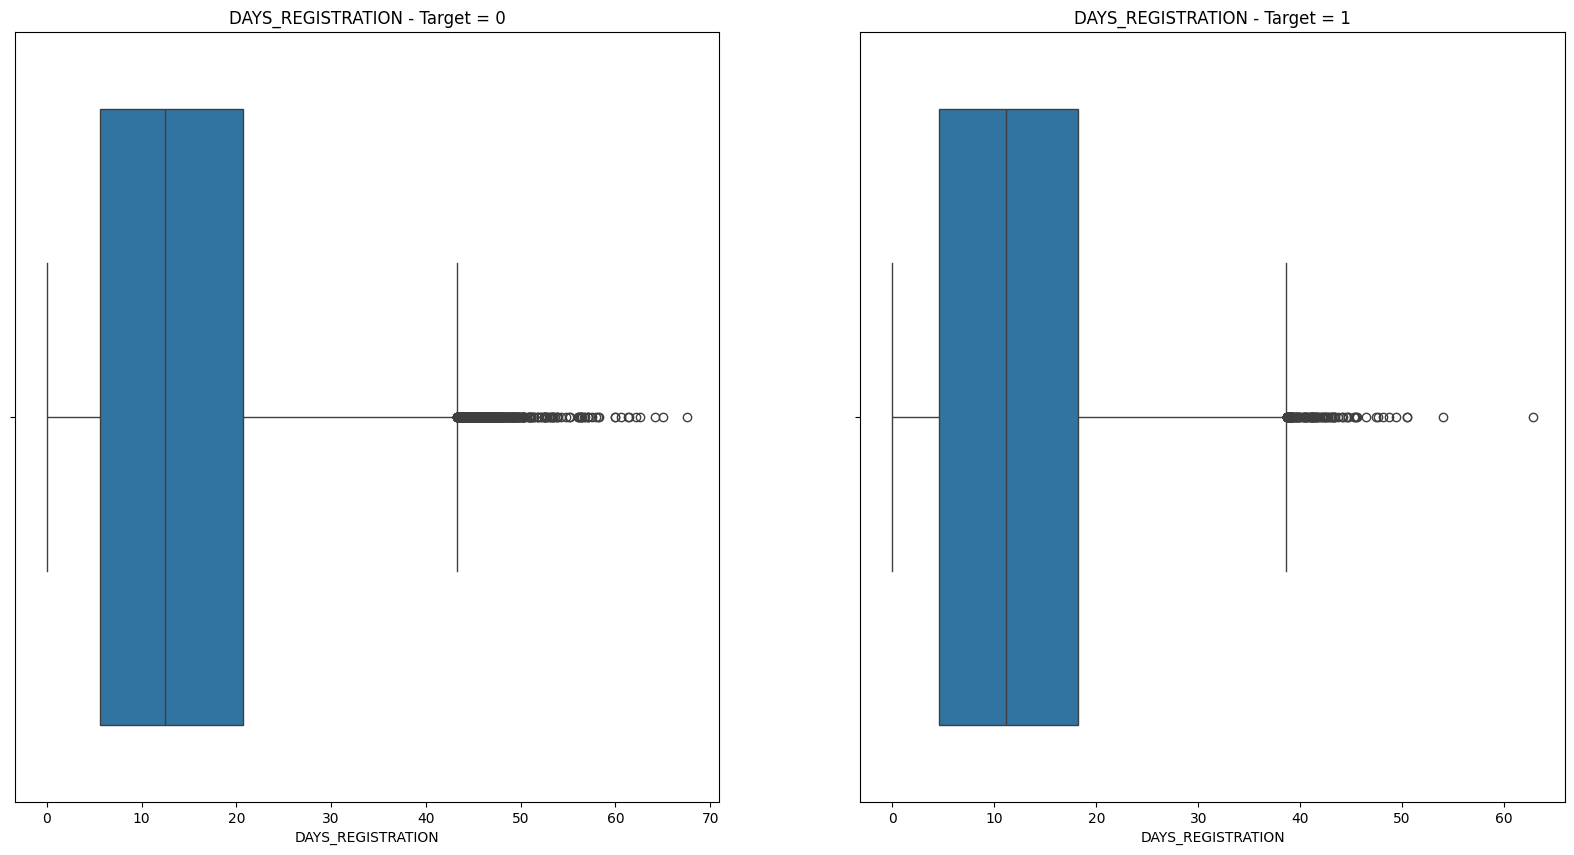

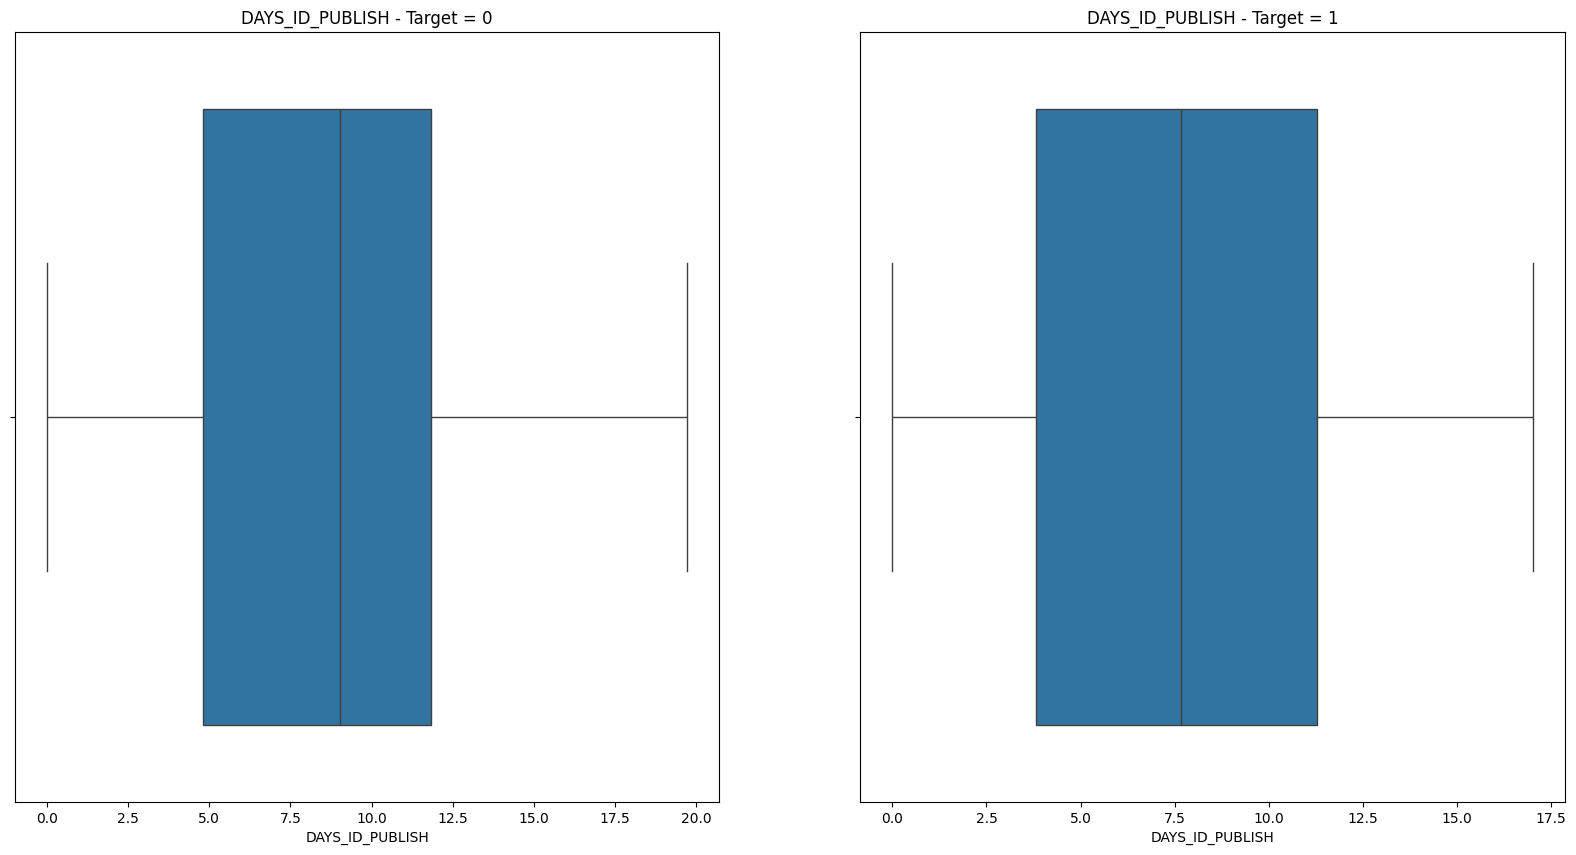

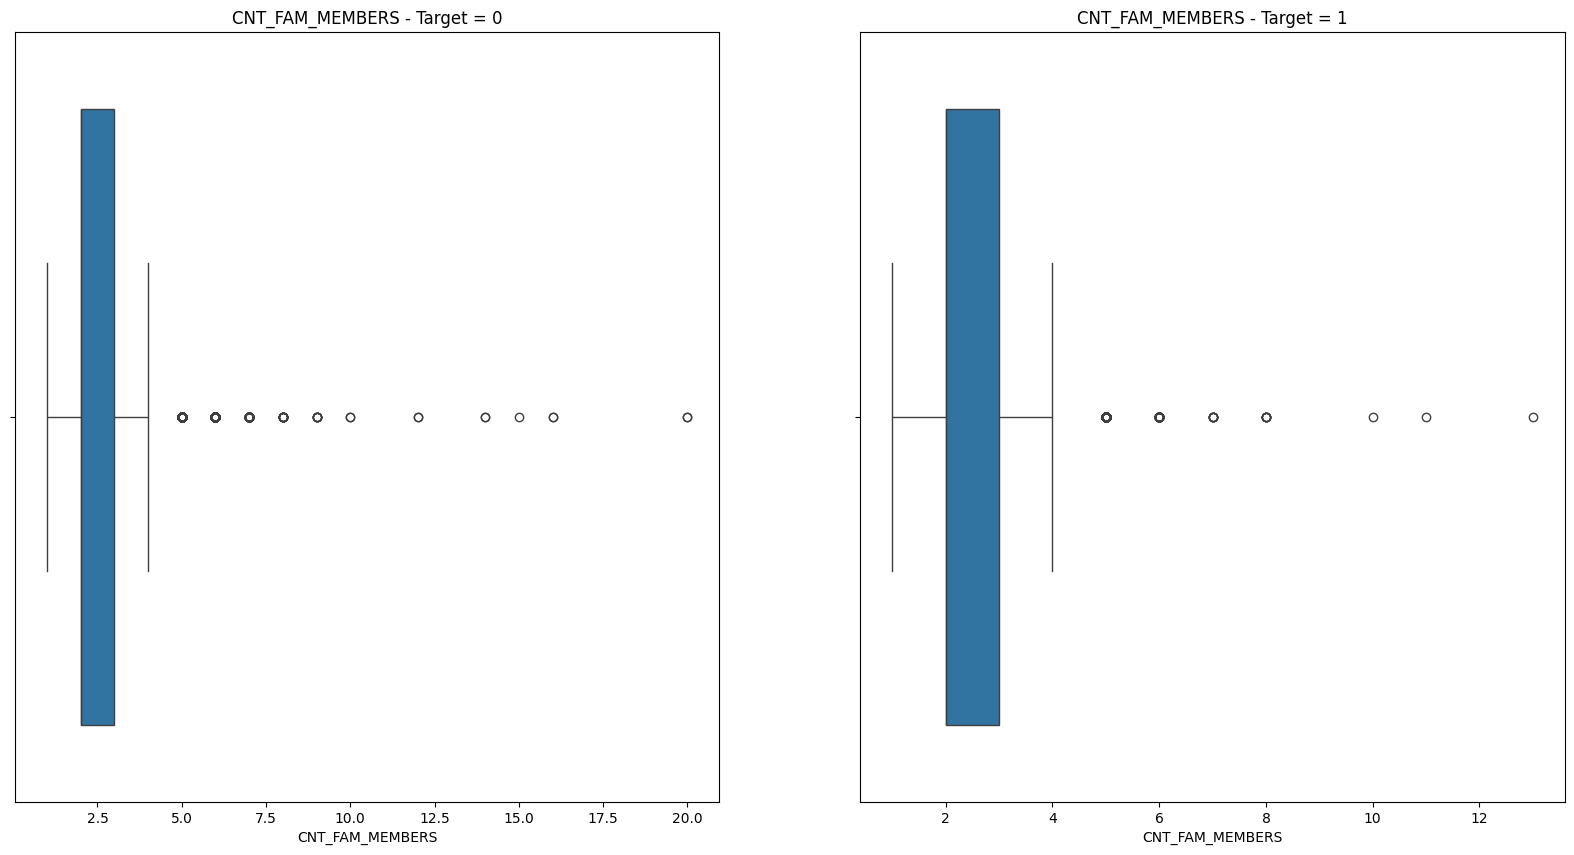

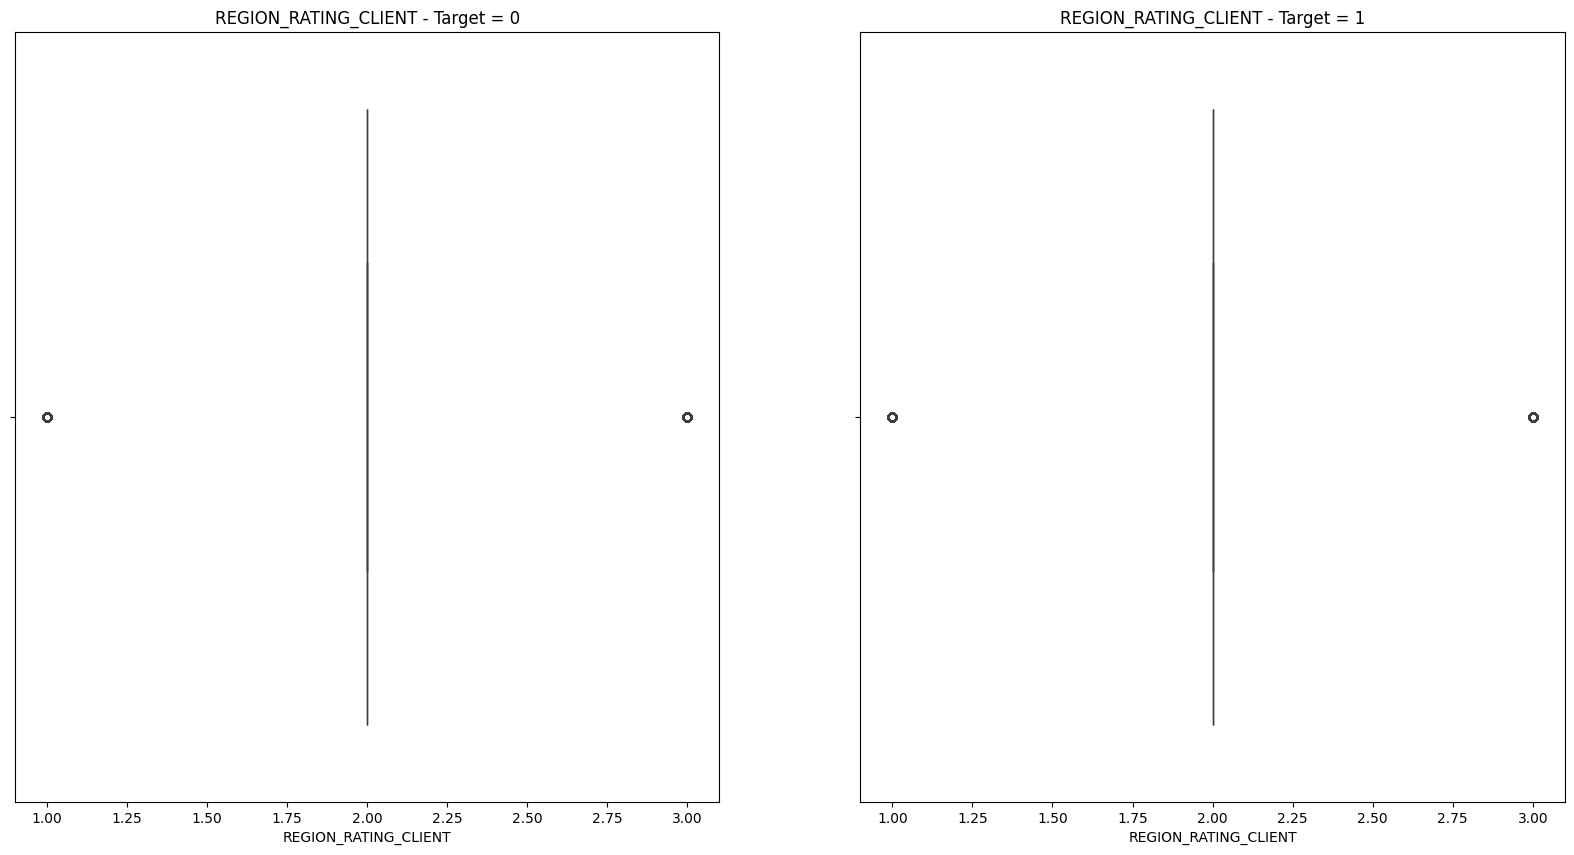

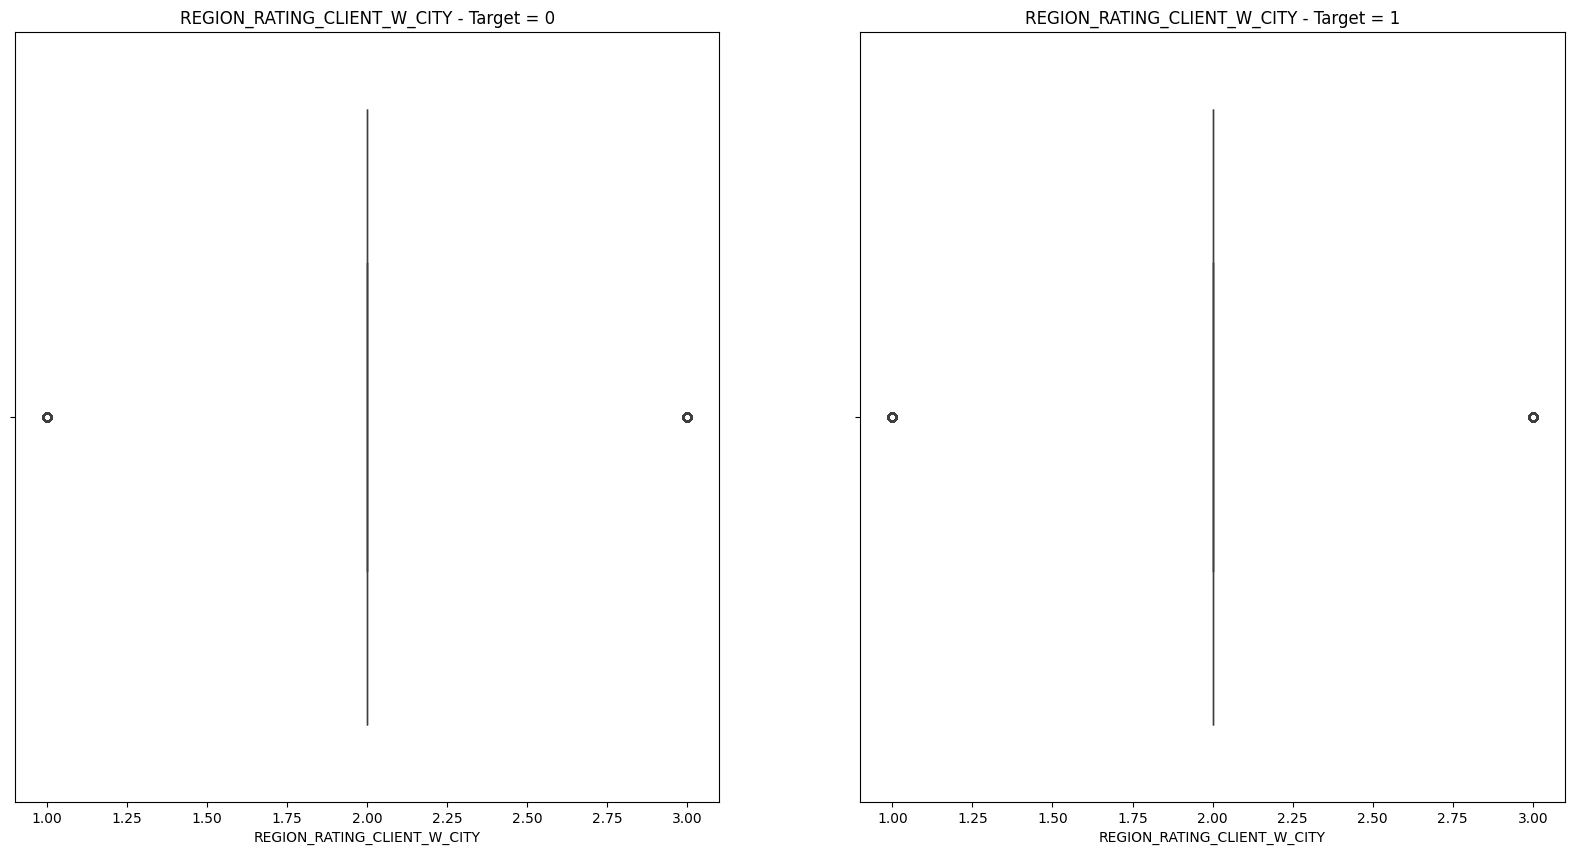

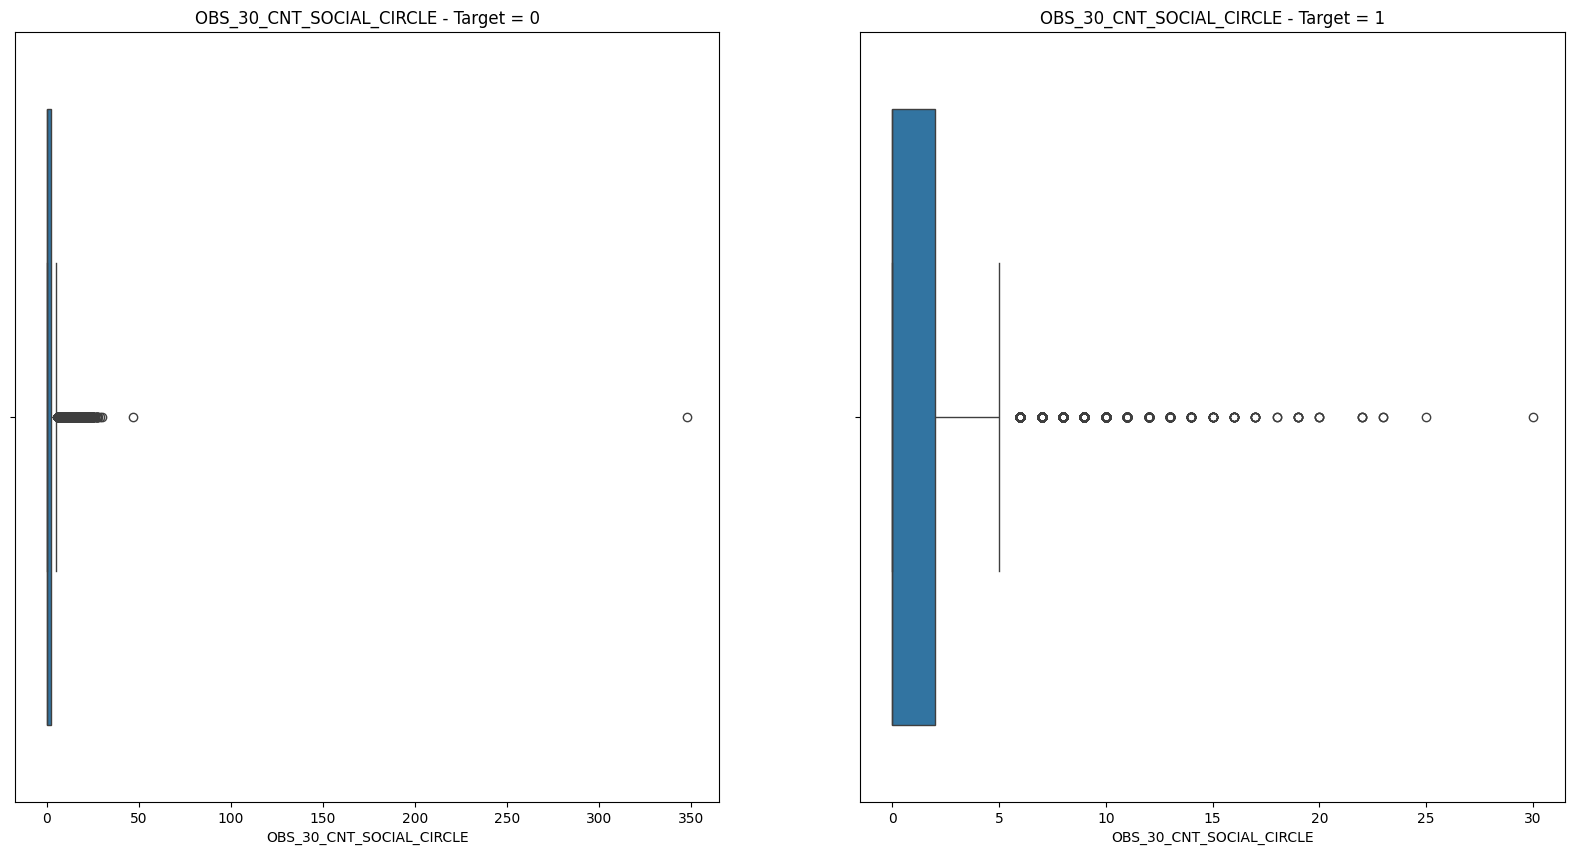

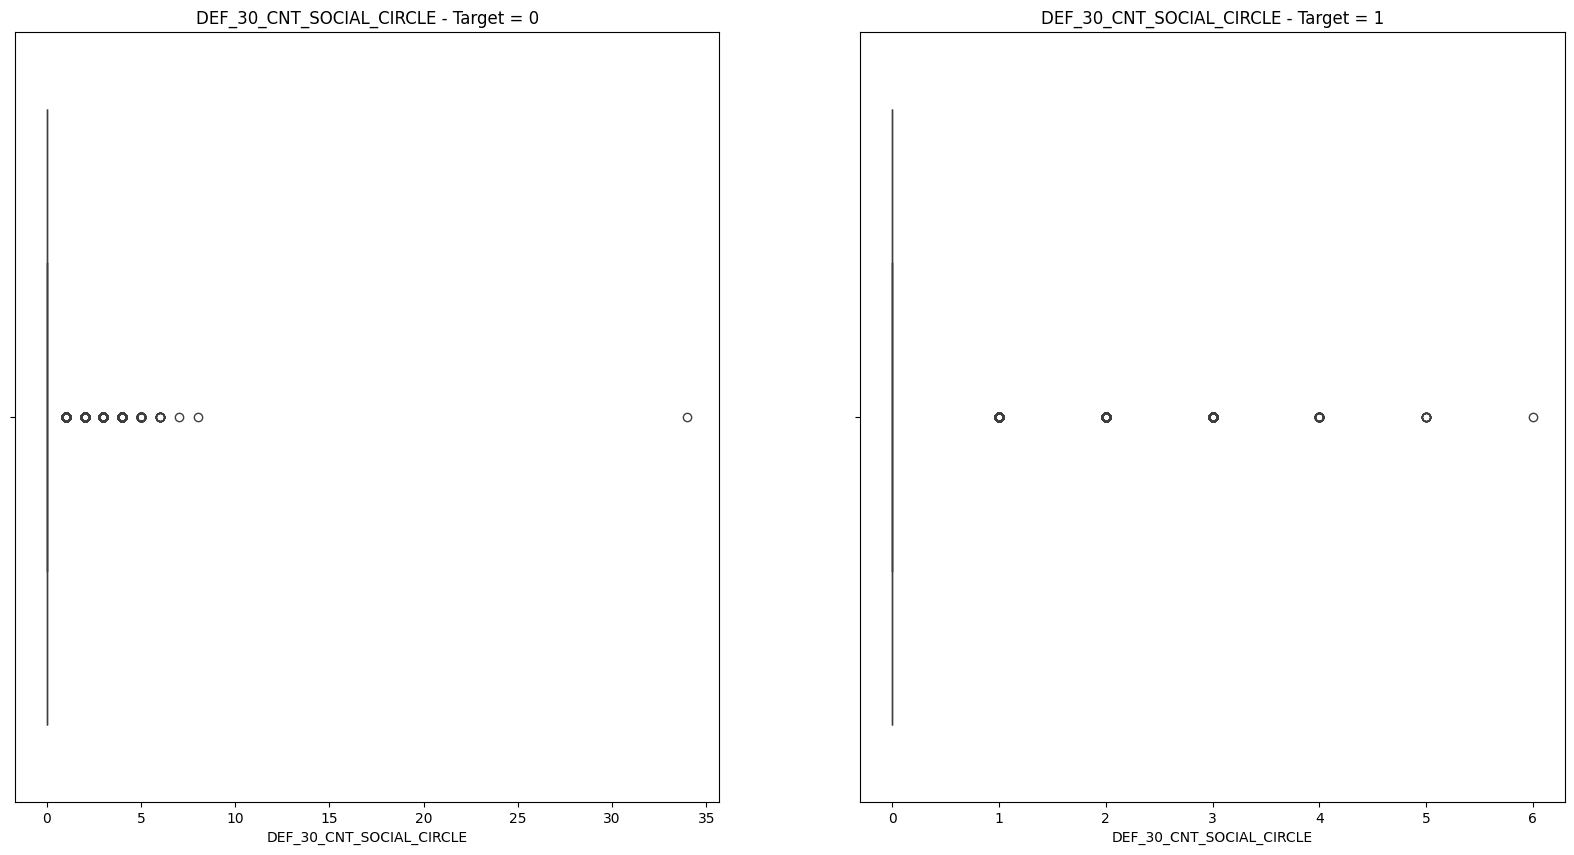

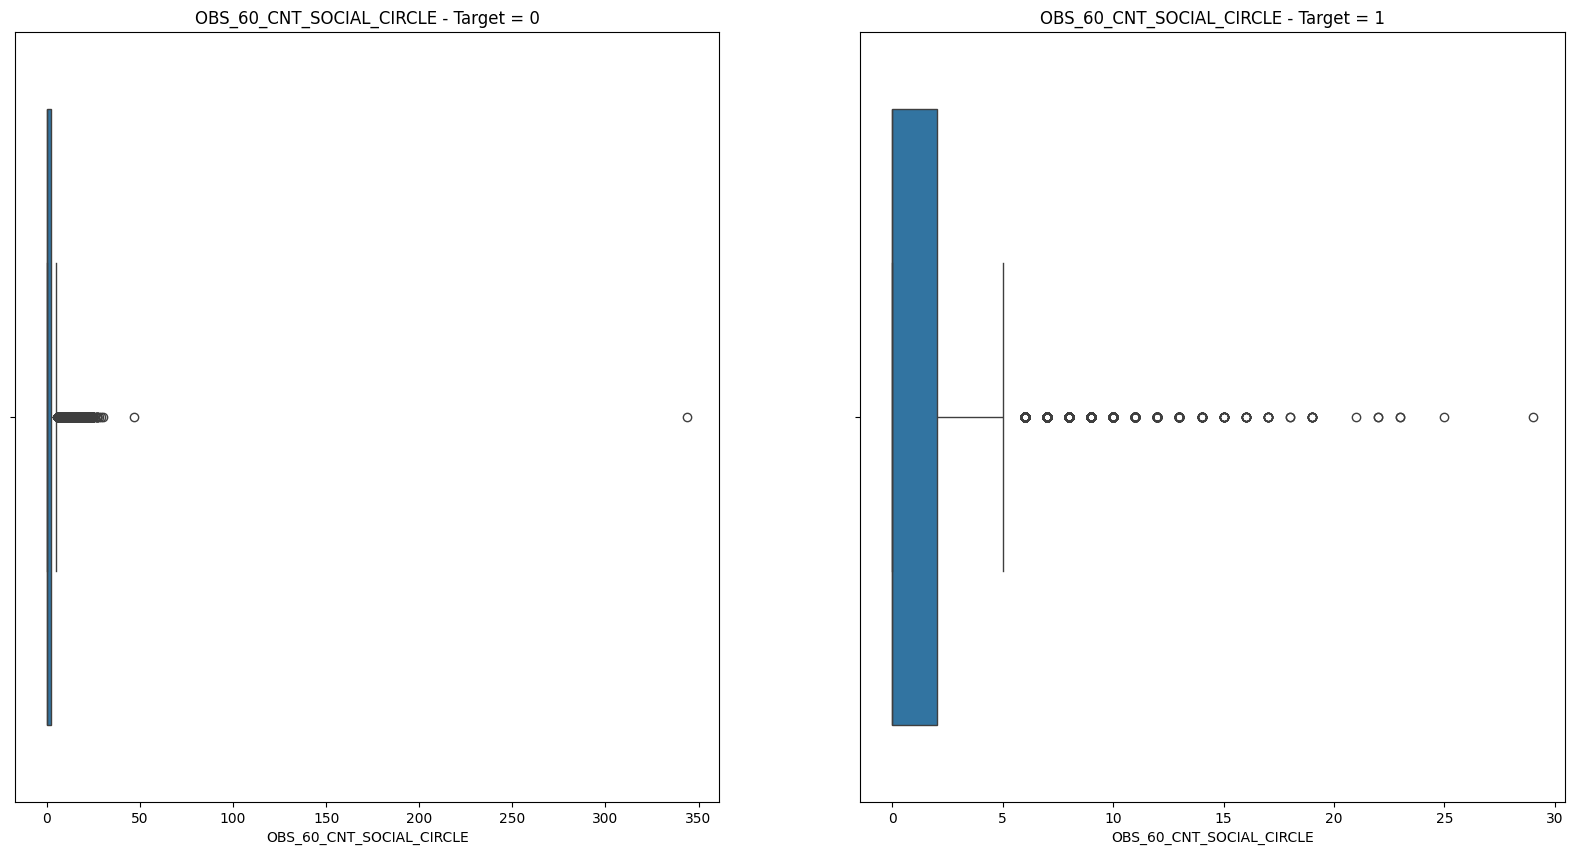

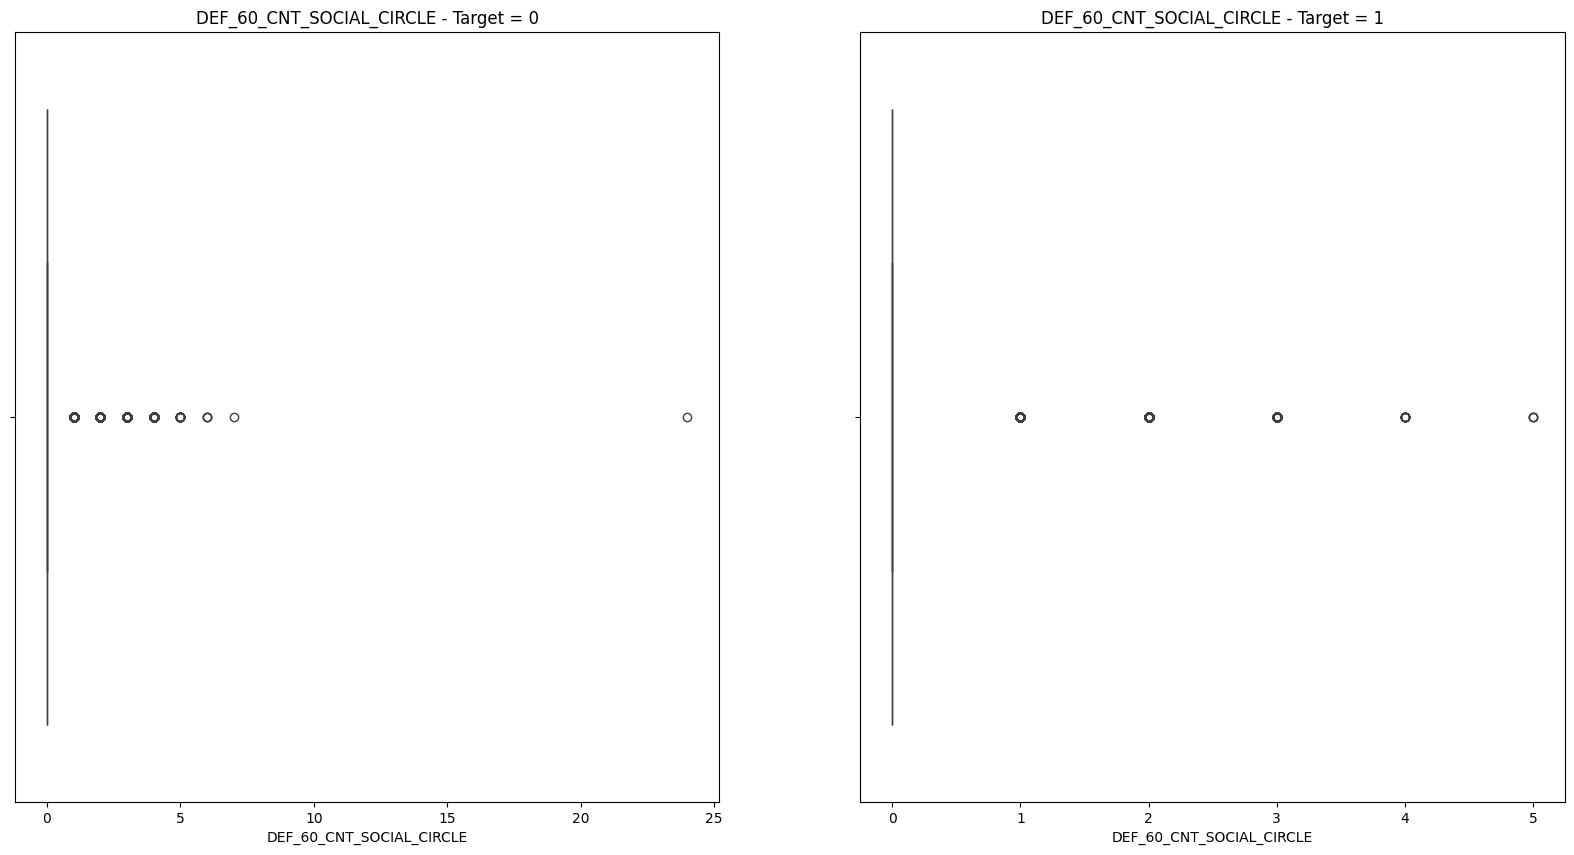

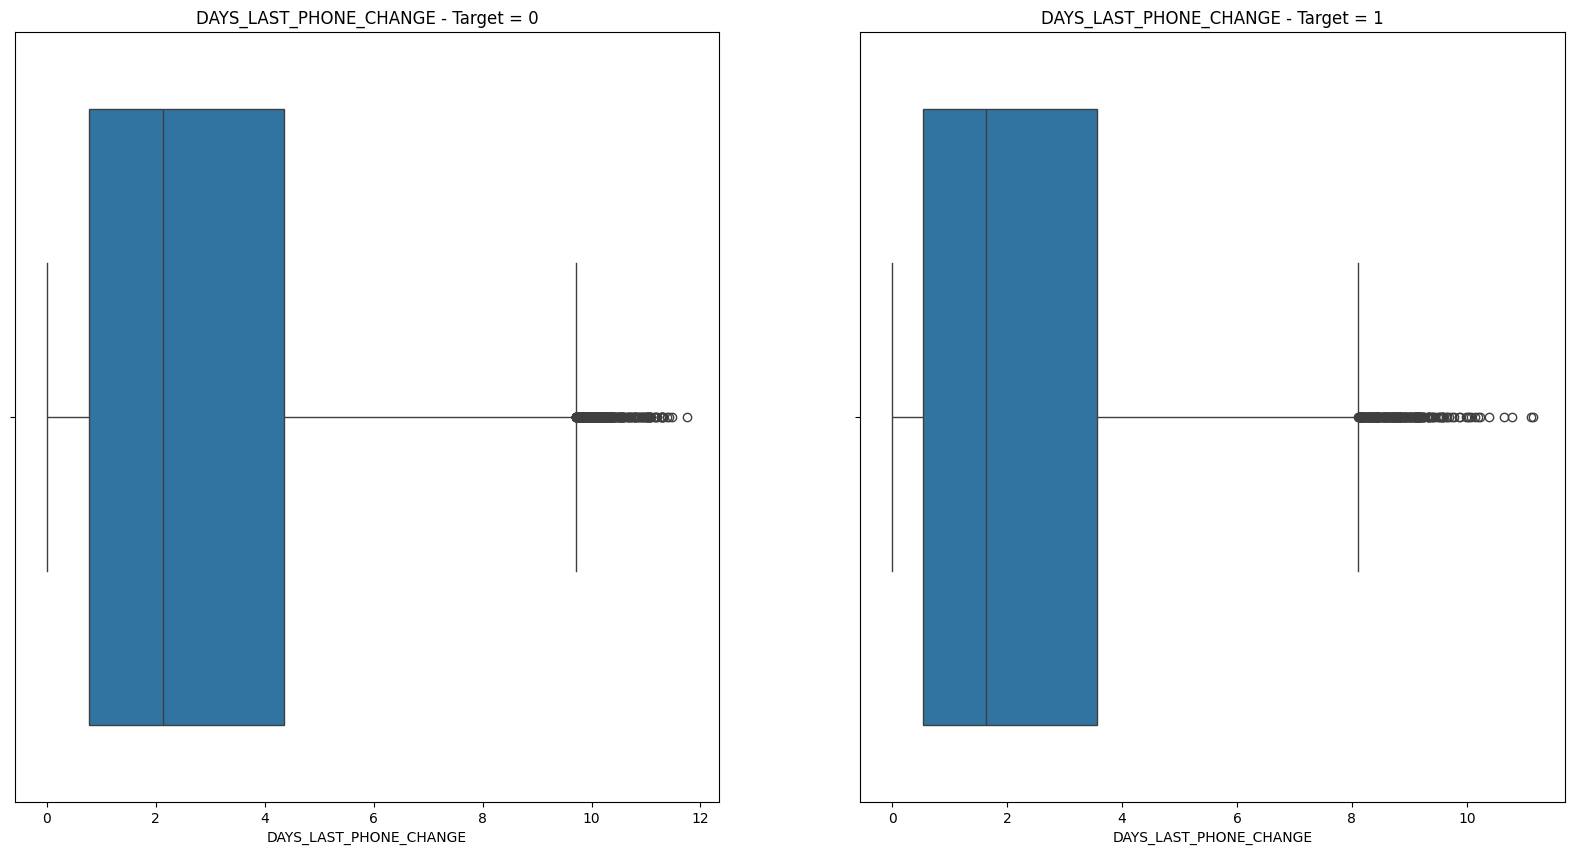

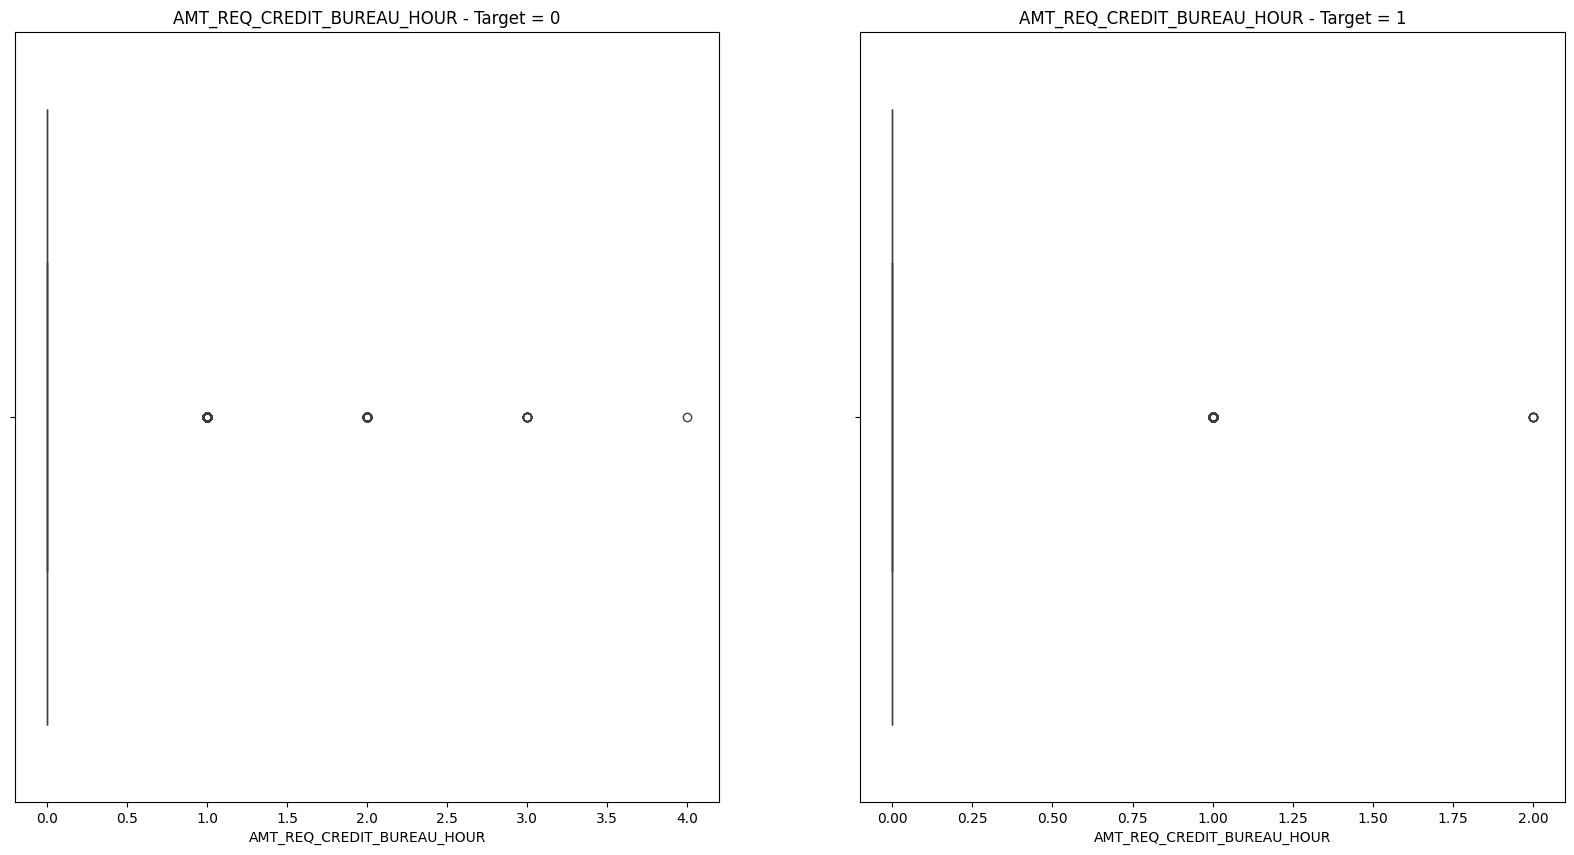

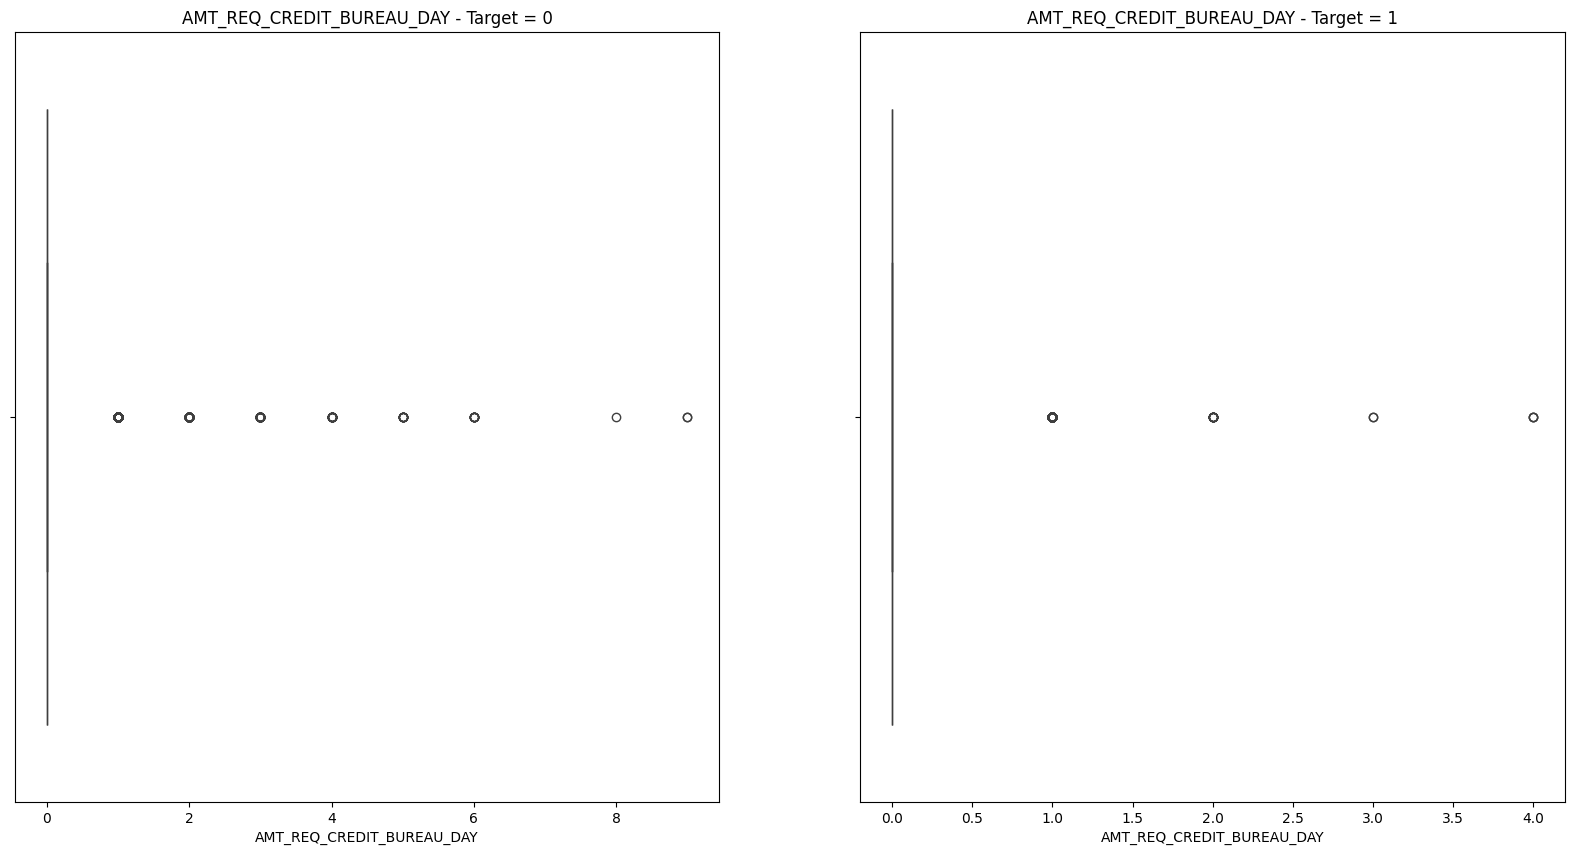

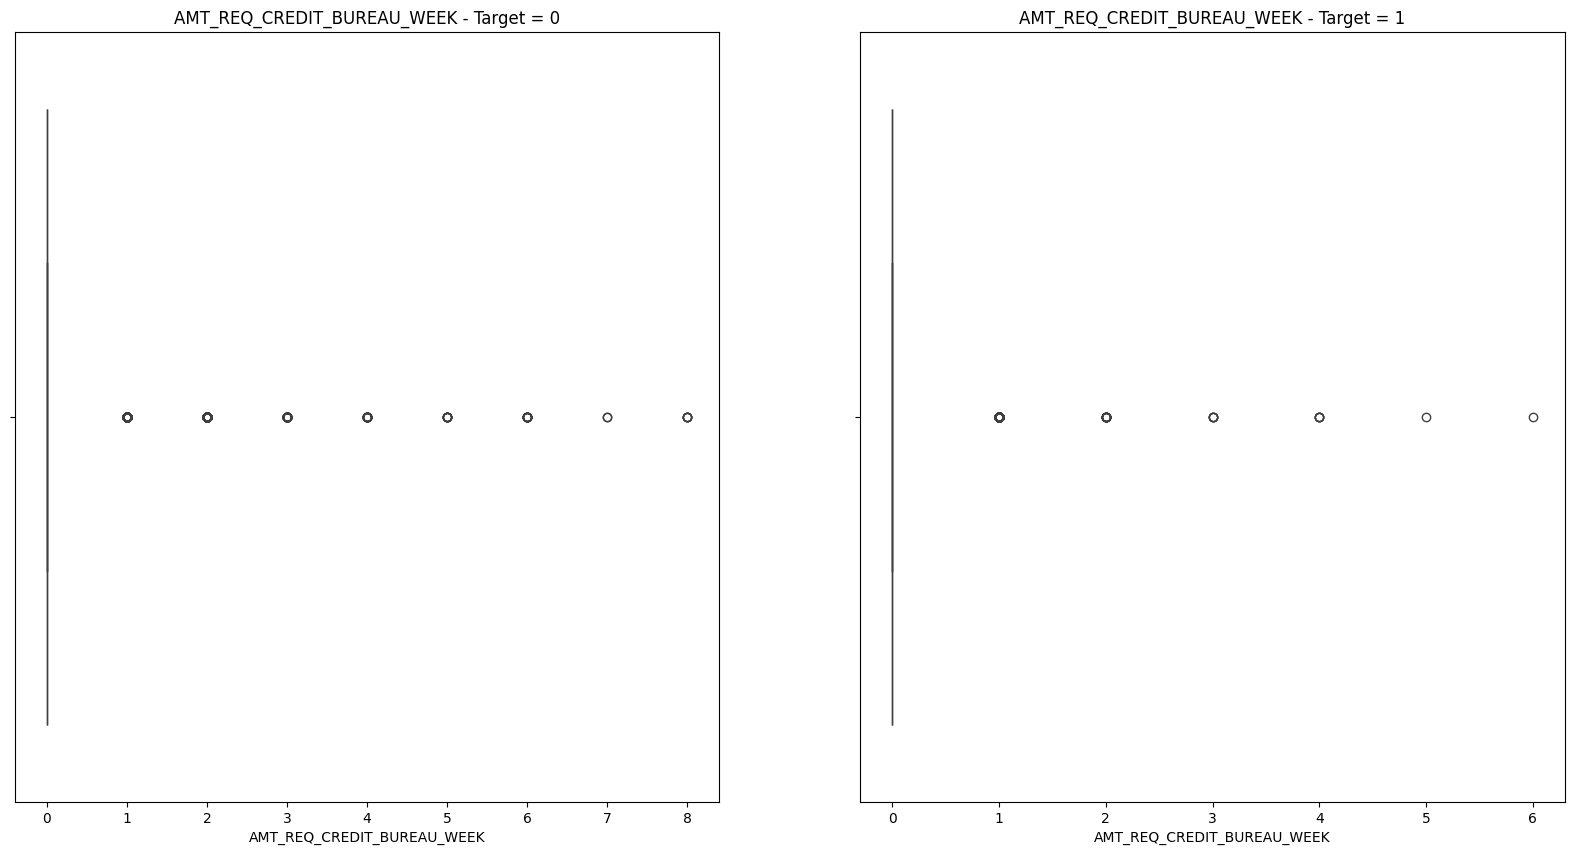

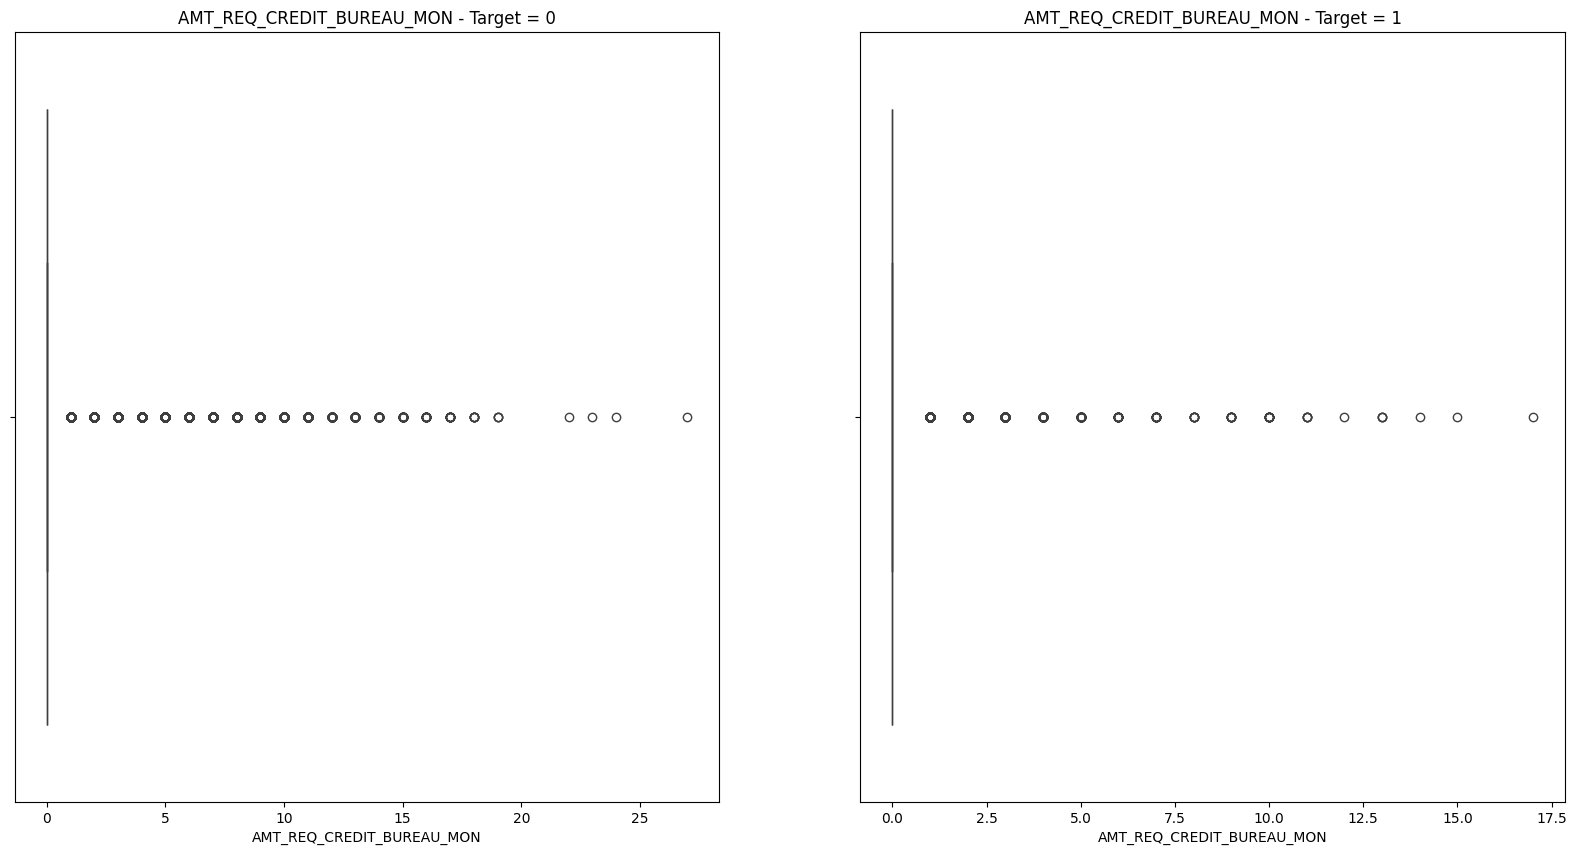

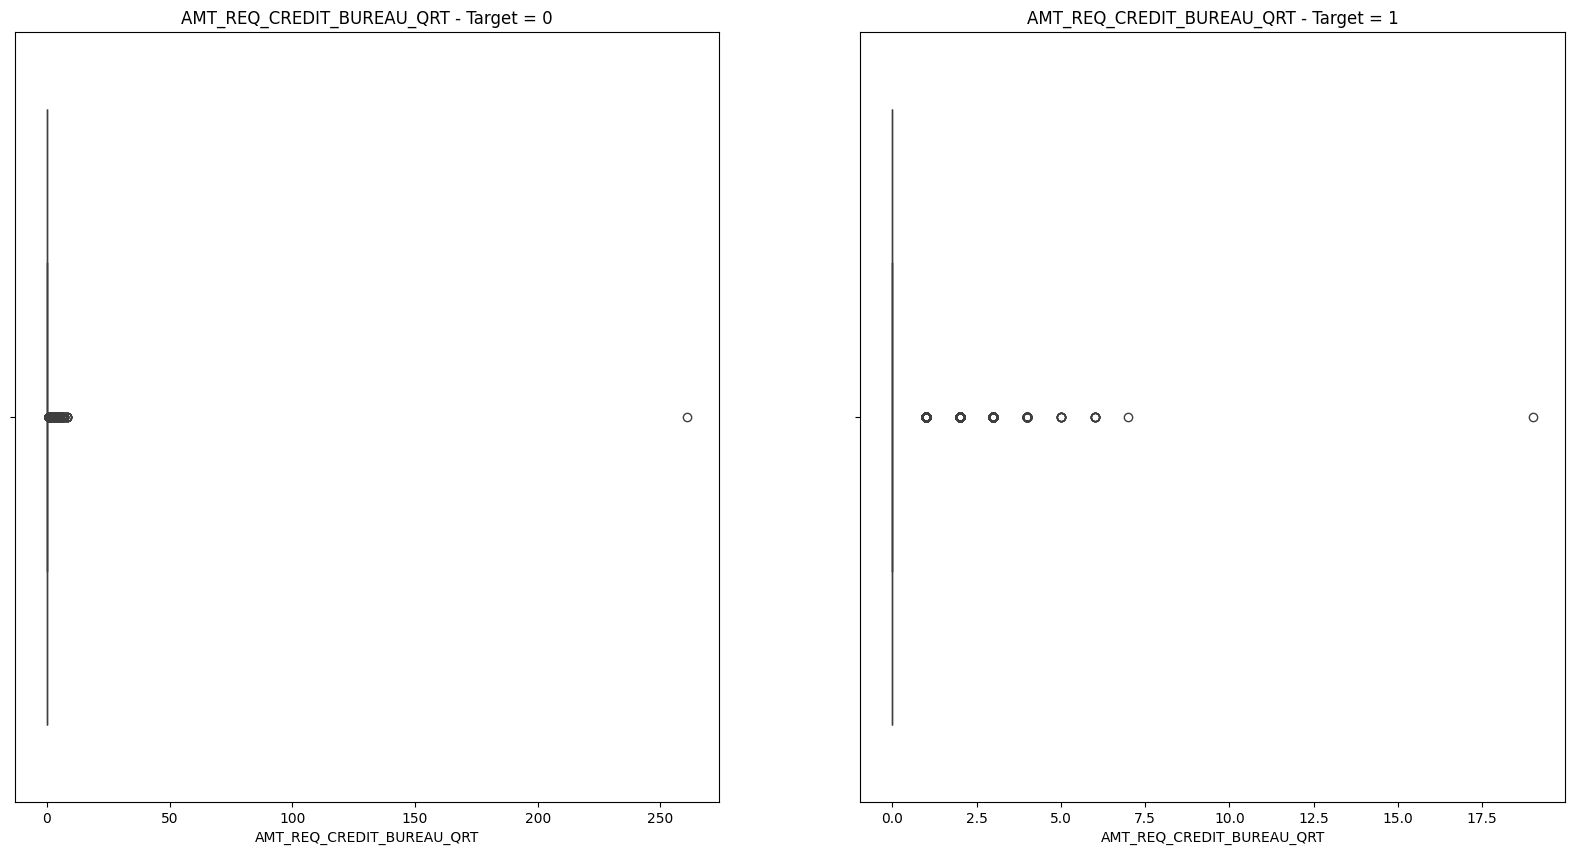

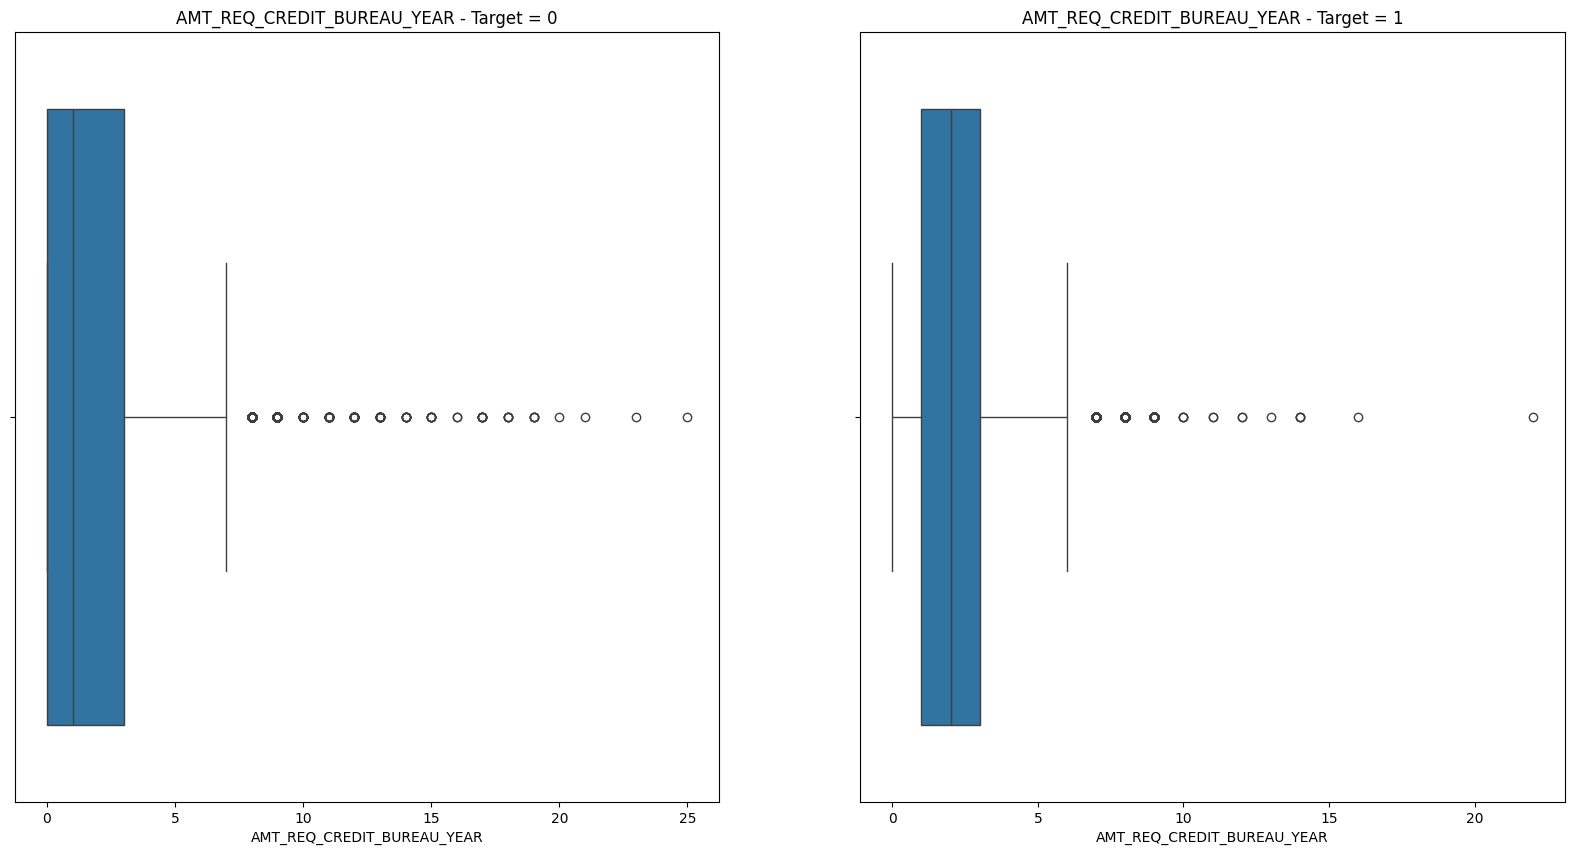

In [385]:

# Define the list of numerical columns
numerical_columns = target_0_df.select_dtypes(include=[np.number]).columns

for i in numerical_columns:
    if i not in target_0_df.columns:
        print(f"Column {i} not found in target_0_df, skipping plot.")
        continue
    if i not in target_1_df.columns:
        print(f"Column {i} not found in target_1_df, skipping plot.")
        continue

    plt.figure(figsize=(20, 10))

    # Plot for target_0_df
    plt.subplot(1, 2, 1)
    sns.boxplot(data=target_0_df, x=i)
    plt.title(f"{i} - Target = 0")

    # Plot for target_1_df
    plt.subplot(1, 2, 2)
    sns.boxplot(data=target_1_df, x=i)
    plt.title(f"{i} - Target = 1")

    plt.show()


#### Key interpretation from univariate analysis of numerical variables
##### In this section, we will only highlight variables having significant difference for target = 0 and target = 1  

- **DAYS_LAST_PHONE_CHANGE**: Median value and 75 percentile value for Defaulters (Target = 1) is lesser than non-defaulters. It implies defaulter more often change phone number before application
- **DAYS_ID_PUBLISH**: Defaulters seem to change IDs more frequetly than non-defaulters
- **DAYS_BIRTH**: 25 percentile, median, and 75 percentile for the age of defaulter applicants are smaller than younger applicants. This means defaulter population is younger than non-defaulter.

### 4.7 Bivariate Analysis for Categorical Variable

#### For bi variate analysis wrt target-0&1, we will use the data set where full target column is available. Further, we will calculate mean of target column for each categorical variable as it will tell us percentage of defaulters for the category

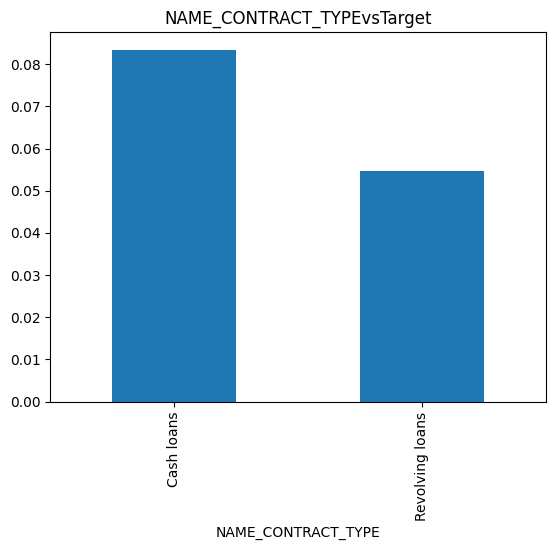

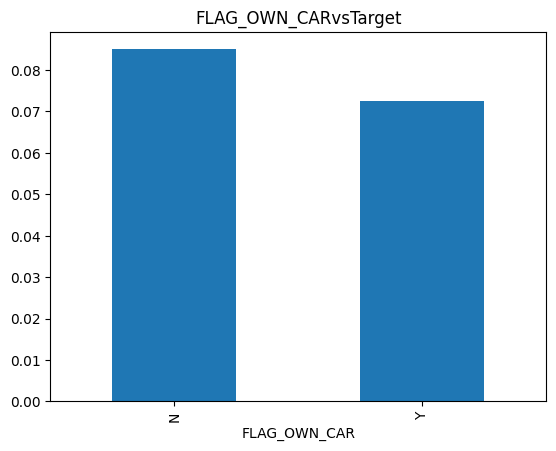

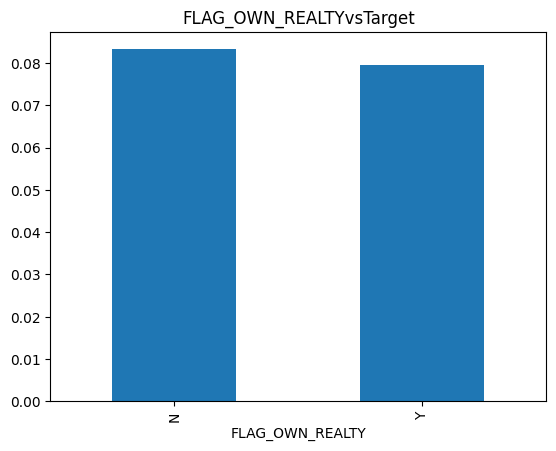

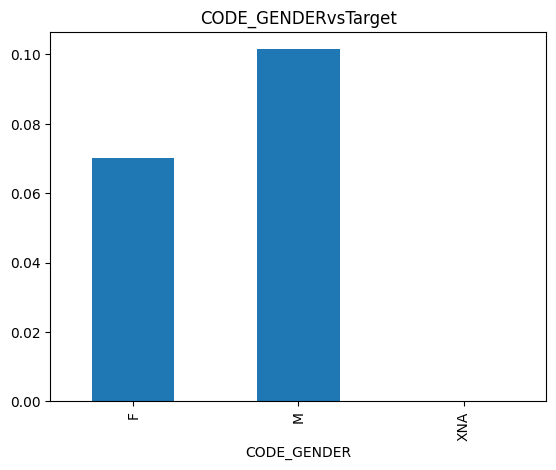

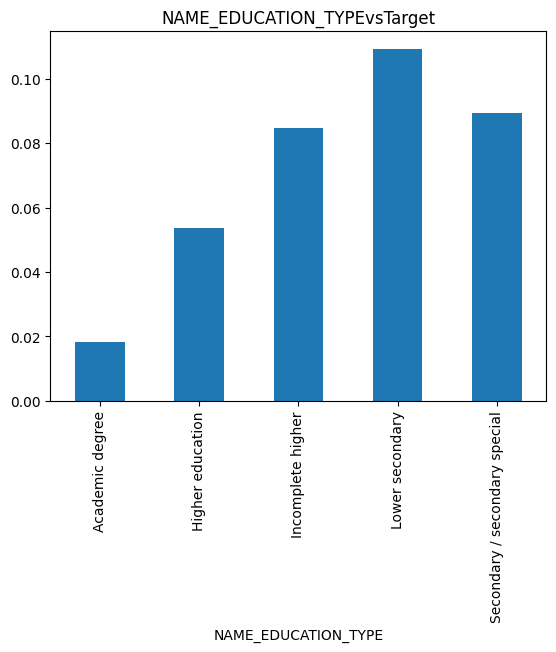

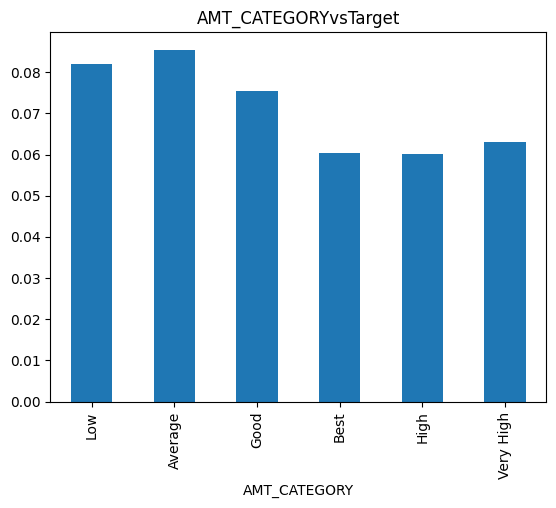

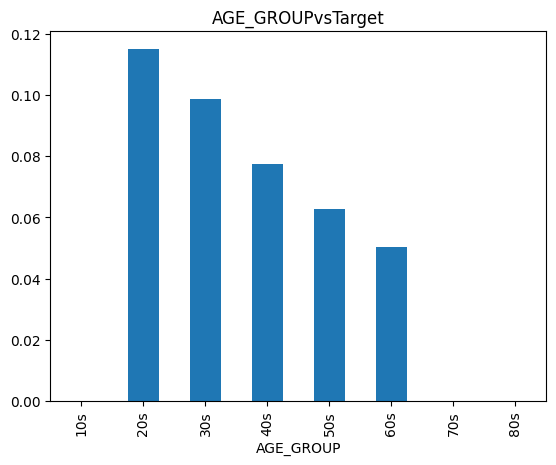

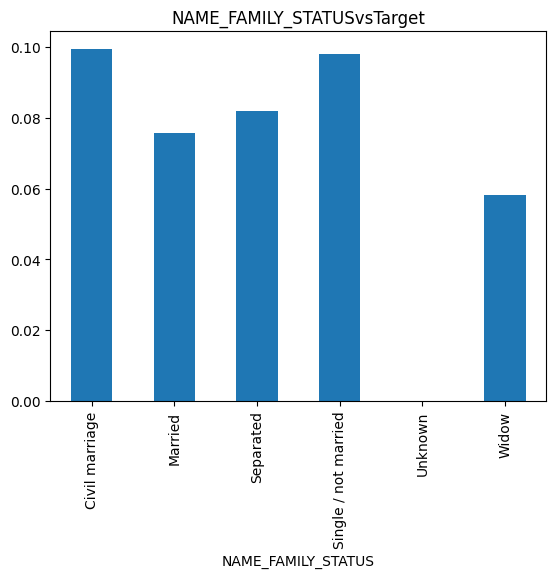

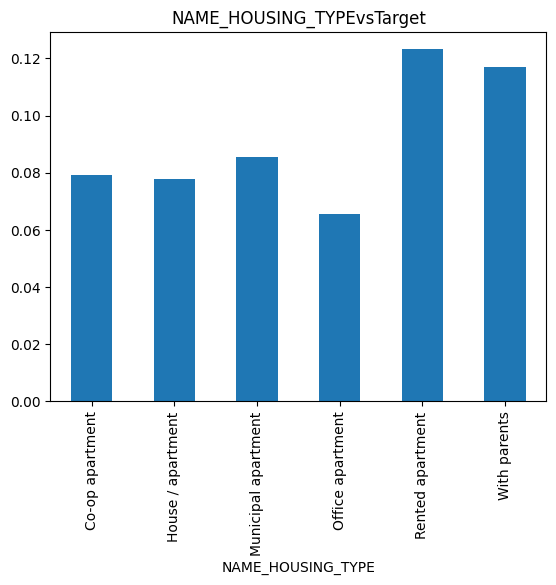

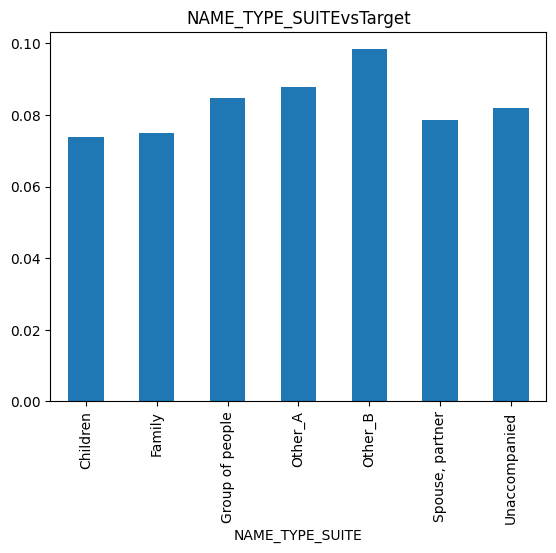

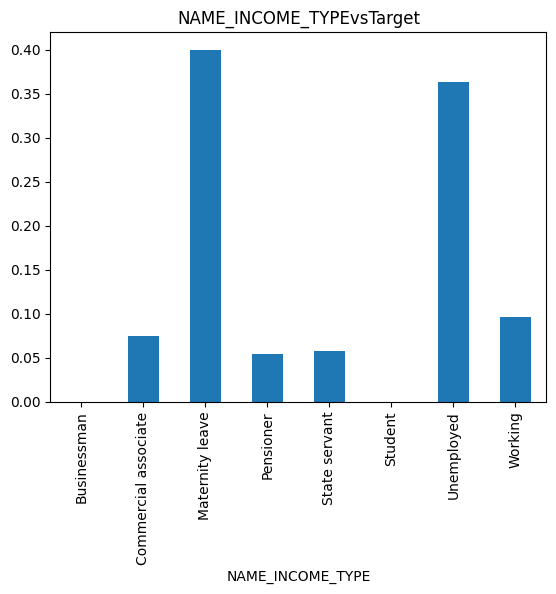

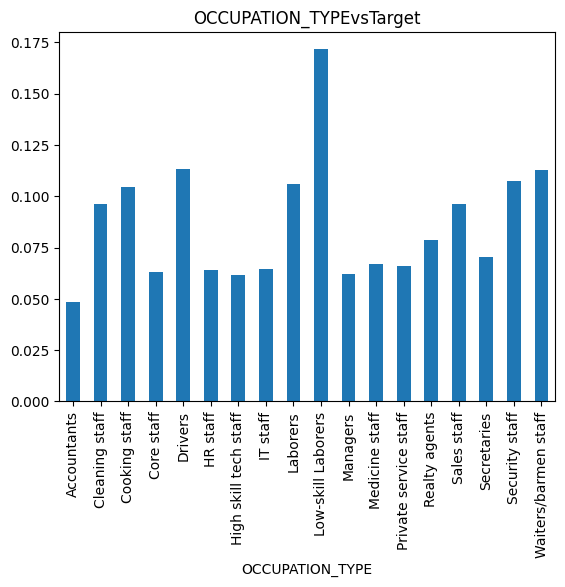

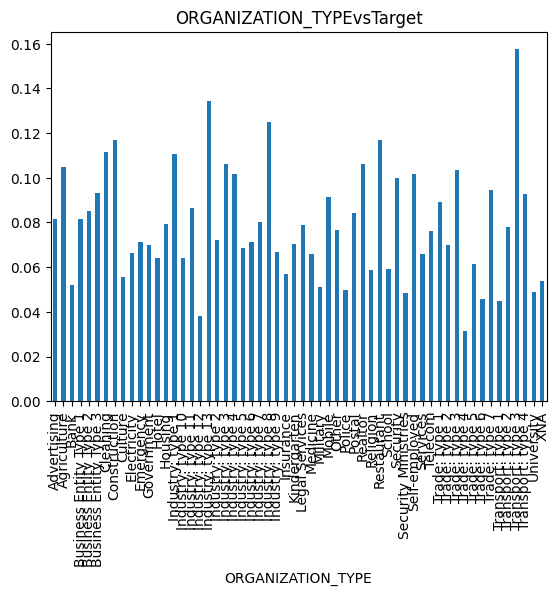

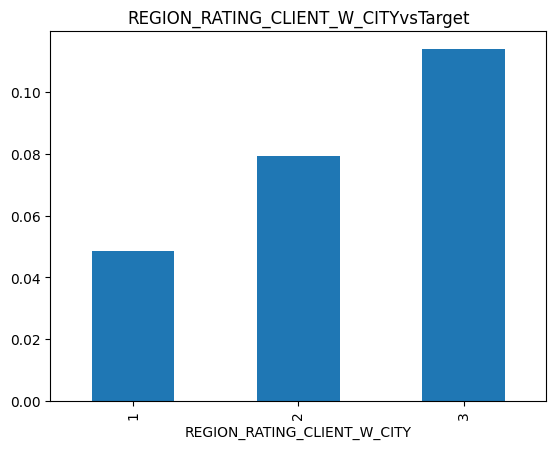

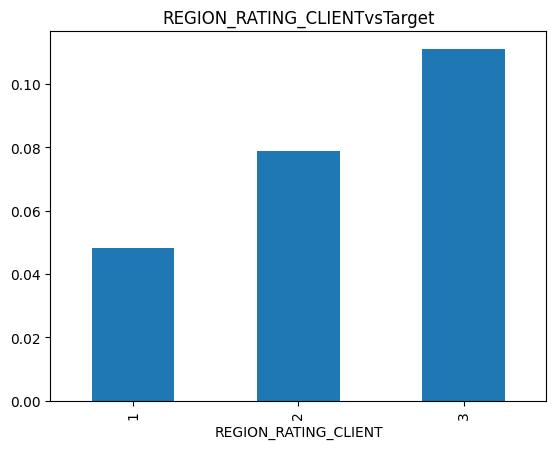

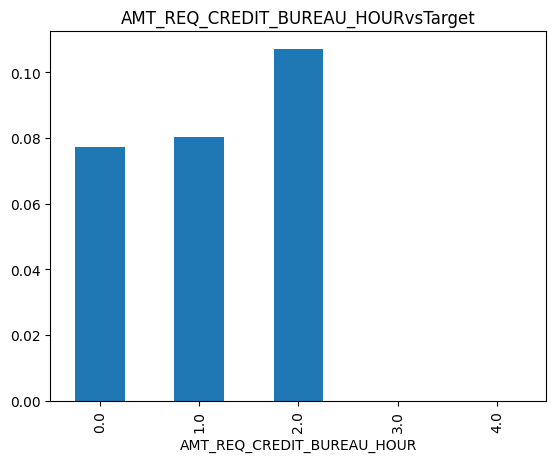

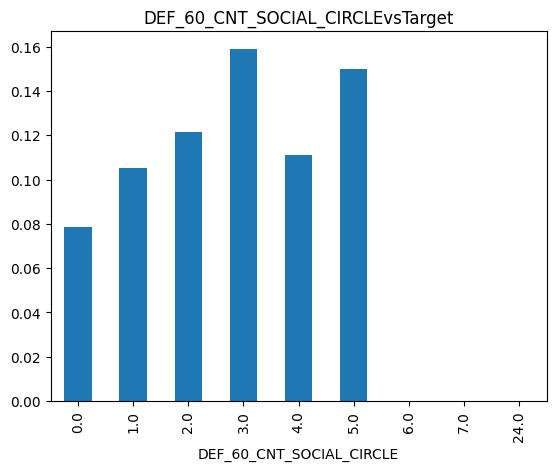

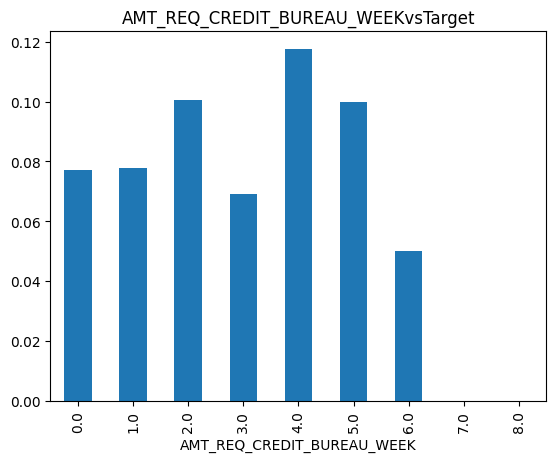

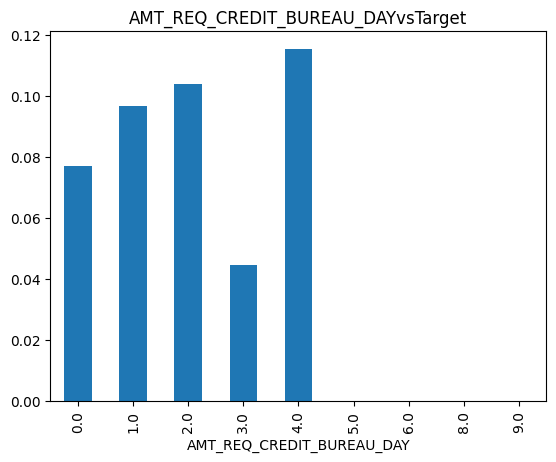

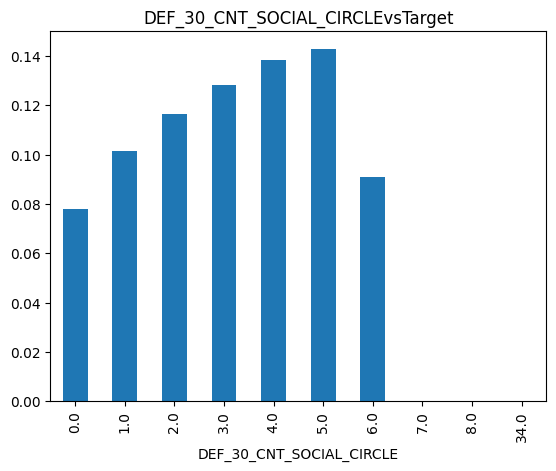

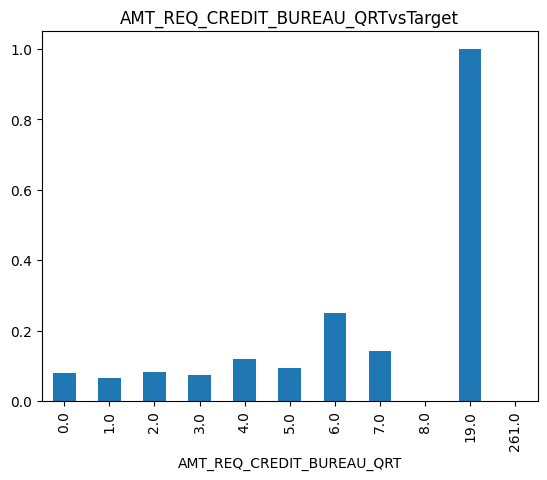

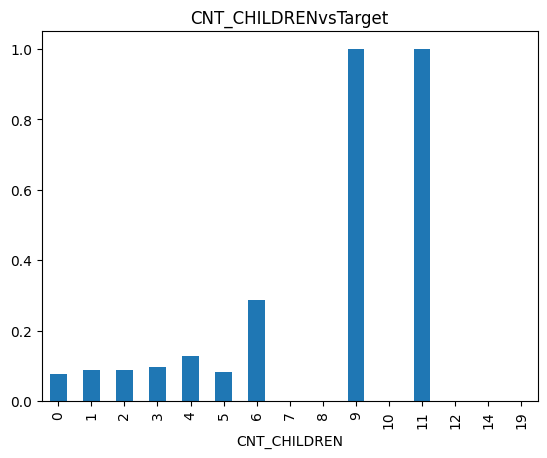

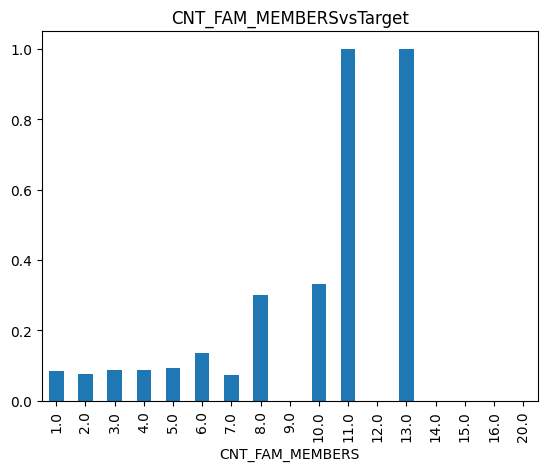

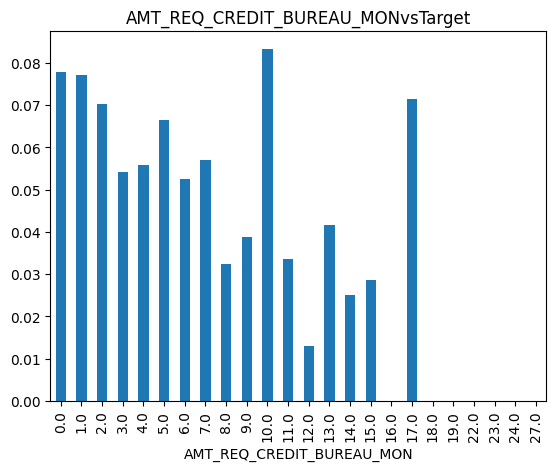

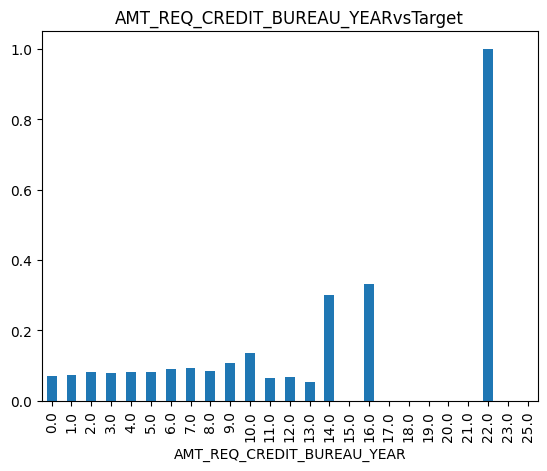

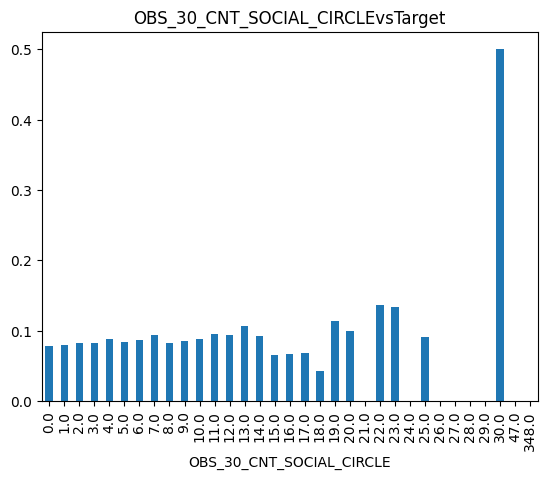

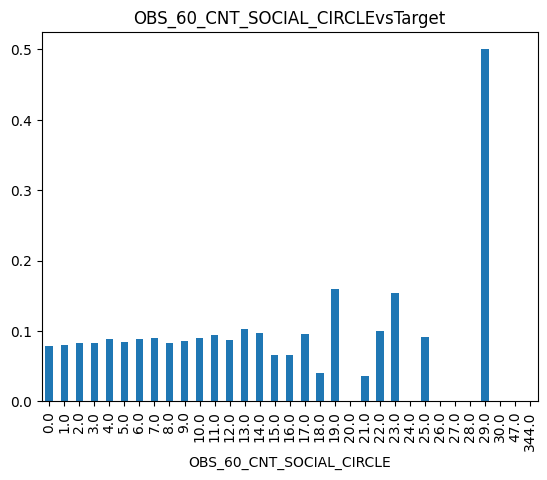

In [386]:
for i in categorical_columns:
    (dx_2.groupby(i)['TARGET'].mean()).plot.bar()
    plt.title(i+ 'vs' +'Target')
    plt.show()

#### Key interpretation from bivariate analysis of categorical variables
##### In this section, we will only highlight key outcomes from Bivariate analysis
- **CODE_GENDER**: Male customers have a higher probability of defaulting
- **NAME_EDUCATION_TYPE**:Customers with lower secondary education have a higher risk of default
- **AGE_GROUP**- Customers in 20s and 30s have higher chances of deafaulting
- **NAME_HOUSING_TYPE**: Customers living in rented apartments and living with parents seem to default more
- **NAME_INCOME_TYPE**:Unemployed and Customers on maternity leave have higher
- **OCCUPATION_TYPE**:Low-skill laborers default more
- **REGION_RATING_CLIENT**&**REGION_RATING_CLIENT_W_CITY**: Customers with rating 3 have higher risk of defaulting    

### Perfoming multivariate Analysis

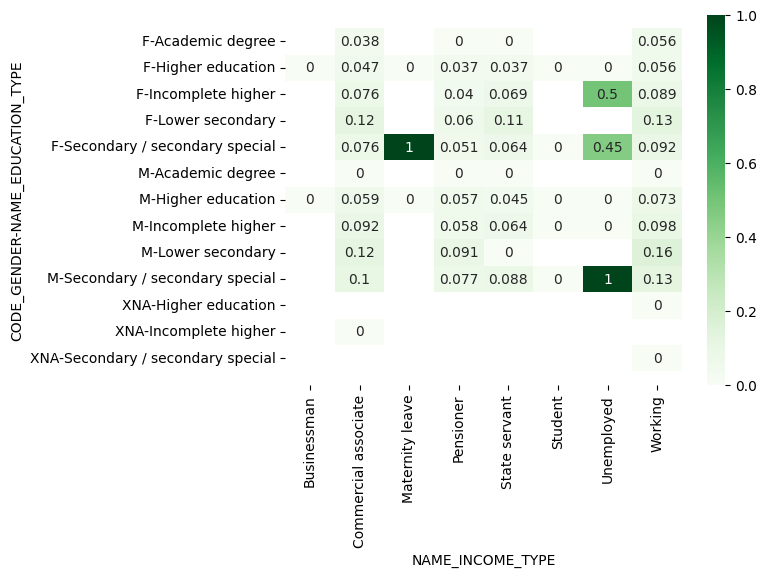

In [387]:
#multivariate_analysis-1
pivot_data = pd.pivot_table(dx_2, values ='TARGET',index=['CODE_GENDER','NAME_EDUCATION_TYPE'], columns='NAME_INCOME_TYPE')
sns.heatmap(pivot_data, annot=True,cmap="Greens")
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.yticks(rotation = 0)
plt.show()

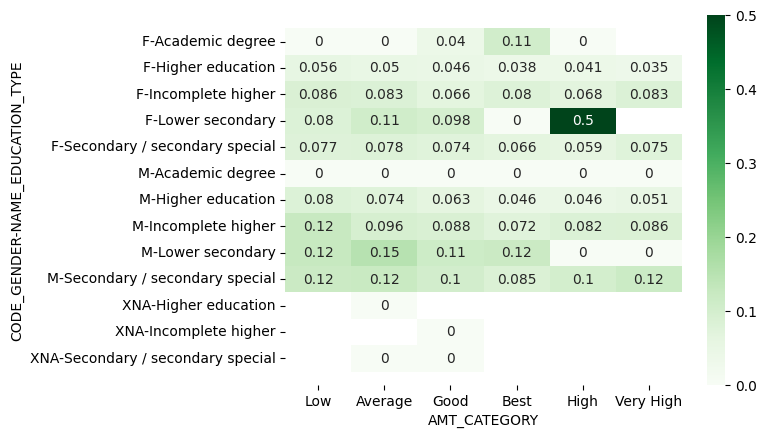

In [388]:
#multi-variate analysis -2
pivot_data = pd.pivot_table(dx_2, values ='TARGET',index=['CODE_GENDER','NAME_EDUCATION_TYPE'], columns='AMT_CATEGORY')
sns.heatmap(pivot_data, annot=True,cmap="Greens")
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.yticks(rotation = 0)
plt.show()

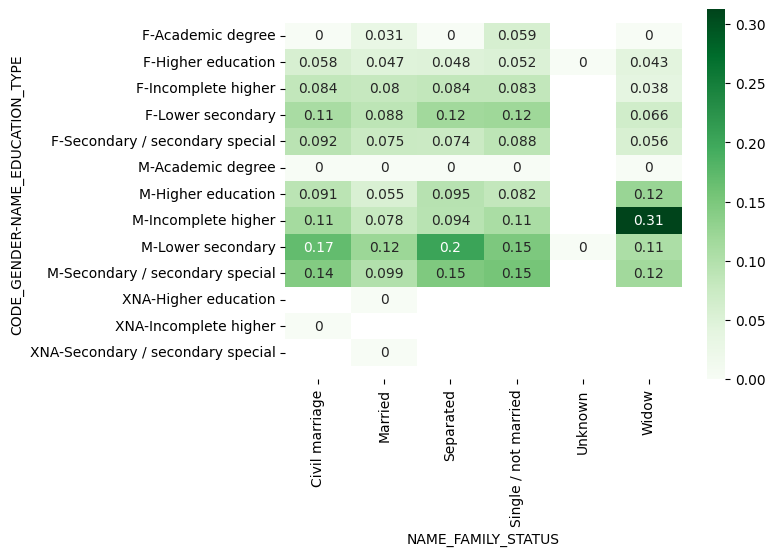

In [389]:
#multi-variate analysis-3
pivot_data = pd.pivot_table(dx_2, values ='TARGET',index=['CODE_GENDER','NAME_EDUCATION_TYPE'], columns='NAME_FAMILY_STATUS')
sns.heatmap(pivot_data, annot=True,cmap="Greens")
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.yticks(rotation = 0)
plt.show()

## 4.7 Bivariate Analsyis for Numerical columns

#### The objective of this analysis is to find pattern in defaulter vs non-defaulter customers wrt target

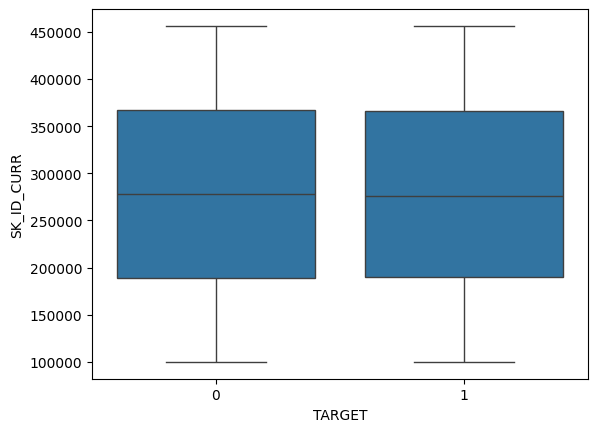

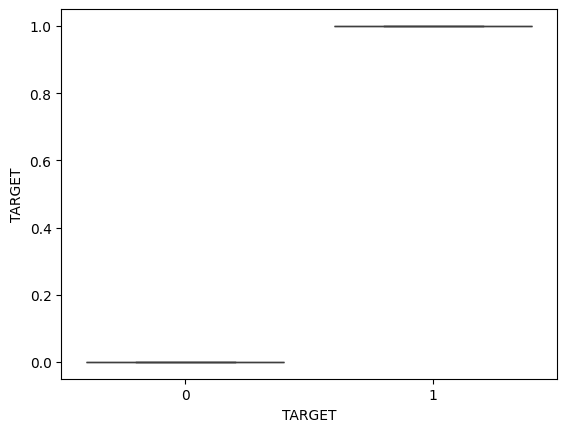

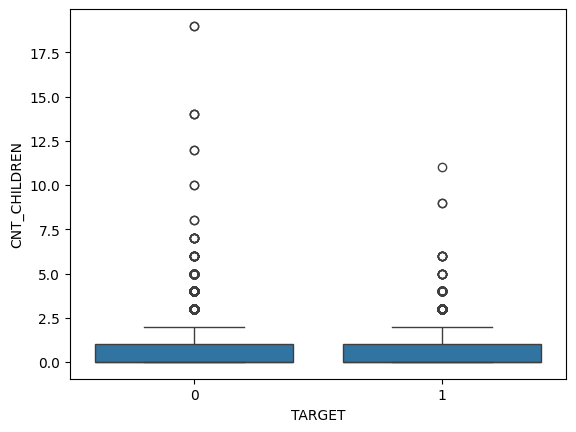

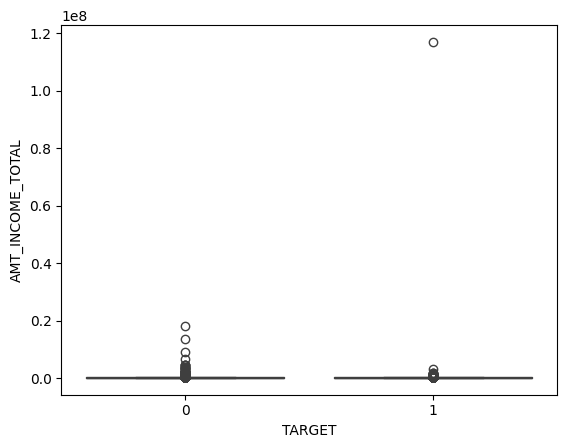

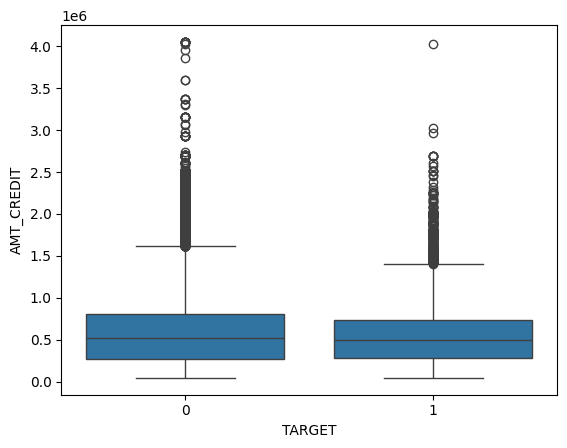

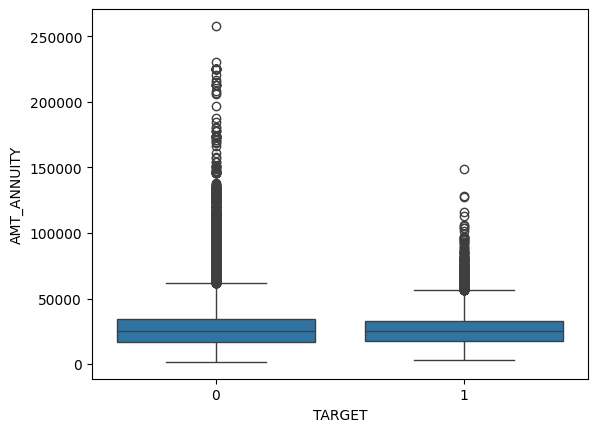

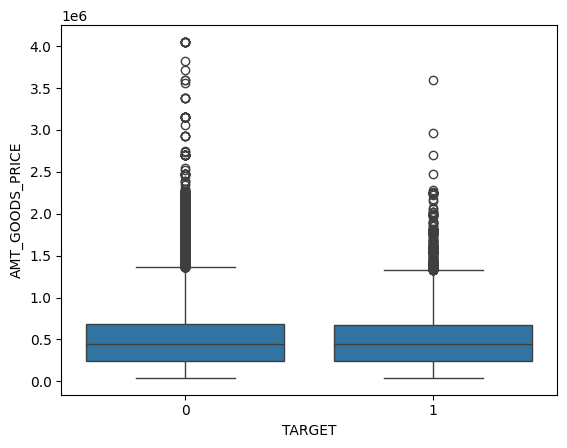

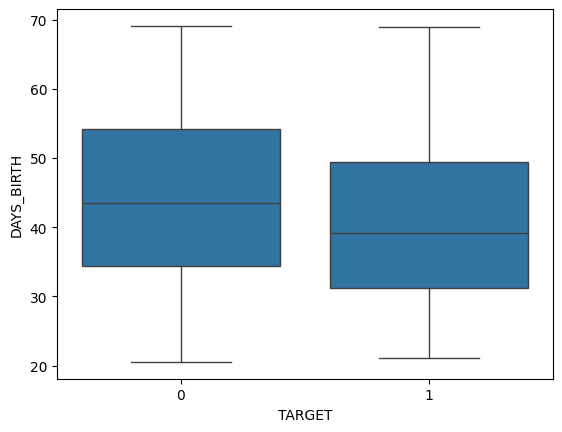

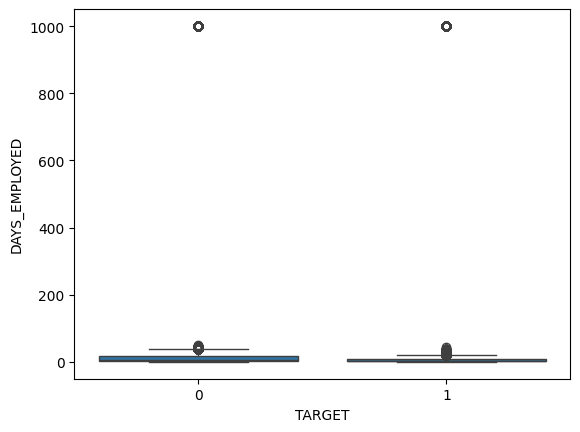

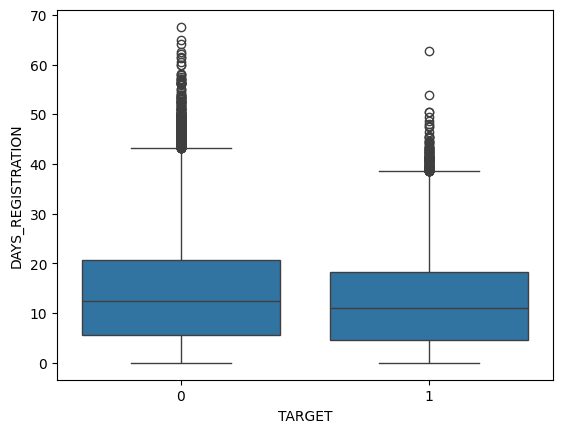

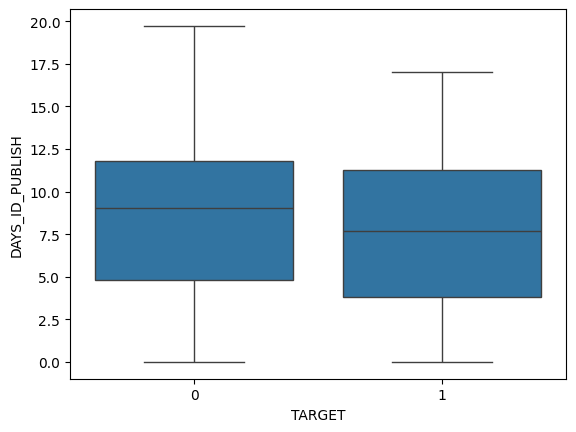

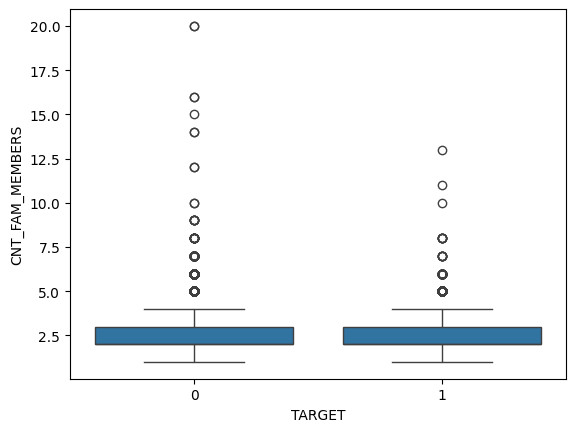

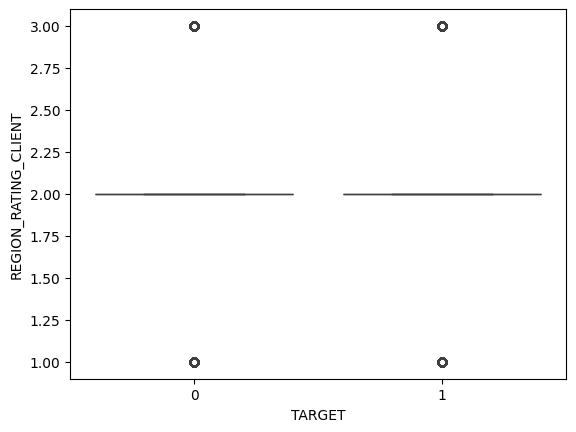

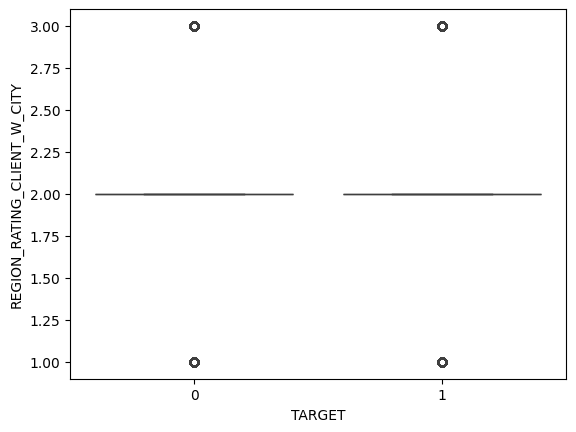

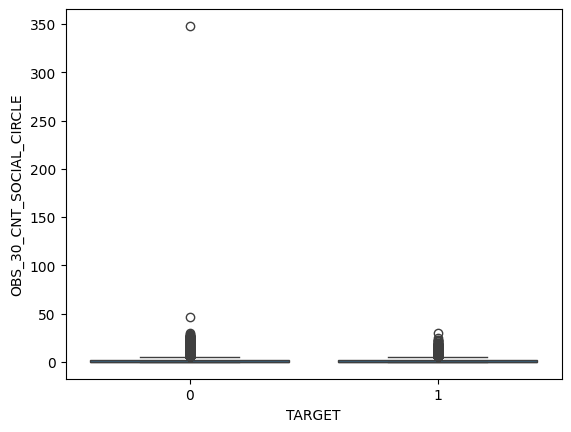

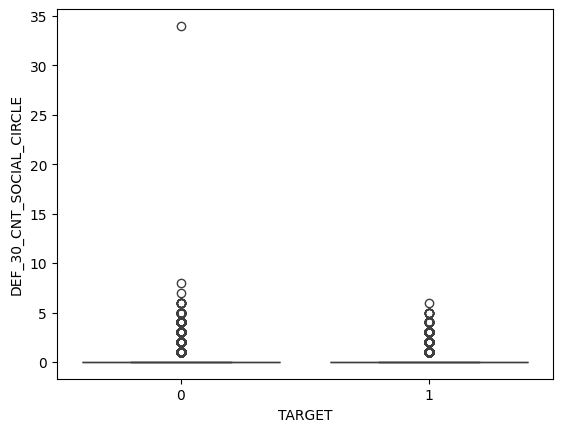

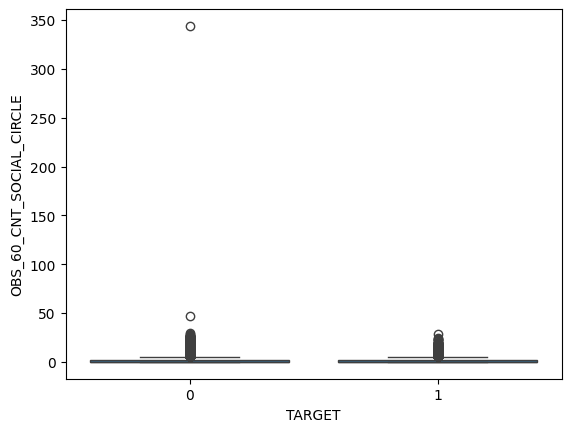

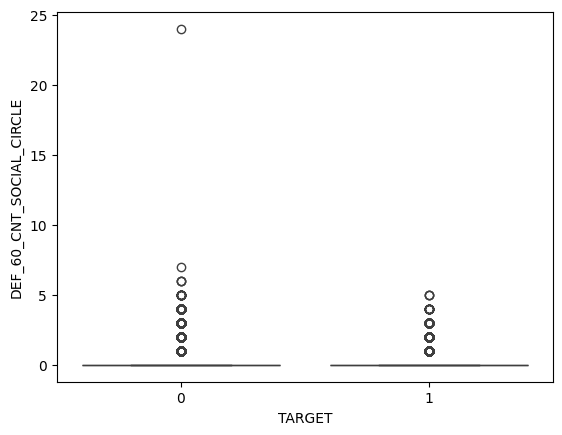

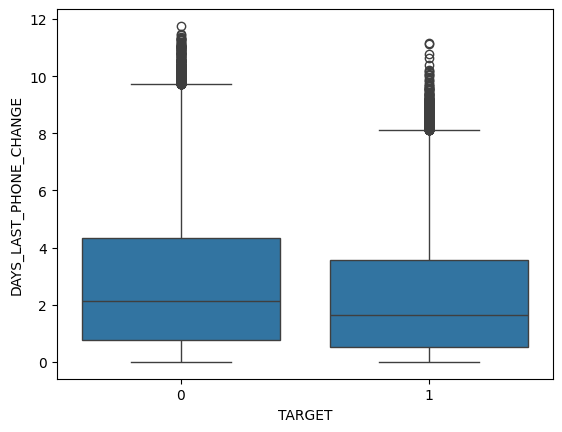

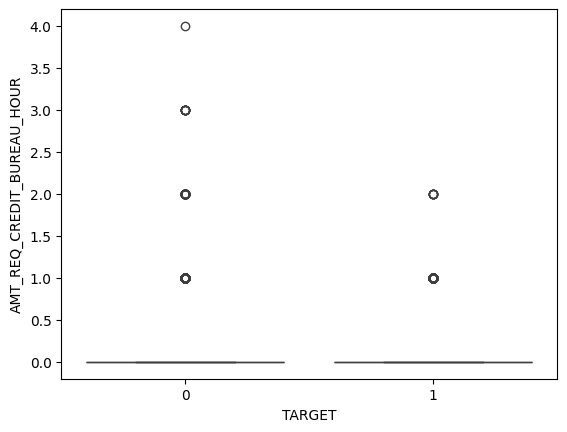

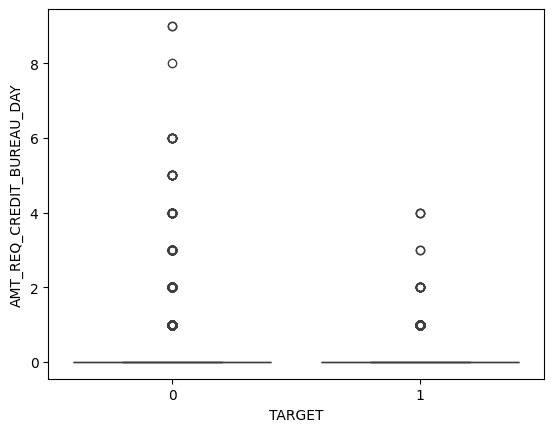

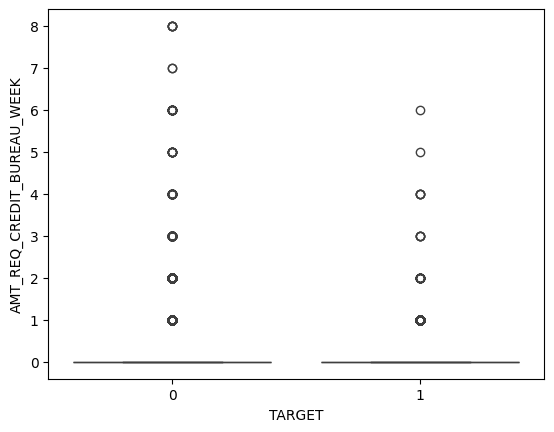

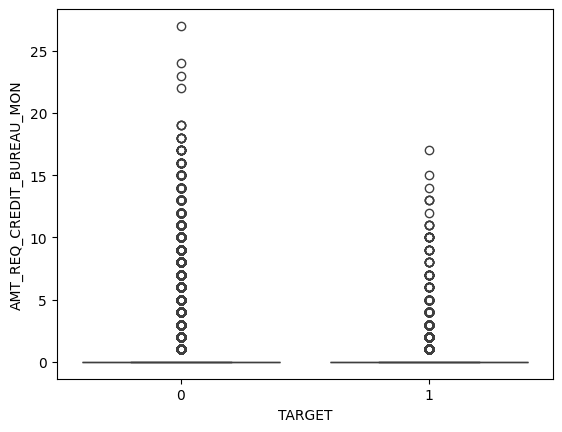

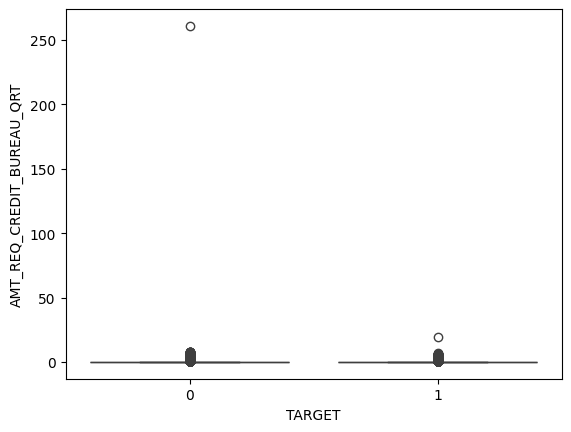

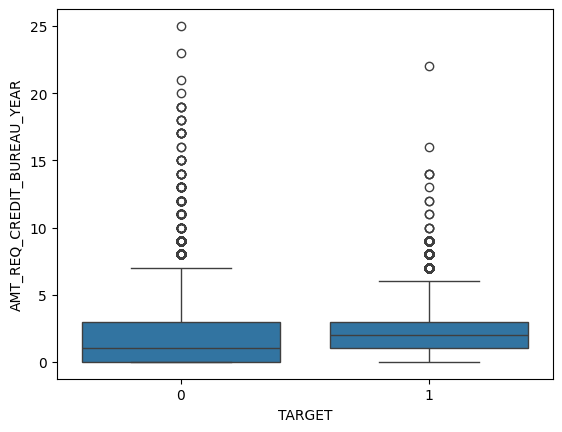

In [390]:
# loop for bivariate analysis for numerical variables
for i in numerical_columns:
    sns.boxplot(data = dx_2, x='TARGET',y= i)
    plt.show()

#### Key interpretation from bivariate analysis of categorical variables
##### In this section, we will only highlight key outcomes from Bivariate analysis
- **DAYS_LAST_PHONE_CHANGE**:Defaulter customers change phone closer to the submission of application
- **DAYSID_PUBLISH**:Defaulter customers changes id closer to submission of application
- **DAYS_REGISTRATION**: Defaulter customers changes registration on a date closer to submission of application
- **DAYS_BIRTH**: Defaulter customers are relatively younger than non-defaulters

# Reading the Previous Application

In [391]:
#Reading the data in pandas

dy = pd.read_csv(r"/content/previous_application.csv")
dy.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

  DA

# Analyzing Previous Application Data

In [392]:
dy.shape

(959259, 37)

In [393]:
dy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 959259 entries, 0 to 959258
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_PREV                   959259 non-null  int64  
 1   SK_ID_CURR                   959259 non-null  int64  
 2   NAME_CONTRACT_TYPE           959259 non-null  object 
 3   AMT_ANNUITY                  745923 non-null  float64
 4   AMT_APPLICATION              959259 non-null  float64
 5   AMT_CREDIT                   959259 non-null  float64
 6   AMT_DOWN_PAYMENT             447213 non-null  float64
 7   AMT_GOODS_PRICE              738630 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   959259 non-null  object 
 9   HOUR_APPR_PROCESS_START      959259 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  959259 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       959259 non-null  int64  
 12  RATE_DOWN_PAYMENT            447213 non-null  float64
 13 

In [394]:
dy.describe()

SK_ID_PREV     SK_ID_CURR    AMT_ANNUITY  AMT_APPLICATION  \
count  9.592590e+05  959259.000000  745923.000000     9.592590e+05   
mean   1.923010e+06  278448.697977   15902.741860     1.744958e+05   
std    5.329569e+05  102872.729672   14736.195282     2.914175e+05   
min    1.000001e+06  100001.000000       0.000000     0.000000e+00   
25%    1.460646e+06  189405.500000    6307.717500     1.885500e+04   
50%    1.924029e+06  278805.000000   11250.000000     7.086600e+04   
75%    2.384692e+06  367824.000000   20542.185000     1.800000e+05   
max    2.845382e+06  456255.000000  418058.145000     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  9.592590e+05      4.472130e+05     7.386300e+05   
mean   1.952226e+05      6.700120e+03     2.266406e+05   
std    3.173056e+05      2.041162e+04     3.138278e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.425500e+04      0.000000e+00     5.067000e+04   
50%    8.026650e+04      1.647000e+03     1.116000e+05   
75%    2.156400e+05      7.767000e+03     2.295000e+05   
max    6.905160e+06      2.150100e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count            959259.000000           959259.000000      447213.000000   
mean                 12.486261                0.996409           0.079699   
std                   3.332861                0.059820           0.107975   
min                   0.000000                0.000000          -0.000014   
25%                  10.000000                1.000000           0.000000   
50%                  12.000000                1.000000           0.051477   
75%                  15.000000                1.000000           0.108909   
max                  23.000000                1.000000           0.989740   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            3395.000000               3395.000000  959259.000000   
mean                0.187230                  0.774728    -882.156624   
std                 0.083792                  0.100061     779.574182   
min                 0.034781                  0.373150   -2922.000000   
25%                 0.160716                  0.715645   -1303.000000   
50%                 0.189122                  0.835095    -583.000000   
75%                 0.193330                  0.852537    -281.000000   
max                 1.000000                  1.000000      -2.000000   

       SELLERPLACE_AREA    CNT_PAYMENT  DAYS_FIRST_DRAWING  \
count      9.592590e+05  745926.000000       573821.000000   
mean       3.200639e+02      16.007914       342375.439072   
std        8.347558e+03      14.519229        88617.218507   
min       -1.000000e+00       0.000000        -2921.000000   
25%       -1.000000e+00       6.000000       365243.000000   
50%        4.000000e+00      12.000000       365243.000000   
75%        8.500000e+01      24.000000       365243.000000   
max        4.000000e+06      84.000000       365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              573820.000000  573820.000000     573820.000000   
mean                33569.485204   76487.507689      81893.171099   
std                106581.938249  149580.742154     153239.015379   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1243.000000   -1315.000000      -1270.000000   
50%                  -362.000000    -538.000000       -499.000000   
75%                   128.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              573820.000000  
mean                    0.331668  
std                     0.470813  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                     1.000000  
max                     1.000000

## Data Quality Check And Missing Values

In [395]:
# checking column-wise null percentages
prev_cols = pd.DataFrame(dy.isnull().mean().round(4) * 100, columns =['dy_missing_value_precentage']).sort_values(by=['dy_missing_value_precentage'],ascending=False)
print(prev_cols)

                             dy_missing_value_precentage
RATE_INTEREST_PRIVILEGED                           99.65
RATE_INTEREST_PRIMARY                              99.65
RATE_DOWN_PAYMENT                                  53.38
AMT_DOWN_PAYMENT                                   53.38
NAME_TYPE_SUITE                                    49.13
NFLAG_INSURED_ON_APPROVAL                          40.18
DAYS_FIRST_DRAWING                                 40.18
DAYS_FIRST_DUE                                     40.18
DAYS_LAST_DUE_1ST_VERSION                          40.18
DAYS_LAST_DUE                                      40.18
DAYS_TERMINATION                                   40.18
AMT_GOODS_PRICE                                    23.00
AMT_ANNUITY                                        22.24
CNT_PAYMENT                                        22.24
PRODUCT_COMBINATION                                 0.02
CHANNEL_TYPE                                        0.00
NAME_PRODUCT_TYPE              

In [396]:
# checking row-wise null percentages
prev_rows= pd.DataFrame(dy.isnull().sum(axis=1), columns=['dy_num_missing_value'])
prev_rows

dy_num_missing_value
0                          1
1                          4
2                          4
3                          5
4                         11
...                      ...
959254                     5
959255                     4
959256                     4
959257                     4
959258                     6

[959259 rows x 1 columns]

## Dropping the columns with high percentage of missing values(>50%)

In [397]:
#Droping column having more than 50 % null values
dy_1 = dy.drop(dy.columns[dy.apply(lambda col: col.isnull().sum()/len(dy)*100 > 50)], axis=1)
dy_1

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
0          2030495      271877     Consumer loans     1730.430   
1          2802425      108129         Cash loans    25188.615   
2          2523466      122040         Cash loans    15060.735   
3          2819243      176158         Cash loans    47041.335   
4          1784265      202054         Cash loans    31924.395   
...            ...         ...                ...          ...   
959254     2301051      411575         Cash loans    29967.615   
959255     2492540      403179    Revolving loans     2250.000   
959256     1824618      329776    Revolving loans     2250.000   
959257     1034778      136661         Cash loans    31495.320   
959258     2200631      187581     Consumer loans    13263.705   

        AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE  \
0               17145.0     17145.0          17145.0   
1              607500.0    679671.0         607500.0   
2              112500.0    136444.5         112500.0   
3              450000.0    470790.0         450000.0   
4              337500.0    404055.0         337500.0   
...                 ...         ...              ...   
959254         135000.0    156154.5         135000.0   
959255          45000.0     45000.0          45000.0   
959256          45000.0     45000.0          45000.0   
959257         720000.0    794133.0         720000.0   
959258         103419.0    113656.5         103419.0   

       WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                        SATURDAY                       15   
1                        THURSDAY                       11   
2                         TUESDAY                       11   
3                          MONDAY                        7   
4                        THURSDAY                        9   
...                           ...                      ...   
959254                   THURSDAY                       14   
959255                  WEDNESDAY                        7   
959256                     MONDAY                        5   
959257                     MONDAY                       10   
959258                   SATURDAY                        8   

       FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  \
0                                Y                       1   
1                                Y                       1   
2                                Y                       1   
3                                Y                       1   
4                                Y                       1   
...                            ...                     ...   
959254                           Y                       1   
959255                           Y                       1   
959256                           Y                       1   
959257                           Y                       1   
959258                           Y                       1   

       NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION  \
0                         XAP             Approved            -73   
1                         XNA             Approved           -164   
2                         XNA             Approved           -301   
3                         XNA             Approved           -512   
4                     Repairs              Refused           -781   
...                       ...                  ...            ...   
959254                    XNA             Approved           -592   
959255                    XAP             Approved           -241   
959256                    XAP             Approved           -240   
959257                    XNA             Approved           -427   
959258                    XAP             Approved          -2755   

            NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0       Cash through the bank                XAP              NaN   
1                         XNA                XAP    Unaccompanied   
2       Cash thr

# 5.1 Merging Present and Previous Application data

### Verifying if SK_ID_CURR column can be used as a primary key to merge two Dataframes or not

In [398]:
# Analysis for SK_ID_CURR to be a primary key
# Previous Application analysis

print ("Total count:", dy_1['SK_ID_CURR'].count())
print ("Number of unique values:", dy_1['SK_ID_CURR'].nunique())

if (dy_1['SK_ID_CURR'].count() == dy_1['SK_ID_CURR'].nunique()):
    print ("SK_ID_CURR has all unique values")
else:
    print ("SK_ID_CURR doesn't have all unique values")

Total count: 959259
Number of unique values: 298184
SK_ID_CURR doesn't have all unique values


In [399]:
# Analysis for SK_ID_CURR to be a primary key
# Present Application analysis

print ("Total count:", dx_2['SK_ID_CURR'].count())
print ("Number of unique values:", dx_2['SK_ID_CURR'].nunique())

if (dx_2['SK_ID_CURR'].count() == dx_2['SK_ID_CURR'].nunique()):
    print ("SK_ID_CURR has all unique values")
else:
    print ("SK_ID_CURR doesn't have all unique values")


Total count: 307511
Number of unique values: 307511
SK_ID_CURR has all unique values


### Merging the Application data with witht Previous Application Data on SK_ID_CURR column

In [400]:
comb_df = pd.merge(left =dx_2, right =dy_1, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner', validate=None)
comb_df

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0           100002       1           Cash loans           M            N   
1           100003       0           Cash loans           F            N   
2           100004       0      Revolving loans           M            Y   
3           100006       0           Cash loans           F            N   
4           100006       0           Cash loans           F            N   
...            ...     ...                  ...         ...          ...   
811742      456255       0           Cash loans           F            N   
811743      456255       0           Cash loans           F            N   
811744      456255       0           Cash loans           F            N   
811745      456255       0           Cash loans           F            N   
811746      456255       0           Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0                    Y             0          202500.0      406597.5   
1                    N             0          270000.0     1293502.5   
2                    Y             0           67500.0      135000.0   
3                    Y             0          135000.0      312682.5   
4                    Y             0          135000.0      312682.5   
...                ...           ...               ...           ...   
811742               N             0          157500.0      675000.0   
811743               N             0          157500.0      675000.0   
811744               N             0          157500.0      675000.0   
811745               N             0          157500.0      675000.0   
811746               N             0          157500.0      675000.0   

        AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x  \
0             24700.5           351000.0     Unaccompanied   
1             35698.5          1129500.0            Family   
2              6750.0           135000.0     Unaccompanied   
3             29686.5           297000.0     Unaccompanied   
4             29686.5           297000.0     Unaccompanied   
...               ...                ...               ...   
811742        49117.5           675000.0     Unaccompanied   
811743        49117.5           675000.0     Unaccompanied   
811744        49117.5           675000.0     Unaccompanied   
811745        49117.5           675000.0     Unaccompanied   
811746        49117.5           675000.0     Unaccompanied   

            NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0                    Working  Secondary / secondary special   
1              State servant               Higher education   
2                    Working  Secondary / secondary special   
3                    Working  Secondary / secondary special   
4                    Working  Secondary / secondary special   
...                      ...                            ...   
811742  Commercial associate               Higher education   
811743  Commercial associate               Higher education   
811744  Commercial associate               Higher education   
811745  Commercial associate               Higher education   
811746  Commercial associate               Higher education   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0       Single / not married  House / apartment       25.92           1.75   
1                    Married  House / apartment       45.93           3.25   
2       Single / not married  House / apartment       52.18           0.62   
3             Civil marriage  House / apartment       52.07           8.33   
4             Civil marriage  House / apartment       52.07           8.33   
...                      ...                ...         ...            ...   
811742               Married  House / apartment       46.18           3.46   
811743               Married  House / apartment       46.18           3.46   
811744               Marri

### Getting the different Types of contract statuses:

In [401]:
comb_df.NAME_CONTRACT_STATUS.unique()

array(['Approved', 'Canceled', 'Refused', 'Unused offer'], dtype=object)

## Preparing data for Approved Contract Status

## 5.2.1. Doing analysis on People with Contract Status as Approved

In [402]:
# Extracting only the approved loan applications from the combined data
conb_app_df = comb_df[comb_df.NAME_CONTRACT_STATUS == 'Approved']
conb_app_df

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0           100002       1           Cash loans           M            N   
1           100003       0           Cash loans           F            N   
2           100004       0      Revolving loans           M            Y   
3           100006       0           Cash loans           F            N   
5           100006       0           Cash loans           F            N   
...            ...     ...                  ...         ...          ...   
811740      456254       1           Cash loans           F            N   
811741      456255       0           Cash loans           F            N   
811742      456255       0           Cash loans           F            N   
811743      456255       0           Cash loans           F            N   
811744      456255       0           Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0                    Y             0          202500.0      406597.5   
1                    N             0          270000.0     1293502.5   
2                    Y             0           67500.0      135000.0   
3                    Y             0          135000.0      312682.5   
5                    Y             0          135000.0      312682.5   
...                ...           ...               ...           ...   
811740               Y             0          171000.0      370107.0   
811741               N             0          157500.0      675000.0   
811742               N             0          157500.0      675000.0   
811743               N             0          157500.0      675000.0   
811744               N             0          157500.0      675000.0   

        AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x  \
0             24700.5           351000.0     Unaccompanied   
1             35698.5          1129500.0            Family   
2              6750.0           135000.0     Unaccompanied   
3             29686.5           297000.0     Unaccompanied   
5             29686.5           297000.0     Unaccompanied   
...               ...                ...               ...   
811740        20205.0           319500.0     Unaccompanied   
811741        49117.5           675000.0     Unaccompanied   
811742        49117.5           675000.0     Unaccompanied   
811743        49117.5           675000.0     Unaccompanied   
811744        49117.5           675000.0     Unaccompanied   

            NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0                    Working  Secondary / secondary special   
1              State servant               Higher education   
2                    Working  Secondary / secondary special   
3                    Working  Secondary / secondary special   
5                    Working  Secondary / secondary special   
...                      ...                            ...   
811740  Commercial associate  Secondary / secondary special   
811741  Commercial associate               Higher education   
811742  Commercial associate               Higher education   
811743  Commercial associate               Higher education   
811744  Commercial associate               Higher education   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0       Single / not married  House / apartment       25.92           1.75   
1                    Married  House / apartment       45.93           3.25   
2       Single / not married  House / apartment       52.18           0.62   
3             Civil marriage  House / apartment       52.07           8.33   
5             Civil marriage  House / apartment       52.07           8.33   
...                      ...                ...         ...            ...   
811740               Married  House / apartment       32.77          13.11   
811741               Married  House / apartment       46.18           3.46   
811742               Marri

### Univariate Analysis for few categorical columns in combined dataframe

In [403]:
conb_cat_col = ['NAME_CONTRACT_TYPE_x',
                       'FLAG_OWN_CAR',
                       'FLAG_OWN_REALTY',
                       'CODE_GENDER',
                       'NAME_EDUCATION_TYPE',
                       'AMT_CATEGORY',
                       'AGE_GROUP']

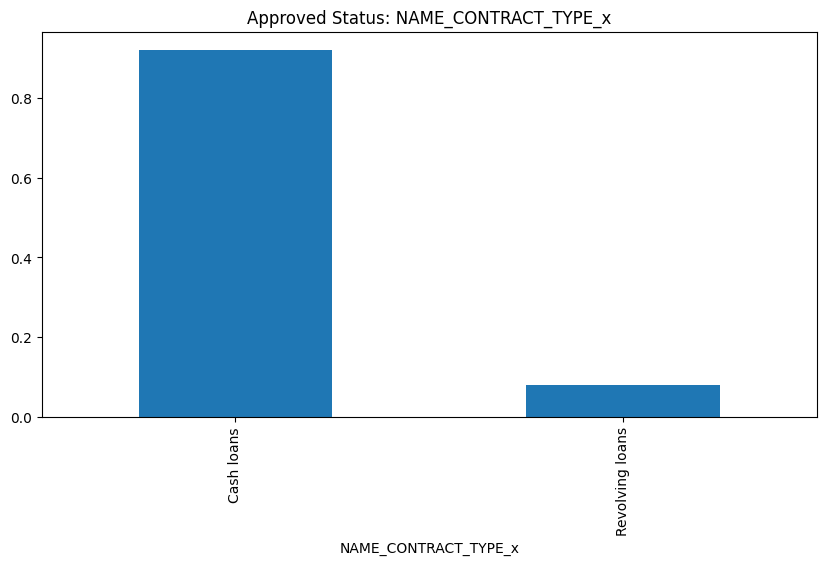

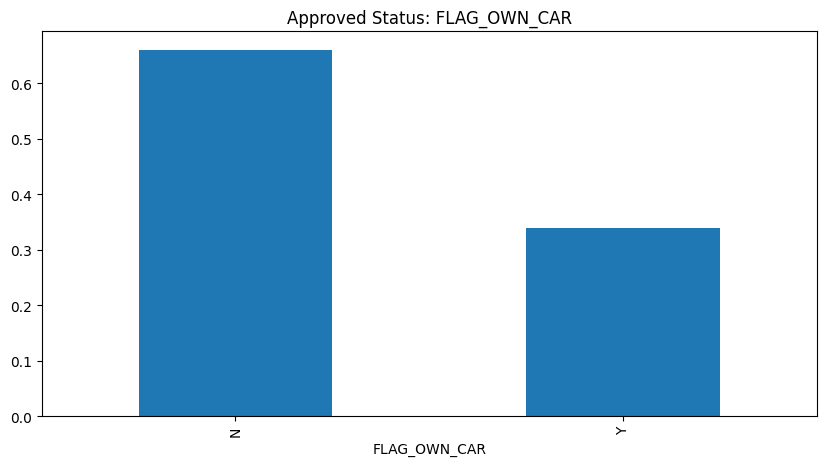

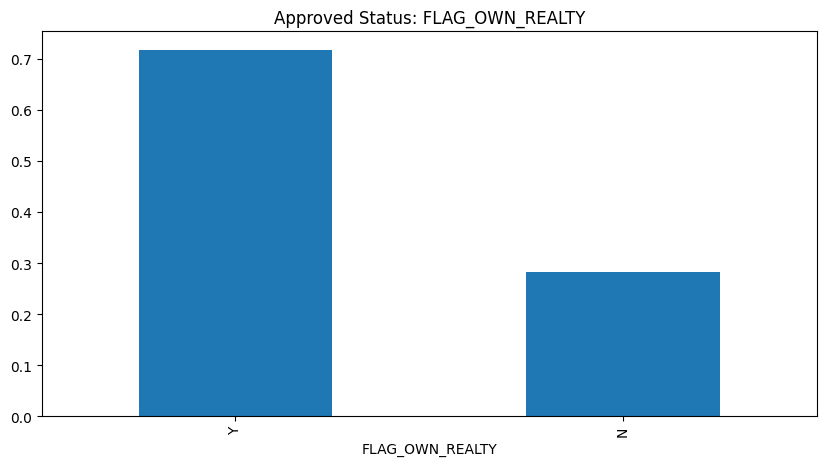

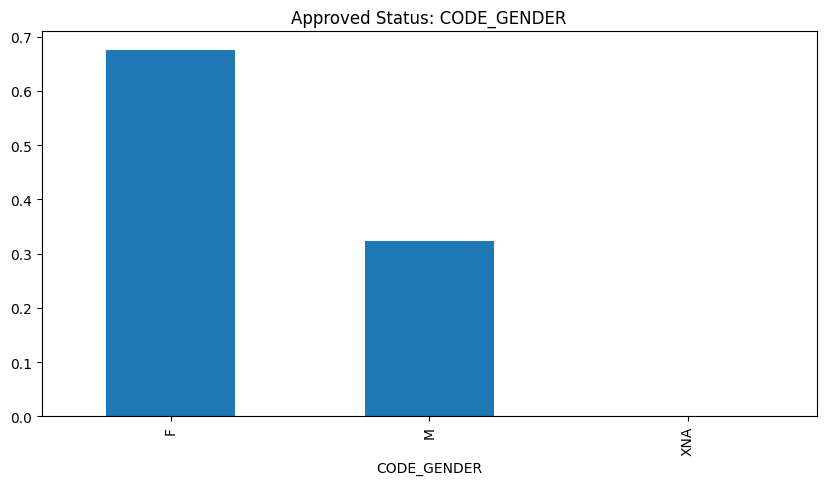

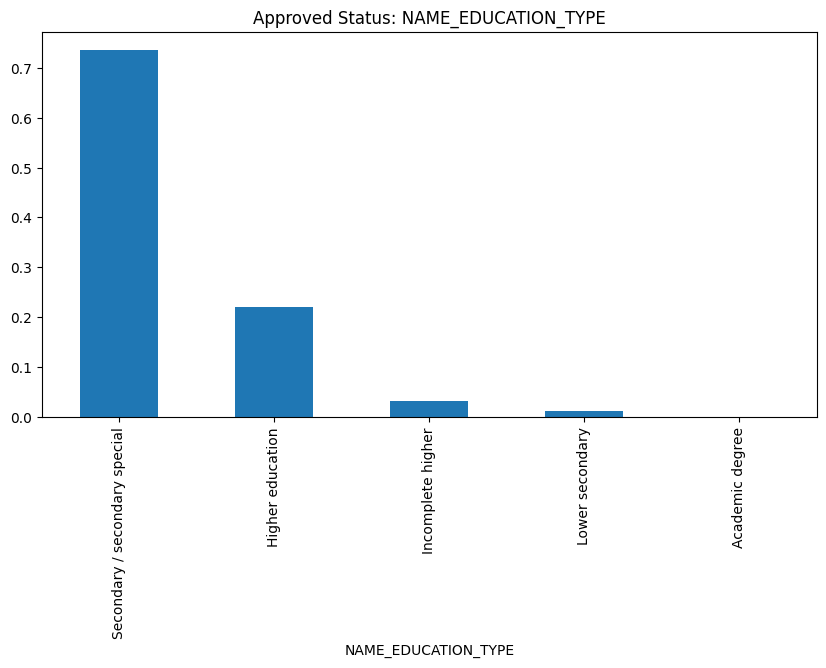

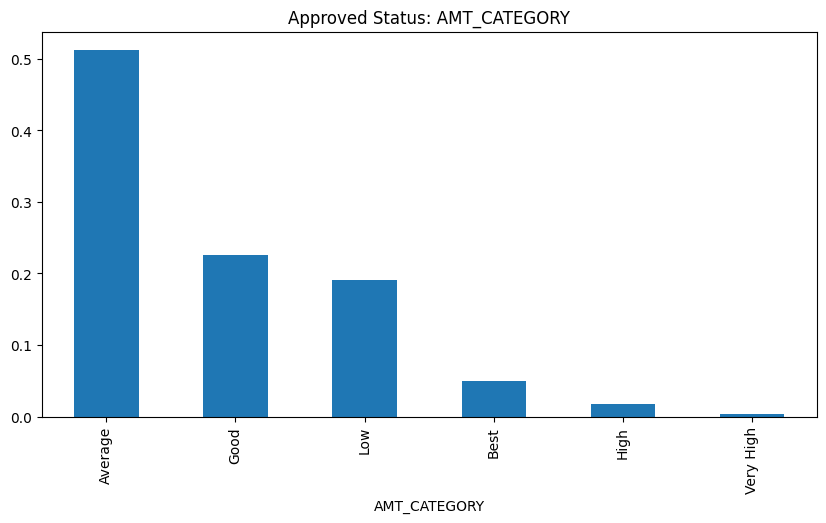

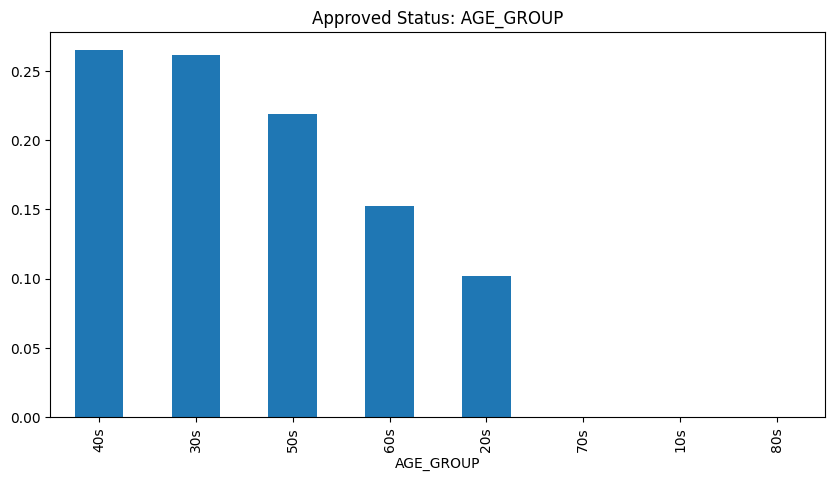

In [404]:
for i in conb_cat_col:
    plt.figure(figsize=(10,5))
    conb_app_df[i].value_counts(normalize=True).plot.bar()
    plt.title("Approved Status: "+ i)

### Univariate Analysis for few numerical columns in combined dataframe

In [405]:
conb_num_col= ['AMT_GOODS_PRICE_x',
                    'DAYS_LAST_PHONE_CHANGE',
                    'DAYS_ID_PUBLISH',
                    'AMT_INCOME_TOTAL',
                    'DAYS_EMPLOYED',
                    'DAYS_REGISTRATION',
                    'DAYS_BIRTH',
                    'AMT_CREDIT_x',
                    'AMT_ANNUITY_x'
                   ]

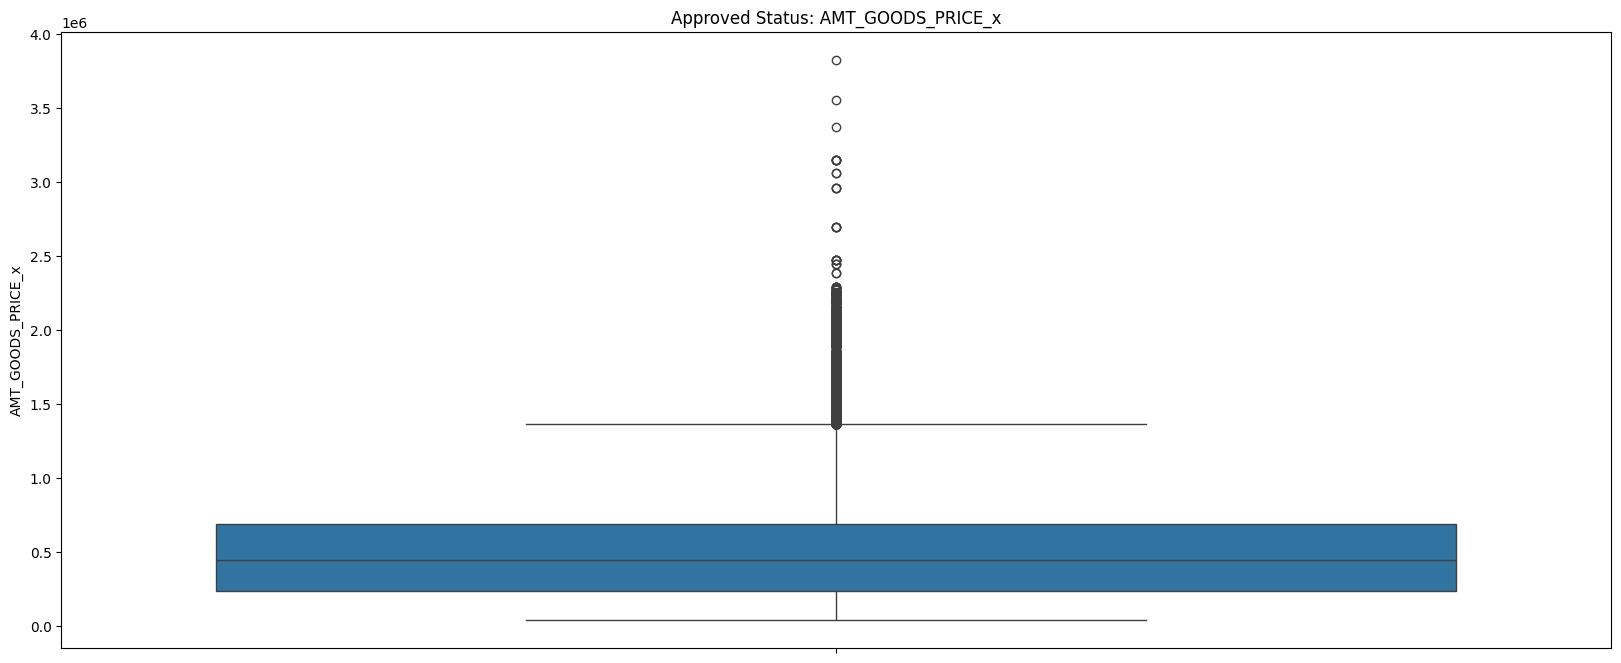

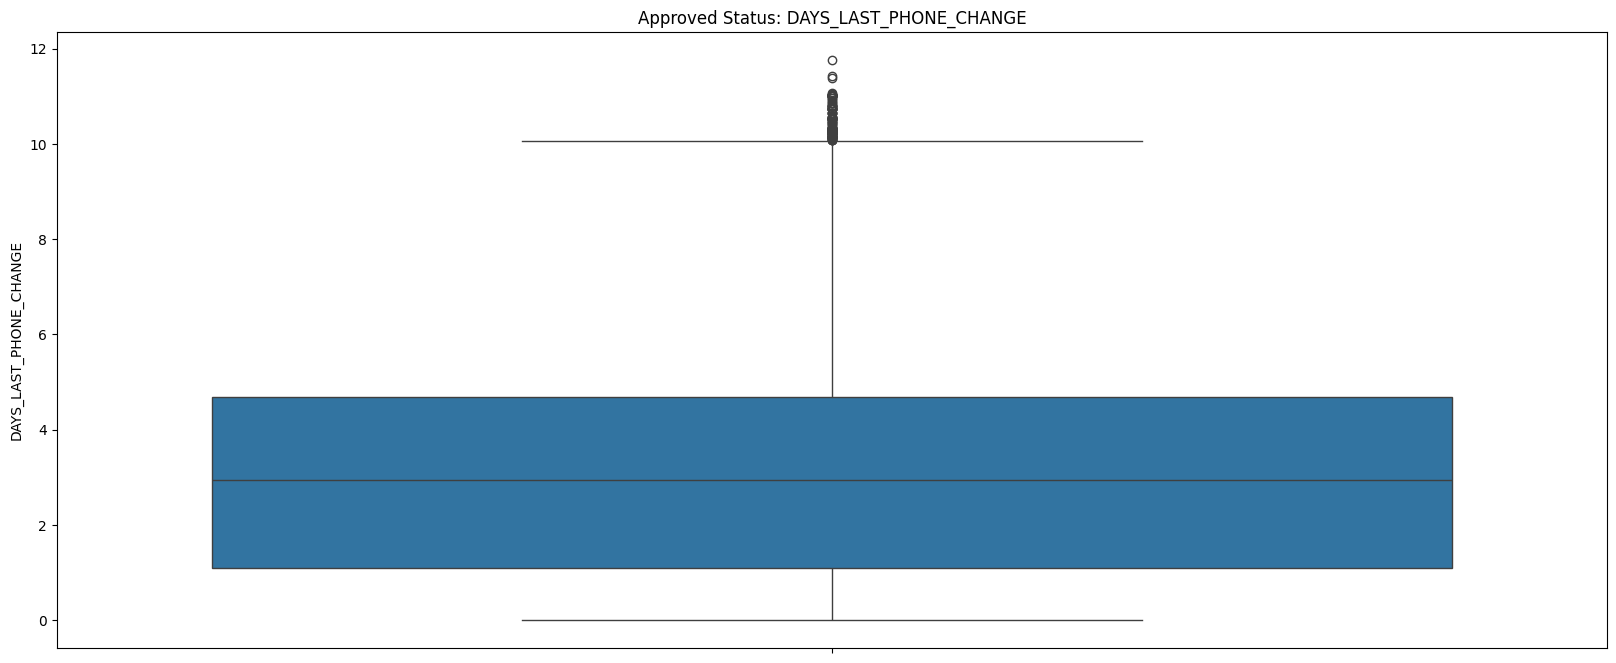

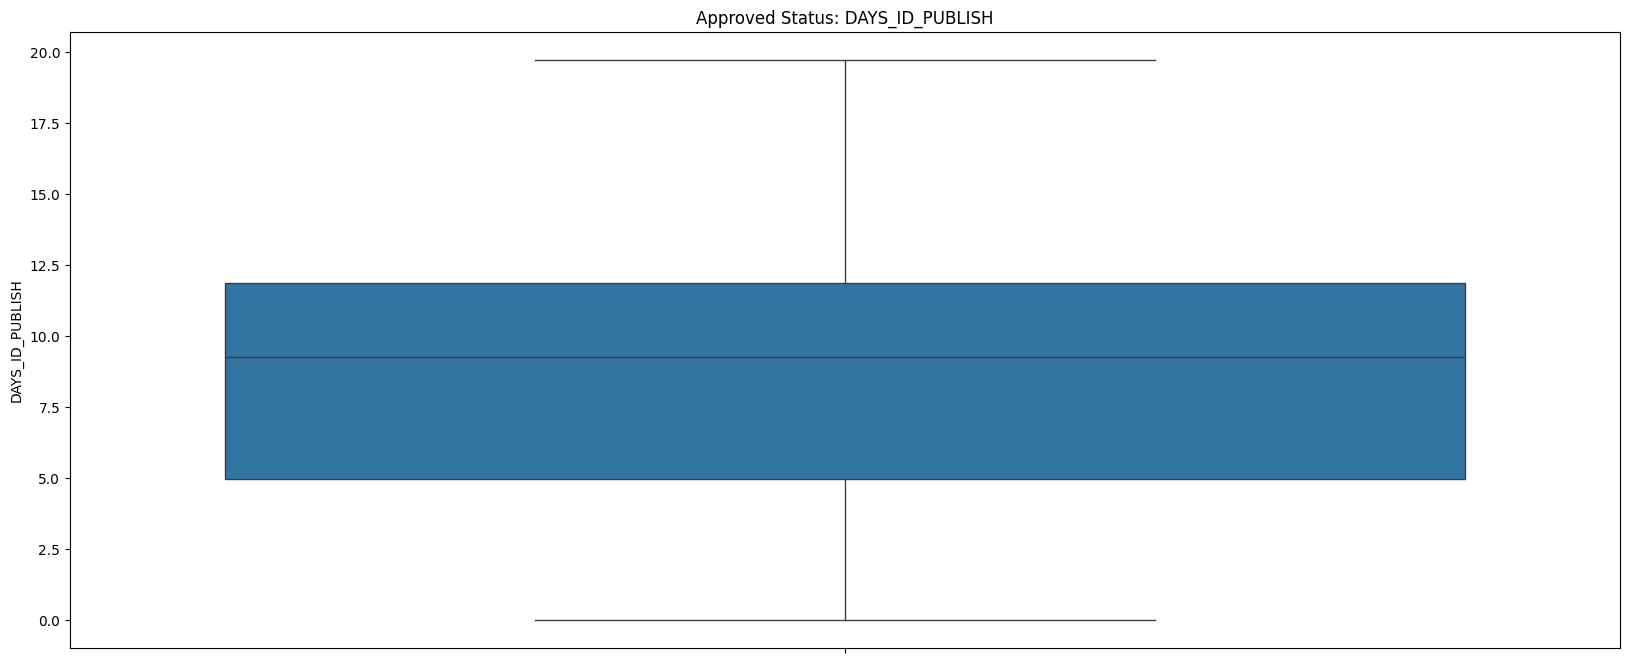

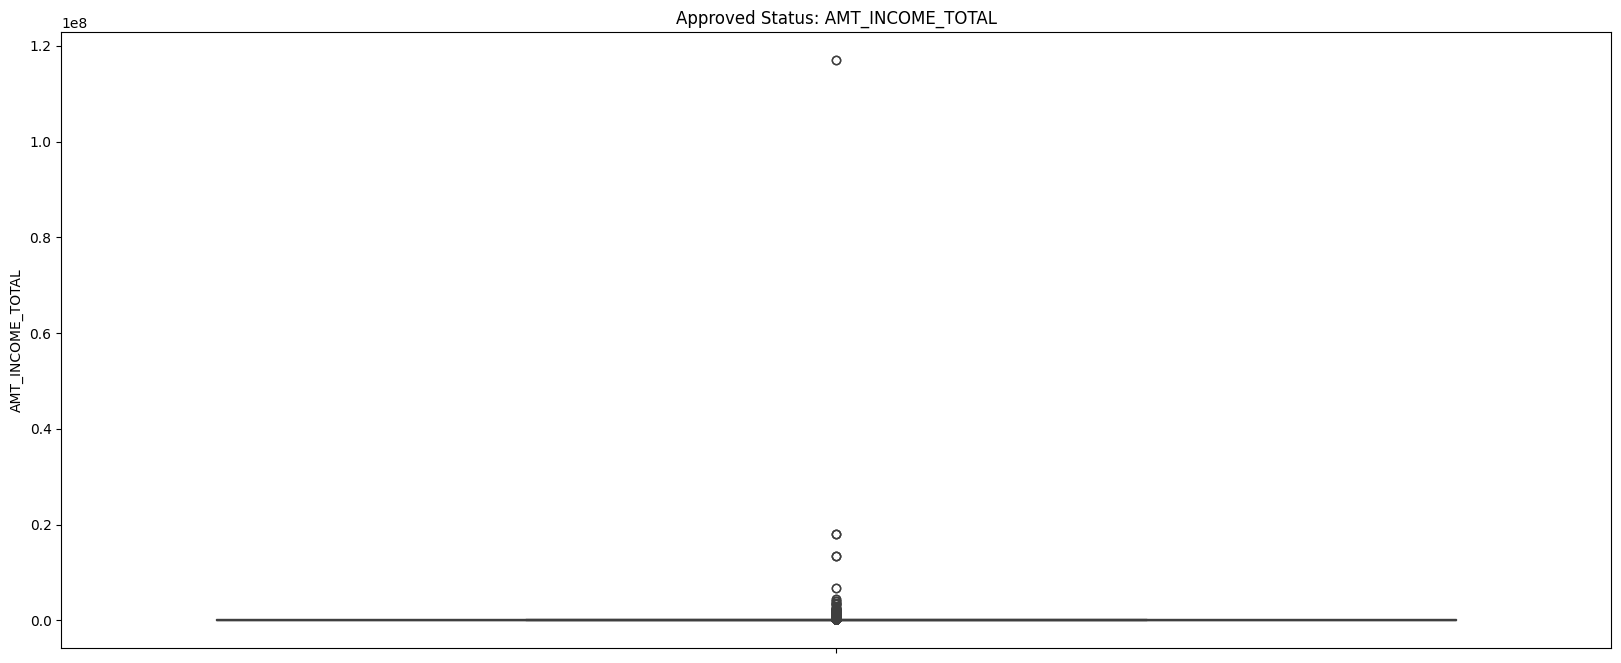

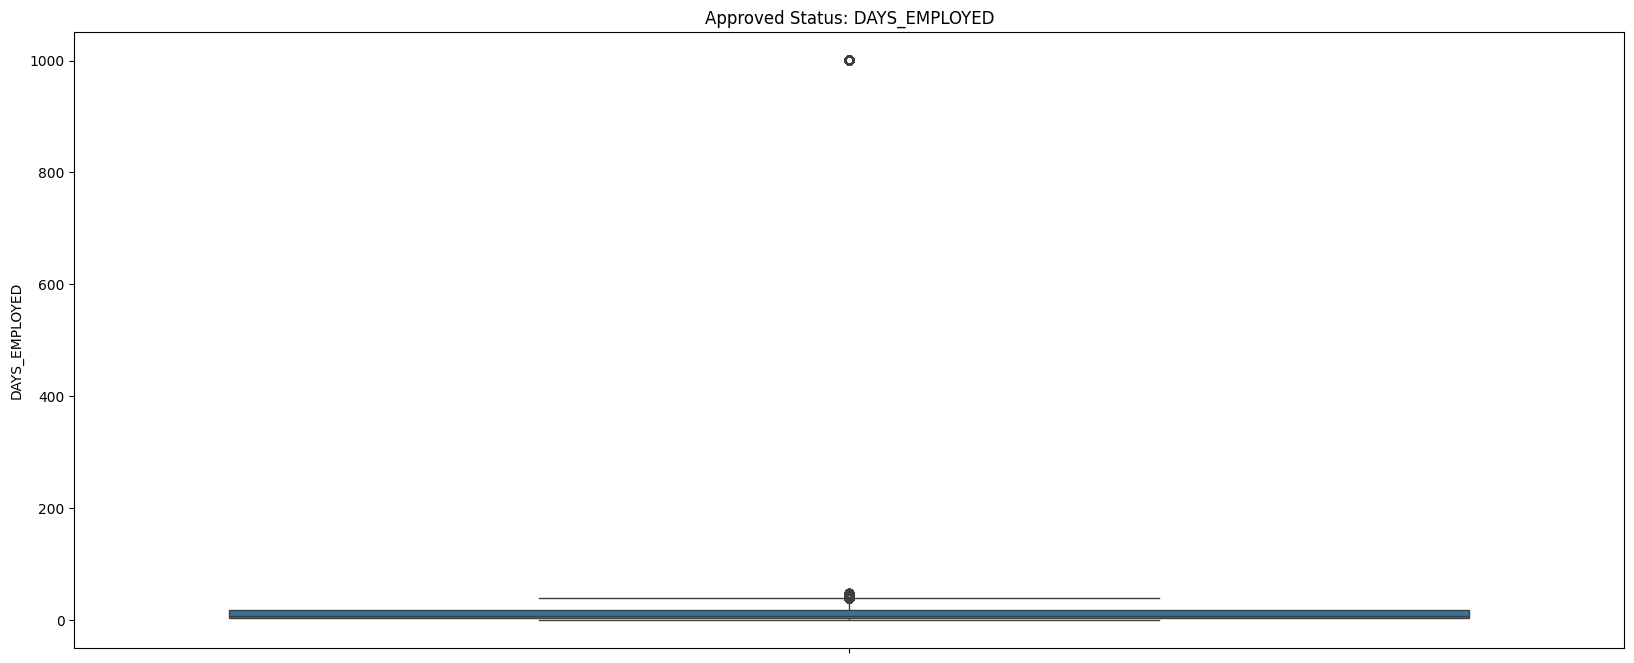

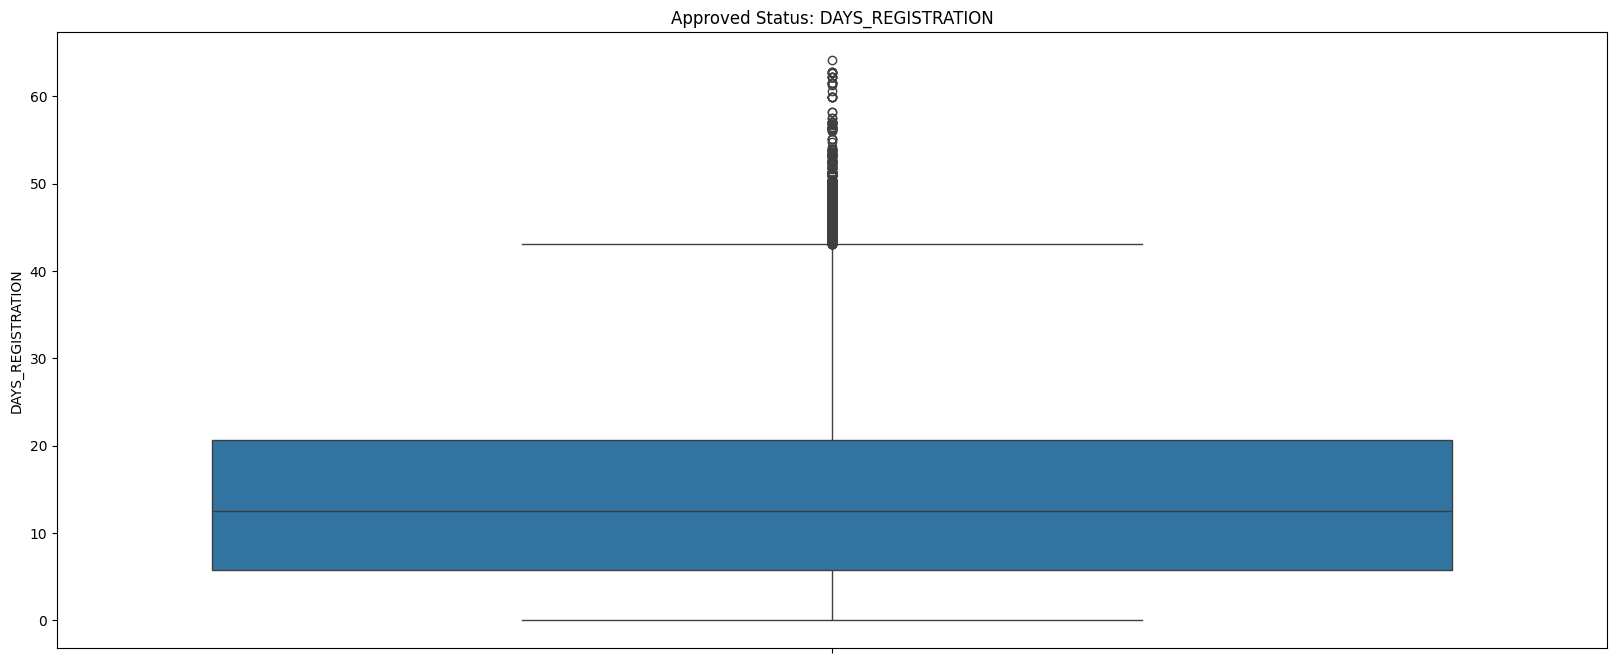

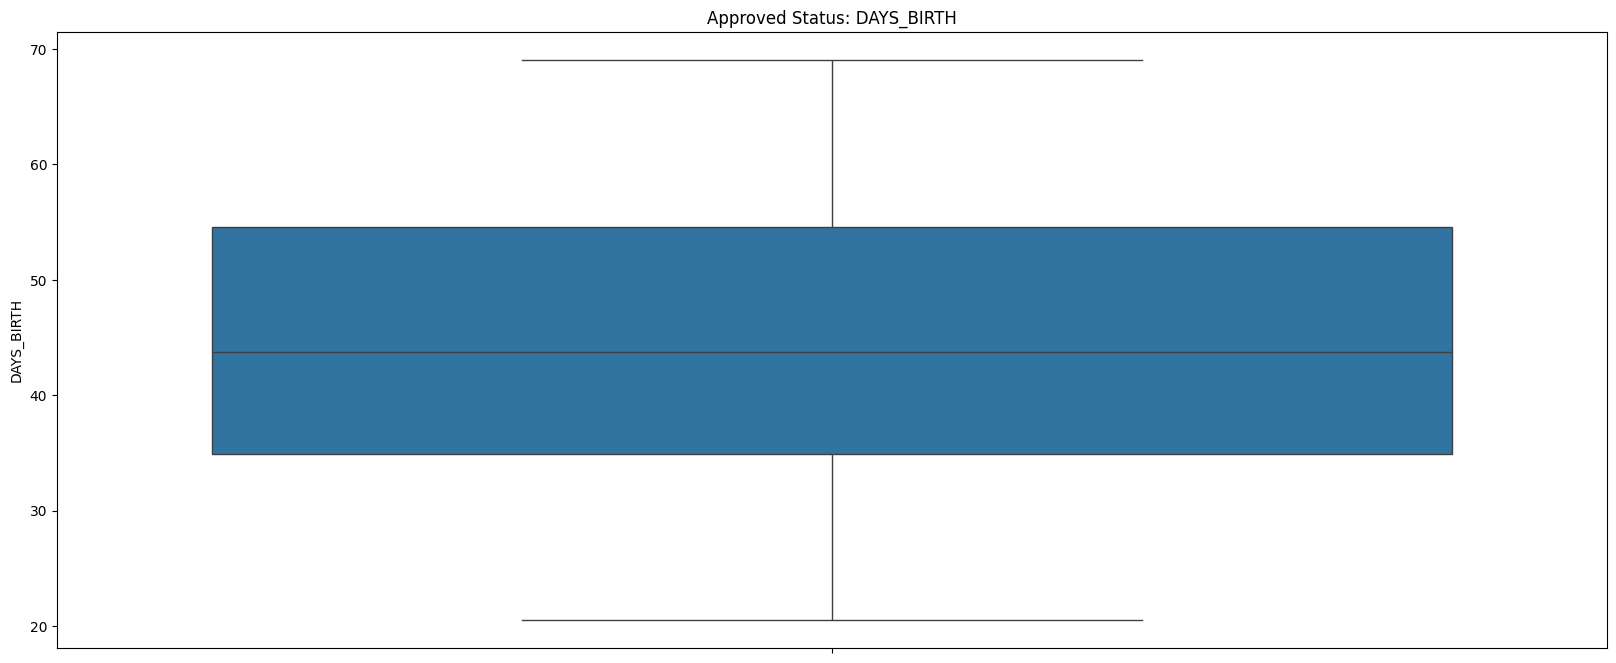

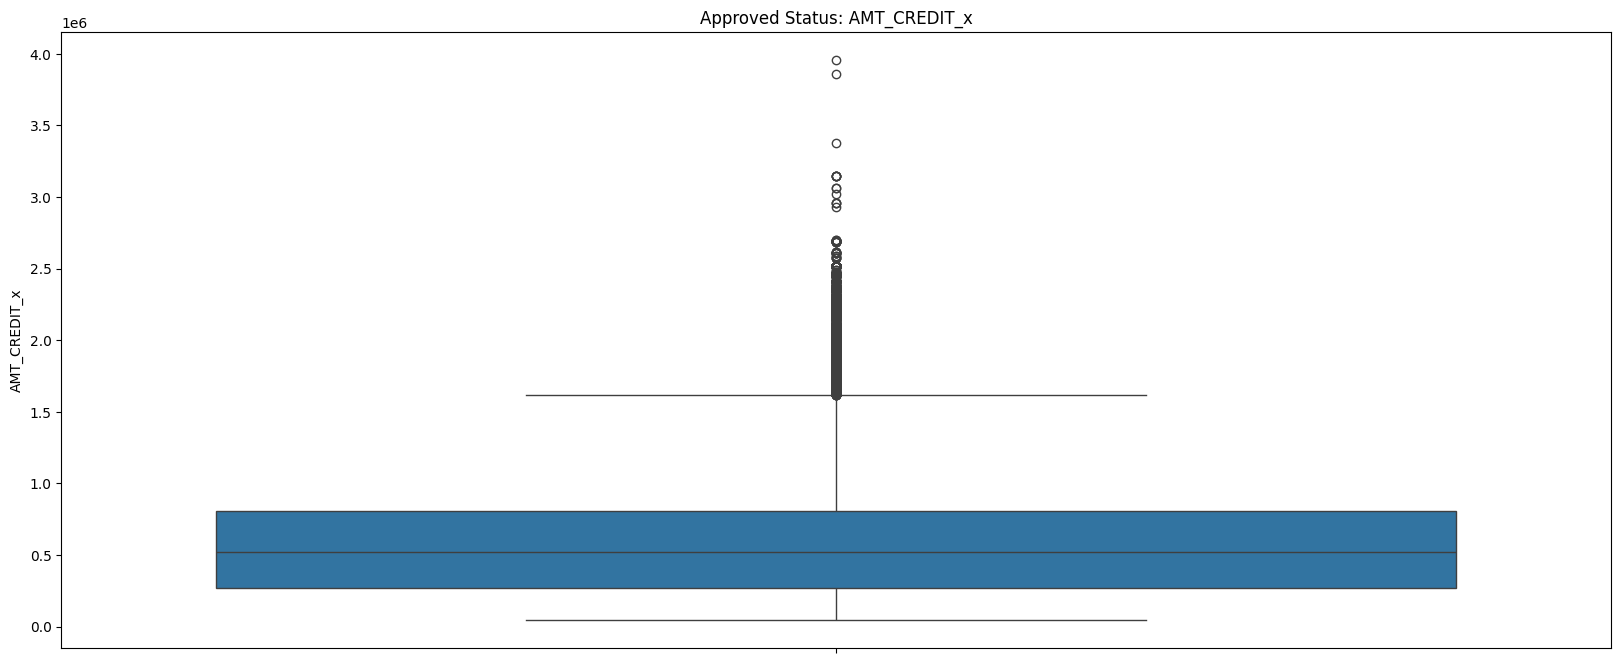

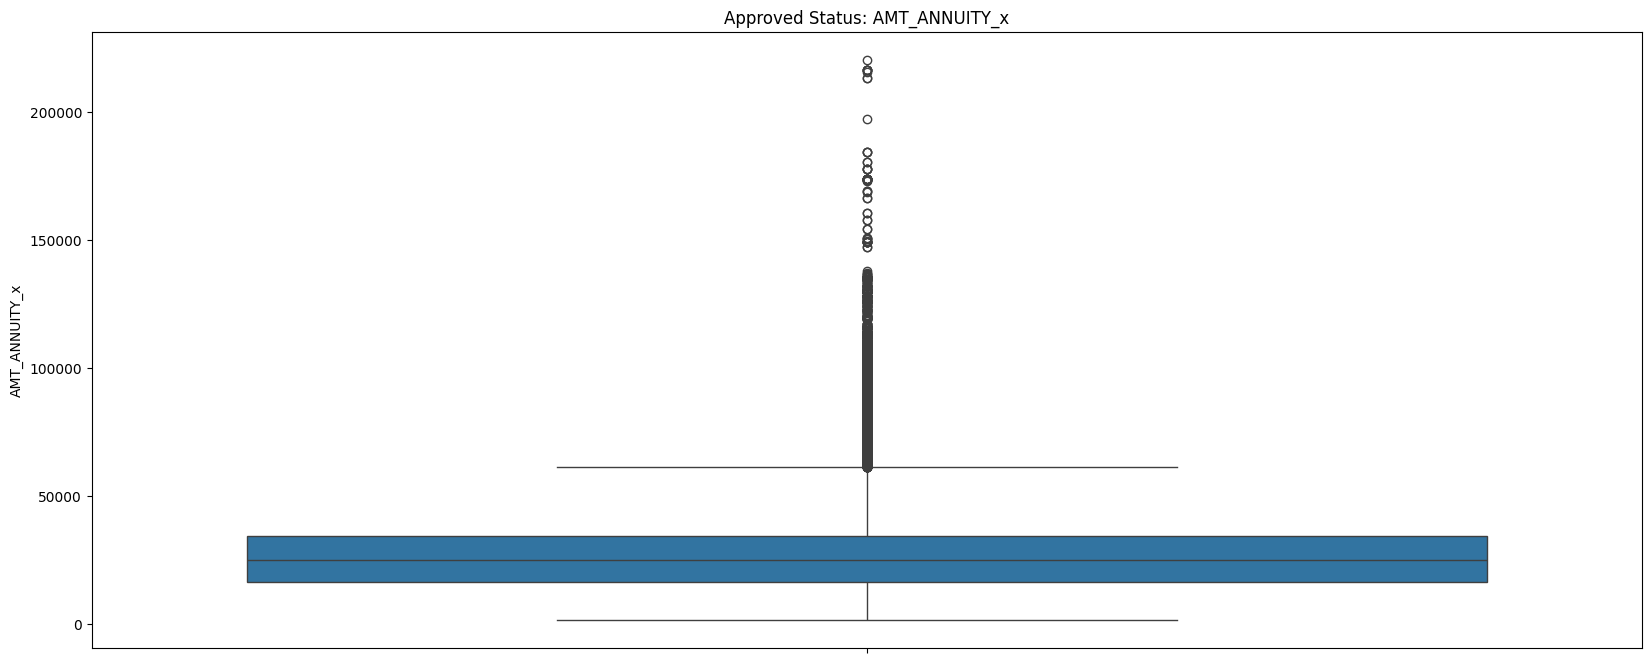

In [406]:
for i in conb_num_col:
    plt.figure(figsize=(20,8))
    sns.boxplot(conb_app_df[i])
    plt.title("Approved Status: "+i)

## Bivariate Analysis for few Categorical Variable of combined dataframe

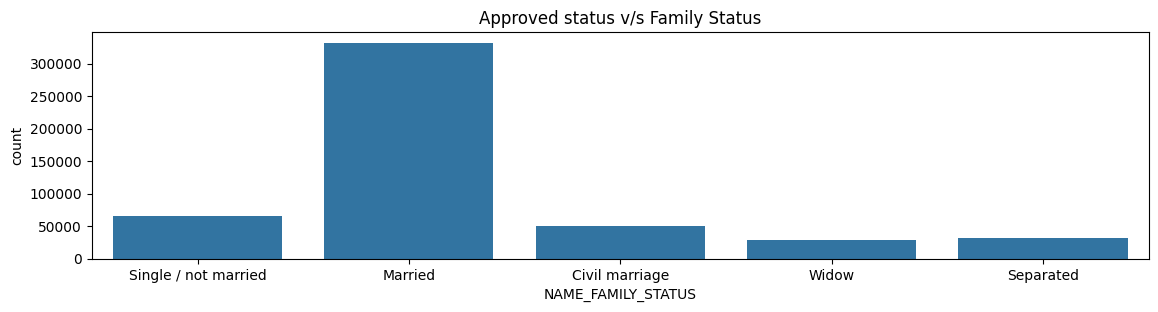

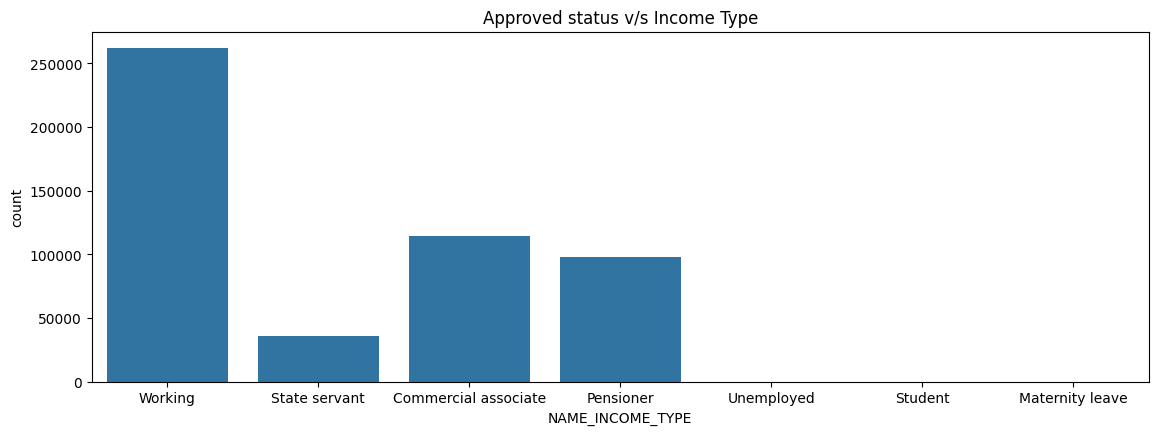

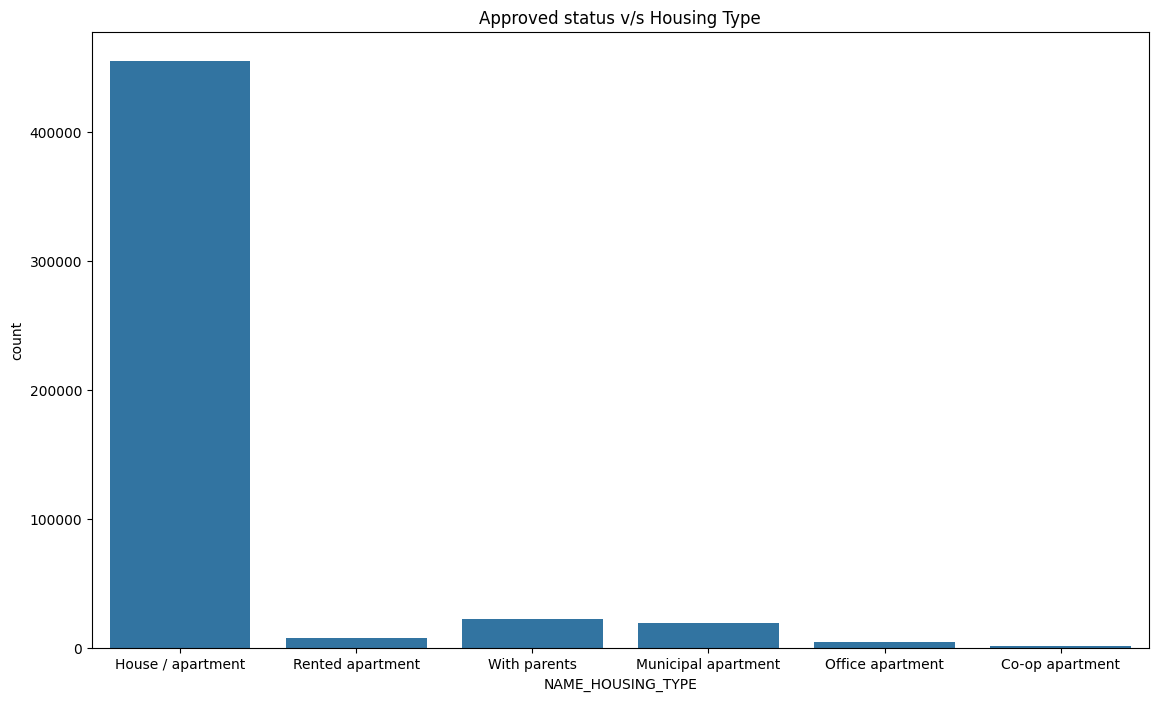

In [407]:
# People with approved status- First Variable

# 1. Second Variable : Family Status
plt.figure(figsize=(30,10))
plt.subplot(3,2,2)
sns.countplot(x = "NAME_FAMILY_STATUS", data = conb_app_df)
plt.title("Approved status v/s Family Status")
plt.show()

# 2. Second Variable : Income Type
plt.figure(figsize=(30,10))
plt.subplot(2,2,1)
sns.countplot(x = "NAME_INCOME_TYPE", data = conb_app_df)
plt.title("Approved status v/s Income Type")
plt.show()

# 3. Second Variable : Housing type
plt.figure(figsize=(30,8))
plt.subplot(1,2,1)
sns.countplot(x = "NAME_HOUSING_TYPE", data = conb_app_df)
plt.title("Approved status v/s Housing Type")
plt.show()


## Inference from the above Bivariant analysis for categorical data is as below:

#### 1. Approved status v/s Family Status: People who are married are more likely to get loan approved

#### 2. Approved status v/s Income Type: People who are working are more likely to get loan approved compared to students who are least likely to get loan approved

#### 3. Approved status v/s Housing_type: People who own House/apartment are more likely to get loan approved then compared to rented appartments/ co-op apartment types

# Bivariant analysis for Numerical Data.

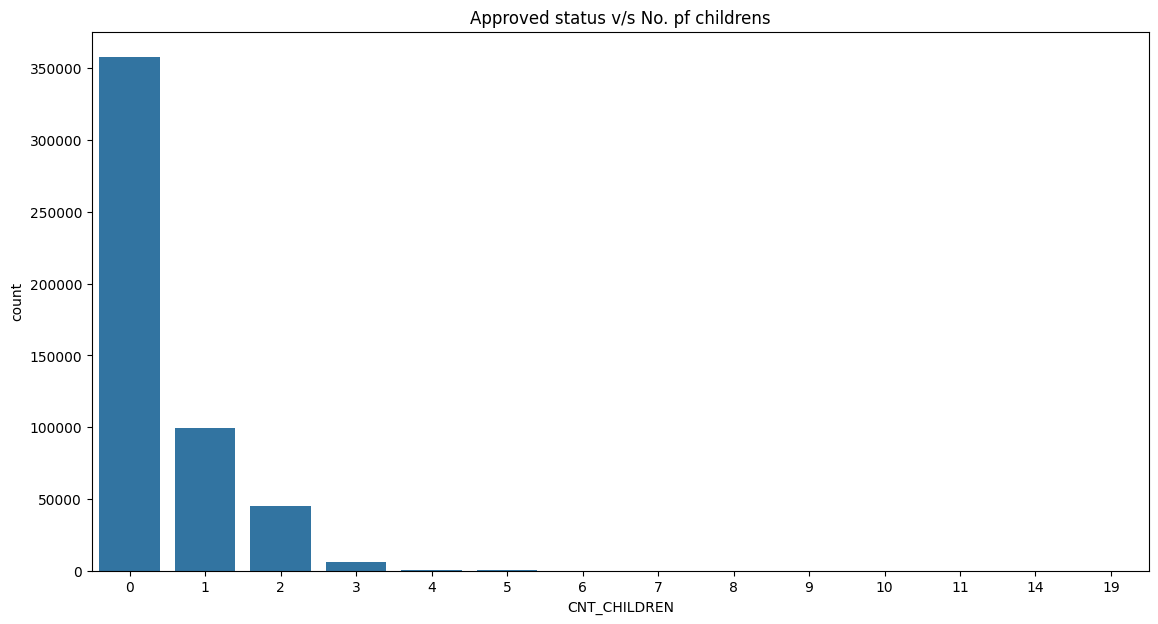

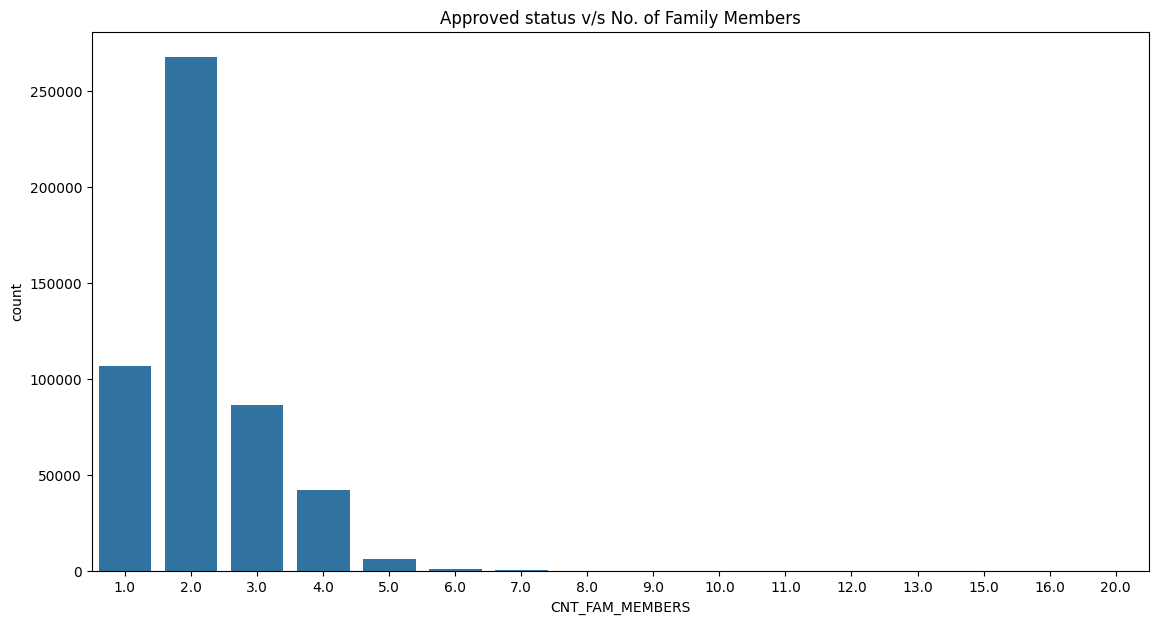

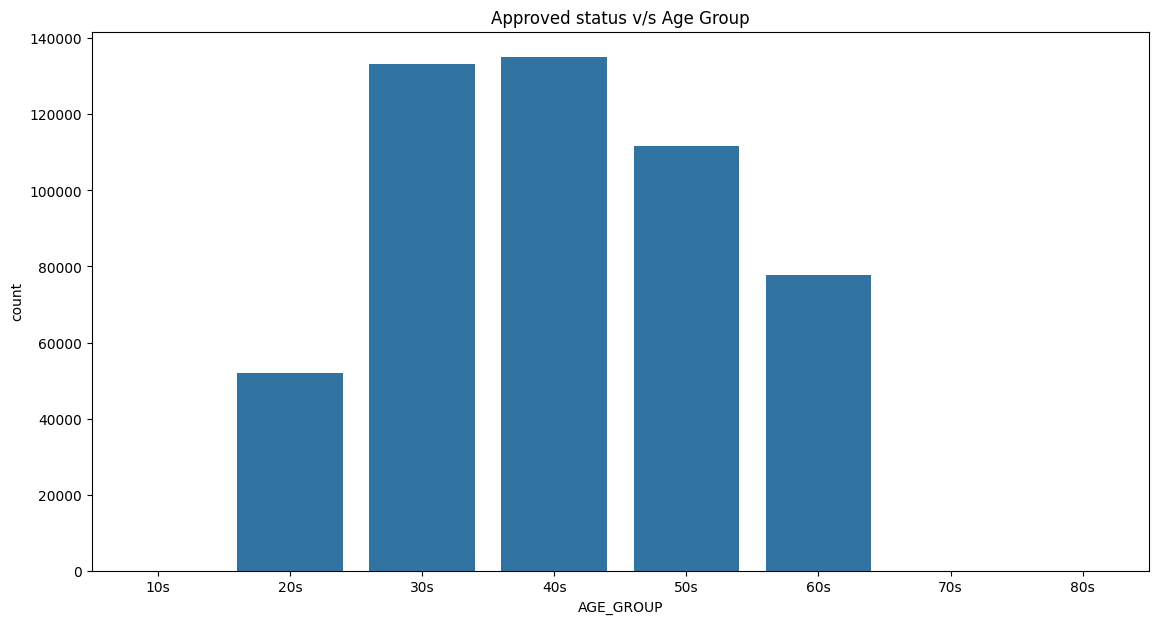

In [408]:
# People with approved status and who are non-defaulters - First Variable

# 1. Second Variable : CNT_CHILDREN
plt.figure(figsize=(30,7))
plt.subplot(1,2,1)
sns.countplot(x = "CNT_CHILDREN", data = conb_app_df)
plt.title("Approved status v/s No. pf childrens")
plt.show()

# 2. Second Variable : CNT_FAM_MEMBERS
plt.figure(figsize=(30,7))
plt.subplot(1,2,1)
sns.countplot(x = "CNT_FAM_MEMBERS", data = conb_app_df)
plt.title("Approved status v/s No. of Family Members")
plt.show()

# 3. Second Variable : Age
plt.figure(figsize=(30,7))
plt.subplot(1,2,1)
sns.countplot(x="AGE_GROUP", data = conb_app_df)
plt.title("Approved status v/s Age Group")
plt.show()


## Inference from the above Bivariant analysis for numerical data is as below:

#### 1. Approved status v/s No. of children: People with 0 children are more likely to get loan approved

#### 2. Approved status v/s No. of family members: If the number of people in a family is 2 they are more likely to get loan approved.

#### 3. Approved status v/s Age: People with age in between 30 -50 years are more likely to get loan approved compared to the people in 20s and 60s

## 5.2.2 Doing analysis on People with Contract Status as Reused

### Preparing data for people with refused status

In [409]:
# People with Refused status in combined dataframe
combined_refused_df = comb_df[comb_df.NAME_CONTRACT_STATUS == 'Refused']
combined_refused_df

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
18          100011       0           Cash loans           F            N   
43          100027       0           Cash loans           F            N   
46          100030       0           Cash loans           F            N   
47          100030       0           Cash loans           F            N   
48          100030       0           Cash loans           F            N   
...            ...     ...                  ...         ...          ...   
811717      456243       0           Cash loans           F            N   
811732      456247       0           Cash loans           F            N   
811734      456249       0           Cash loans           F            N   
811745      456255       0           Cash loans           F            N   
811746      456255       0           Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
18                   Y             0          112500.0     1019610.0   
43                   Y             0           83250.0      239850.0   
46                   Y             0           90000.0      225000.0   
47                   Y             0           90000.0      225000.0   
48                   Y             0           90000.0      225000.0   
...                ...           ...               ...           ...   
811717               Y             0           81000.0      225000.0   
811732               Y             0          112500.0      345510.0   
811734               Y             0          112500.0      225000.0   
811745               N             0          157500.0      675000.0   
811746               N             0          157500.0      675000.0   

        AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x  \
18            33826.5           913500.0          Children   
43            23850.0           225000.0     Unaccompanied   
46            11074.5           225000.0     Unaccompanied   
47            11074.5           225000.0     Unaccompanied   
48            11074.5           225000.0     Unaccompanied   
...               ...                ...               ...   
811717        12694.5           225000.0     Unaccompanied   
811732        17770.5           247500.0     Unaccompanied   
811734        22050.0           225000.0     Unaccompanied   
811745        49117.5           675000.0     Unaccompanied   
811746        49117.5           675000.0     Unaccompanied   

            NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
18                 Pensioner  Secondary / secondary special   
43                 Pensioner  Secondary / secondary special   
46                   Working  Secondary / secondary special   
47                   Working  Secondary / secondary special   
48                   Working  Secondary / secondary special   
...                      ...                            ...   
811717  Commercial associate  Secondary / secondary special   
811732  Commercial associate               Higher education   
811734             Pensioner  Secondary / secondary special   
811745  Commercial associate               Higher education   
811746  Commercial associate               Higher education   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
18                   Married  House / apartment       55.07        1000.67   
43                   Married  House / apartment       68.02        1000.67   
46                   Married  House / apartment       52.97           9.57   
47                   Married  House / apartment       52.97           9.57   
48                   Married  House / apartment       52.97           9.57   
...                      ...                ...         ...            ...   
811717               Married  House / apartment       46.54          23.82   
811732  Single / not married  House / apartment       32.52           1.09   
811734  Single / not marri

### Univariate Analysis for few categorical columns in combined dataframe

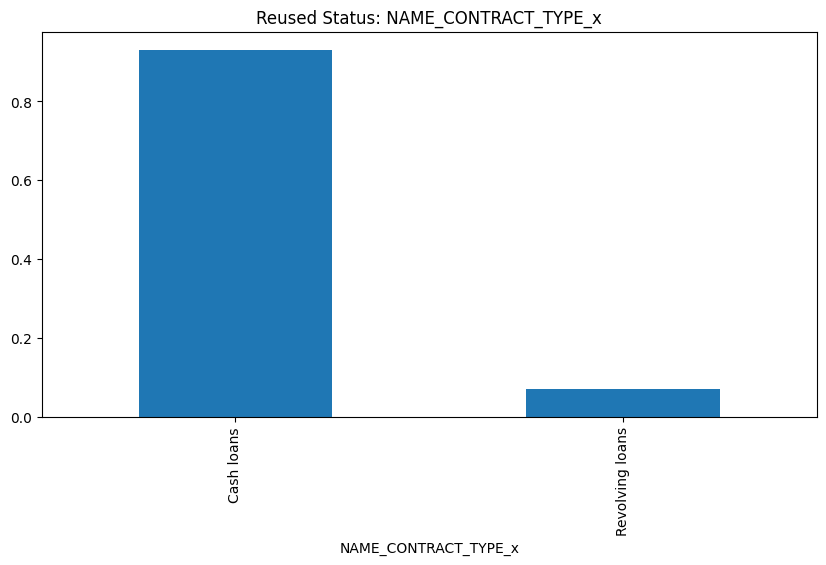

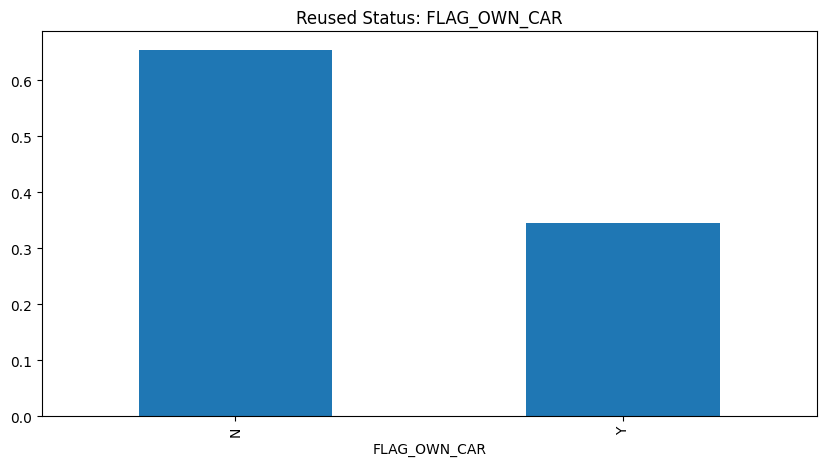

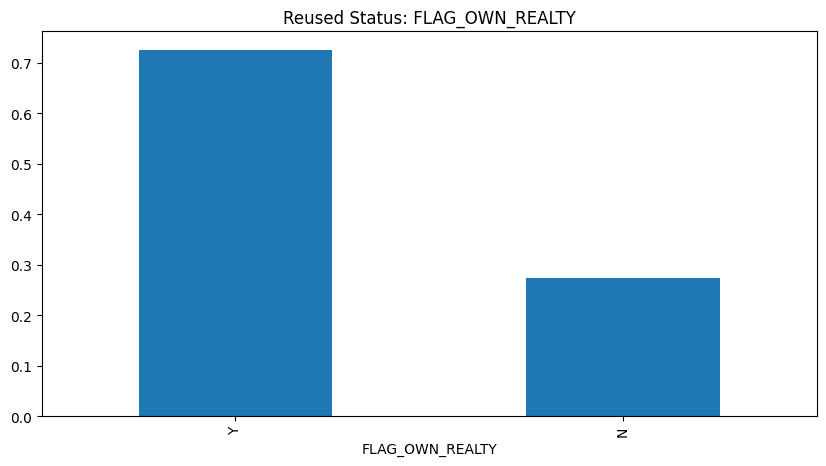

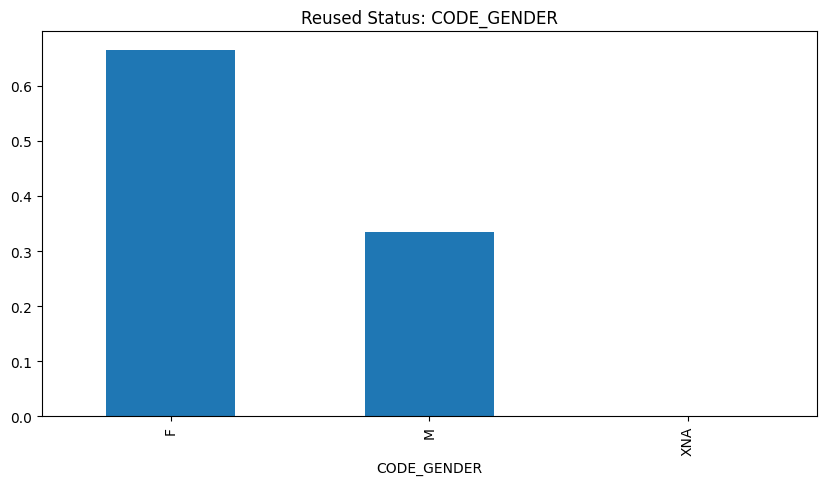

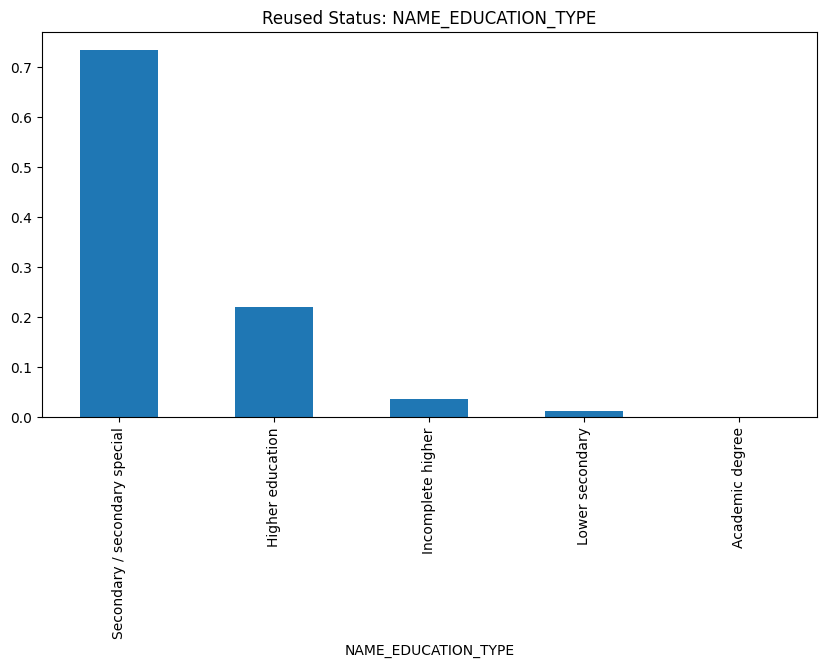

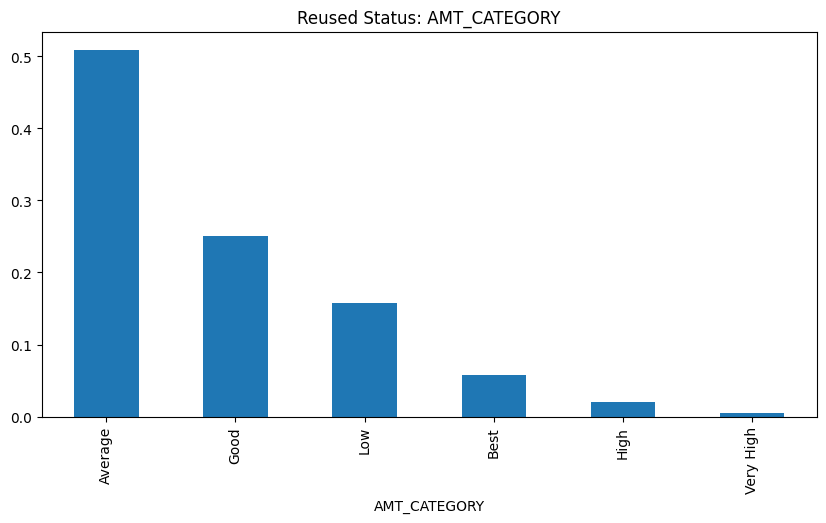

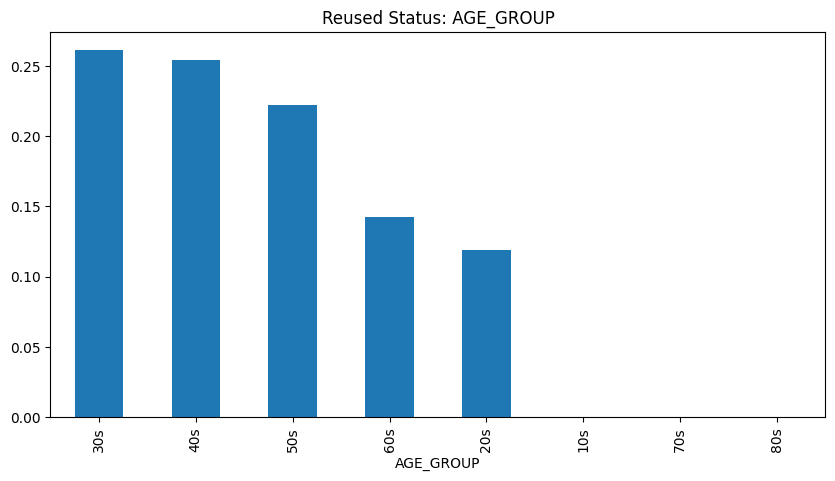

In [410]:
for i in conb_cat_col:
    plt.figure(figsize=(10,5))
    combined_refused_df[i].value_counts(normalize=True).plot.bar()
    plt.title("Reused Status: "+ i)

### Univariate Analysis for few numerical columns in combined dataframe

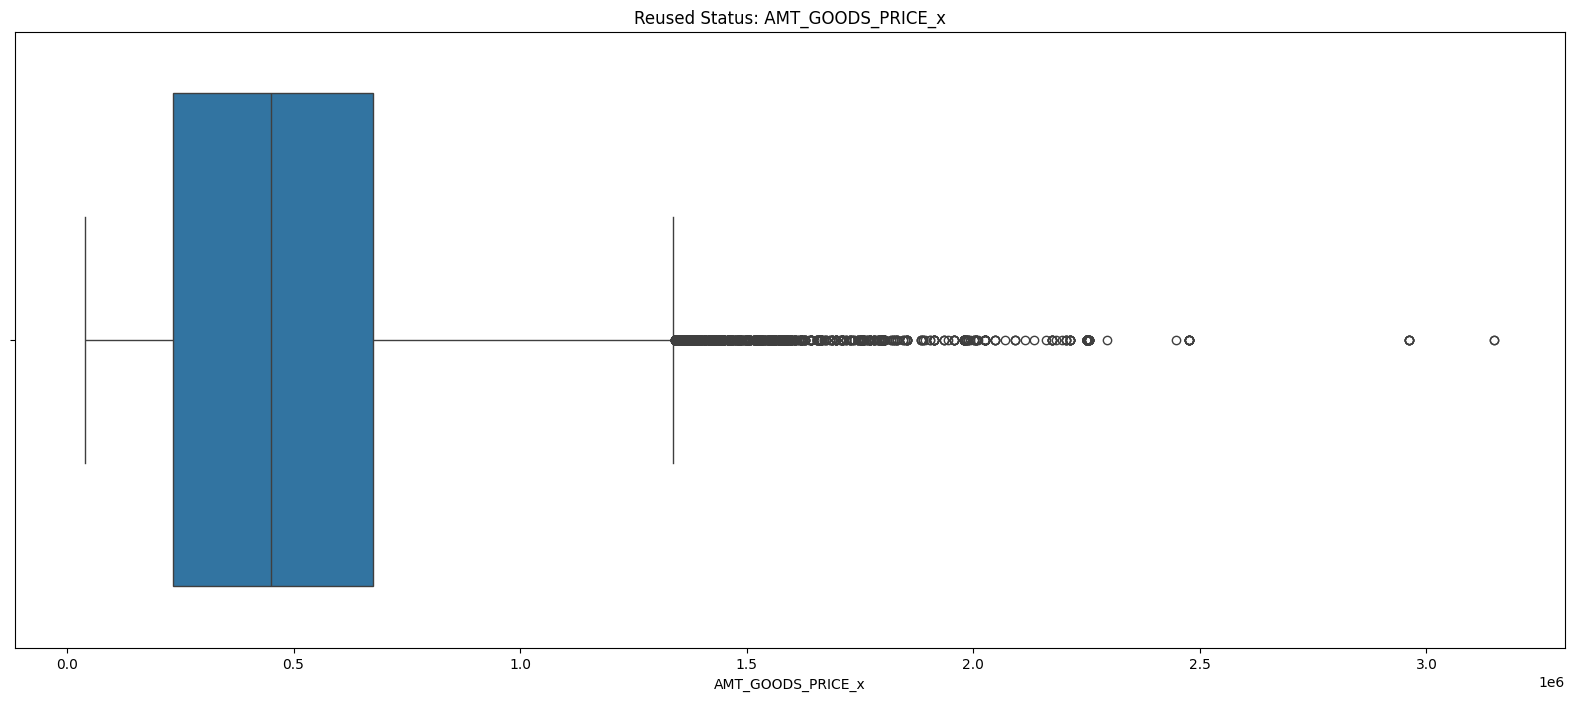

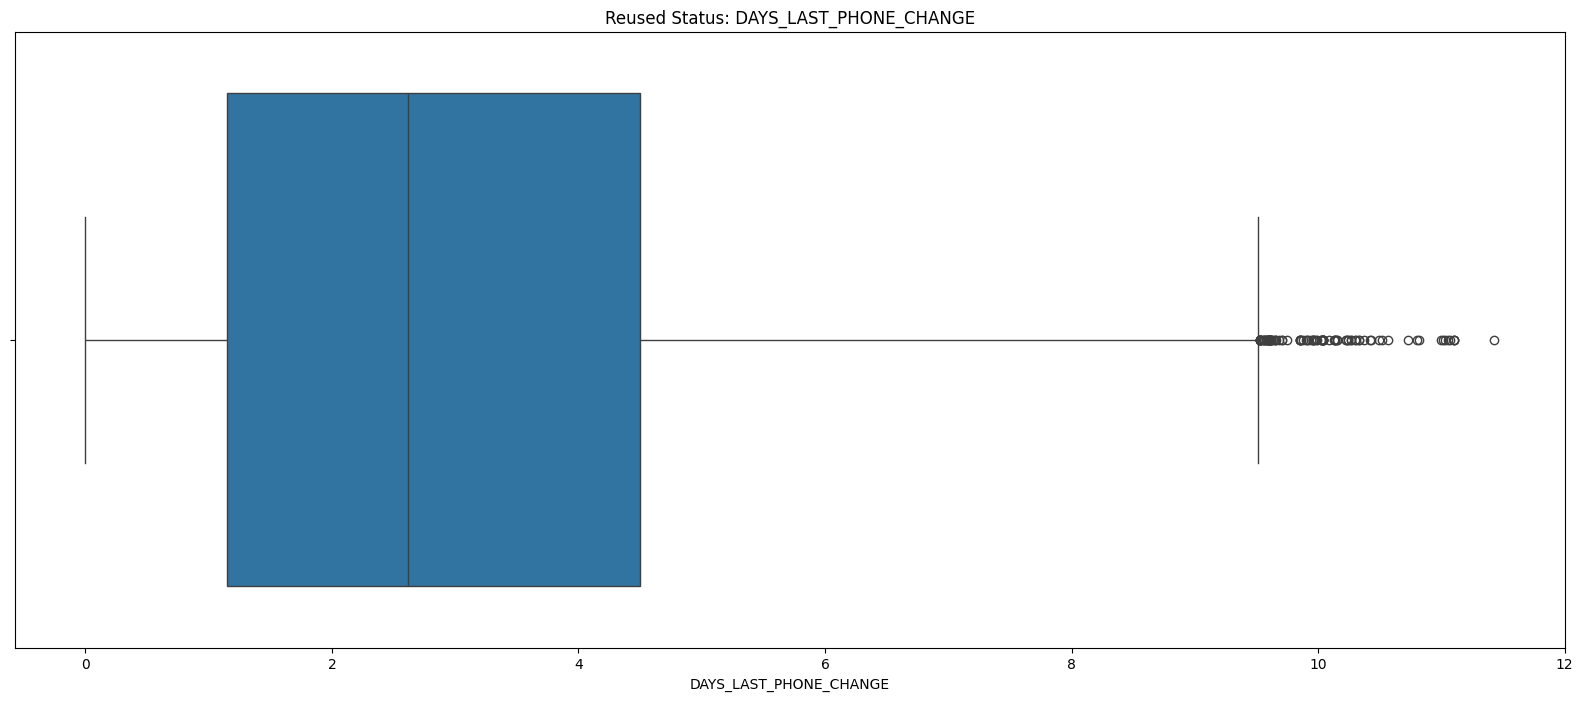

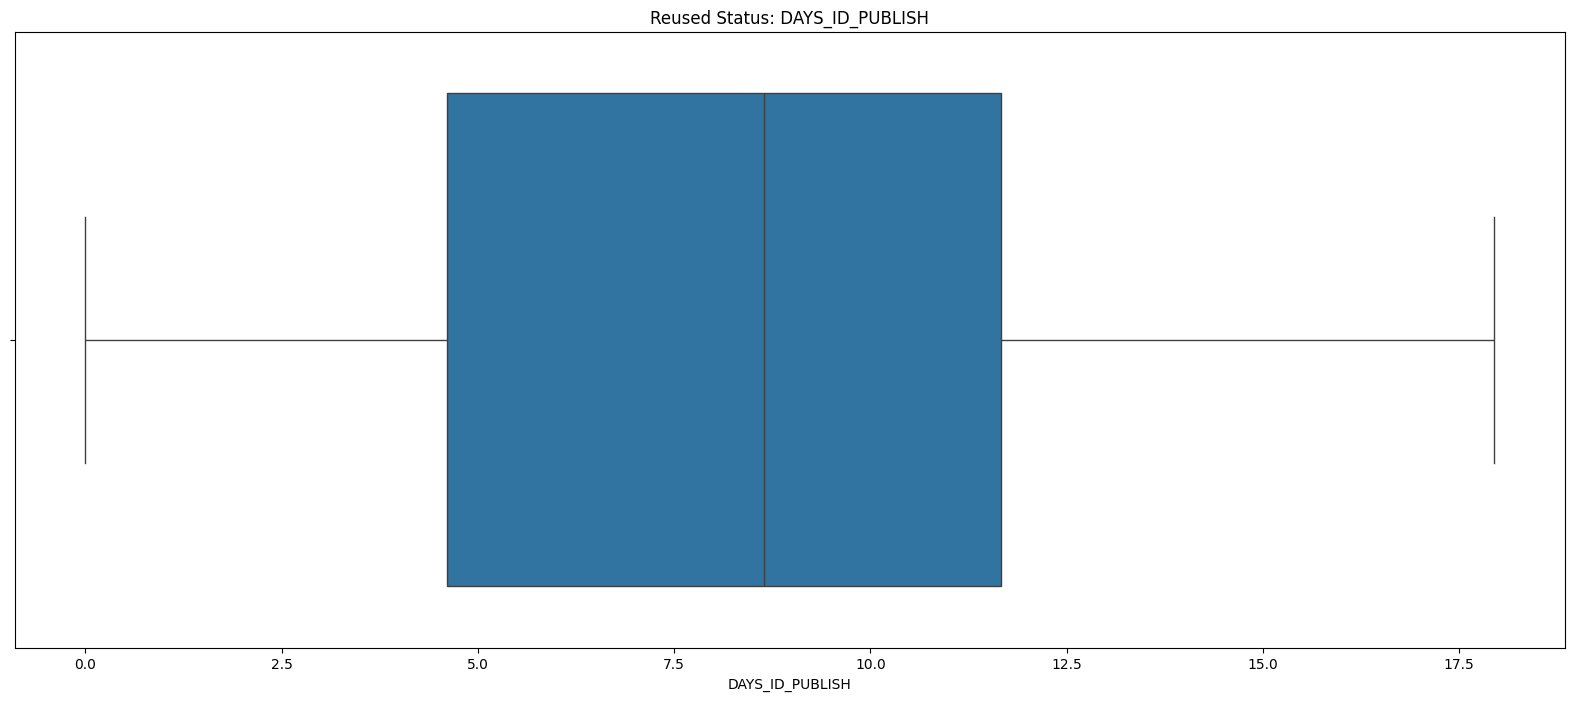

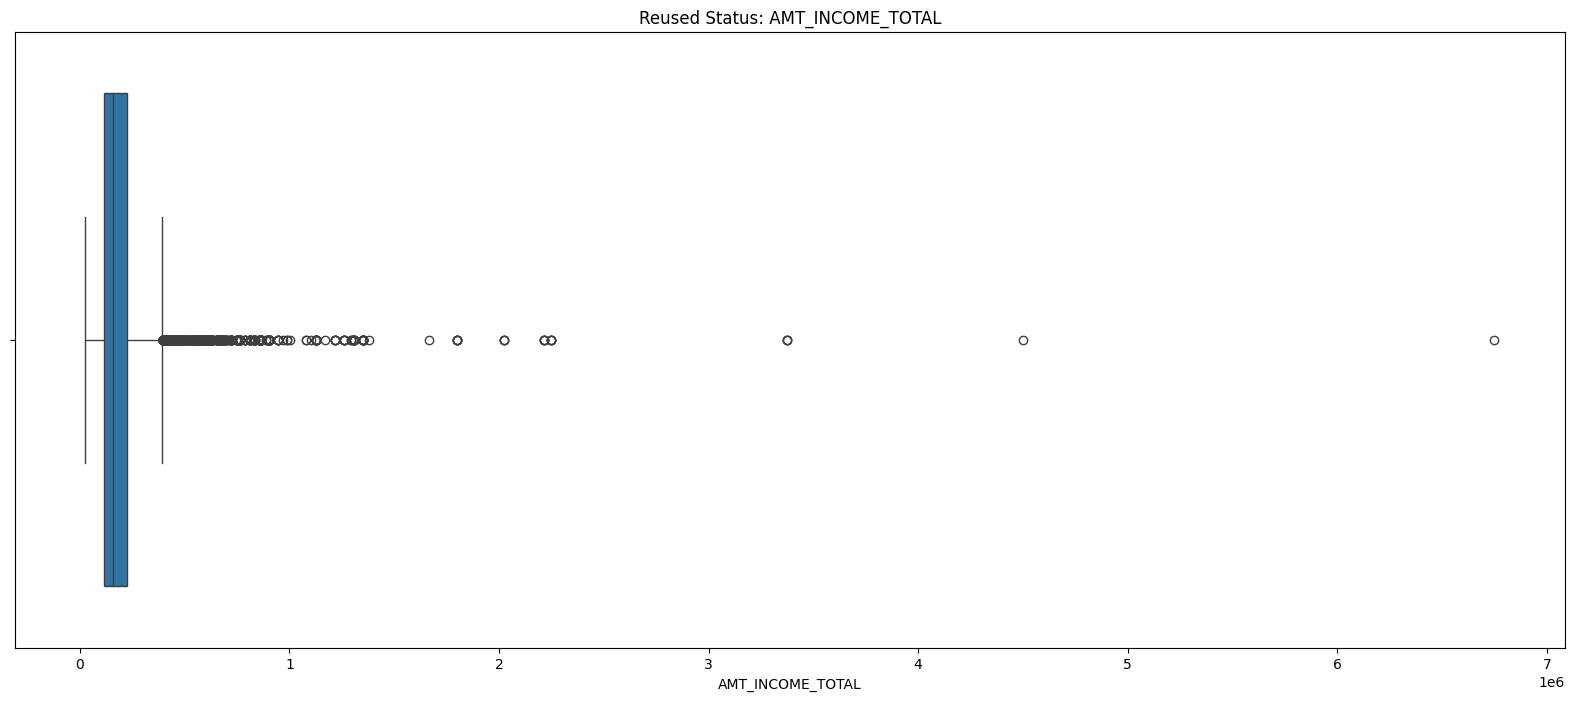

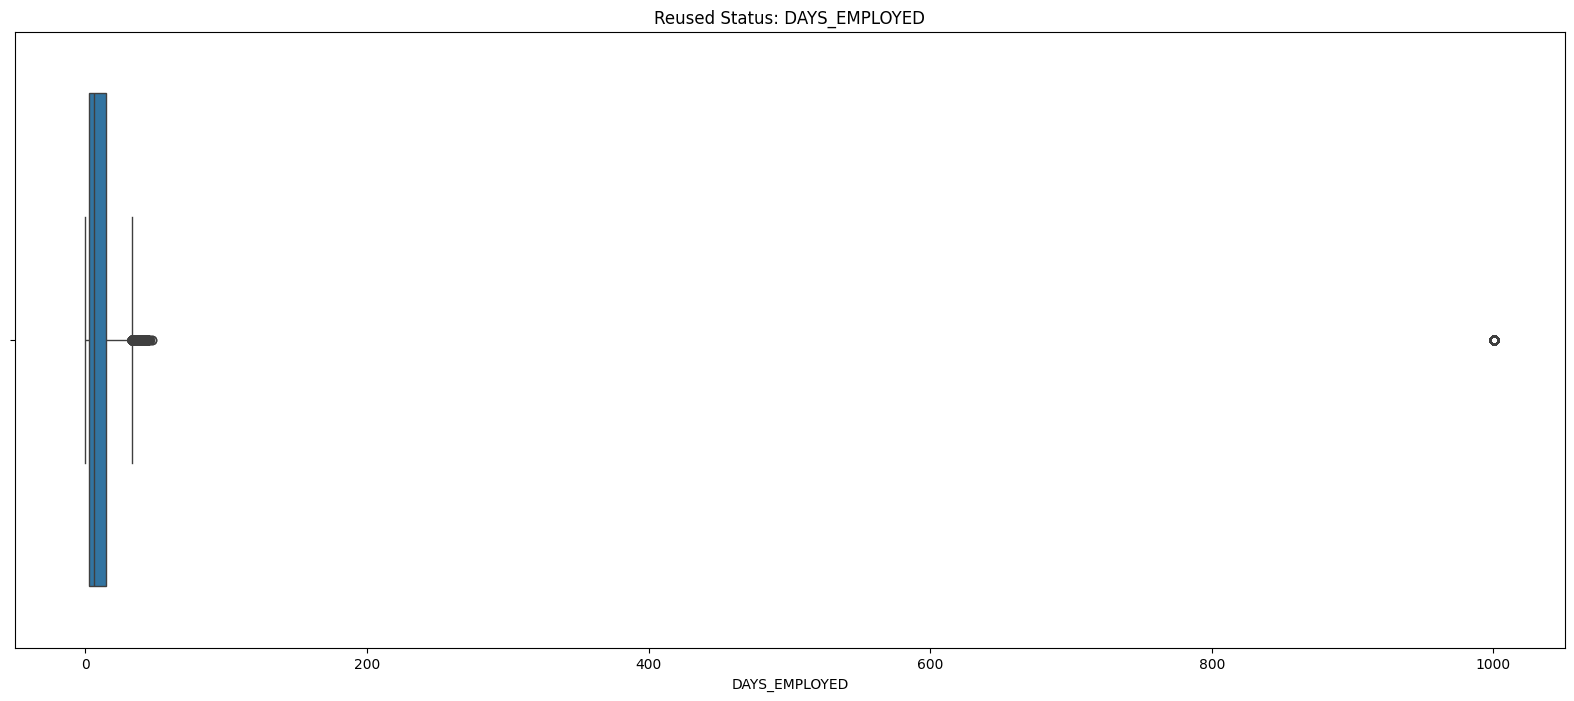

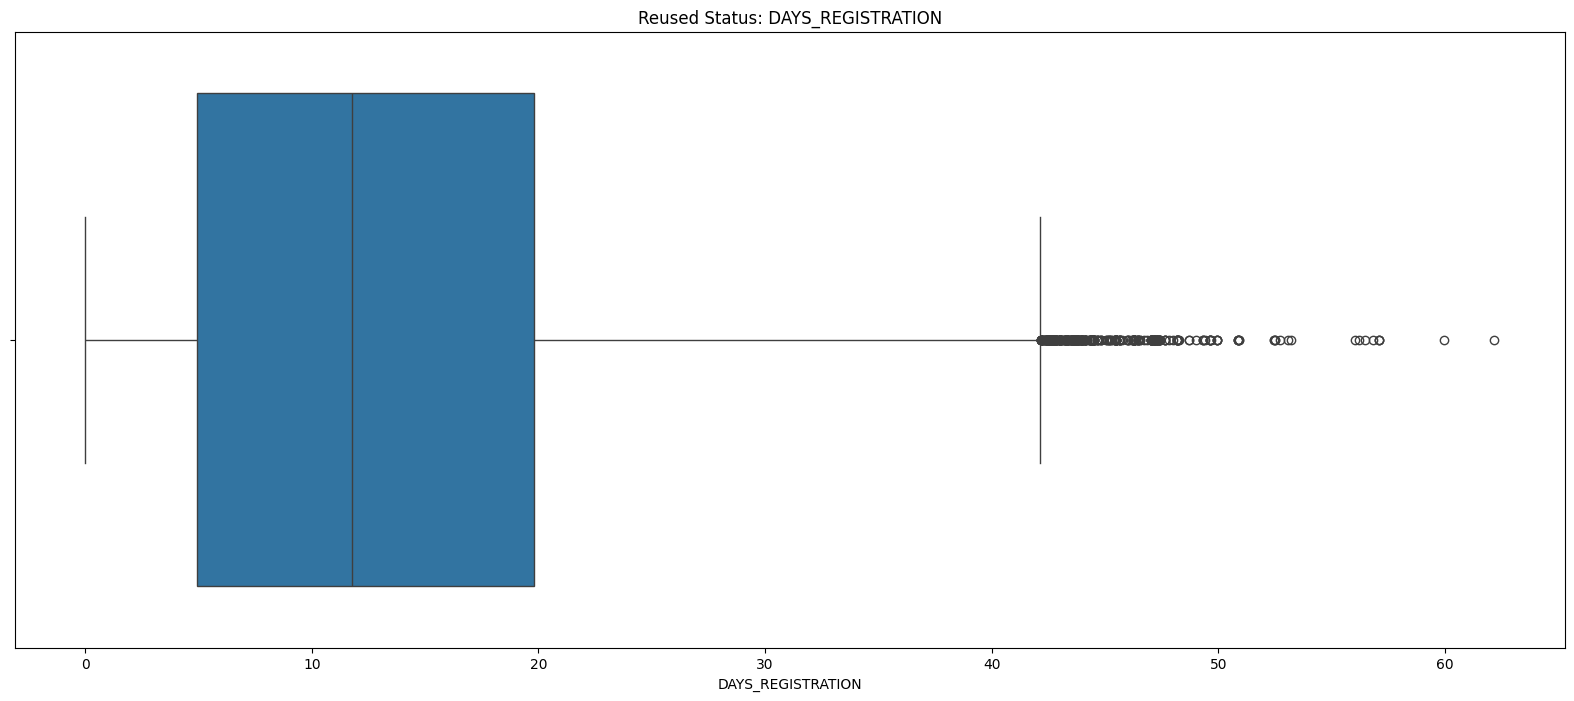

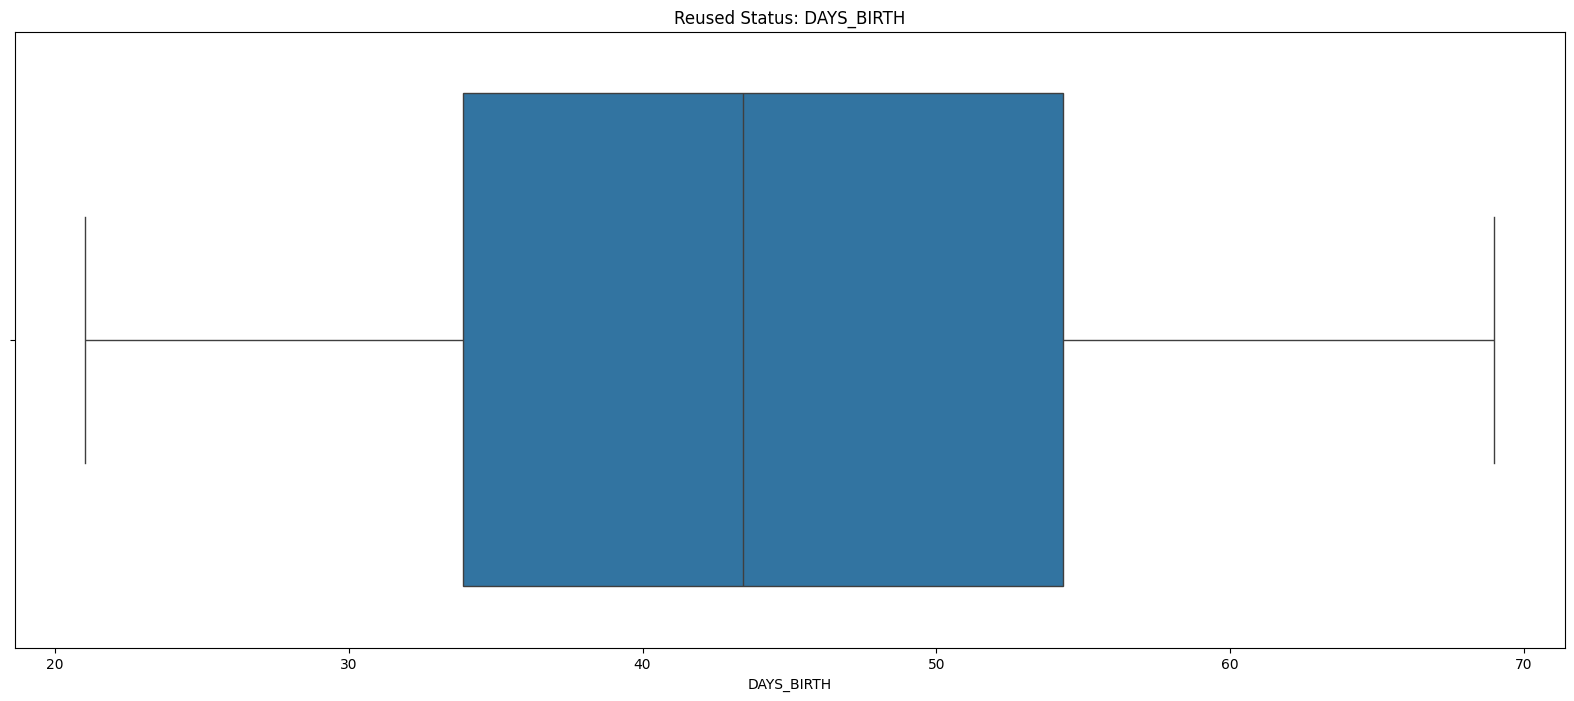

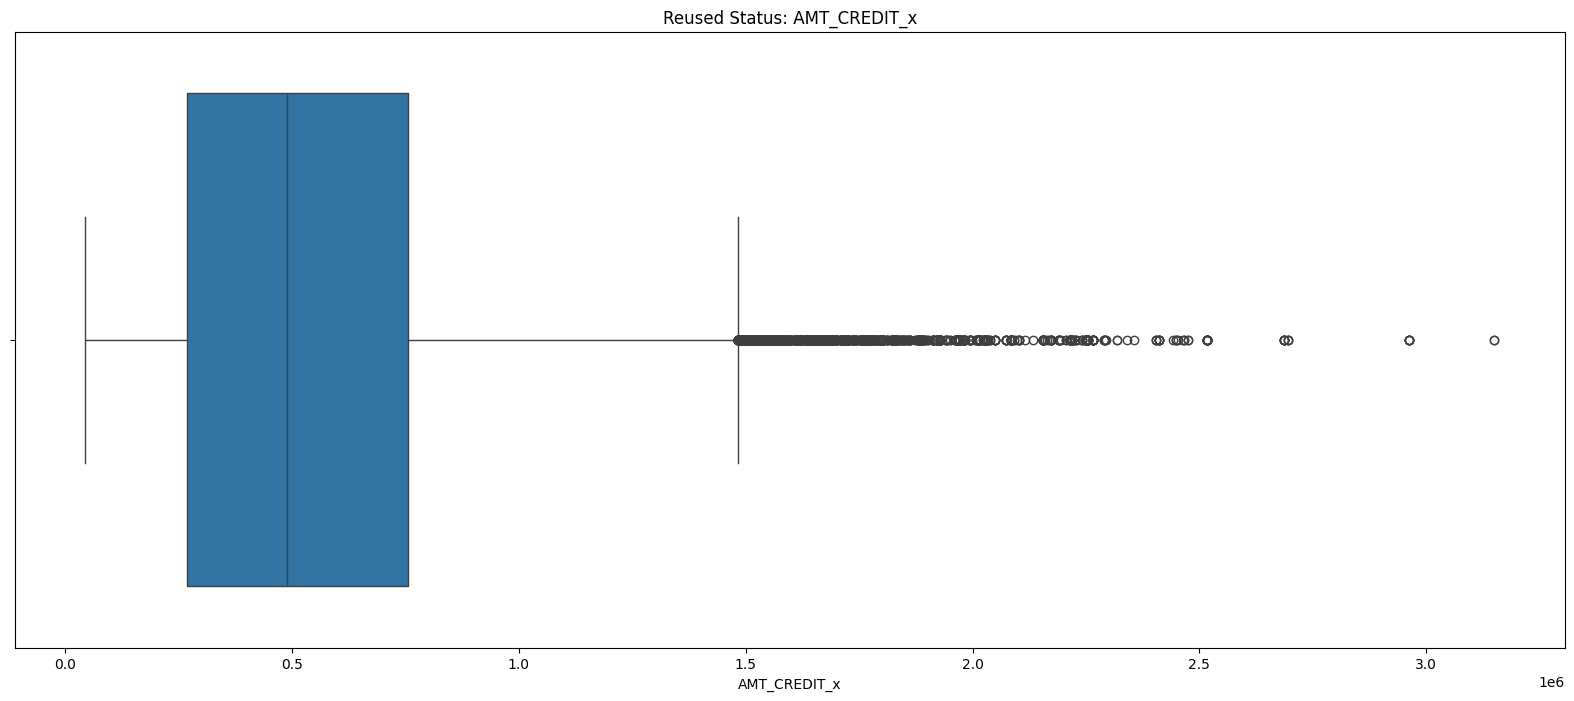

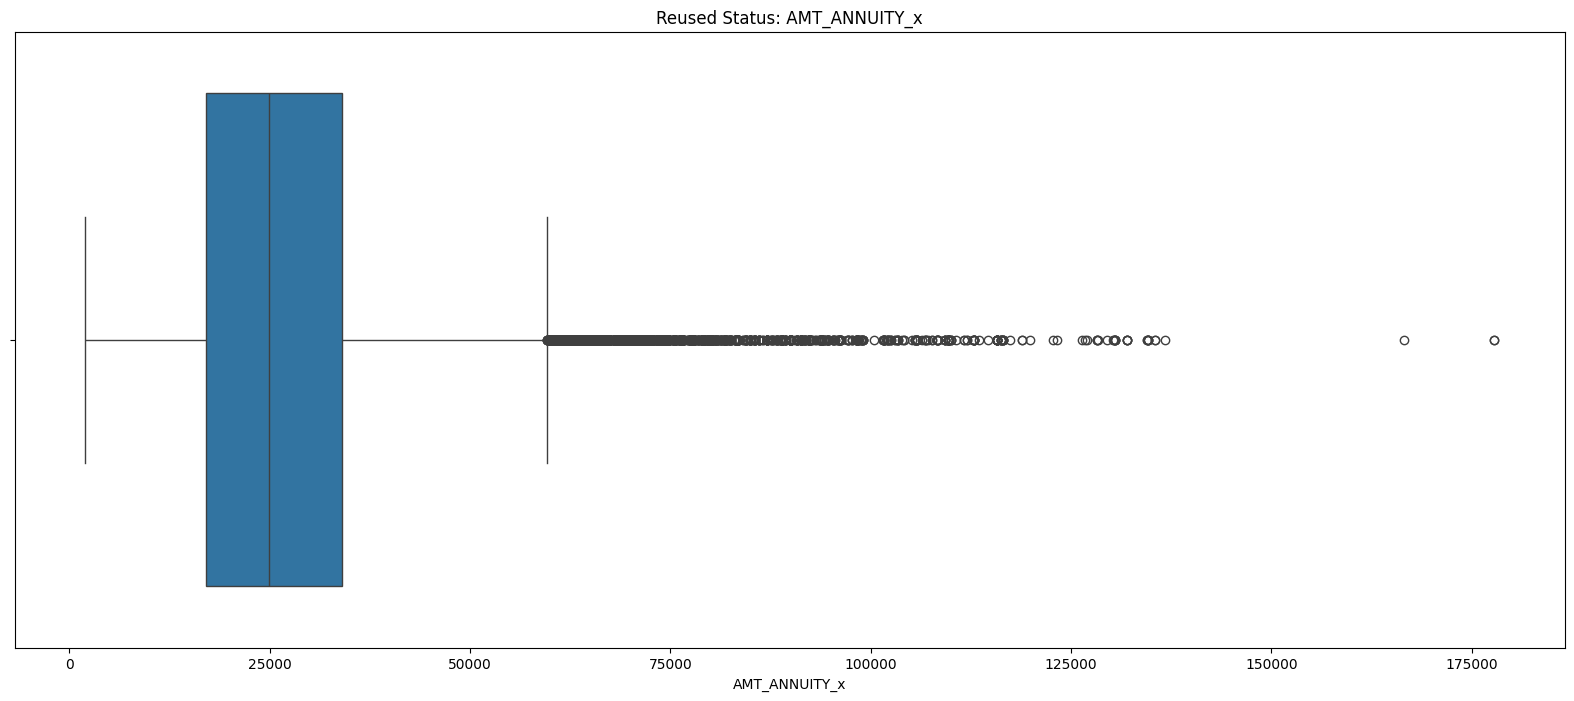

In [411]:
for i in conb_num_col:
    plt.figure(figsize=(20,8))
    sns.boxplot(data = combined_refused_df, x=i)
    plt.title("Reused Status: "+i)


# Bivariant analysis for Categorical Data for the reused applications

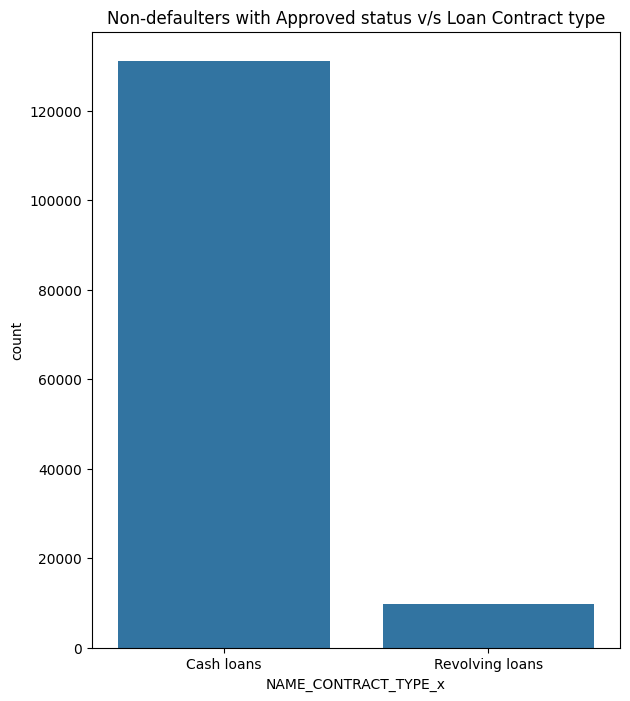

In [412]:
# People with approved status now on reapplying when their earlier applications were refused - First Variable

# 1. Second Variable : Contract Type

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(x = "NAME_CONTRACT_TYPE_x", data = combined_refused_df)
plt.title("Non-defaulters with Approved status v/s Loan Contract type")
plt.show()

## Inference from the above Bivariate analysis for categorical data is as below:

#### 1. Cash loans: Are more likely to be re-applied

# Bivariant analysis for Numerical Data for the reapplied applications

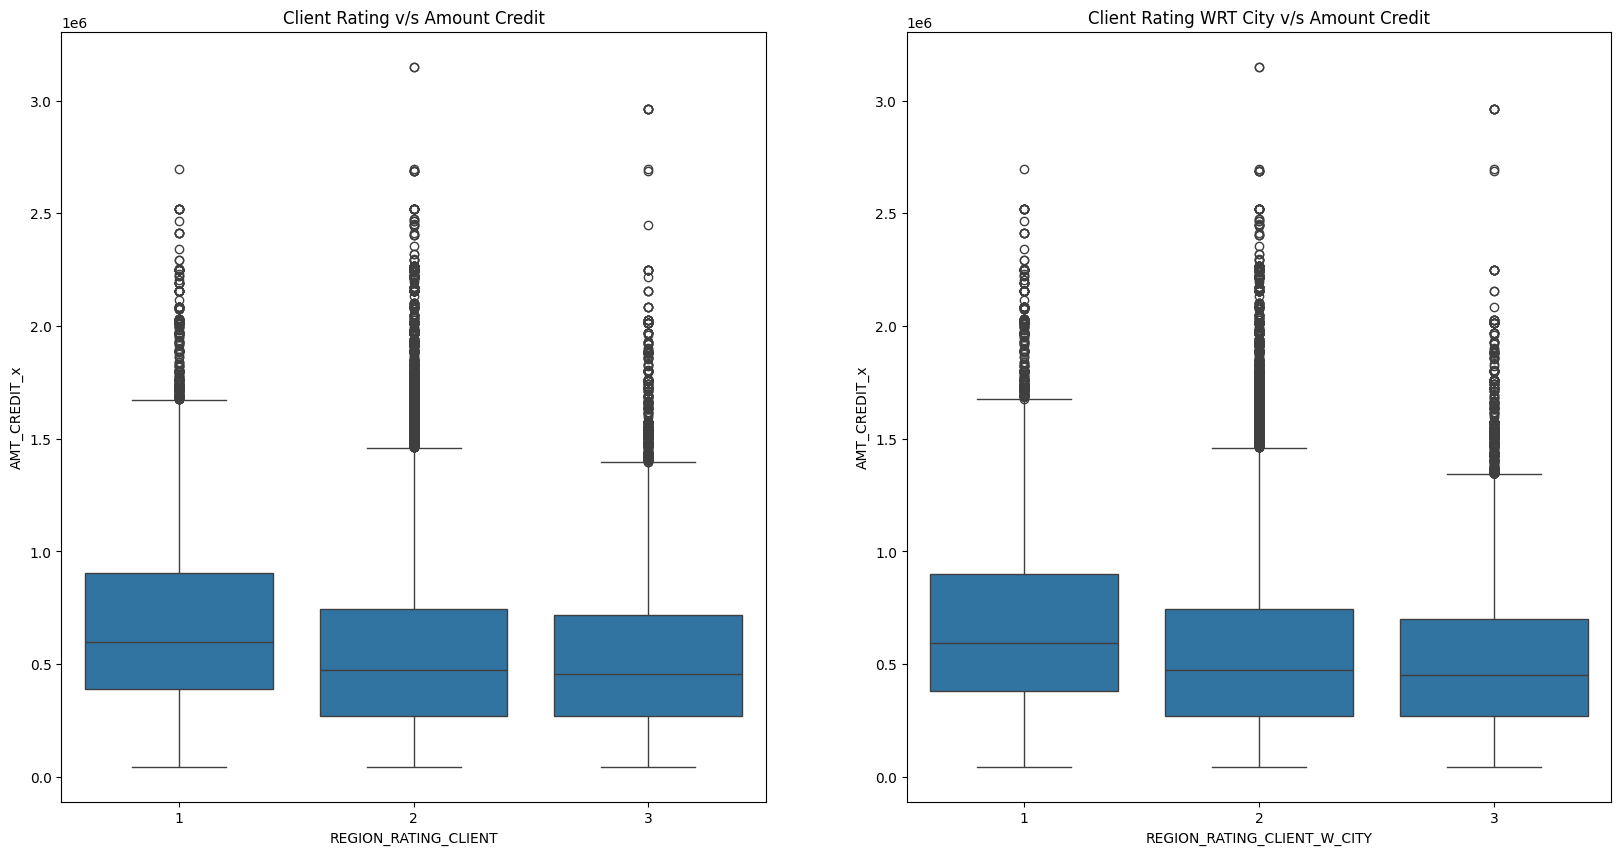

In [413]:
# First Variable: Client Rating
# Second Variable: AMT_CREDIT
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.boxplot(x='REGION_RATING_CLIENT', y='AMT_CREDIT_x', data = combined_refused_df)
plt.title("Client Rating v/s Amount Credit")

# First Variable: Client Rating With Respect to City
# Second Variable: AMT_CREDIT
plt.subplot(1,2,2)
sns.boxplot(x='REGION_RATING_CLIENT_W_CITY',y='AMT_CREDIT_x', data = combined_refused_df)
plt.title("Client Rating WRT City v/s Amount Credit")
plt.show()


In [414]:
# Analysis: Below are the applications which needs careful analysis as the amount credit for those people
        # is more than their annual income

combined_refused_df['diff'] = (combined_refused_df['AMT_INCOME_TOTAL'] < combined_refused_df['AMT_CREDIT_x'])
print ("Number of people with reused status are having credit amount more than annual income: ", len(combined_refused_df))

Number of people with reused status are having credit amount more than annual income:  140880


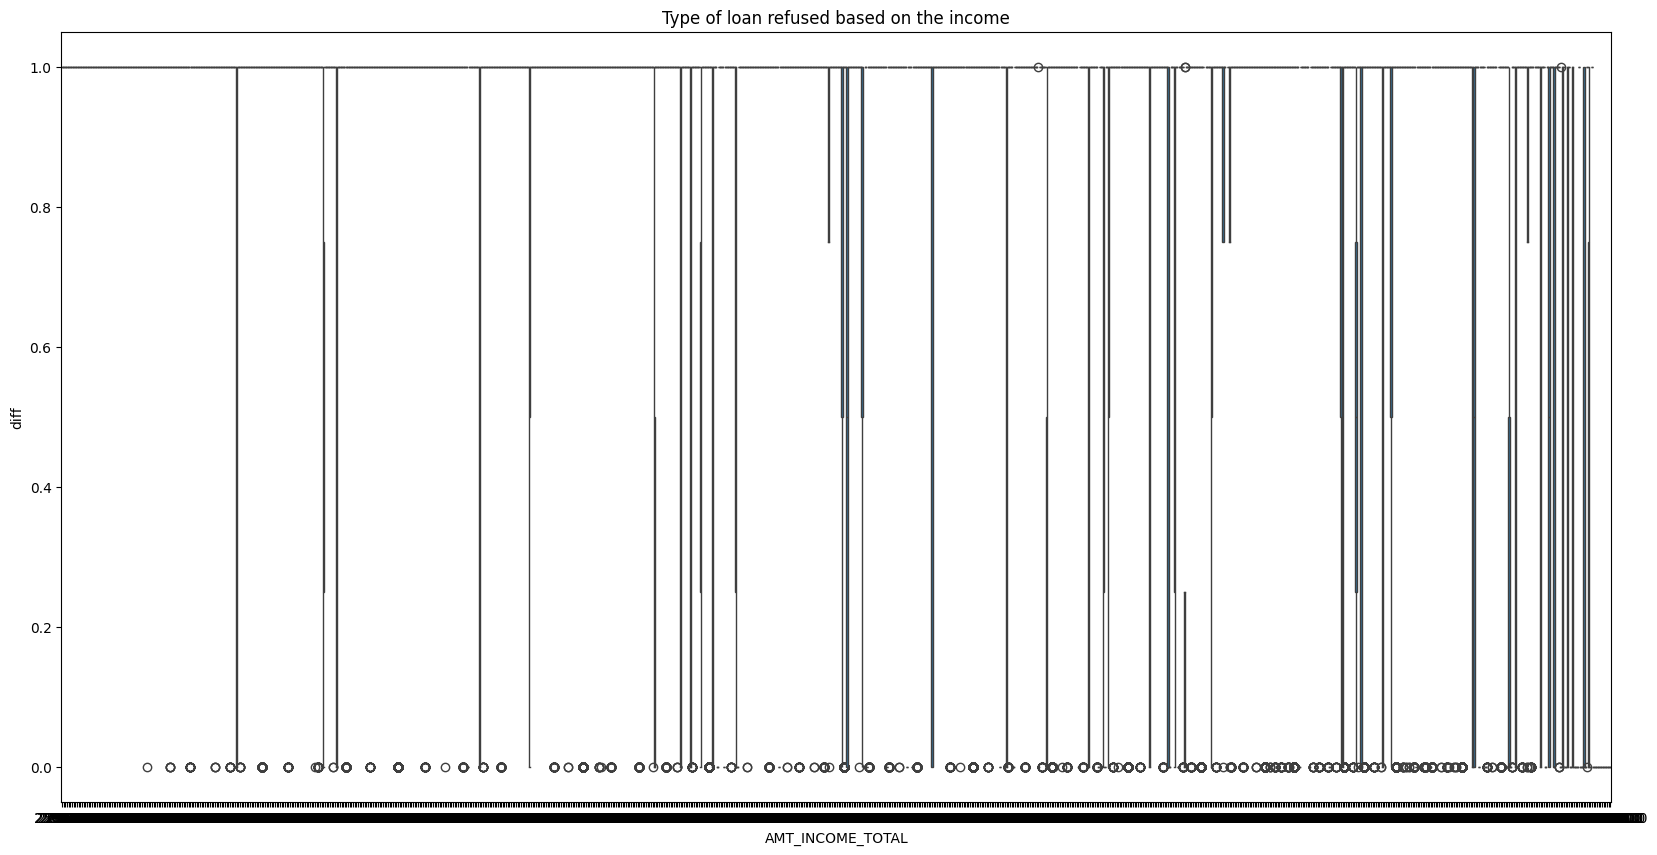

In [415]:
#Amount requested is more compared to the Annual income, that it is refused

combined_refused_df['diff'] = combined_refused_df['diff'].astype(int)
plt.figure(figsize=(20, 10))
sns.boxplot(x='AMT_INCOME_TOTAL', y='diff', data=combined_refused_df)
plt.title("Type of loan refused based on the income")
plt.show()



## 5.2.3. Doing analysis on People with Contract Status as Canceled

### Preparing dataframe for people with Cancelled status from the combined dataframe

In [416]:
combined_cancelled_df=comb_df[comb_df.NAME_CONTRACT_STATUS == 'Canceled']
combined_cancelled_df

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
4           100006       0           Cash loans           F            N   
11          100008       0           Cash loans           M            N   
61          100035       0           Cash loans           F            N   
65          100035       0           Cash loans           F            N   
66          100035       0           Cash loans           F            N   
...            ...     ...                  ...         ...          ...   
811701      456237       0           Cash loans           F            N   
811711      456241       0           Cash loans           F            Y   
811722      456244       0           Cash loans           F            N   
811725      456244       0           Cash loans           F            N   
811727      456244       0           Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
4                    Y             0          135000.0      312682.5   
11                   Y             0           99000.0      490495.5   
61                   Y             0          292500.0      665892.0   
65                   Y             0          292500.0      665892.0   
66                   Y             0          292500.0      665892.0   
...                ...           ...               ...           ...   
811701               Y             0          135000.0      946764.0   
811711               Y             0          180000.0      270126.0   
811722               Y             0          261000.0     1303812.0   
811725               Y             0          261000.0     1303812.0   
811727               Y             0          261000.0     1303812.0   

        AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x  \
4             29686.5           297000.0     Unaccompanied   
11            27517.5           454500.0   Spouse, partner   
61            24592.5           477000.0     Unaccompanied   
65            24592.5           477000.0     Unaccompanied   
66            24592.5           477000.0     Unaccompanied   
...               ...                ...               ...   
811701        37678.5           765000.0     Unaccompanied   
811711        12028.5           193500.0     Unaccompanied   
811722        35982.0          1138500.0     Unaccompanied   
811725        35982.0          1138500.0     Unaccompanied   
811727        35982.0          1138500.0     Unaccompanied   

            NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
4                    Working  Secondary / secondary special   
11             State servant  Secondary / secondary special   
61      Commercial associate  Secondary / secondary special   
65      Commercial associate  Secondary / secondary special   
66      Commercial associate  Secondary / secondary special   
...                      ...                            ...   
811701               Working  Secondary / secondary special   
811711               Working  Secondary / secondary special   
811722               Working               Higher education   
811725               Working               Higher education   
811727               Working               Higher education   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
4          Civil marriage  House / apartment       52.07           8.33   
11                Married  House / apartment       46.41           4.35   
61         Civil marriage  House / apartment       41.86           7.31   
65         Civil marriage  House / apartment       41.86           7.31   
66         Civil marriage  House / apartment       41.86           7.31   
...                   ...                ...         ...            ...   
811701            Married  House / apartment       48.04           6.32   
811711            Married  House / apartment       45.70           3.35   
811722            Married  House / apartment       55

### Univariate Analysis for few numerical columns in combined dataframe

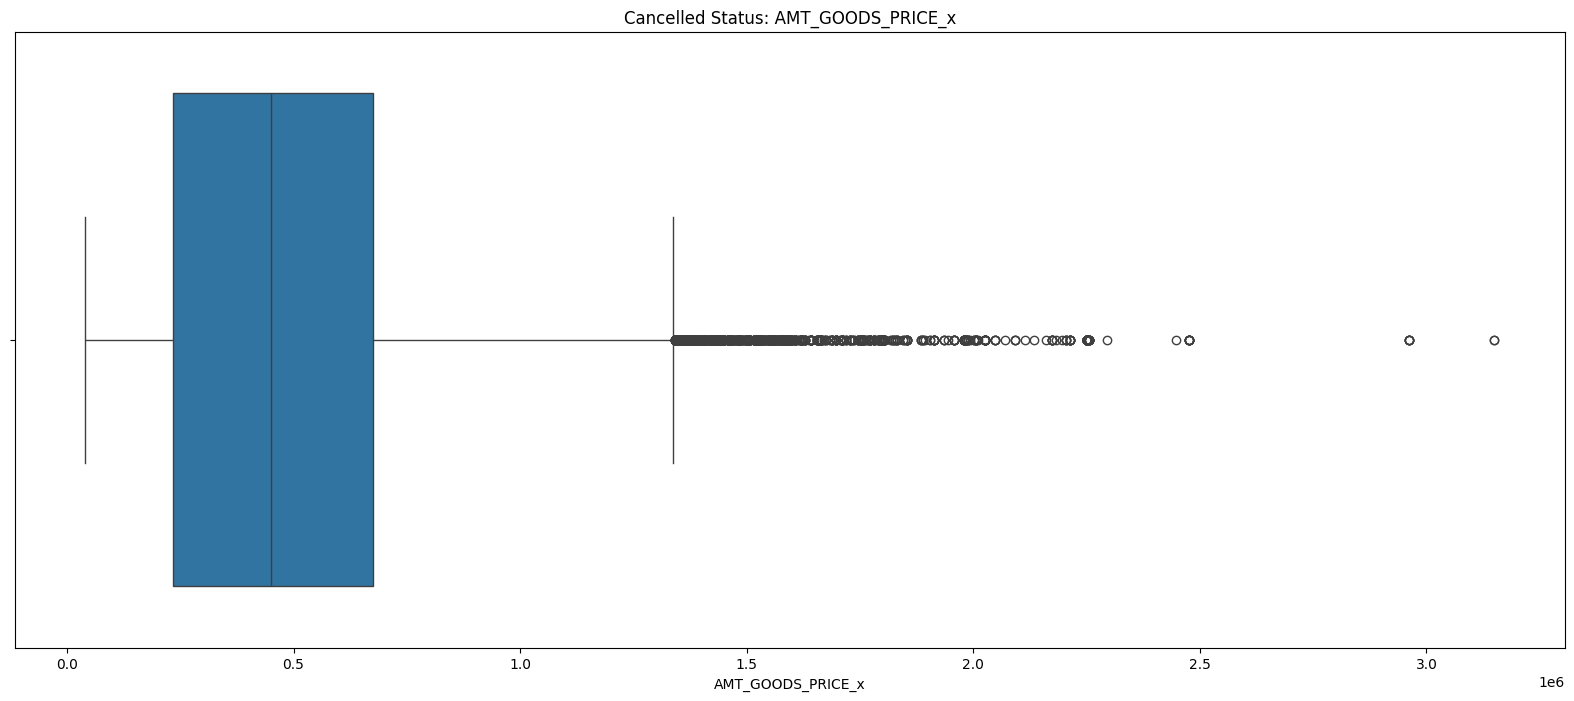

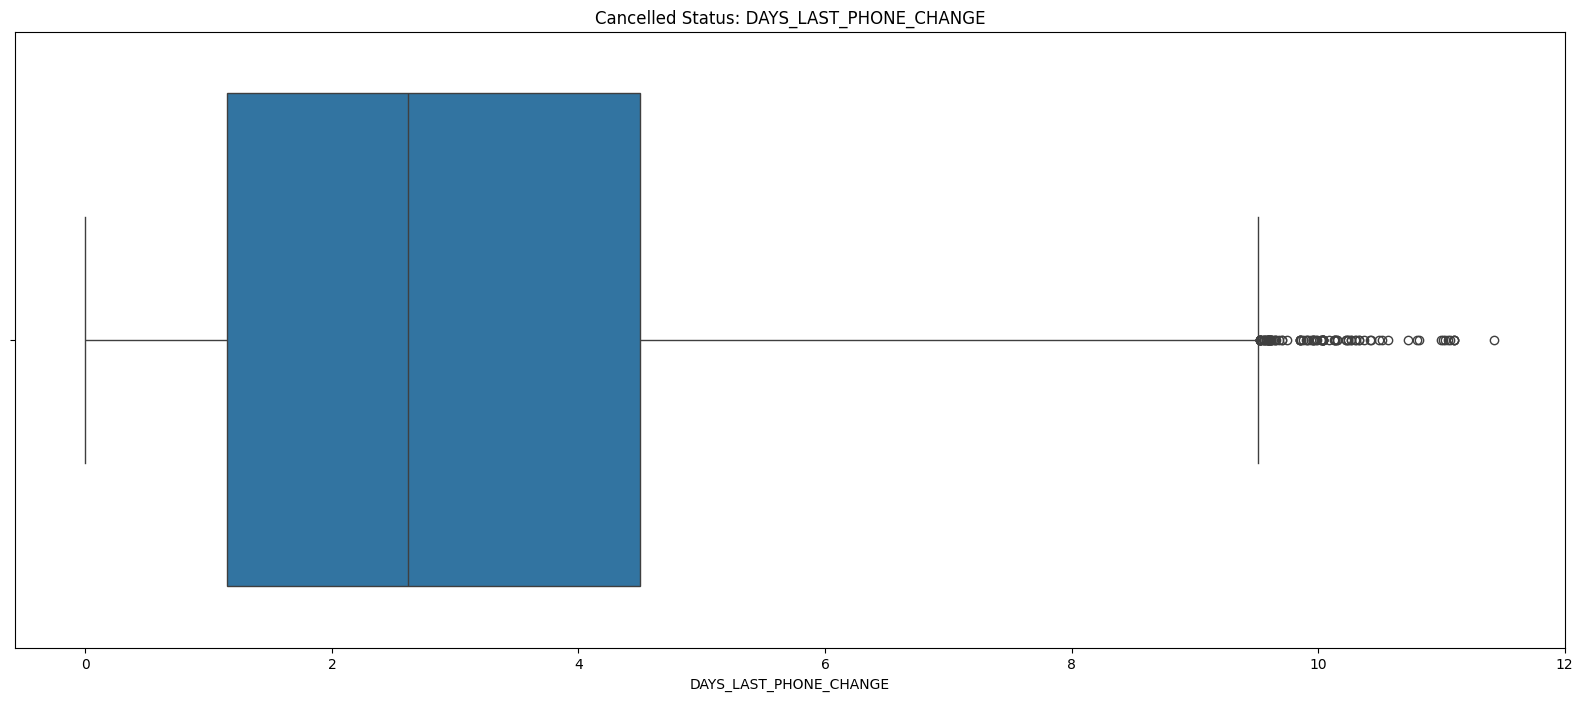

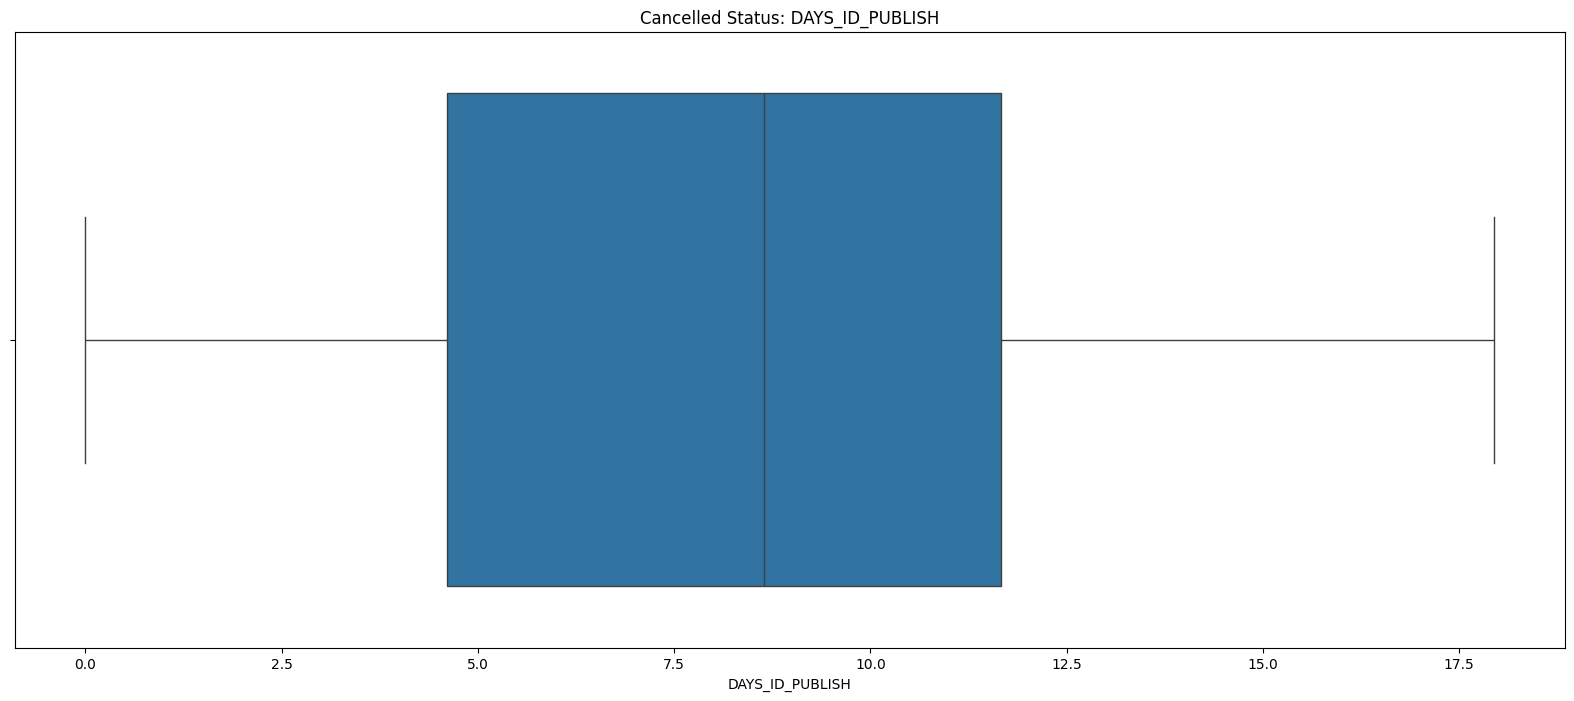

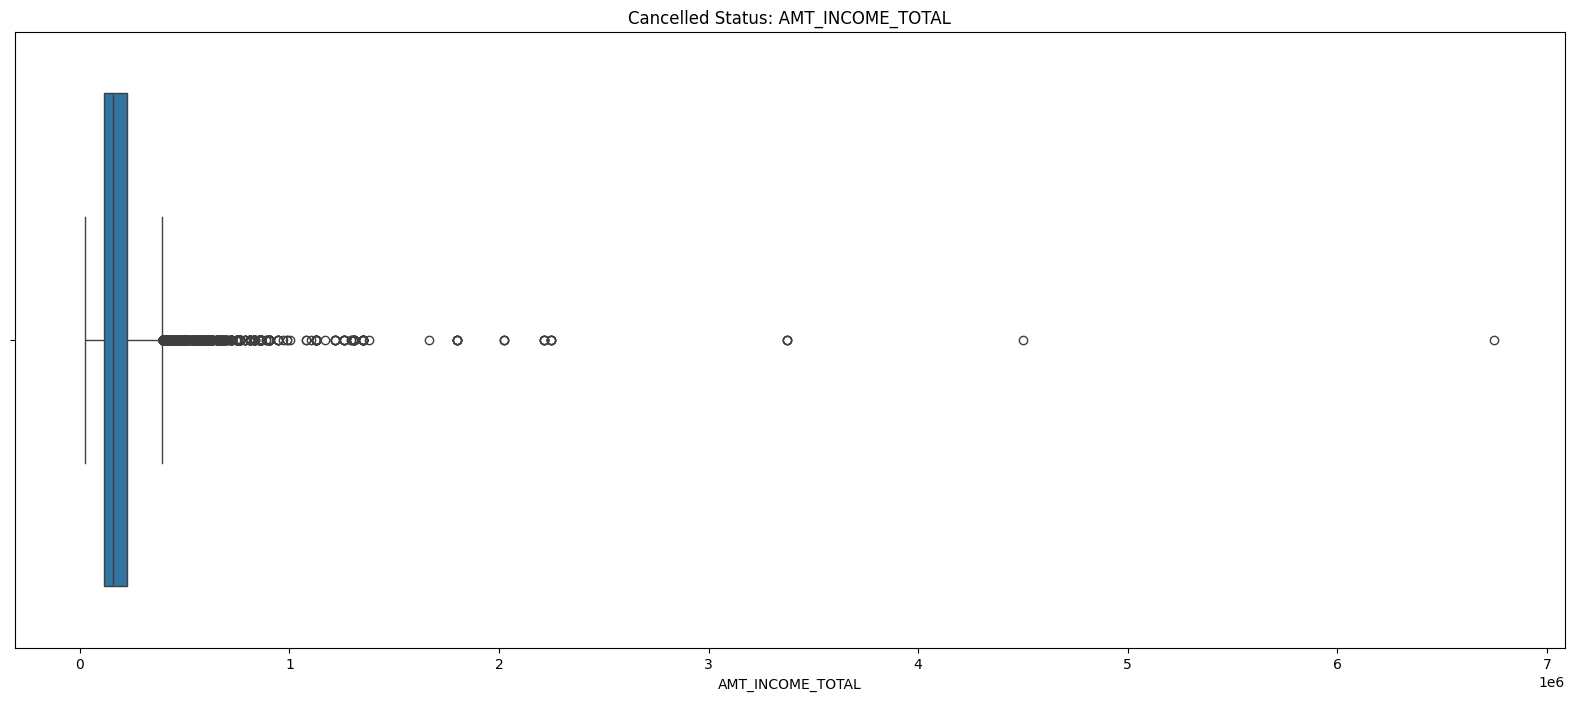

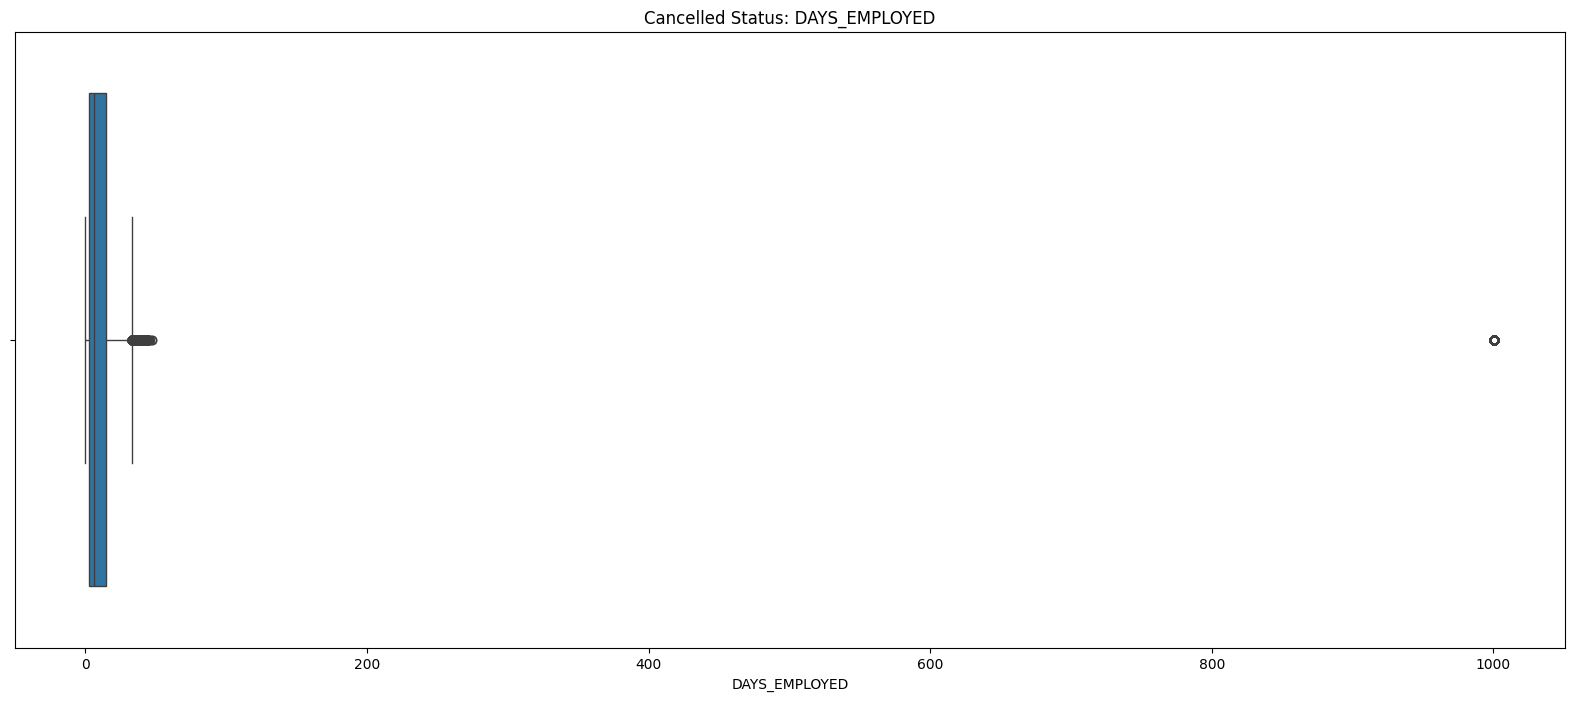

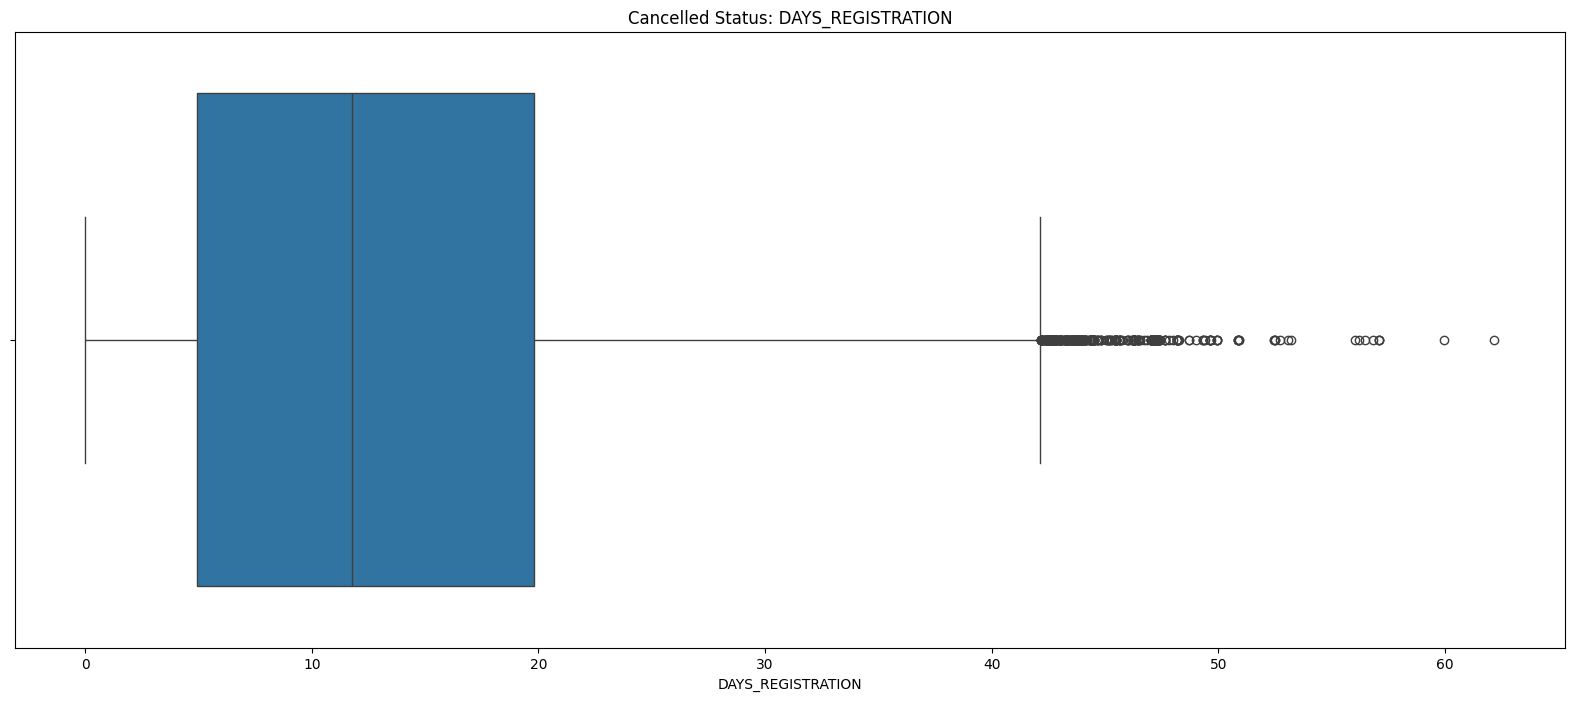

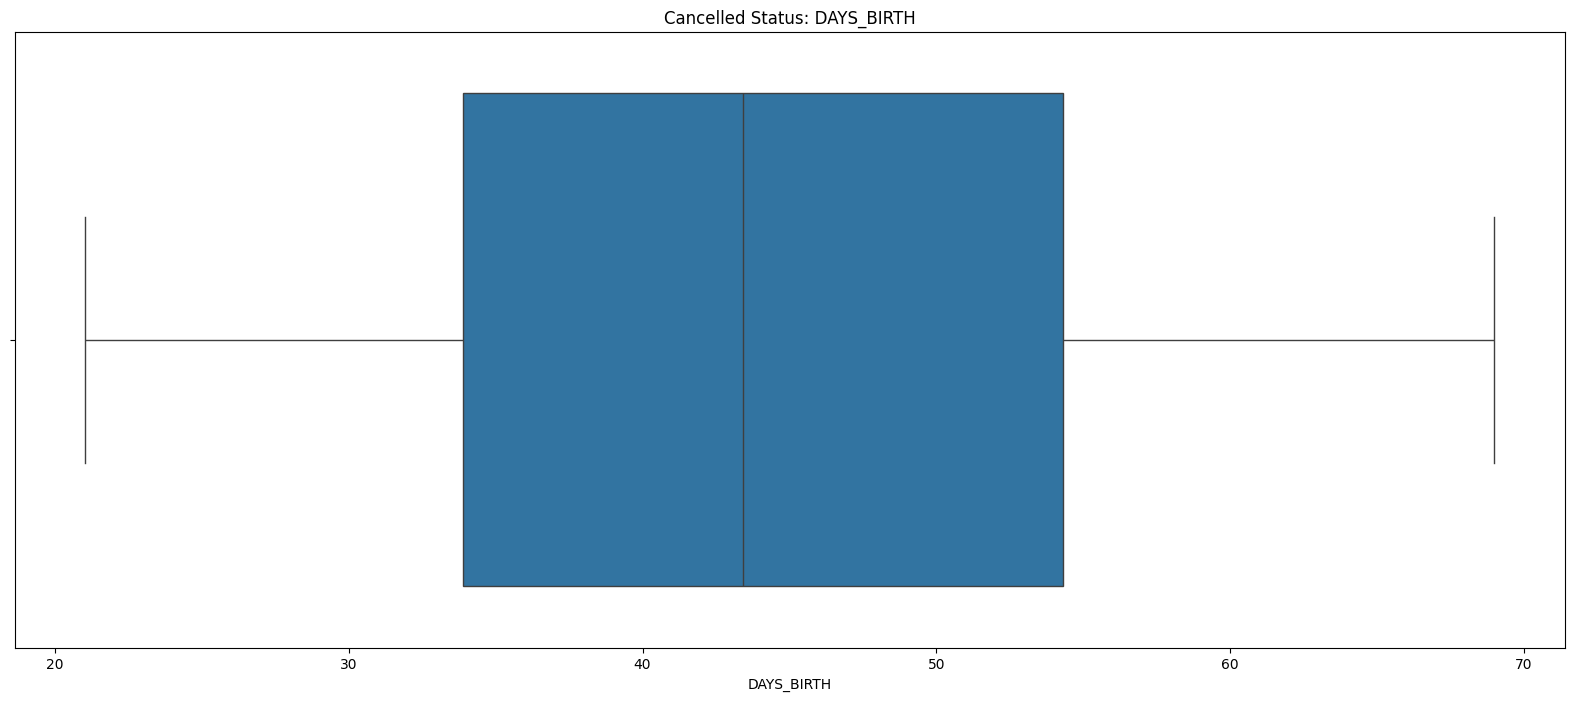

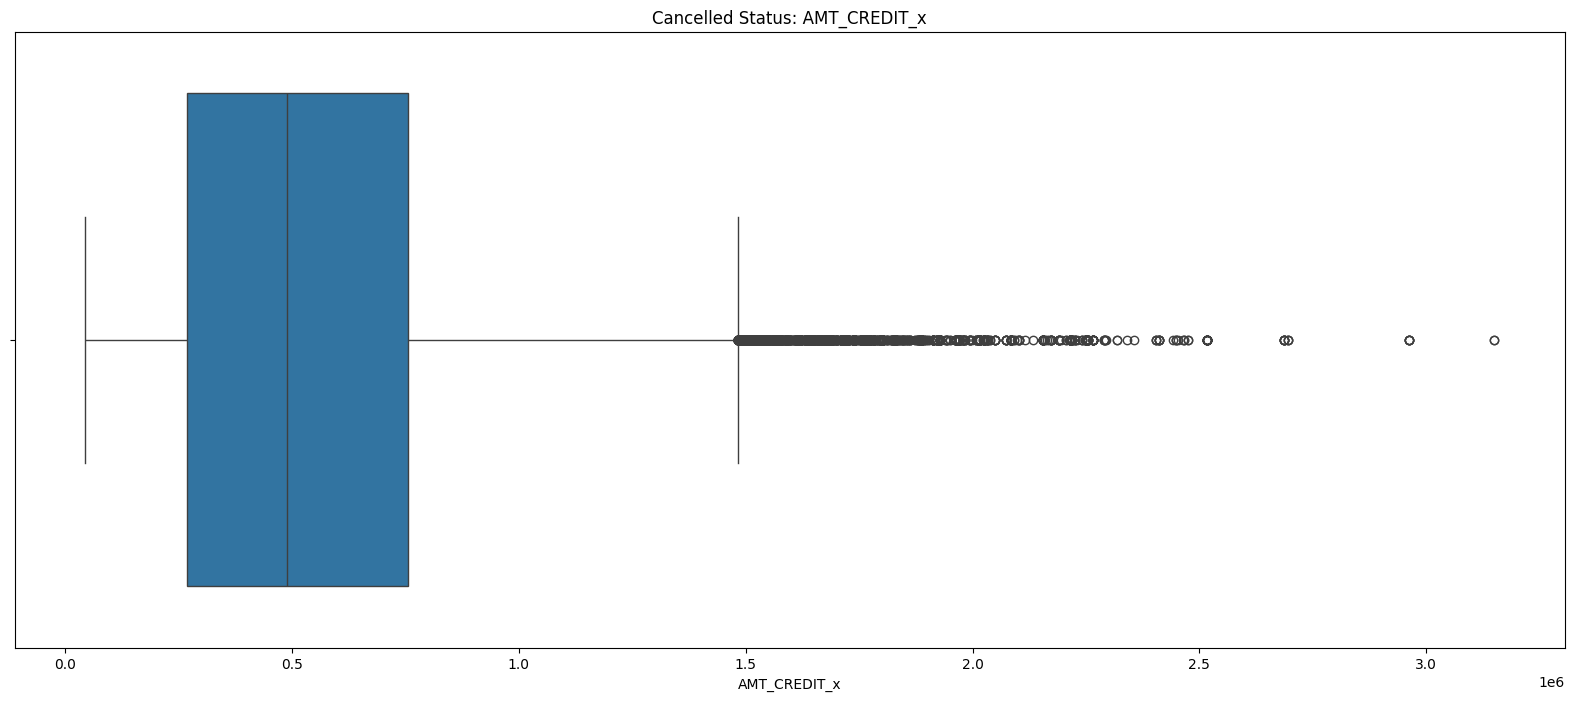

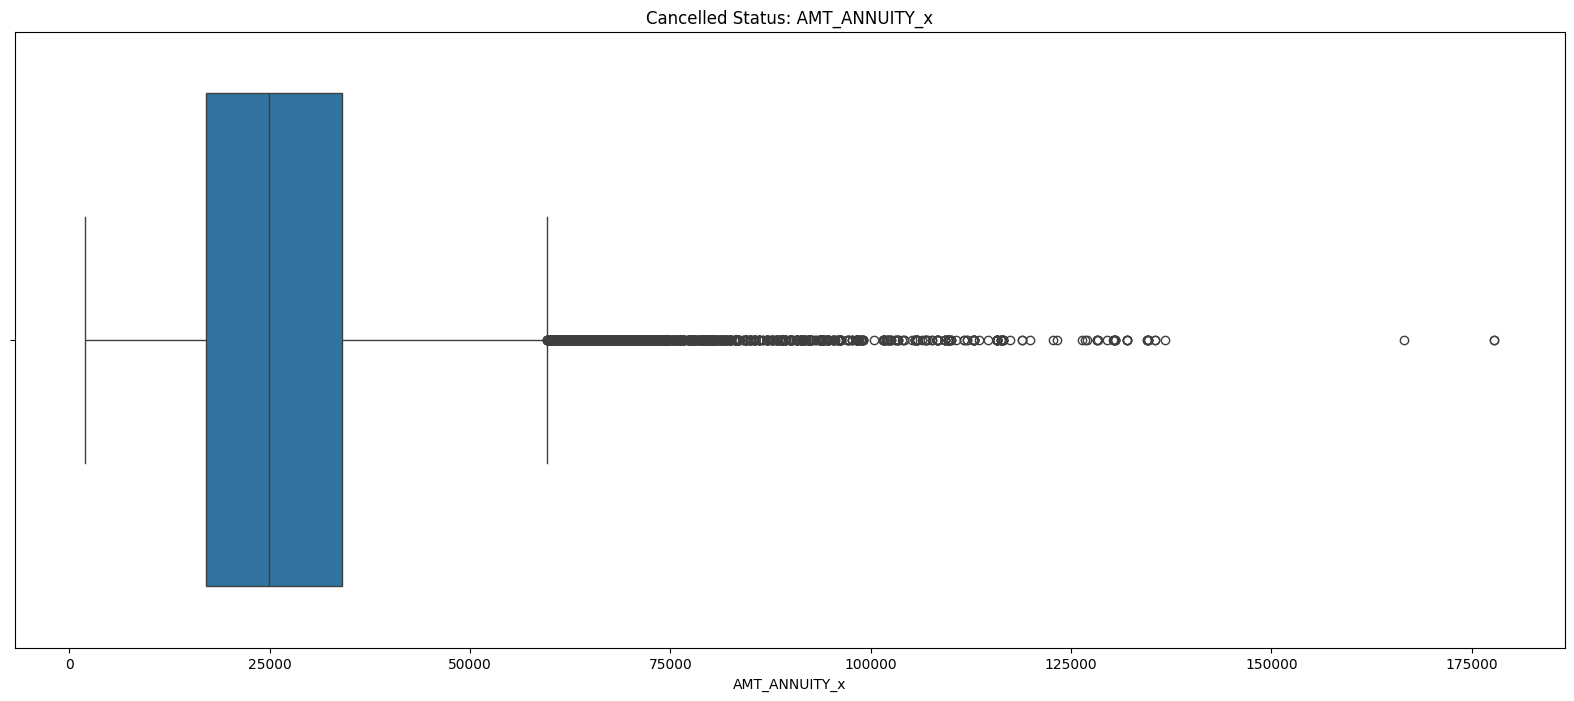

In [417]:
for i in conb_num_col:
    plt.figure(figsize=(20,8))
    sns.boxplot(data = combined_refused_df, x=i)
    plt.title("Cancelled Status: "+i)

# Bivariant analysis for Categorical Data for the reused applications

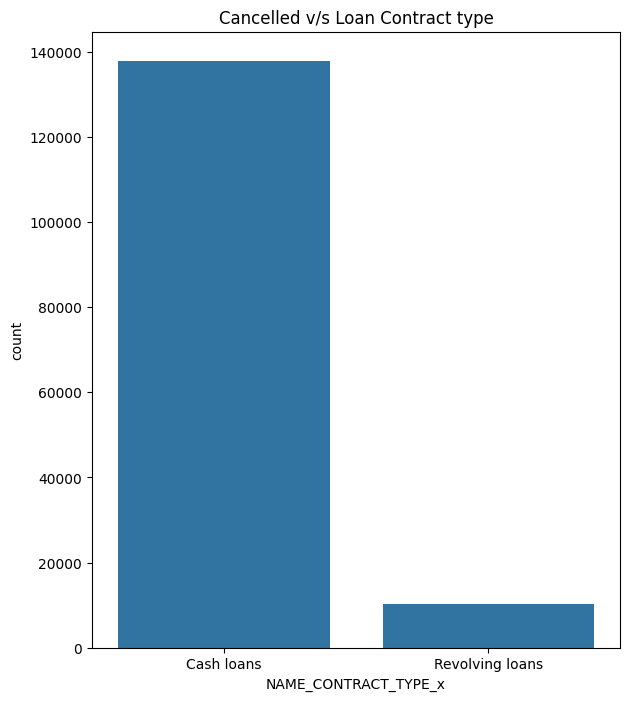

In [418]:
# People with approved status now on reapplying when their earlier applications were cancelled - First Variable

# 1. Second Variable : Contract Type

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(x = "NAME_CONTRACT_TYPE_x", data = combined_cancelled_df)
plt.title("Cancelled v/s Loan Contract type")
plt.show()

## Inference from the above Bivariate analysis for categorical data is as below:

#### 1. Cash loans: Are more likely to be cancelled

# Bivariant analysis for Numerical Data for the Cancelled applications

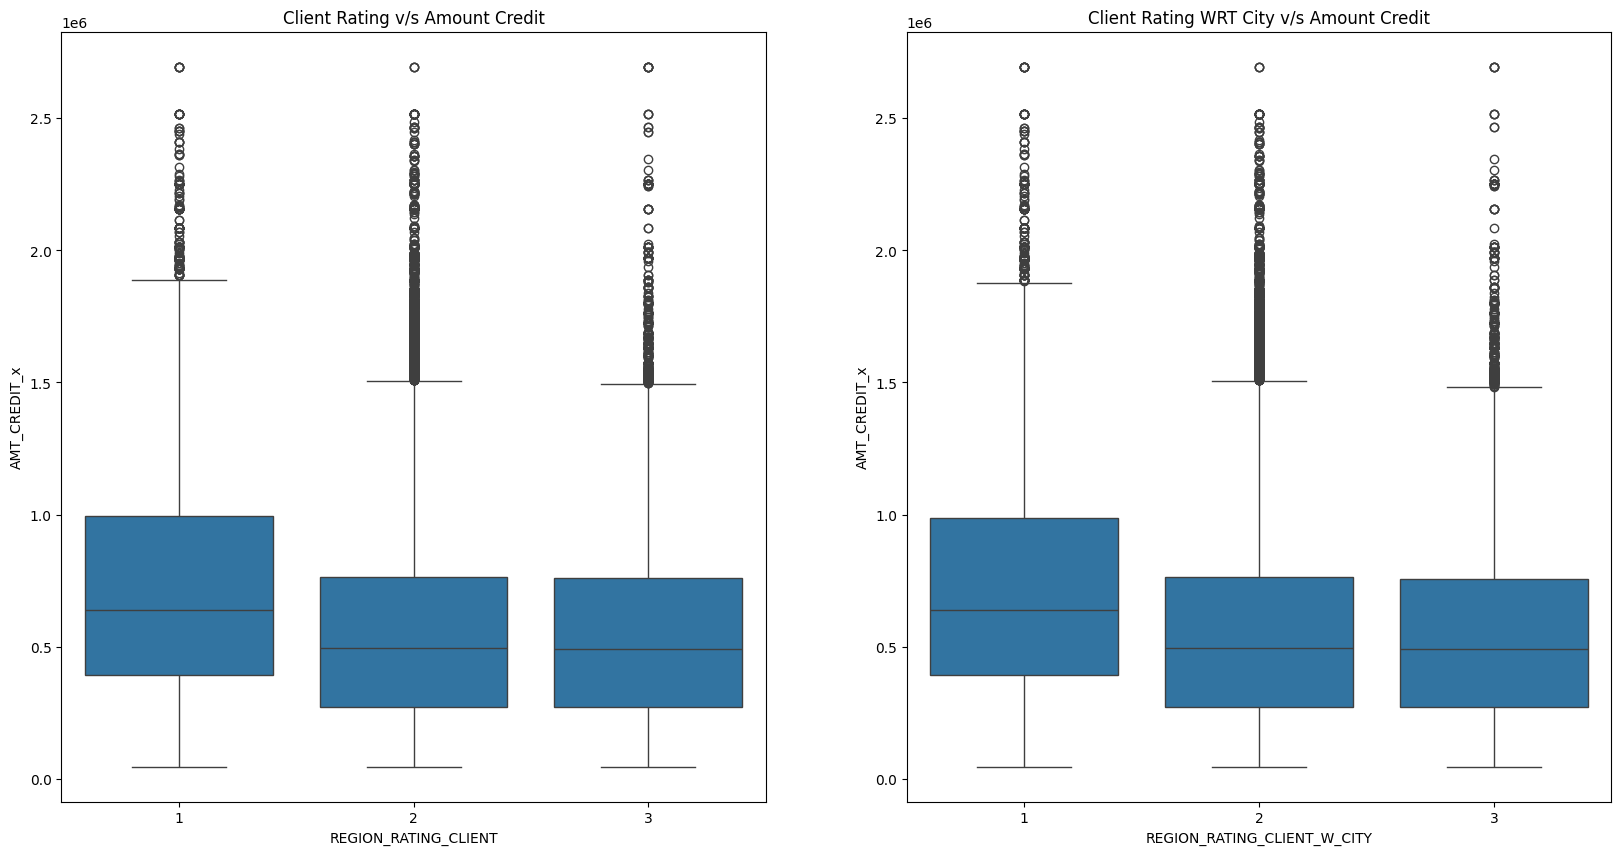

In [419]:
# First Variable: Client Rating
# Second Variable: AMT_CREDIT
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.boxplot(x='REGION_RATING_CLIENT', y='AMT_CREDIT_x', data = combined_cancelled_df)
plt.title("Client Rating v/s Amount Credit")

# First Variable: Client Rating With Respect to City
# Second Variable: AMT_CREDIT
plt.subplot(1,2,2)
sns.boxplot(x='REGION_RATING_CLIENT_W_CITY',y='AMT_CREDIT_x', data = combined_cancelled_df)
plt.title("Client Rating WRT City v/s Amount Credit")
plt.show()


## 5.2.4 Doing analysis on People with Contract Status as Un-used offer

### Preparing data for people with Unused offer status

In [420]:
# People with Refused status in combined dataframe
comb_unused_df = comb_df[comb_df.NAME_CONTRACT_STATUS == 'Unused offer']
comb_unused_df

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
207         100086       0           Cash loans           F            N   
268         100116       0           Cash loans           F            N   
270         100116       0           Cash loans           F            N   
324         100139       0           Cash loans           F            N   
363         100156       0           Cash loans           F            Y   
...            ...     ...                  ...         ...          ...   
811495      456156       0           Cash loans           M            N   
811561      456180       0           Cash loans           M            Y   
811628      456210       0           Cash loans           F            N   
811659      456220       0           Cash loans           F            N   
811689      456234       0           Cash loans           M            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
207                  Y             1          135000.0      675000.0   
268                  Y             0          243000.0      900000.0   
270                  Y             0          243000.0      900000.0   
324                  N             1          157500.0      302341.5   
363                  N             2          157500.0      945000.0   
...                ...           ...               ...           ...   
811495               N             0           90000.0      119448.0   
811561               Y             1          135000.0       90000.0   
811628               Y             0           90000.0      270000.0   
811659               N             1           81000.0     1350000.0   
811689               Y             0           81000.0      135000.0   

        AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x  \
207           21775.5           675000.0     Unaccompanied   
268           32017.5           900000.0     Unaccompanied   
270           32017.5           900000.0     Unaccompanied   
324           24016.5           261000.0            Family   
363           39127.5           945000.0            Family   
...               ...                ...               ...   
811495         7632.0            94500.0     Unaccompanied   
811561         9580.5            90000.0            Family   
811628        10309.5           270000.0     Unaccompanied   
811659        39474.0          1350000.0     Unaccompanied   
811689         9148.5           135000.0     Unaccompanied   

            NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
207     Commercial associate               Higher education   
268                  Working               Higher education   
270                  Working               Higher education   
324                  Working  Secondary / secondary special   
363     Commercial associate  Secondary / secondary special   
...                      ...                            ...   
811495               Working  Secondary / secondary special   
811561               Working  Secondary / secondary special   
811628               Working  Secondary / secondary special   
811659         State servant               Higher education   
811689  Commercial associate               Higher education   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
207                    Widow  House / apartment       39.08           6.83   
268                  Married  House / apartment       40.41          18.46   
270                  Married  House / apartment       40.41          18.46   
324                  Married  House / apartment       36.40           6.32   
363                  Married       With parents       39.00          14.82   
...                      ...                ...         ...            ...   
811495  Single / not married  House / apartment       50.20           3.09   
811561               Married  House / apartment       43.62           5.96   
811628               Marri

### Univariate Analysis for few categorical columns in combined dataframe

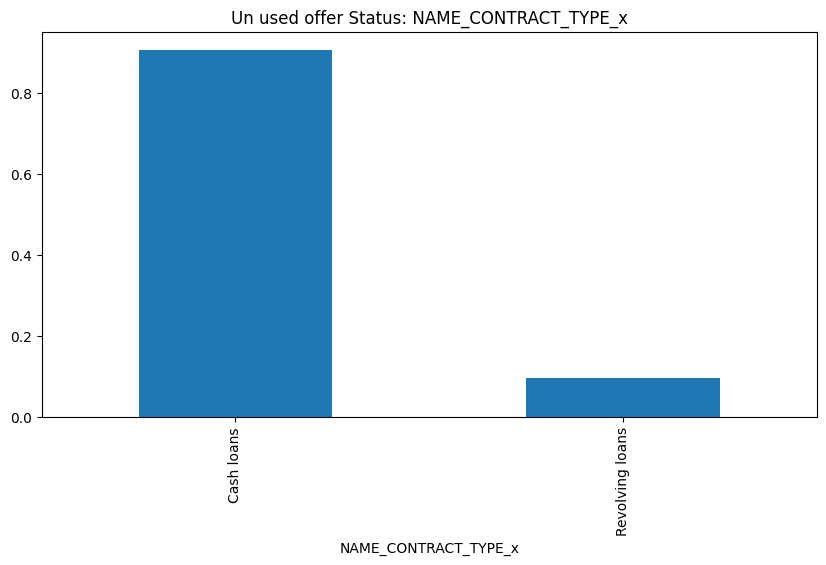

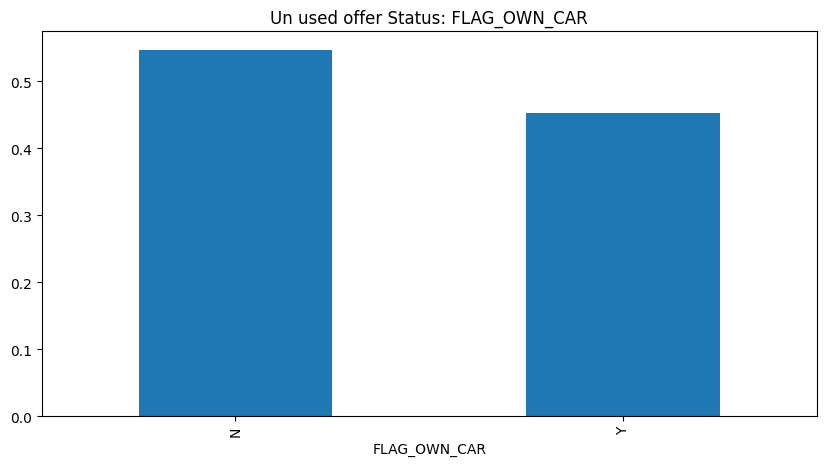

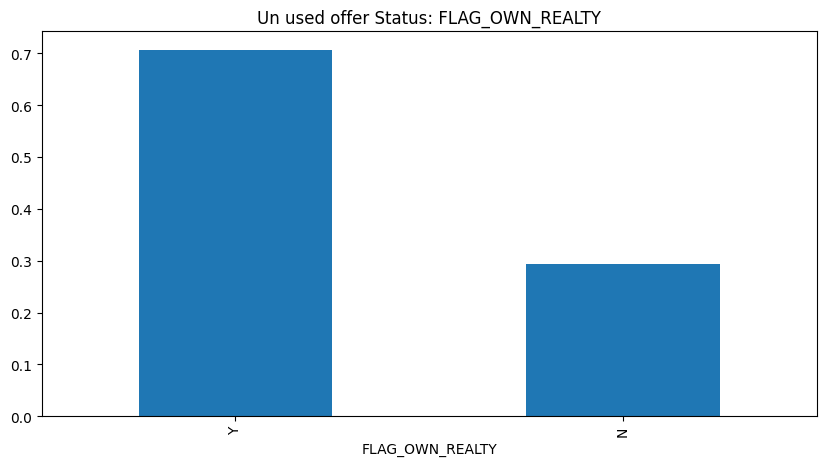

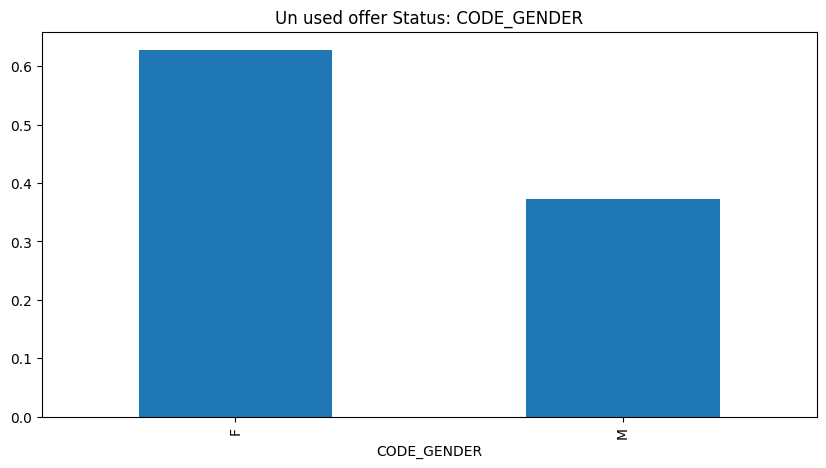

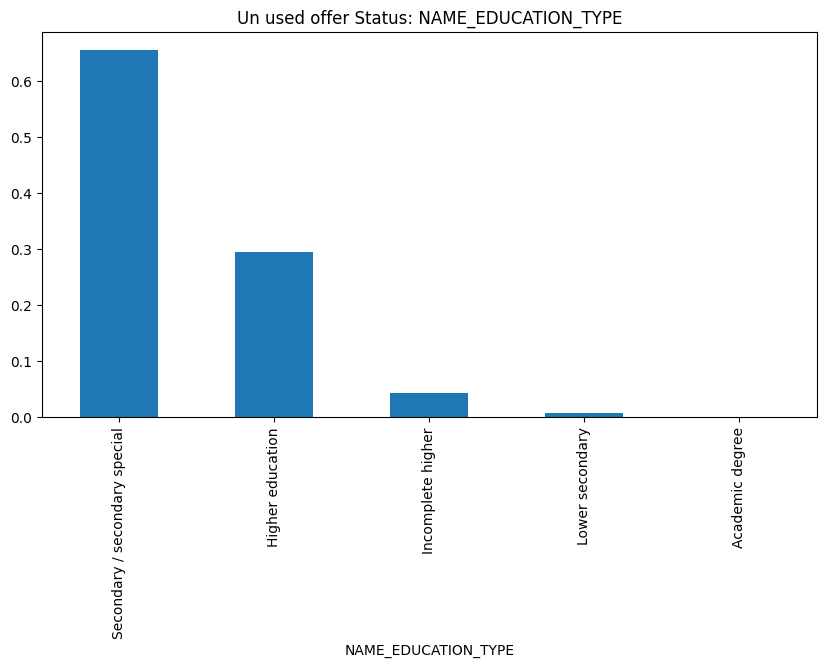

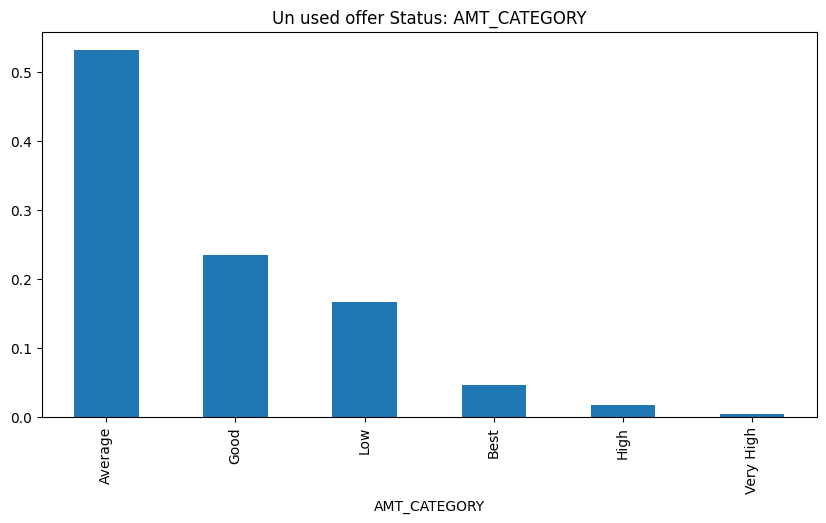

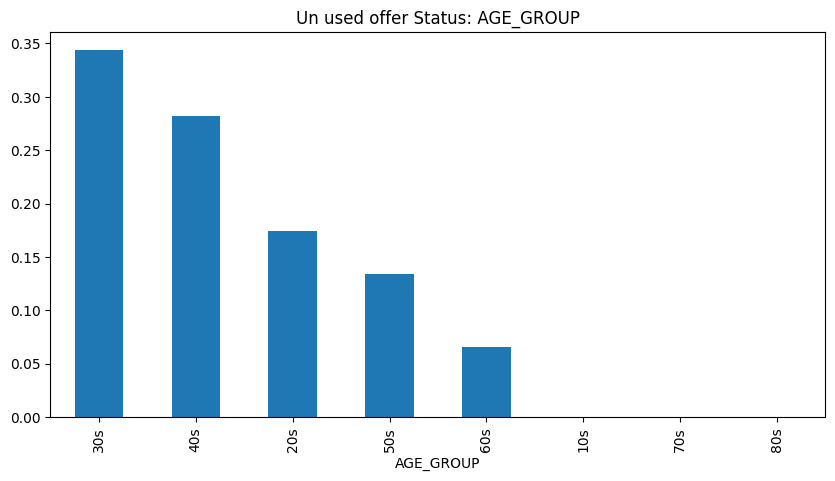

In [421]:
for i in conb_cat_col:
    plt.figure(figsize=(10,5))
    comb_unused_df[i].value_counts(normalize=True).plot.bar()
    plt.title("Un used offer Status: "+ i)

### Univariate Analysis for few numerical columns in combined dataframe

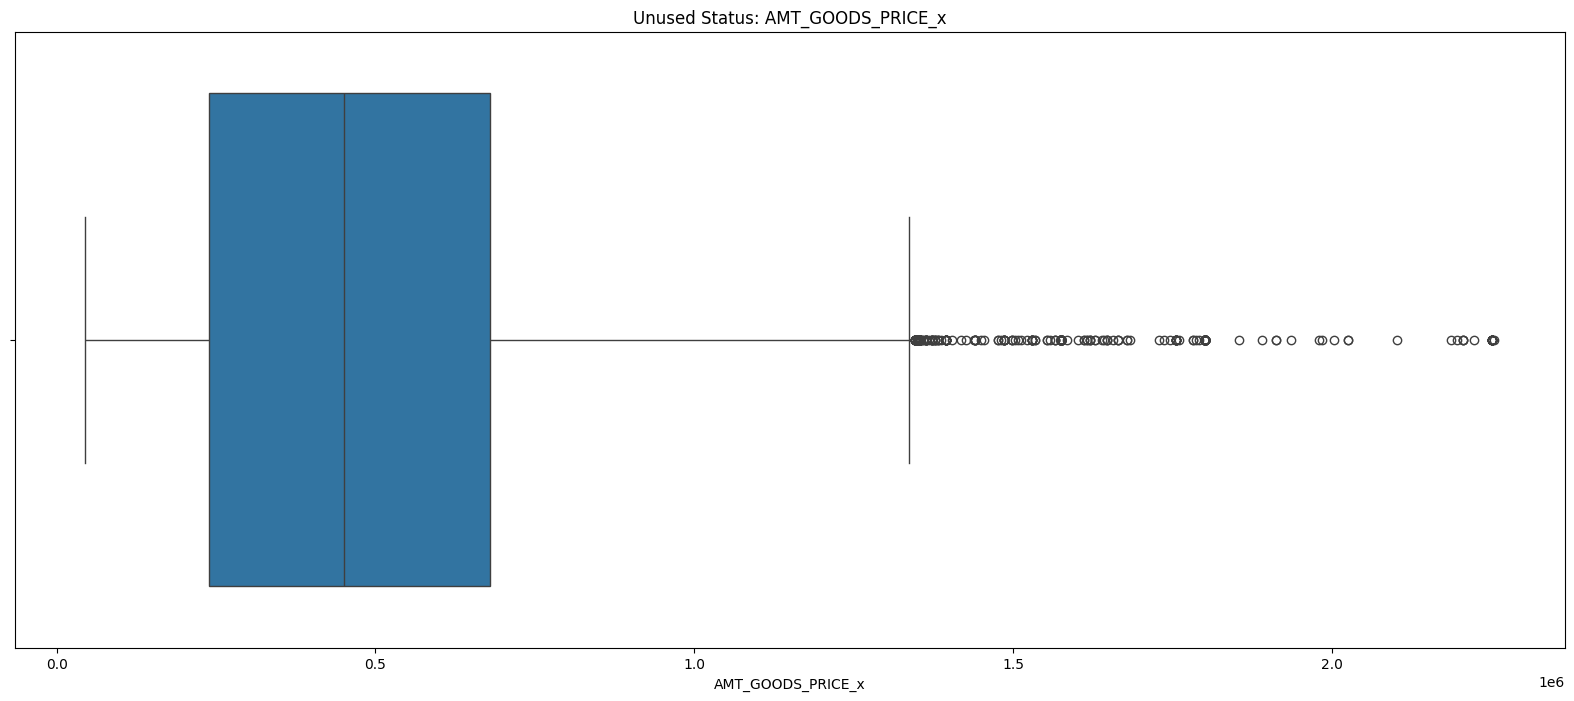

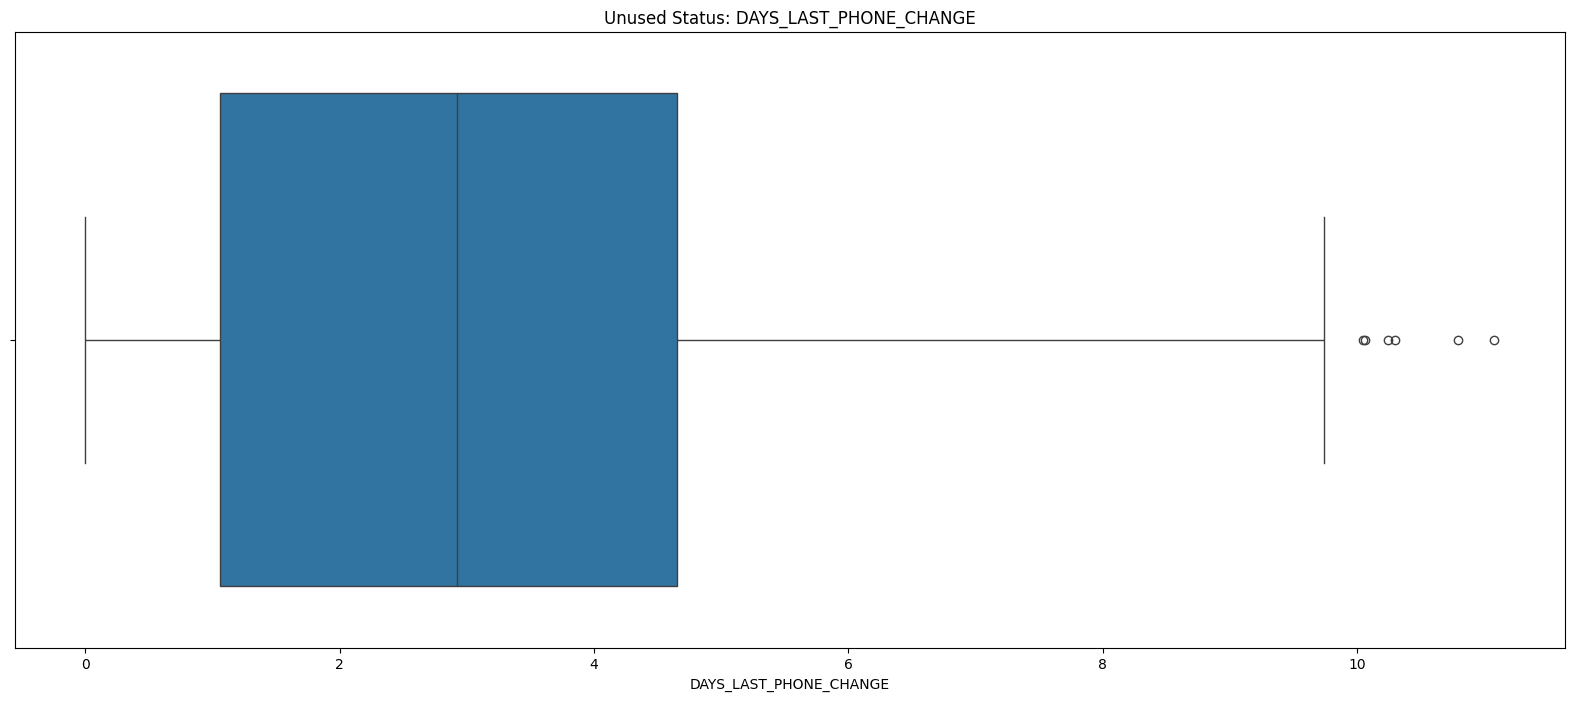

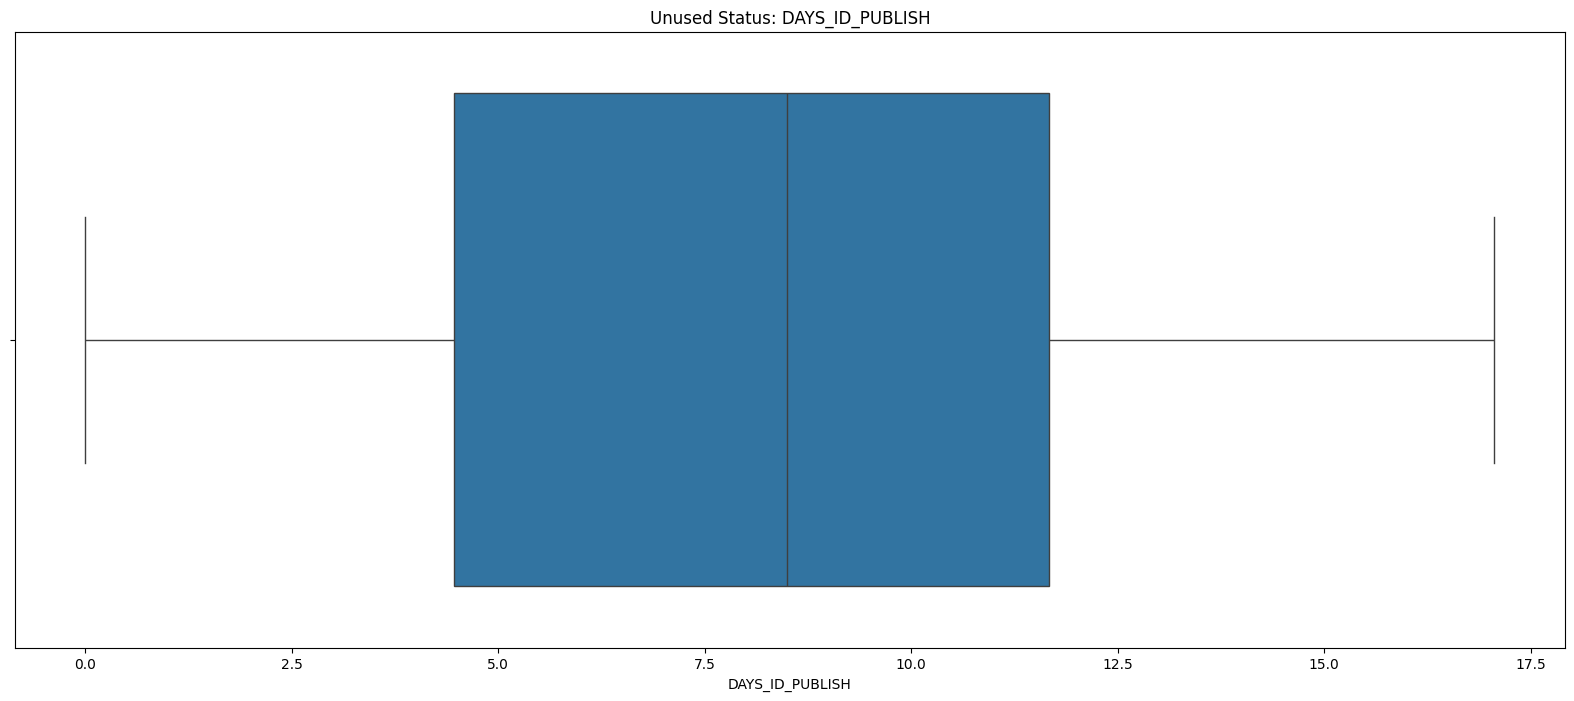

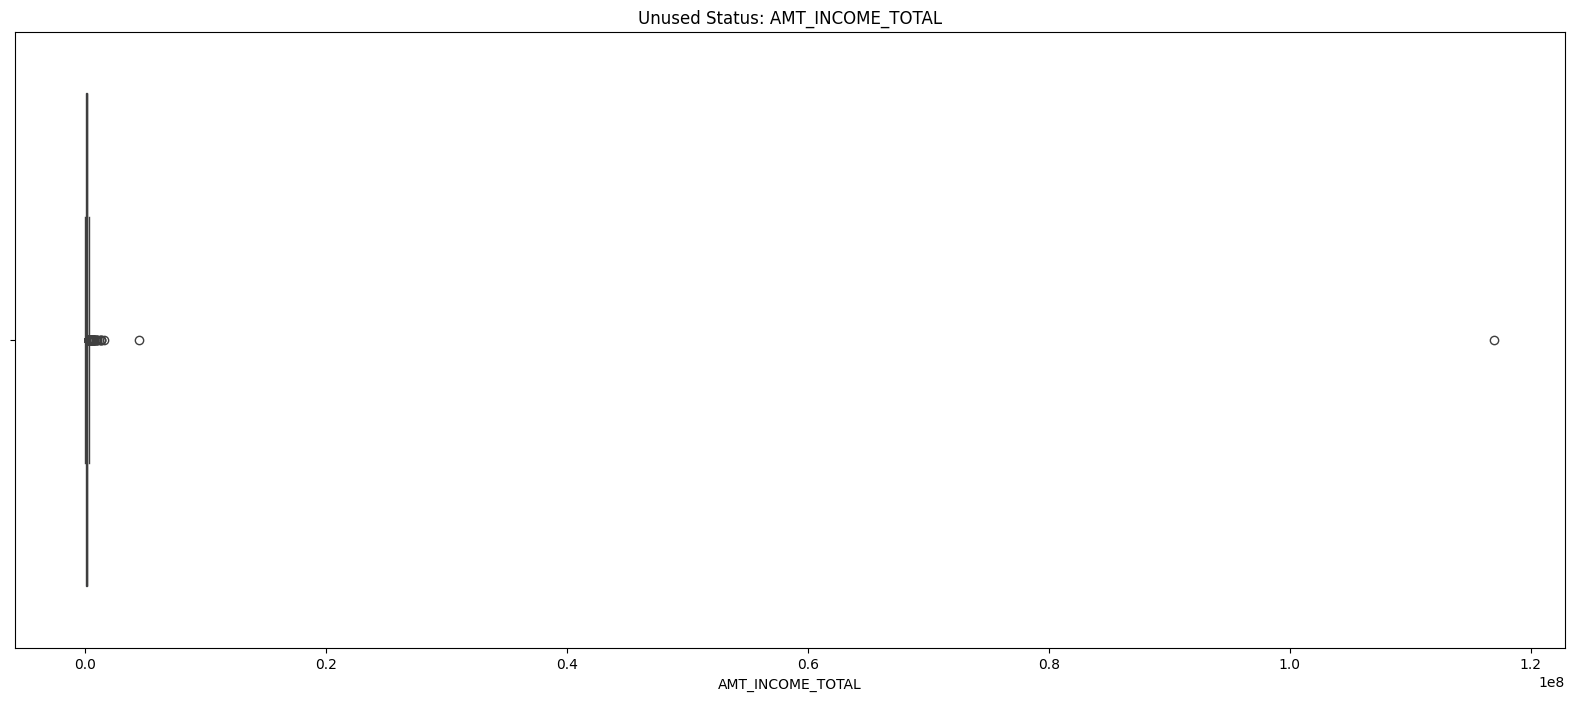

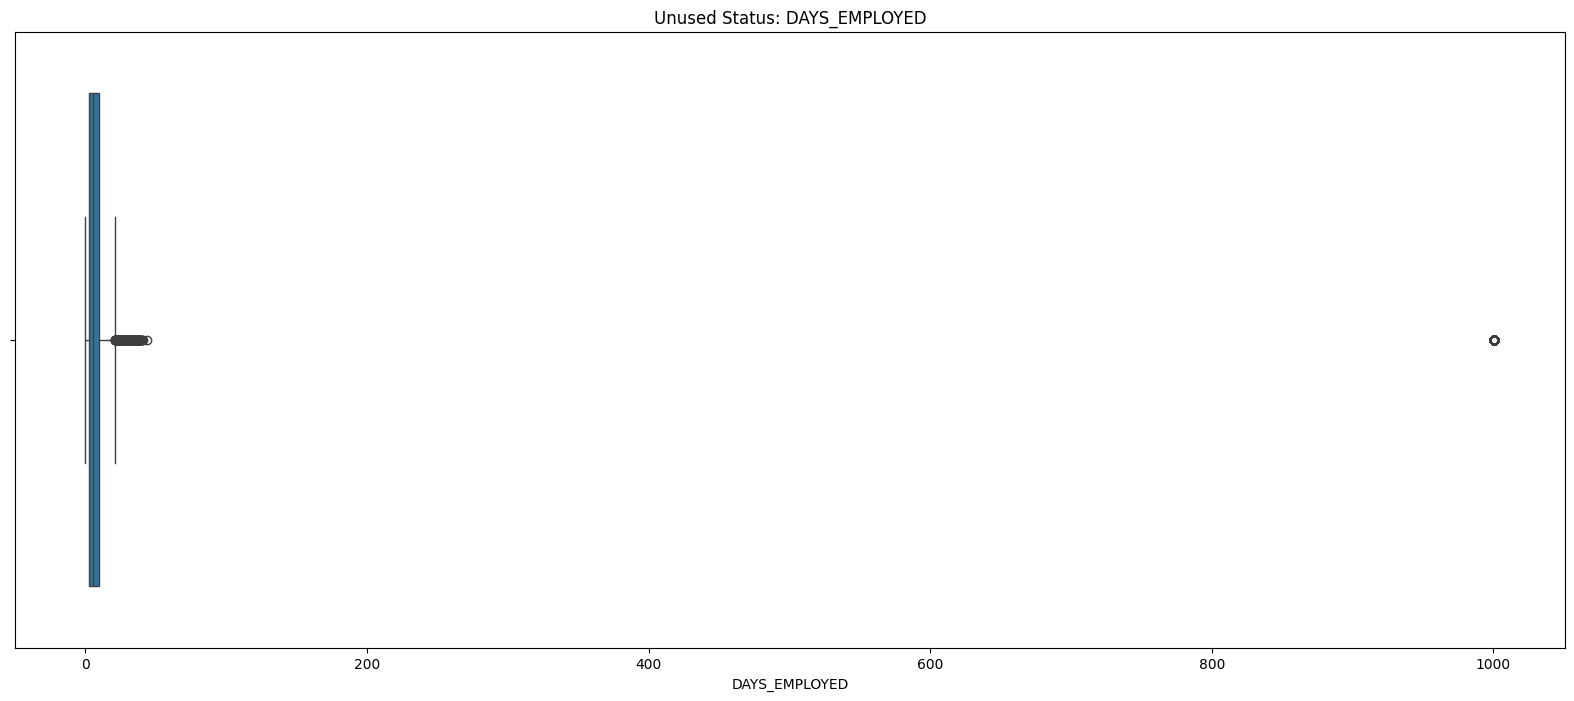

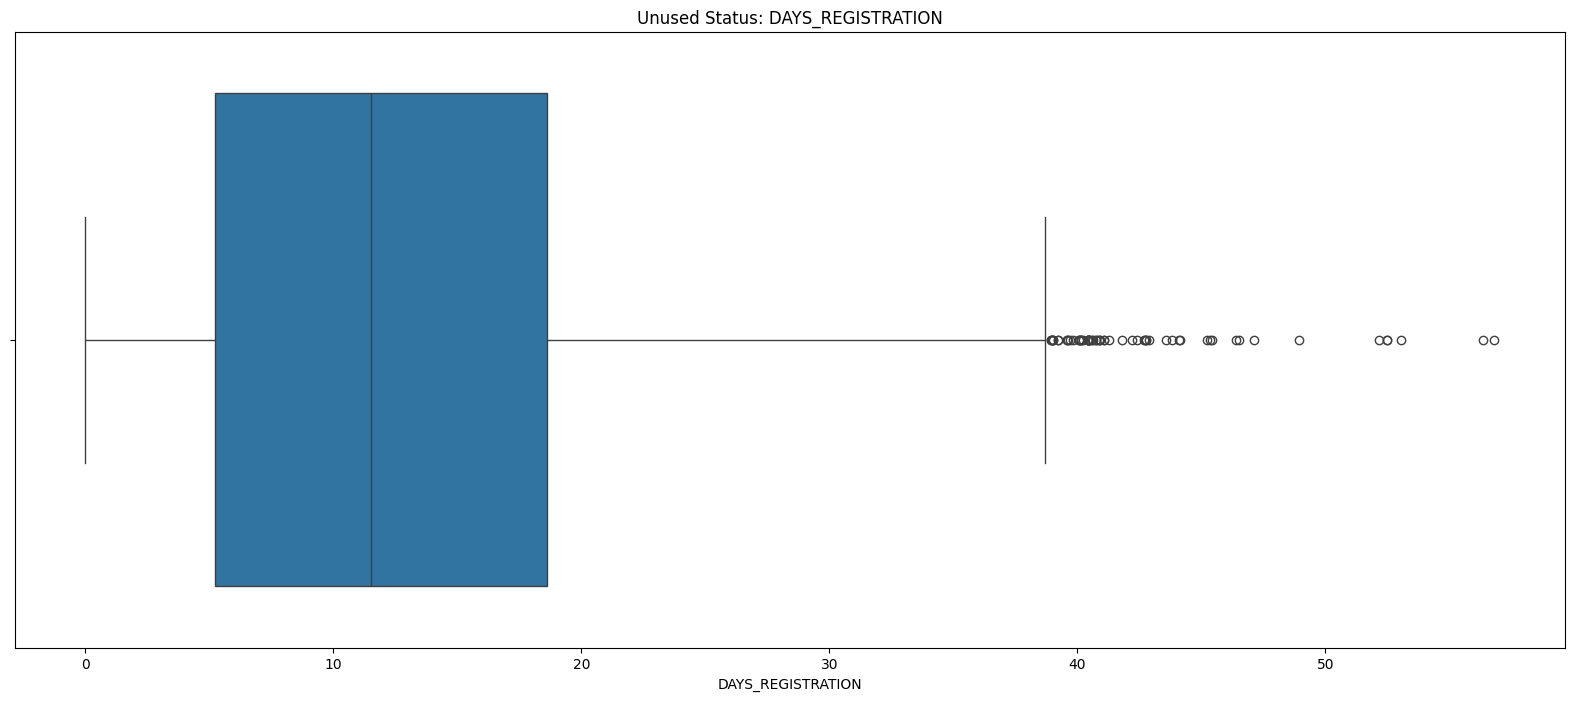

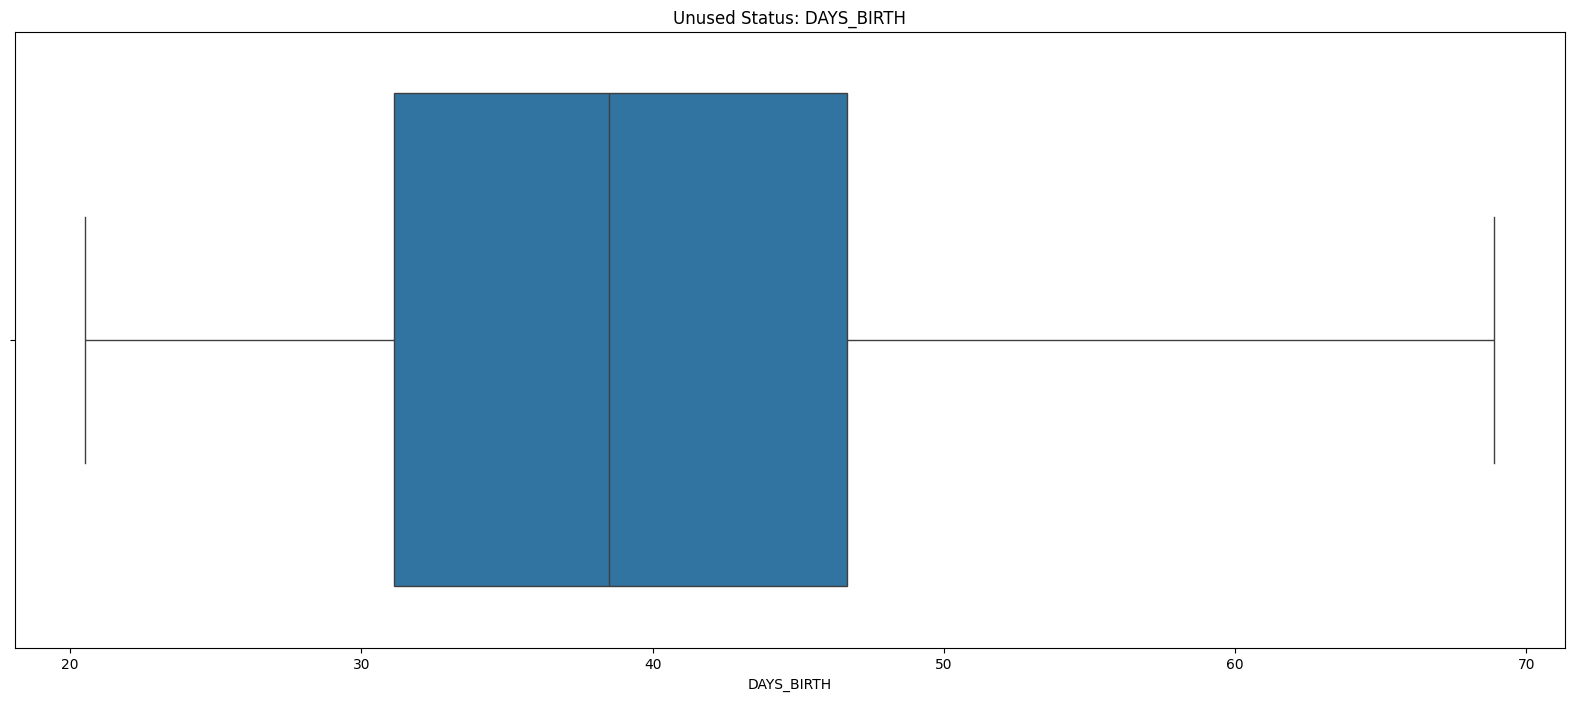

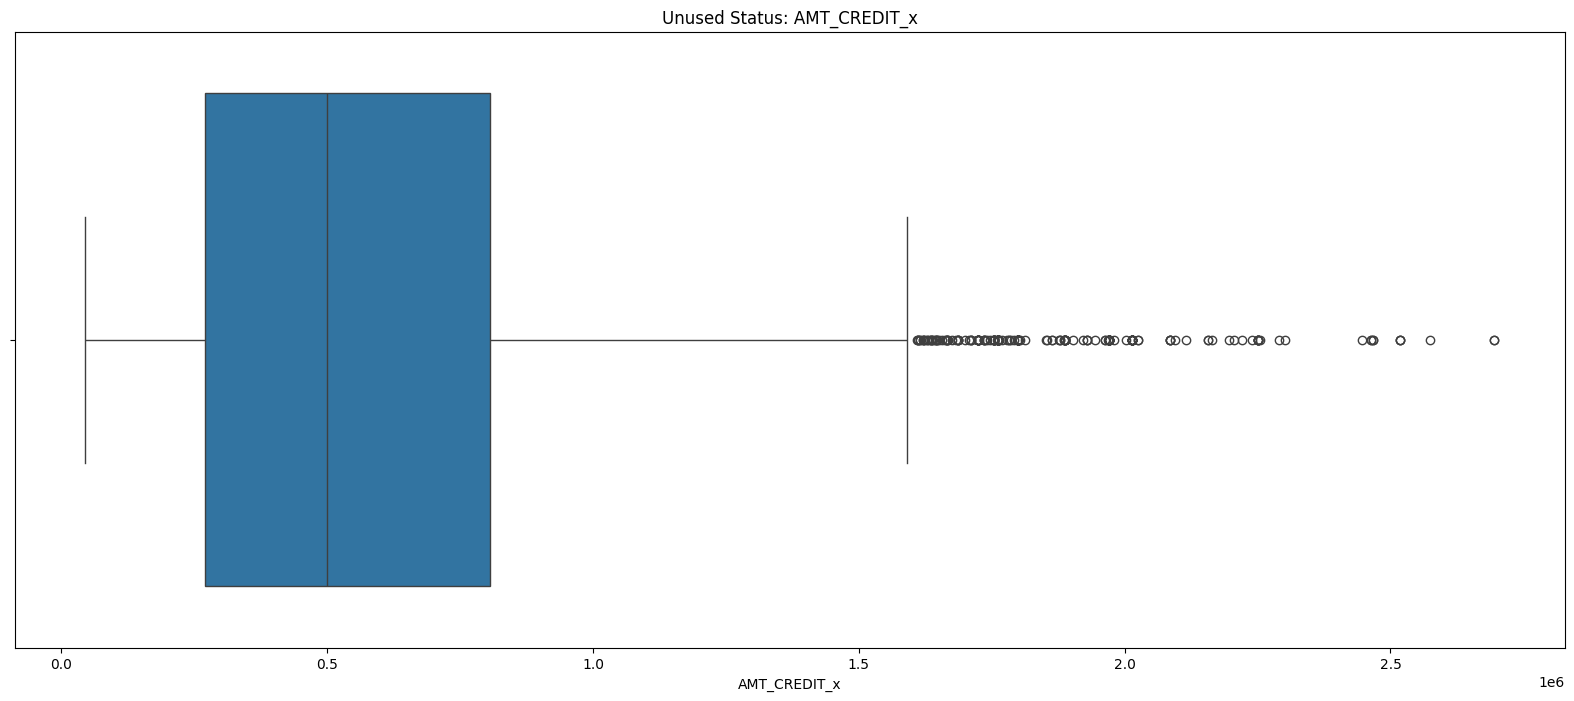

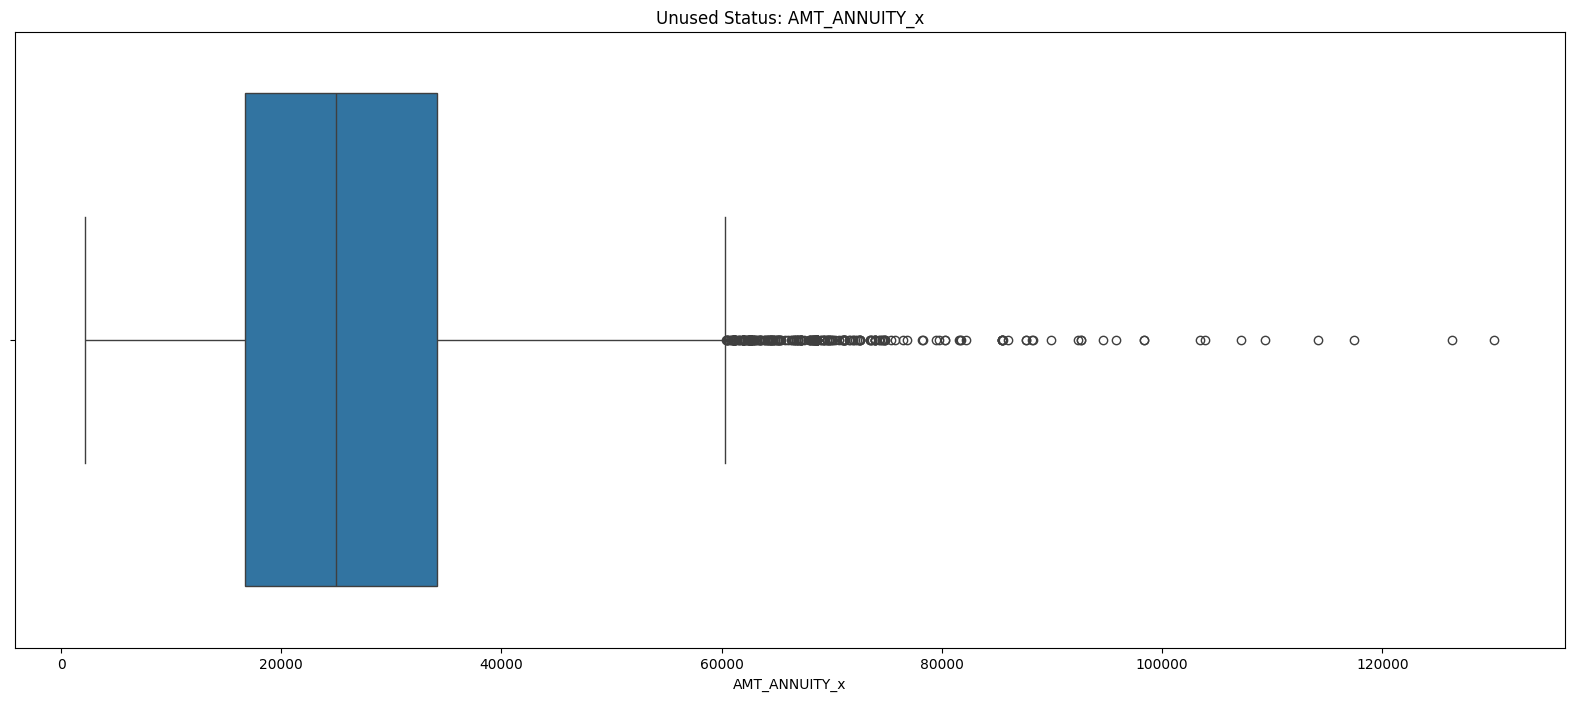

In [422]:
for i in conb_num_col:
    plt.figure(figsize=(20,8))
    sns.boxplot(data = comb_unused_df, x=i)
    plt.title("Unused Status: "+i)

# Bivariant analysis for Categorical Data for the unused applications

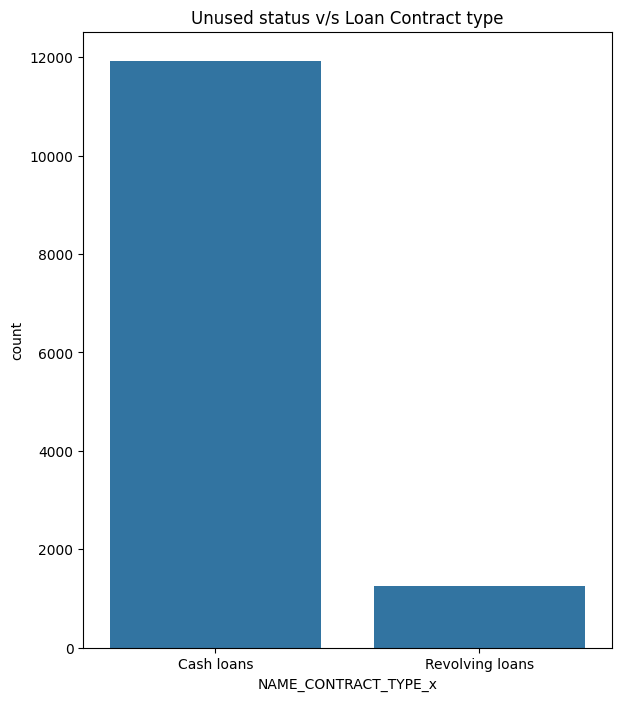

In [423]:
# People with unused offer status - First Variable

# 1. Second Variable : Contract Type

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(x = "NAME_CONTRACT_TYPE_x", data = comb_unused_df)
plt.title("Unused status v/s Loan Contract type")
plt.show()

## Inference from the above Bivariate analysis for categorical data is as below:

#### 1. Cash loans: Are more likely to be re-applied

# Bivariant analysis for Numerical Data for the reapplied applications

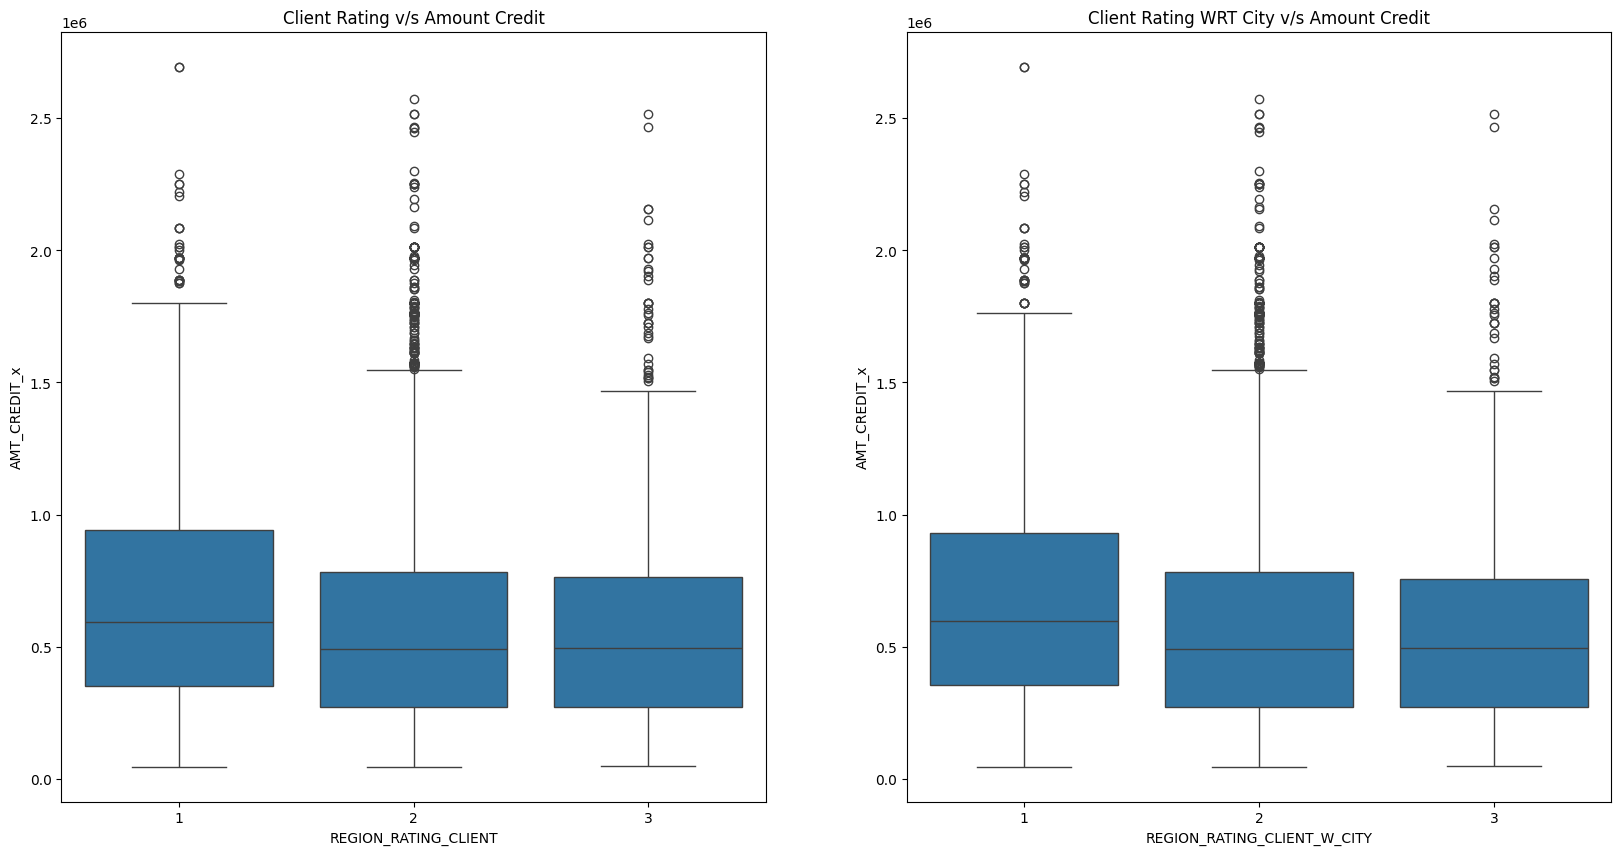

In [424]:
# First Variable: Client Rating
# Second Variable: AMT_CREDIT
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.boxplot(x='REGION_RATING_CLIENT', y='AMT_CREDIT_x', data = comb_unused_df)
plt.title("Client Rating v/s Amount Credit")

# First Variable: Client Rating With Respect to City
# Second Variable: AMT_CREDIT
plt.subplot(1,2,2)
sns.boxplot(x='REGION_RATING_CLIENT_W_CITY',y='AMT_CREDIT_x', data = comb_unused_df)
plt.title("Client Rating WRT City v/s Amount Credit")
plt.show()


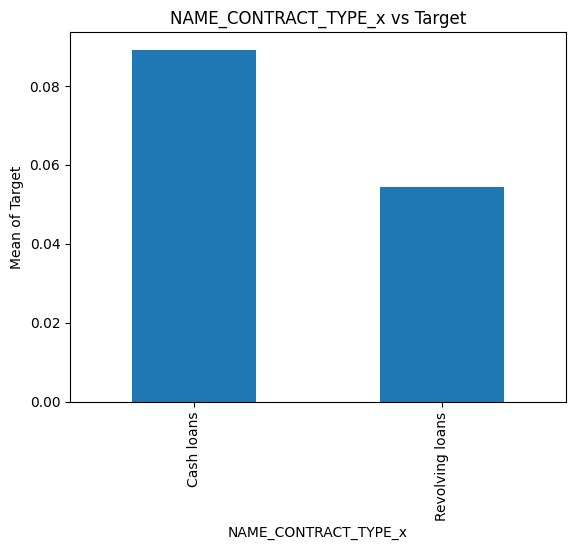

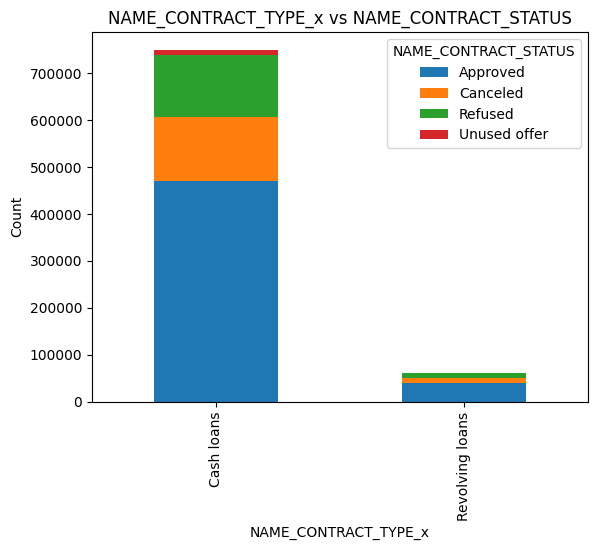

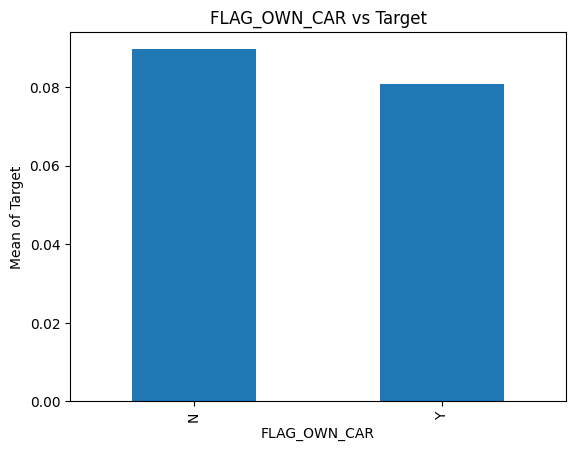

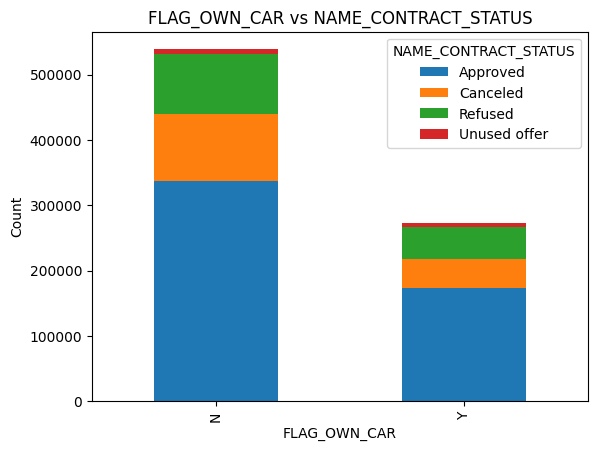

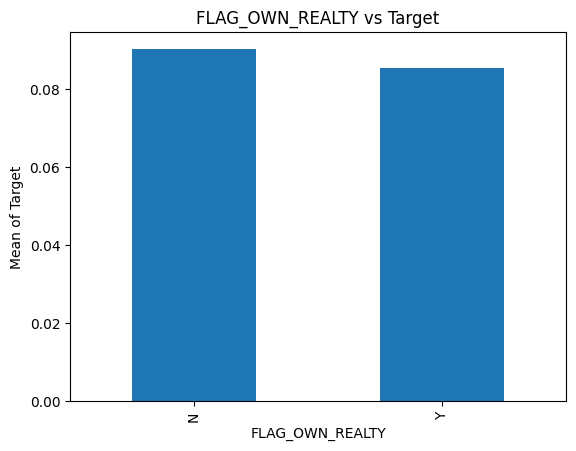

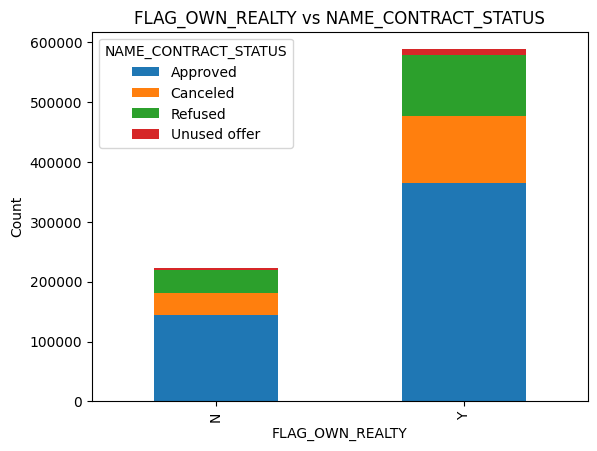

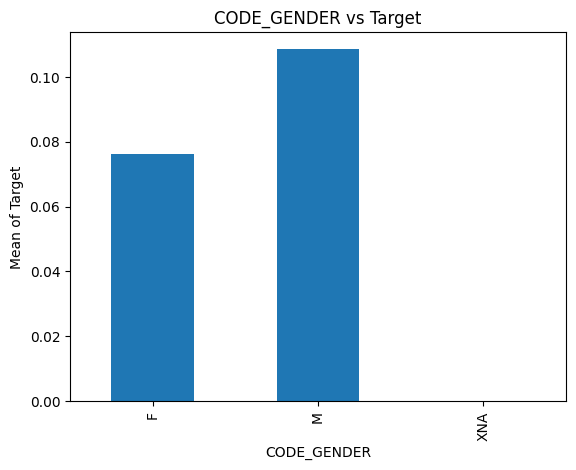

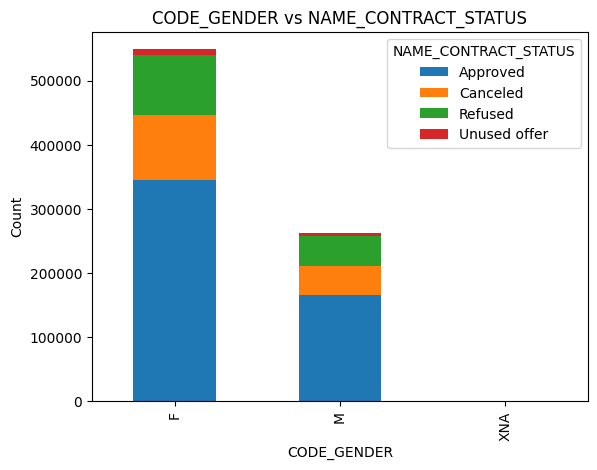

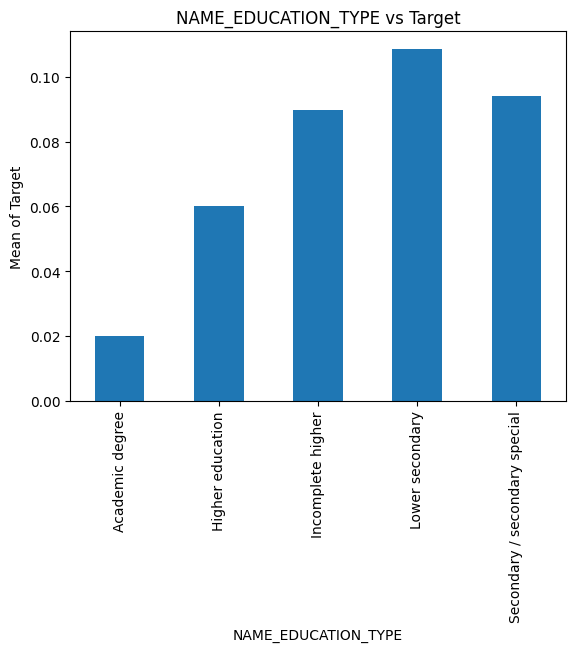

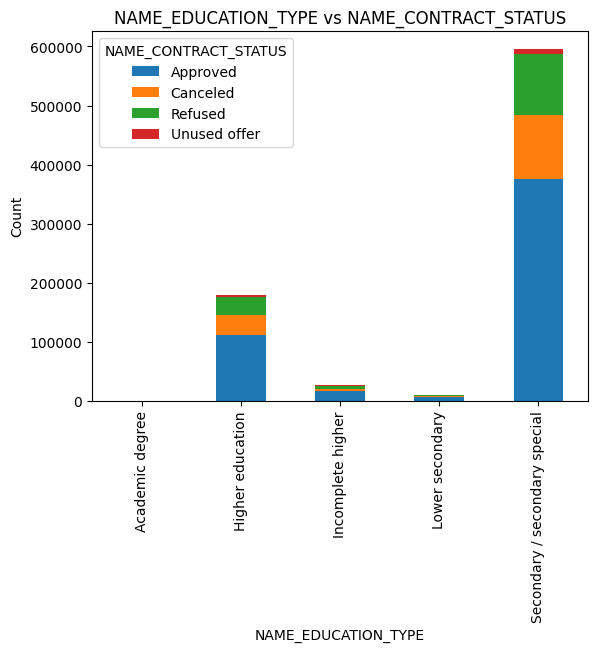

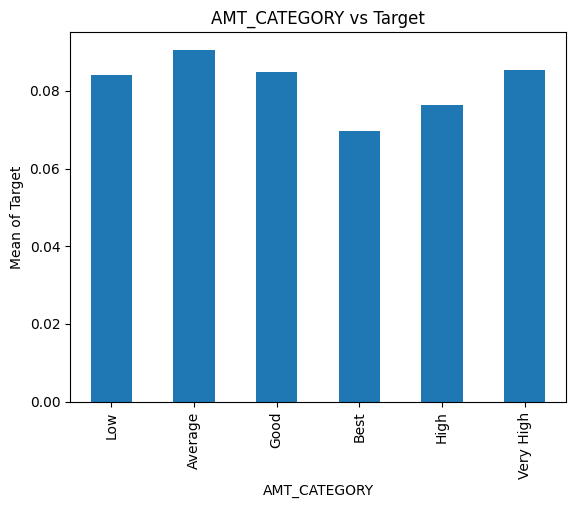

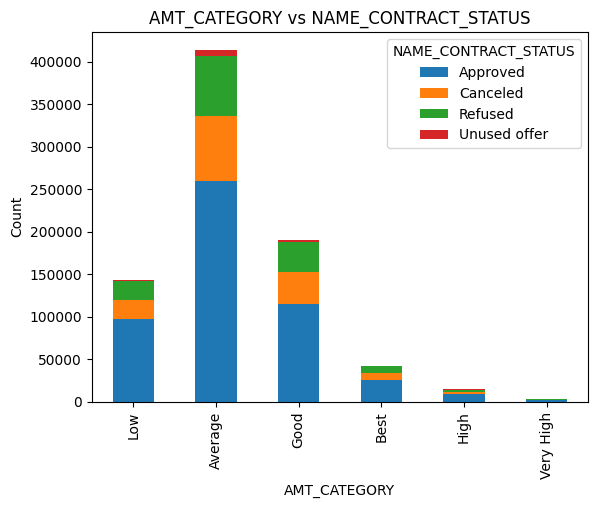

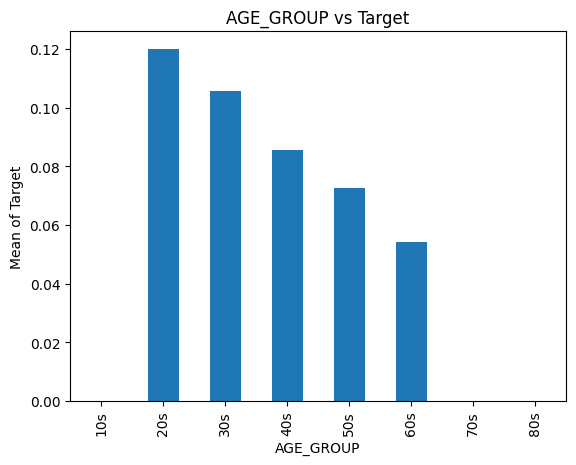

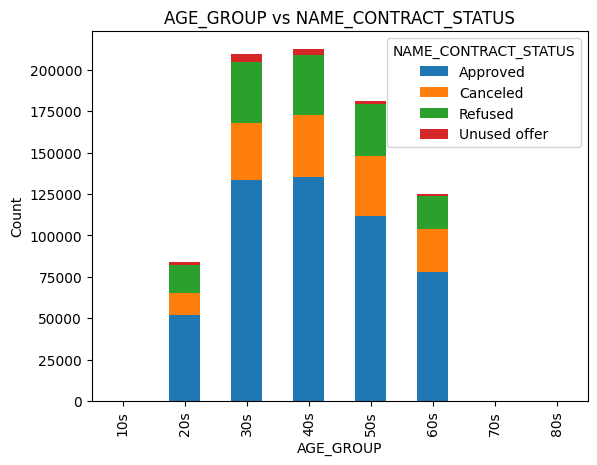

In [425]:


# Define your categorical columns list

comb_df['TARGET'] = pd.to_numeric(comb_df['TARGET'])

# Loop through the combined categorical columns
for i in conb_cat_col:
    # Group by the categorical column and calculate the mean of the TARGET column
    target_mean = comb_df.groupby(i)['TARGET'].mean()

    # Plot the mean of TARGET
    target_mean.plot.bar()
    plt.title(f'{i} vs Target')
    plt.ylabel('Mean of Target')
    plt.show()

    # Count the occurrences of each category in NAME_CONTRACT_STATUS
    status_count = comb_df.groupby(i)['NAME_CONTRACT_STATUS'].value_counts().unstack().fillna(0)

    # Plot the count of NAME_CONTRACT_STATUS
    status_count.plot.bar(stacked=True)
    plt.title(f'{i} vs NAME_CONTRACT_STATUS')
    plt.ylabel('Count')
    plt.show()


In [426]:
comb_unused_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
207      100086       0           Cash loans           F            N   
268      100116       0           Cash loans           F            N   
270      100116       0           Cash loans           F            N   
324      100139       0           Cash loans           F            N   
363      100156       0           Cash loans           F            Y   

    FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
207               Y             1          135000.0      675000.0   
268               Y             0          243000.0      900000.0   
270               Y             0          243000.0      900000.0   
324               N             1          157500.0      302341.5   
363               N             2          157500.0      945000.0   

     AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x      NAME_INCOME_TYPE  \
207        21775.5           675000.0     Unaccompanied  Commercial associate   
268        32017.5           900000.0     Unaccompanied               Working   
270        32017.5           900000.0     Unaccompanied               Working   
324        24016.5           261000.0            Family               Working   
363        39127.5           945000.0            Family  Commercial associate   

               NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
207               Higher education              Widow  House / apartment   
268               Higher education            Married  House / apartment   
270               Higher education            Married  House / apartment   
324  Secondary / secondary special            Married  House / apartment   
363  Secondary / secondary special            Married       With parents   

     DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
207       39.08           6.83              11.85            12.38   
268       40.41          18.46               9.29            13.12   
270       40.41          18.46               9.29            13.12   
324       36.40           6.32              18.32            13.58   
363       39.00          14.82               6.16            14.73   

    OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
207        Laborers              2.0                     2   
268      Core staff              2.0                     2   
270      Core staff              2.0                     2   
324             NaN              3.0                     2   
363  Medicine staff              4.0                     3   

     REGION_RATING_CLIENT_W_CITY       ORGANIZATION_TYPE  \
207                            2           Self-employed   
268                            1            Kindergarten   
270                            1            Kindergarten   
324                            2  Business Entity Type 3   
363                            3                Medicine   

     OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
207                       0.0                       0.0   
268                       2.0                       0.0   
270                       2.0                       0.0   
324                       6.0                       0.0   
363                       0.0                       0.0   

     OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
207                       0.0                       0.0   
268                       2.0                       0.0   
270                       2.0                       0.0   
324                       6.0                       0.0   
363                       0.0                       0.0   

     DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  \
207                    4.38                         0.0   
268                    2.97                         0.0   
270                    2.97                         0.0   
324                    5.12                         0.0   
363                    7.41                    

## 5.3 Analysis to understand the relation between NAME_CONTRACT_STATUS AND TARGET

In [427]:
comb_df.groupby('NAME_CONTRACT_STATUS')['TARGET'].mean()

NAME_CONTRACT_STATUS
Approved        0.075887
Canceled        0.092062
Refused         0.120067
Unused offer    0.081910
Name: TARGET, dtype: float64

#### There is not much difference in the default rate for  previous application staus